# "Smart Sound Classification for Urban Environments"


In [26]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/urbansound8k/UrbanSound8K.csv
/kaggle/input/urbansound8k/fold7/164797-2-0-8.wav
/kaggle/input/urbansound8k/fold7/177537-7-2-0.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-68.wav
/kaggle/input/urbansound8k/fold7/6902-2-0-18.wav
/kaggle/input/urbansound8k/fold7/518-4-0-2.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-2.wav
/kaggle/input/urbansound8k/fold7/116485-3-2-4.wav
/kaggle/input/urbansound8k/fold7/518-4-0-3.wav
/kaggle/input/urbansound8k/fold7/44737-5-0-2.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-3.wav
/kaggle/input/urbansound8k/fold7/181102-9-0-50.wav
/kaggle/input/urbansound8k/fold7/99812-1-6-0.wav
/kaggle/input/urbansound8k/fold7/39857-5-0-0.wav
/kaggle/input/urbansound8k/fold7/61503-2-0-6.wav
/kaggle/input/urbansound8k/fold7/162728-1-0-0.wav
/kaggle/input/urbansound8k/fold7/89443-9-0-48.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-13.wav
/kaggle/input/urbansound8k/fold7/149193-5-0-2.wav
/kaggle/input/urbansound8k/fold7/71529-4-0-2.wav
/kaggle/input/u

## Import Dependencies : 

In [27]:
import IPython.display as ipd
import librosa
import librosa.display

### Using Librosa : 

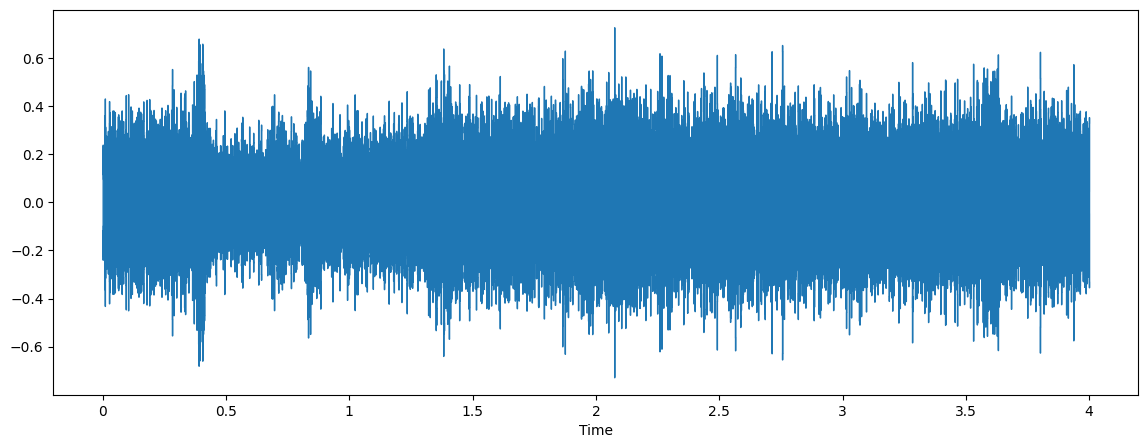

In [28]:
import matplotlib.pyplot as plt
file_name="/kaggle/input/urbansound8k/fold3/103199-4-0-3.wav"
plt.figure(figsize=(14,5))
audio_data,sample_rate=librosa.load(file_name)
librosa.display.waveshow(audio_data,sr=sample_rate)
ipd.Audio(file_name)

In [29]:
audio_data

array([ 0.11192007,  0.05402579, -0.1082823 , ...,  0.12622619,
        0.04420237, -0.13147739], dtype=float32)

In [30]:
sample_rate

22050

### Using Scipy: 

Here Scipy converts the signal to stereo, meaning the channels will be 2¶

In [31]:
from scipy.io import wavfile as wav
audio_data,sample_rate=wav.read(file_name)

In [32]:
audio_data,sample_rate

(44100,
 array([[ 4024,  6076],
        [ 2515,  4833],
        [  271,  2685],
        ...,
        [-1407,  -630],
        [-4125, -3548],
        [-6566, -6258]], dtype=int16))

## Exploring CSV file : 

In [33]:
import pandas as pd

In [34]:
dataset_path="/kaggle/input/urbansound8k/UrbanSound8K.csv"

In [35]:
dataset=pd.read_csv(dataset_path)

In [36]:
dataset.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [37]:
dataset.isnull().sum()

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

In [38]:
dataset.columns

Index(['slice_file_name', 'fsID', 'start', 'end', 'salience', 'fold',
       'classID', 'class'],
      dtype='object')

In [39]:
dataset.shape

(8732, 8)

In [40]:
dataset.value_counts()

slice_file_name    fsID    start       end         salience  fold  classID  class     
100032-3-0-0.wav   100032  0.000000    0.317551    1         5     3        dog_bark      1
24347-8-0-73.wav   24347   40.620371   44.620371   2         4     8        siren         1
24347-8-0-68.wav   24347   38.120371   42.120371   2         4     8        siren         1
24347-8-0-69.wav   24347   38.620371   42.620371   2         4     8        siren         1
24347-8-0-7.wav    24347   7.620371    11.620371   2         4     8        siren         1
                                                                                         ..
162134-7-10-0.wav  162134  178.959326  182.959326  1         10    7        jackhammer    1
162134-7-1-0.wav   162134  18.663755   22.396505   1         10    7        jackhammer    1
162134-7-0-2.wav   162134  2.333125    6.333125    1         10    7        jackhammer    1
162134-7-0-1.wav   162134  1.833125    5.833125    1         10    7        jackhamme

## Data Visualization : 

In [41]:
import seaborn as sns

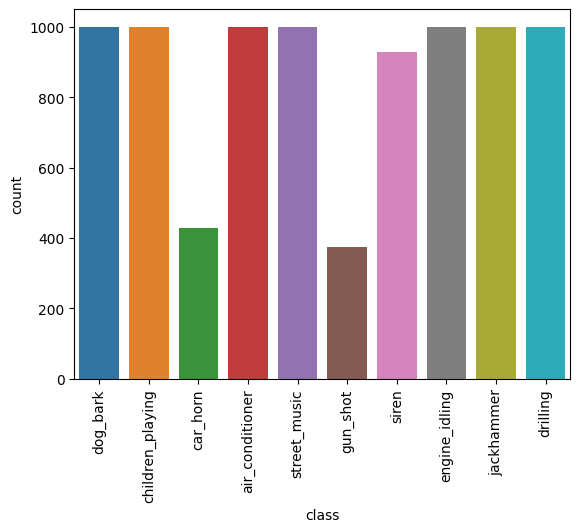

In [42]:
sns.countplot(x='class',data=dataset)
plt.xticks(rotation=90)
plt.show()

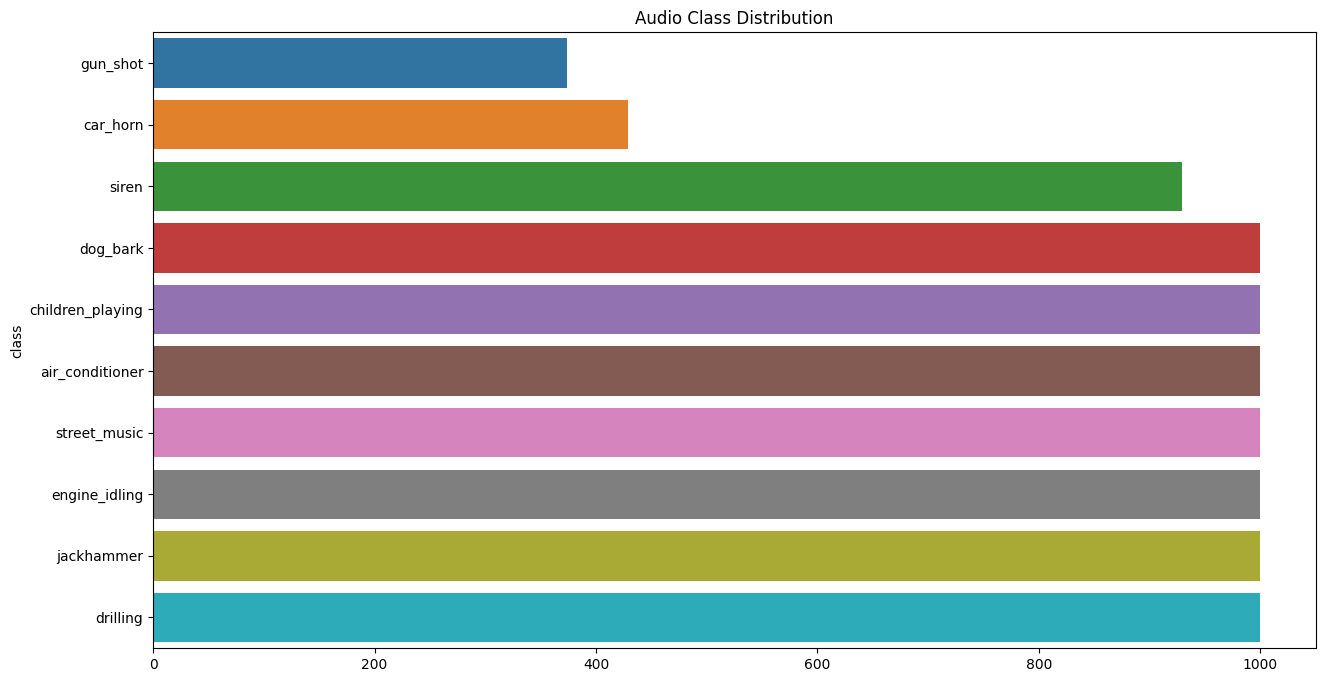

In [43]:
plt.figure(figsize=(15,8))
plt.title('Audio Class Distribution')
class_dist = dataset['class'].value_counts().sort_values()
sns.barplot(x=class_dist.values,
           y=class_dist.keys())
plt.show()

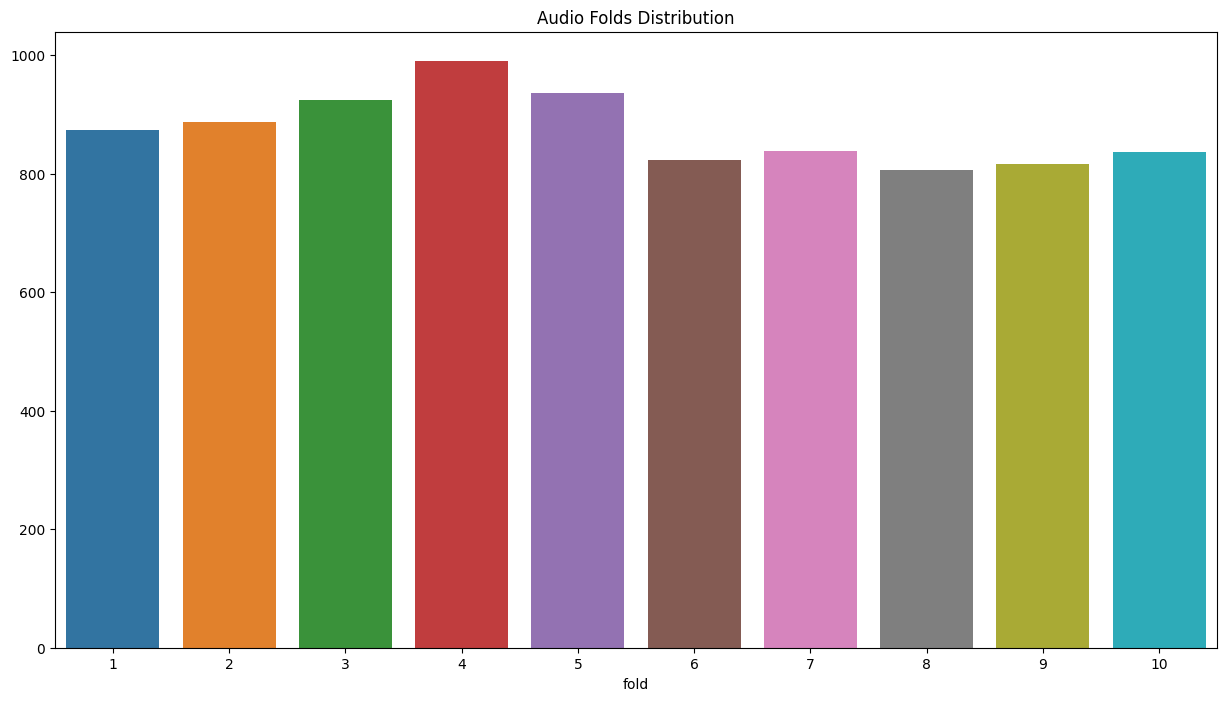

In [44]:
plt.figure(figsize=(15,8))
plt.title('Audio Folds Distribution')
folds_dist = dataset['fold'].value_counts().sort_values()
sns.barplot(y=folds_dist.values,
           x=folds_dist.keys())
plt.show()

## Data Preprocessing : 

### Extracting Features from data : 

 **MFCC** : Mel Frequency Cepstral Coefficient from audio samples.The MFCC summarizes the frequency distribution across the window-size,so it is possible to analyze both the frequency and time characteristics of the sound.These audio representations will allow us to identify features for classification.

In [45]:
import numpy as np

In [46]:
def feature_extraction(file_name):
    wave_audio,sample_rate=librosa.load(file_name)
    mfcc=librosa.feature.mfcc(y=wave_audio,sr=sample_rate,n_mfcc=40)
    mfcc_scaled=np.mean(mfcc.T,axis=0)
    return mfcc_scaled

In [47]:
data_path="/kaggle/input/urbansound8k"
#/kaggle/input/urbansound8k/fold6/101281-3-0-14.wav

In [48]:
from tqdm import tqdm
import os

In [49]:
extracted_features=[]
for index_num,row in tqdm(dataset.iterrows()):
    file_name=os.path.join(os.path.abspath(data_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    print(file_name)
    class_label=row["class"]
    feature=feature_extraction(file_name)
    extracted_features.append([feature,class_label])

6it [00:00, 52.77it/s]

/kaggle/input/urbansound8k/fold5/100032-3-0-0.wav
/kaggle/input/urbansound8k/fold5/100263-2-0-117.wav
/kaggle/input/urbansound8k/fold5/100263-2-0-121.wav
/kaggle/input/urbansound8k/fold5/100263-2-0-126.wav
/kaggle/input/urbansound8k/fold5/100263-2-0-137.wav
/kaggle/input/urbansound8k/fold5/100263-2-0-143.wav
/kaggle/input/urbansound8k/fold5/100263-2-0-161.wav
/kaggle/input/urbansound8k/fold5/100263-2-0-3.wav
/kaggle/input/urbansound8k/fold5/100263-2-0-36.wav
/kaggle/input/urbansound8k/fold10/100648-1-0-0.wav
/kaggle/input/urbansound8k/fold10/100648-1-1-0.wav
/kaggle/input/urbansound8k/fold10/100648-1-2-0.wav
/kaggle/input/urbansound8k/fold10/100648-1-3-0.wav


20it [00:00, 55.90it/s]

/kaggle/input/urbansound8k/fold10/100648-1-4-0.wav
/kaggle/input/urbansound8k/fold2/100652-3-0-0.wav
/kaggle/input/urbansound8k/fold2/100652-3-0-1.wav
/kaggle/input/urbansound8k/fold2/100652-3-0-2.wav
/kaggle/input/urbansound8k/fold2/100652-3-0-3.wav
/kaggle/input/urbansound8k/fold10/100795-3-0-0.wav
/kaggle/input/urbansound8k/fold10/100795-3-1-0.wav
/kaggle/input/urbansound8k/fold10/100795-3-1-1.wav
/kaggle/input/urbansound8k/fold10/100795-3-1-2.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-0.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-1.wav


32it [00:00, 52.04it/s]

/kaggle/input/urbansound8k/fold5/100852-0-0-10.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-11.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-12.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-13.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-14.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-15.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-16.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-17.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-18.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-19.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-2.wav


44it [00:00, 51.61it/s]

/kaggle/input/urbansound8k/fold5/100852-0-0-20.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-21.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-22.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-23.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-24.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-25.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-26.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-27.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-28.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-29.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-3.wav


56it [00:01, 51.85it/s]

/kaggle/input/urbansound8k/fold5/100852-0-0-30.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-4.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-5.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-6.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-7.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-8.wav
/kaggle/input/urbansound8k/fold5/100852-0-0-9.wav
/kaggle/input/urbansound8k/fold6/101281-3-0-0.wav
/kaggle/input/urbansound8k/fold6/101281-3-0-14.wav
/kaggle/input/urbansound8k/fold6/101281-3-0-5.wav
/kaggle/input/urbansound8k/fold10/101382-2-0-10.wav


62it [00:01, 49.97it/s]

/kaggle/input/urbansound8k/fold10/101382-2-0-12.wav
/kaggle/input/urbansound8k/fold10/101382-2-0-20.wav
/kaggle/input/urbansound8k/fold10/101382-2-0-21.wav
/kaggle/input/urbansound8k/fold10/101382-2-0-29.wav
/kaggle/input/urbansound8k/fold10/101382-2-0-33.wav
/kaggle/input/urbansound8k/fold10/101382-2-0-42.wav
/kaggle/input/urbansound8k/fold10/101382-2-0-45.wav
/kaggle/input/urbansound8k/fold1/101415-3-0-2.wav
/kaggle/input/urbansound8k/fold1/101415-3-0-3.wav
/kaggle/input/urbansound8k/fold1/101415-3-0-8.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-1.wav


74it [00:01, 47.62it/s]

/kaggle/input/urbansound8k/fold9/101729-0-0-11.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-12.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-13.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-14.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-16.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-17.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-18.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-19.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-21.wav


84it [00:01, 44.78it/s]

/kaggle/input/urbansound8k/fold9/101729-0-0-22.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-23.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-24.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-26.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-28.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-29.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-3.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-32.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-33.wav


94it [00:01, 43.45it/s]

/kaggle/input/urbansound8k/fold9/101729-0-0-36.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-37.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-38.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-39.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-4.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-40.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-6.wav
/kaggle/input/urbansound8k/fold9/101729-0-0-9.wav
/kaggle/input/urbansound8k/fold7/101848-9-0-0.wav


100it [00:02, 45.54it/s]

/kaggle/input/urbansound8k/fold7/101848-9-0-1.wav
/kaggle/input/urbansound8k/fold7/101848-9-0-2.wav
/kaggle/input/urbansound8k/fold7/101848-9-0-3.wav
/kaggle/input/urbansound8k/fold7/101848-9-0-8.wav
/kaggle/input/urbansound8k/fold7/101848-9-0-9.wav
/kaggle/input/urbansound8k/fold4/102102-3-0-0.wav
/kaggle/input/urbansound8k/fold10/102103-3-0-0.wav
/kaggle/input/urbansound8k/fold10/102103-3-1-0.wav
/kaggle/input/urbansound8k/fold2/102104-3-0-0.wav
/kaggle/input/urbansound8k/fold3/102105-3-0-0.wav
/kaggle/input/urbansound8k/fold1/102106-3-0-0.wav
/kaggle/input/urbansound8k/fold1/102305-6-0-0.wav
/kaggle/input/urbansound8k/fold5/102547-3-0-2.wav


114it [00:02, 53.52it/s]

/kaggle/input/urbansound8k/fold5/102547-3-0-7.wav
/kaggle/input/urbansound8k/fold5/102547-3-0-8.wav
/kaggle/input/urbansound8k/fold1/102842-3-0-1.wav
/kaggle/input/urbansound8k/fold1/102842-3-1-0.wav
/kaggle/input/urbansound8k/fold1/102842-3-1-5.wav
/kaggle/input/urbansound8k/fold1/102842-3-1-6.wav
/kaggle/input/urbansound8k/fold7/102853-8-0-0.wav
/kaggle/input/urbansound8k/fold7/102853-8-0-1.wav
/kaggle/input/urbansound8k/fold7/102853-8-0-2.wav
/kaggle/input/urbansound8k/fold7/102853-8-0-3.wav
/kaggle/input/urbansound8k/fold7/102853-8-0-4.wav


126it [00:02, 51.91it/s]

/kaggle/input/urbansound8k/fold7/102853-8-0-5.wav
/kaggle/input/urbansound8k/fold7/102853-8-0-6.wav
/kaggle/input/urbansound8k/fold7/102853-8-1-0.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-0.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-1.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-10.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-11.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-12.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-13.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-14.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-15.wav


138it [00:02, 51.56it/s]

/kaggle/input/urbansound8k/fold10/102857-5-0-16.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-17.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-18.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-19.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-2.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-20.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-21.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-22.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-23.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-24.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-25.wav


150it [00:02, 50.28it/s]

/kaggle/input/urbansound8k/fold10/102857-5-0-26.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-27.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-28.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-29.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-3.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-30.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-4.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-5.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-6.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-7.wav


156it [00:03, 49.73it/s]

/kaggle/input/urbansound8k/fold10/102857-5-0-8.wav
/kaggle/input/urbansound8k/fold10/102857-5-0-9.wav
/kaggle/input/urbansound8k/fold2/102858-5-0-0.wav
/kaggle/input/urbansound8k/fold2/102858-5-0-1.wav
/kaggle/input/urbansound8k/fold2/102871-8-0-0.wav
/kaggle/input/urbansound8k/fold2/102871-8-0-1.wav
/kaggle/input/urbansound8k/fold2/102871-8-0-10.wav
/kaggle/input/urbansound8k/fold2/102871-8-0-11.wav
/kaggle/input/urbansound8k/fold2/102871-8-0-12.wav
/kaggle/input/urbansound8k/fold2/102871-8-0-13.wav


167it [00:03, 50.16it/s]

/kaggle/input/urbansound8k/fold2/102871-8-0-14.wav
/kaggle/input/urbansound8k/fold2/102871-8-0-15.wav
/kaggle/input/urbansound8k/fold2/102871-8-0-2.wav
/kaggle/input/urbansound8k/fold2/102871-8-0-3.wav
/kaggle/input/urbansound8k/fold2/102871-8-0-4.wav
/kaggle/input/urbansound8k/fold2/102871-8-0-5.wav
/kaggle/input/urbansound8k/fold2/102871-8-0-6.wav
/kaggle/input/urbansound8k/fold2/102871-8-0-7.wav
/kaggle/input/urbansound8k/fold2/102871-8-0-8.wav
/kaggle/input/urbansound8k/fold2/102871-8-0-9.wav
/kaggle/input/urbansound8k/fold1/103074-7-0-0.wav


178it [00:03, 46.84it/s]

/kaggle/input/urbansound8k/fold1/103074-7-0-1.wav
/kaggle/input/urbansound8k/fold1/103074-7-0-2.wav
/kaggle/input/urbansound8k/fold1/103074-7-1-0.wav
/kaggle/input/urbansound8k/fold1/103074-7-1-1.wav
/kaggle/input/urbansound8k/fold1/103074-7-1-2.wav
/kaggle/input/urbansound8k/fold1/103074-7-1-3.wav
/kaggle/input/urbansound8k/fold1/103074-7-1-4.wav
/kaggle/input/urbansound8k/fold1/103074-7-1-5.wav
/kaggle/input/urbansound8k/fold1/103074-7-1-6.wav


188it [00:03, 44.95it/s]

/kaggle/input/urbansound8k/fold1/103074-7-2-0.wav
/kaggle/input/urbansound8k/fold1/103074-7-3-0.wav
/kaggle/input/urbansound8k/fold1/103074-7-3-1.wav
/kaggle/input/urbansound8k/fold1/103074-7-3-2.wav
/kaggle/input/urbansound8k/fold1/103074-7-3-3.wav
/kaggle/input/urbansound8k/fold1/103074-7-4-0.wav
/kaggle/input/urbansound8k/fold1/103074-7-4-1.wav
/kaggle/input/urbansound8k/fold1/103074-7-4-2.wav
/kaggle/input/urbansound8k/fold1/103074-7-4-3.wav
/kaggle/input/urbansound8k/fold1/103074-7-4-4.wav


200it [00:04, 49.49it/s]

/kaggle/input/urbansound8k/fold1/103074-7-4-5.wav
/kaggle/input/urbansound8k/fold1/103074-7-4-6.wav
/kaggle/input/urbansound8k/fold8/103076-3-0-0.wav
/kaggle/input/urbansound8k/fold8/103076-3-1-0.wav
/kaggle/input/urbansound8k/fold8/103076-3-2-0.wav
/kaggle/input/urbansound8k/fold3/103199-4-0-0.wav
/kaggle/input/urbansound8k/fold3/103199-4-0-3.wav
/kaggle/input/urbansound8k/fold3/103199-4-0-4.wav
/kaggle/input/urbansound8k/fold3/103199-4-0-5.wav
/kaggle/input/urbansound8k/fold3/103199-4-0-6.wav
/kaggle/input/urbansound8k/fold3/103199-4-1-0.wav
/kaggle/input/urbansound8k/fold3/103199-4-2-0.wav


212it [00:04, 48.39it/s]

/kaggle/input/urbansound8k/fold3/103199-4-2-1.wav
/kaggle/input/urbansound8k/fold3/103199-4-2-10.wav
/kaggle/input/urbansound8k/fold3/103199-4-2-11.wav
/kaggle/input/urbansound8k/fold3/103199-4-2-2.wav
/kaggle/input/urbansound8k/fold3/103199-4-2-3.wav
/kaggle/input/urbansound8k/fold3/103199-4-2-4.wav
/kaggle/input/urbansound8k/fold3/103199-4-2-5.wav
/kaggle/input/urbansound8k/fold3/103199-4-2-6.wav
/kaggle/input/urbansound8k/fold3/103199-4-2-7.wav
/kaggle/input/urbansound8k/fold3/103199-4-2-8.wav


218it [00:04, 49.32it/s]

/kaggle/input/urbansound8k/fold3/103199-4-2-9.wav
/kaggle/input/urbansound8k/fold3/103199-4-4-0.wav
/kaggle/input/urbansound8k/fold3/103199-4-6-0.wav
/kaggle/input/urbansound8k/fold3/103199-4-7-2.wav
/kaggle/input/urbansound8k/fold9/103249-5-0-0.wav
/kaggle/input/urbansound8k/fold9/103249-5-0-1.wav
/kaggle/input/urbansound8k/fold9/103249-5-0-10.wav
/kaggle/input/urbansound8k/fold9/103249-5-0-11.wav
/kaggle/input/urbansound8k/fold9/103249-5-0-12.wav


228it [00:04, 43.10it/s]

/kaggle/input/urbansound8k/fold9/103249-5-0-13.wav
/kaggle/input/urbansound8k/fold9/103249-5-0-14.wav
/kaggle/input/urbansound8k/fold9/103249-5-0-15.wav
/kaggle/input/urbansound8k/fold9/103249-5-0-16.wav
/kaggle/input/urbansound8k/fold9/103249-5-0-17.wav
/kaggle/input/urbansound8k/fold9/103249-5-0-18.wav
/kaggle/input/urbansound8k/fold9/103249-5-0-19.wav
/kaggle/input/urbansound8k/fold9/103249-5-0-2.wav
/kaggle/input/urbansound8k/fold9/103249-5-0-3.wav


238it [00:04, 42.50it/s]

/kaggle/input/urbansound8k/fold9/103249-5-0-4.wav
/kaggle/input/urbansound8k/fold9/103249-5-0-5.wav
/kaggle/input/urbansound8k/fold9/103249-5-0-6.wav
/kaggle/input/urbansound8k/fold9/103249-5-0-7.wav
/kaggle/input/urbansound8k/fold9/103249-5-0-8.wav
/kaggle/input/urbansound8k/fold9/103249-5-0-9.wav
/kaggle/input/urbansound8k/fold1/103258-5-0-0.wav
/kaggle/input/urbansound8k/fold1/103258-5-0-1.wav
/kaggle/input/urbansound8k/fold1/103258-5-0-10.wav


248it [00:05, 42.51it/s]

/kaggle/input/urbansound8k/fold1/103258-5-0-11.wav
/kaggle/input/urbansound8k/fold1/103258-5-0-12.wav
/kaggle/input/urbansound8k/fold1/103258-5-0-13.wav
/kaggle/input/urbansound8k/fold1/103258-5-0-14.wav
/kaggle/input/urbansound8k/fold1/103258-5-0-15.wav
/kaggle/input/urbansound8k/fold1/103258-5-0-16.wav
/kaggle/input/urbansound8k/fold1/103258-5-0-17.wav
/kaggle/input/urbansound8k/fold1/103258-5-0-18.wav
/kaggle/input/urbansound8k/fold1/103258-5-0-19.wav


253it [00:05, 41.27it/s]

/kaggle/input/urbansound8k/fold1/103258-5-0-2.wav
/kaggle/input/urbansound8k/fold1/103258-5-0-3.wav
/kaggle/input/urbansound8k/fold1/103258-5-0-4.wav
/kaggle/input/urbansound8k/fold1/103258-5-0-5.wav
/kaggle/input/urbansound8k/fold1/103258-5-0-6.wav
/kaggle/input/urbansound8k/fold1/103258-5-0-7.wav
/kaggle/input/urbansound8k/fold1/103258-5-0-8.wav
/kaggle/input/urbansound8k/fold1/103258-5-0-9.wav
/kaggle/input/urbansound8k/fold3/103357-4-0-0.wav


264it [00:05, 45.41it/s]

/kaggle/input/urbansound8k/fold3/103357-4-0-1.wav
/kaggle/input/urbansound8k/fold10/103438-5-0-0.wav
/kaggle/input/urbansound8k/fold10/103438-5-0-1.wav
/kaggle/input/urbansound8k/fold10/103438-5-0-2.wav
/kaggle/input/urbansound8k/fold6/104327-2-0-15.wav
/kaggle/input/urbansound8k/fold6/104327-2-0-19.wav
/kaggle/input/urbansound8k/fold6/104327-2-0-26.wav
/kaggle/input/urbansound8k/fold6/104327-2-0-28.wav
/kaggle/input/urbansound8k/fold6/104327-2-0-3.wav
/kaggle/input/urbansound8k/fold6/104327-2-0-30.wav
/kaggle/input/urbansound8k/fold6/104327-2-0-34.wav
/kaggle/input/urbansound8k/fold6/104327-2-0-4.wav


277it [00:05, 50.50it/s]

/kaggle/input/urbansound8k/fold5/104421-2-0-1.wav
/kaggle/input/urbansound8k/fold5/104421-2-0-15.wav
/kaggle/input/urbansound8k/fold5/104421-2-0-20.wav
/kaggle/input/urbansound8k/fold5/104421-2-0-29.wav
/kaggle/input/urbansound8k/fold5/104421-2-0-3.wav
/kaggle/input/urbansound8k/fold5/104421-2-0-5.wav
/kaggle/input/urbansound8k/fold5/104421-2-0-7.wav
/kaggle/input/urbansound8k/fold5/104421-2-1-3.wav
/kaggle/input/urbansound8k/fold7/104625-4-0-15.wav
/kaggle/input/urbansound8k/fold7/104625-4-0-21.wav


283it [00:05, 42.52it/s]

/kaggle/input/urbansound8k/fold7/104625-4-0-27.wav
/kaggle/input/urbansound8k/fold7/104625-4-0-29.wav
/kaggle/input/urbansound8k/fold7/104625-4-0-3.wav
/kaggle/input/urbansound8k/fold7/104625-4-0-35.wav
/kaggle/input/urbansound8k/fold7/104625-4-0-40.wav
/kaggle/input/urbansound8k/fold7/104625-4-0-41.wav


288it [00:06, 37.60it/s]

/kaggle/input/urbansound8k/fold7/104625-4-0-45.wav
/kaggle/input/urbansound8k/fold7/104625-4-0-48.wav
/kaggle/input/urbansound8k/fold7/104625-4-0-51.wav
/kaggle/input/urbansound8k/fold7/104625-4-0-52.wav
/kaggle/input/urbansound8k/fold7/104625-4-0-53.wav
/kaggle/input/urbansound8k/fold7/104625-4-0-55.wav


296it [00:06, 31.92it/s]

/kaggle/input/urbansound8k/fold7/104625-4-0-57.wav
/kaggle/input/urbansound8k/fold7/104625-4-0-66.wav
/kaggle/input/urbansound8k/fold7/104625-4-1-20.wav
/kaggle/input/urbansound8k/fold7/104625-4-1-8.wav
/kaggle/input/urbansound8k/fold2/104817-4-0-0.wav
/kaggle/input/urbansound8k/fold2/104817-4-0-1.wav


306it [00:06, 36.17it/s]

/kaggle/input/urbansound8k/fold2/104817-4-0-10.wav
/kaggle/input/urbansound8k/fold2/104817-4-0-11.wav
/kaggle/input/urbansound8k/fold2/104817-4-0-2.wav
/kaggle/input/urbansound8k/fold2/104817-4-0-3.wav
/kaggle/input/urbansound8k/fold2/104817-4-0-4.wav
/kaggle/input/urbansound8k/fold2/104817-4-0-5.wav
/kaggle/input/urbansound8k/fold2/104817-4-0-6.wav
/kaggle/input/urbansound8k/fold2/104817-4-0-7.wav
/kaggle/input/urbansound8k/fold2/104817-4-0-8.wav


311it [00:06, 38.20it/s]

/kaggle/input/urbansound8k/fold2/104817-4-0-9.wav
/kaggle/input/urbansound8k/fold5/104998-7-0-5.wav
/kaggle/input/urbansound8k/fold5/104998-7-10-1.wav
/kaggle/input/urbansound8k/fold5/104998-7-10-10.wav
/kaggle/input/urbansound8k/fold5/104998-7-10-13.wav
/kaggle/input/urbansound8k/fold5/104998-7-10-15.wav
/kaggle/input/urbansound8k/fold5/104998-7-10-8.wav
/kaggle/input/urbansound8k/fold5/104998-7-10-9.wav
/kaggle/input/urbansound8k/fold5/104998-7-11-0.wav
/kaggle/input/urbansound8k/fold5/104998-7-11-2.wav


323it [00:06, 44.57it/s]

/kaggle/input/urbansound8k/fold5/104998-7-12-2.wav
/kaggle/input/urbansound8k/fold5/104998-7-14-1.wav
/kaggle/input/urbansound8k/fold5/104998-7-14-5.wav
/kaggle/input/urbansound8k/fold5/104998-7-14-6.wav
/kaggle/input/urbansound8k/fold5/104998-7-15-1.wav
/kaggle/input/urbansound8k/fold5/104998-7-15-3.wav
/kaggle/input/urbansound8k/fold5/104998-7-15-5.wav
/kaggle/input/urbansound8k/fold5/104998-7-15-9.wav
/kaggle/input/urbansound8k/fold5/104998-7-16-0.wav
/kaggle/input/urbansound8k/fold5/104998-7-16-10.wav


333it [00:07, 45.52it/s]

/kaggle/input/urbansound8k/fold5/104998-7-16-11.wav
/kaggle/input/urbansound8k/fold5/104998-7-16-5.wav
/kaggle/input/urbansound8k/fold5/104998-7-16-6.wav
/kaggle/input/urbansound8k/fold5/104998-7-16-7.wav
/kaggle/input/urbansound8k/fold5/104998-7-17-0.wav
/kaggle/input/urbansound8k/fold5/104998-7-17-1.wav
/kaggle/input/urbansound8k/fold5/104998-7-17-12.wav
/kaggle/input/urbansound8k/fold5/104998-7-17-14.wav
/kaggle/input/urbansound8k/fold5/104998-7-17-4.wav
/kaggle/input/urbansound8k/fold5/104998-7-17-7.wav


343it [00:07, 44.75it/s]

/kaggle/input/urbansound8k/fold5/104998-7-17-8.wav
/kaggle/input/urbansound8k/fold5/104998-7-18-12.wav
/kaggle/input/urbansound8k/fold5/104998-7-18-13.wav
/kaggle/input/urbansound8k/fold5/104998-7-18-3.wav
/kaggle/input/urbansound8k/fold5/104998-7-18-9.wav
/kaggle/input/urbansound8k/fold5/104998-7-19-0.wav
/kaggle/input/urbansound8k/fold5/104998-7-19-3.wav
/kaggle/input/urbansound8k/fold5/104998-7-19-6.wav
/kaggle/input/urbansound8k/fold5/104998-7-19-7.wav


353it [00:07, 44.03it/s]

/kaggle/input/urbansound8k/fold5/104998-7-19-8.wav
/kaggle/input/urbansound8k/fold5/104998-7-19-9.wav
/kaggle/input/urbansound8k/fold5/104998-7-2-4.wav
/kaggle/input/urbansound8k/fold5/104998-7-2-5.wav
/kaggle/input/urbansound8k/fold5/104998-7-2-6.wav
/kaggle/input/urbansound8k/fold5/104998-7-3-1.wav
/kaggle/input/urbansound8k/fold5/104998-7-7-0.wav
/kaggle/input/urbansound8k/fold5/104998-7-7-1.wav
/kaggle/input/urbansound8k/fold5/104998-7-7-4.wav


363it [00:07, 45.39it/s]

/kaggle/input/urbansound8k/fold5/104998-7-7-7.wav
/kaggle/input/urbansound8k/fold5/104998-7-7-9.wav
/kaggle/input/urbansound8k/fold5/104998-7-8-13.wav
/kaggle/input/urbansound8k/fold5/104998-7-8-14.wav
/kaggle/input/urbansound8k/fold5/104998-7-8-15.wav
/kaggle/input/urbansound8k/fold5/104998-7-8-17.wav
/kaggle/input/urbansound8k/fold5/104998-7-8-4.wav
/kaggle/input/urbansound8k/fold5/104998-7-8-6.wav
/kaggle/input/urbansound8k/fold5/104998-7-8-7.wav
/kaggle/input/urbansound8k/fold5/104998-7-9-0.wav


375it [00:08, 48.35it/s]

/kaggle/input/urbansound8k/fold5/104998-7-9-13.wav
/kaggle/input/urbansound8k/fold5/104998-7-9-9.wav
/kaggle/input/urbansound8k/fold9/105029-7-0-0.wav
/kaggle/input/urbansound8k/fold9/105029-7-0-1.wav
/kaggle/input/urbansound8k/fold9/105029-7-0-2.wav
/kaggle/input/urbansound8k/fold9/105029-7-0-3.wav
/kaggle/input/urbansound8k/fold9/105029-7-0-4.wav
/kaggle/input/urbansound8k/fold9/105029-7-0-5.wav
/kaggle/input/urbansound8k/fold9/105029-7-0-6.wav
/kaggle/input/urbansound8k/fold9/105029-7-1-0.wav
/kaggle/input/urbansound8k/fold9/105029-7-1-1.wav


381it [00:08, 49.15it/s]

/kaggle/input/urbansound8k/fold9/105029-7-1-10.wav
/kaggle/input/urbansound8k/fold9/105029-7-1-11.wav
/kaggle/input/urbansound8k/fold9/105029-7-1-12.wav
/kaggle/input/urbansound8k/fold9/105029-7-1-13.wav
/kaggle/input/urbansound8k/fold9/105029-7-1-2.wav
/kaggle/input/urbansound8k/fold9/105029-7-1-3.wav
/kaggle/input/urbansound8k/fold9/105029-7-1-4.wav
/kaggle/input/urbansound8k/fold9/105029-7-1-5.wav
/kaggle/input/urbansound8k/fold9/105029-7-1-6.wav
/kaggle/input/urbansound8k/fold9/105029-7-1-7.wav


391it [00:08, 48.49it/s]

/kaggle/input/urbansound8k/fold9/105029-7-1-8.wav
/kaggle/input/urbansound8k/fold9/105029-7-1-9.wav
/kaggle/input/urbansound8k/fold9/105029-7-2-0.wav
/kaggle/input/urbansound8k/fold9/105029-7-2-1.wav
/kaggle/input/urbansound8k/fold9/105029-7-2-10.wav
/kaggle/input/urbansound8k/fold9/105029-7-2-11.wav
/kaggle/input/urbansound8k/fold9/105029-7-2-12.wav
/kaggle/input/urbansound8k/fold9/105029-7-2-13.wav
/kaggle/input/urbansound8k/fold9/105029-7-2-14.wav
/kaggle/input/urbansound8k/fold9/105029-7-2-15.wav


401it [00:08, 47.87it/s]

/kaggle/input/urbansound8k/fold9/105029-7-2-16.wav
/kaggle/input/urbansound8k/fold9/105029-7-2-2.wav
/kaggle/input/urbansound8k/fold9/105029-7-2-3.wav
/kaggle/input/urbansound8k/fold9/105029-7-2-4.wav
/kaggle/input/urbansound8k/fold9/105029-7-2-5.wav
/kaggle/input/urbansound8k/fold9/105029-7-2-6.wav
/kaggle/input/urbansound8k/fold9/105029-7-2-7.wav
/kaggle/input/urbansound8k/fold9/105029-7-2-8.wav
/kaggle/input/urbansound8k/fold9/105029-7-2-9.wav
/kaggle/input/urbansound8k/fold9/105029-7-3-0.wav


411it [00:08, 48.36it/s]

/kaggle/input/urbansound8k/fold9/105029-7-3-1.wav
/kaggle/input/urbansound8k/fold9/105029-7-3-2.wav
/kaggle/input/urbansound8k/fold9/105029-7-3-3.wav
/kaggle/input/urbansound8k/fold9/105029-7-3-4.wav
/kaggle/input/urbansound8k/fold9/105029-7-3-5.wav
/kaggle/input/urbansound8k/fold9/105029-7-3-6.wav
/kaggle/input/urbansound8k/fold9/105029-7-3-7.wav
/kaggle/input/urbansound8k/fold9/105029-7-4-0.wav
/kaggle/input/urbansound8k/fold9/105029-7-4-1.wav
/kaggle/input/urbansound8k/fold9/105029-7-4-2.wav


421it [00:09, 48.47it/s]

/kaggle/input/urbansound8k/fold9/105029-7-4-3.wav
/kaggle/input/urbansound8k/fold9/105088-3-0-10.wav
/kaggle/input/urbansound8k/fold9/105088-3-0-11.wav
/kaggle/input/urbansound8k/fold9/105088-3-0-19.wav
/kaggle/input/urbansound8k/fold9/105088-3-0-8.wav
/kaggle/input/urbansound8k/fold7/105289-8-0-0.wav
/kaggle/input/urbansound8k/fold7/105289-8-0-1.wav
/kaggle/input/urbansound8k/fold7/105289-8-0-2.wav
/kaggle/input/urbansound8k/fold7/105289-8-0-3.wav
/kaggle/input/urbansound8k/fold7/105289-8-0-4.wav


431it [00:09, 47.31it/s]

/kaggle/input/urbansound8k/fold7/105289-8-0-5.wav
/kaggle/input/urbansound8k/fold7/105289-8-1-0.wav
/kaggle/input/urbansound8k/fold7/105289-8-1-1.wav
/kaggle/input/urbansound8k/fold7/105289-8-1-2.wav
/kaggle/input/urbansound8k/fold7/105289-8-1-3.wav
/kaggle/input/urbansound8k/fold7/105289-8-1-4.wav
/kaggle/input/urbansound8k/fold7/105289-8-2-0.wav
/kaggle/input/urbansound8k/fold7/105289-8-2-1.wav
/kaggle/input/urbansound8k/fold7/105289-8-2-2.wav
/kaggle/input/urbansound8k/fold7/105289-8-2-3.wav


441it [00:09, 48.58it/s]

/kaggle/input/urbansound8k/fold7/105289-8-2-4.wav
/kaggle/input/urbansound8k/fold7/105289-8-2-5.wav
/kaggle/input/urbansound8k/fold7/105289-8-2-6.wav
/kaggle/input/urbansound8k/fold7/105289-8-2-7.wav
/kaggle/input/urbansound8k/fold6/105319-3-0-22.wav
/kaggle/input/urbansound8k/fold6/105319-3-0-29.wav
/kaggle/input/urbansound8k/fold6/105319-3-0-39.wav
/kaggle/input/urbansound8k/fold1/105415-2-0-1.wav
/kaggle/input/urbansound8k/fold1/105415-2-0-15.wav
/kaggle/input/urbansound8k/fold1/105415-2-0-19.wav


451it [00:09, 46.82it/s]

/kaggle/input/urbansound8k/fold1/105415-2-0-21.wav
/kaggle/input/urbansound8k/fold1/105415-2-0-24.wav
/kaggle/input/urbansound8k/fold1/105415-2-0-4.wav
/kaggle/input/urbansound8k/fold1/105415-2-0-6.wav
/kaggle/input/urbansound8k/fold1/105415-2-0-8.wav
/kaggle/input/urbansound8k/fold5/105425-9-0-1.wav
/kaggle/input/urbansound8k/fold5/105425-9-0-10.wav
/kaggle/input/urbansound8k/fold5/105425-9-0-12.wav
/kaggle/input/urbansound8k/fold5/105425-9-0-13.wav
/kaggle/input/urbansound8k/fold5/105425-9-0-14.wav


462it [00:09, 50.33it/s]

/kaggle/input/urbansound8k/fold5/105425-9-0-23.wav
/kaggle/input/urbansound8k/fold10/106014-5-0-0.wav
/kaggle/input/urbansound8k/fold10/106014-5-0-1.wav
/kaggle/input/urbansound8k/fold10/106014-5-0-2.wav
/kaggle/input/urbansound8k/fold10/106014-5-0-3.wav
/kaggle/input/urbansound8k/fold10/106014-5-0-4.wav
/kaggle/input/urbansound8k/fold2/106015-5-0-0.wav
/kaggle/input/urbansound8k/fold2/106015-5-0-1.wav
/kaggle/input/urbansound8k/fold2/106015-5-0-10.wav
/kaggle/input/urbansound8k/fold2/106015-5-0-11.wav
/kaggle/input/urbansound8k/fold2/106015-5-0-12.wav
/kaggle/input/urbansound8k/fold2/106015-5-0-13.wav


474it [00:10, 53.47it/s]

/kaggle/input/urbansound8k/fold2/106015-5-0-14.wav
/kaggle/input/urbansound8k/fold2/106015-5-0-15.wav
/kaggle/input/urbansound8k/fold2/106015-5-0-16.wav
/kaggle/input/urbansound8k/fold2/106015-5-0-17.wav
/kaggle/input/urbansound8k/fold2/106015-5-0-18.wav
/kaggle/input/urbansound8k/fold2/106015-5-0-19.wav
/kaggle/input/urbansound8k/fold2/106015-5-0-2.wav
/kaggle/input/urbansound8k/fold2/106015-5-0-20.wav
/kaggle/input/urbansound8k/fold2/106015-5-0-3.wav
/kaggle/input/urbansound8k/fold2/106015-5-0-4.wav
/kaggle/input/urbansound8k/fold2/106015-5-0-5.wav


486it [00:10, 49.27it/s]

/kaggle/input/urbansound8k/fold2/106015-5-0-6.wav
/kaggle/input/urbansound8k/fold2/106015-5-0-7.wav
/kaggle/input/urbansound8k/fold2/106015-5-0-8.wav
/kaggle/input/urbansound8k/fold2/106015-5-0-9.wav
/kaggle/input/urbansound8k/fold6/106486-5-0-0.wav
/kaggle/input/urbansound8k/fold6/106486-5-0-1.wav
/kaggle/input/urbansound8k/fold6/106486-5-0-2.wav
/kaggle/input/urbansound8k/fold5/106487-5-0-0.wav
/kaggle/input/urbansound8k/fold5/106487-5-0-1.wav
/kaggle/input/urbansound8k/fold5/106487-5-0-2.wav


497it [00:10, 50.10it/s]

/kaggle/input/urbansound8k/fold8/106905-5-0-0.wav
/kaggle/input/urbansound8k/fold8/106905-5-0-1.wav
/kaggle/input/urbansound8k/fold8/106905-5-0-2.wav
/kaggle/input/urbansound8k/fold1/106905-8-0-0.wav
/kaggle/input/urbansound8k/fold1/106905-8-0-1.wav
/kaggle/input/urbansound8k/fold1/106905-8-0-2.wav
/kaggle/input/urbansound8k/fold1/106905-8-0-3.wav
/kaggle/input/urbansound8k/fold9/106955-6-0-0.wav
/kaggle/input/urbansound8k/fold8/107090-1-0-0.wav
/kaggle/input/urbansound8k/fold8/107090-1-1-0.wav
/kaggle/input/urbansound8k/fold8/107190-3-0-0.wav
/kaggle/input/urbansound8k/fold3/107228-5-0-0.wav
/kaggle/input/urbansound8k/fold3/107228-5-0-1.wav


510it [00:10, 52.96it/s]

/kaggle/input/urbansound8k/fold3/107228-5-0-2.wav
/kaggle/input/urbansound8k/fold3/107228-5-0-3.wav
/kaggle/input/urbansound8k/fold3/107228-5-0-4.wav
/kaggle/input/urbansound8k/fold3/107228-5-0-5.wav
/kaggle/input/urbansound8k/fold3/107228-5-0-6.wav
/kaggle/input/urbansound8k/fold3/107228-5-0-7.wav
/kaggle/input/urbansound8k/fold7/107357-8-0-0.wav
/kaggle/input/urbansound8k/fold7/107357-8-0-1.wav
/kaggle/input/urbansound8k/fold7/107357-8-0-2.wav
/kaggle/input/urbansound8k/fold7/107357-8-0-3.wav
/kaggle/input/urbansound8k/fold7/107357-8-0-4.wav


522it [00:11, 51.02it/s]

/kaggle/input/urbansound8k/fold7/107357-8-0-5.wav
/kaggle/input/urbansound8k/fold7/107357-8-0-6.wav
/kaggle/input/urbansound8k/fold7/107357-8-0-7.wav
/kaggle/input/urbansound8k/fold7/107357-8-0-8.wav
/kaggle/input/urbansound8k/fold7/107357-8-1-0.wav
/kaggle/input/urbansound8k/fold7/107357-8-1-1.wav
/kaggle/input/urbansound8k/fold7/107357-8-1-10.wav
/kaggle/input/urbansound8k/fold7/107357-8-1-11.wav
/kaggle/input/urbansound8k/fold7/107357-8-1-12.wav
/kaggle/input/urbansound8k/fold7/107357-8-1-13.wav
/kaggle/input/urbansound8k/fold7/107357-8-1-14.wav


534it [00:11, 50.51it/s]

/kaggle/input/urbansound8k/fold7/107357-8-1-15.wav
/kaggle/input/urbansound8k/fold7/107357-8-1-16.wav
/kaggle/input/urbansound8k/fold7/107357-8-1-17.wav
/kaggle/input/urbansound8k/fold7/107357-8-1-18.wav
/kaggle/input/urbansound8k/fold7/107357-8-1-2.wav
/kaggle/input/urbansound8k/fold7/107357-8-1-3.wav
/kaggle/input/urbansound8k/fold7/107357-8-1-4.wav
/kaggle/input/urbansound8k/fold7/107357-8-1-5.wav
/kaggle/input/urbansound8k/fold7/107357-8-1-6.wav
/kaggle/input/urbansound8k/fold7/107357-8-1-7.wav
/kaggle/input/urbansound8k/fold7/107357-8-1-8.wav


540it [00:11, 50.30it/s]

/kaggle/input/urbansound8k/fold7/107357-8-1-9.wav
/kaggle/input/urbansound8k/fold4/107653-9-0-12.wav
/kaggle/input/urbansound8k/fold4/107653-9-0-14.wav
/kaggle/input/urbansound8k/fold4/107653-9-0-18.wav
/kaggle/input/urbansound8k/fold4/107653-9-0-3.wav
/kaggle/input/urbansound8k/fold4/107653-9-0-5.wav
/kaggle/input/urbansound8k/fold4/107653-9-0-7.wav
/kaggle/input/urbansound8k/fold6/107842-4-0-0.wav
/kaggle/input/urbansound8k/fold6/107842-4-0-1.wav
/kaggle/input/urbansound8k/fold6/107842-4-0-2.wav


552it [00:11, 51.68it/s]

/kaggle/input/urbansound8k/fold6/107842-4-1-0.wav
/kaggle/input/urbansound8k/fold6/107842-4-2-0.wav
/kaggle/input/urbansound8k/fold6/107842-4-2-1.wav
/kaggle/input/urbansound8k/fold6/107842-4-2-2.wav
/kaggle/input/urbansound8k/fold6/107842-4-2-3.wav
/kaggle/input/urbansound8k/fold6/107842-4-2-4.wav
/kaggle/input/urbansound8k/fold6/107842-4-3-0.wav
/kaggle/input/urbansound8k/fold1/108041-9-0-11.wav
/kaggle/input/urbansound8k/fold1/108041-9-0-2.wav
/kaggle/input/urbansound8k/fold1/108041-9-0-4.wav
/kaggle/input/urbansound8k/fold1/108041-9-0-5.wav


565it [00:11, 52.47it/s]

/kaggle/input/urbansound8k/fold1/108041-9-0-6.wav
/kaggle/input/urbansound8k/fold1/108041-9-0-7.wav
/kaggle/input/urbansound8k/fold1/108041-9-0-9.wav
/kaggle/input/urbansound8k/fold2/108187-3-2-0.wav
/kaggle/input/urbansound8k/fold2/108187-3-3-0.wav
/kaggle/input/urbansound8k/fold2/108187-3-4-0.wav
/kaggle/input/urbansound8k/fold2/108187-3-6-0.wav
/kaggle/input/urbansound8k/fold5/108357-9-0-15.wav
/kaggle/input/urbansound8k/fold5/108357-9-0-2.wav
/kaggle/input/urbansound8k/fold5/108357-9-0-27.wav
/kaggle/input/urbansound8k/fold5/108357-9-0-30.wav


571it [00:12, 48.24it/s]

/kaggle/input/urbansound8k/fold5/108357-9-0-44.wav
/kaggle/input/urbansound8k/fold5/108357-9-0-49.wav
/kaggle/input/urbansound8k/fold1/108362-2-0-11.wav
/kaggle/input/urbansound8k/fold1/108362-2-0-12.wav
/kaggle/input/urbansound8k/fold1/108362-2-0-21.wav
/kaggle/input/urbansound8k/fold1/108362-2-0-23.wav
/kaggle/input/urbansound8k/fold1/108362-2-0-29.wav
/kaggle/input/urbansound8k/fold1/108362-2-0-30.wav
/kaggle/input/urbansound8k/fold1/108362-2-0-7.wav


581it [00:12, 45.46it/s]

/kaggle/input/urbansound8k/fold1/108362-2-0-9.wav
/kaggle/input/urbansound8k/fold6/108638-9-0-0.wav
/kaggle/input/urbansound8k/fold6/108638-9-0-1.wav
/kaggle/input/urbansound8k/fold6/108638-9-0-2.wav
/kaggle/input/urbansound8k/fold6/108638-9-0-4.wav
/kaggle/input/urbansound8k/fold6/108638-9-0-5.wav
/kaggle/input/urbansound8k/fold6/108638-9-0-6.wav
/kaggle/input/urbansound8k/fold6/109233-3-0-3.wav
/kaggle/input/urbansound8k/fold6/109233-3-0-4.wav
/kaggle/input/urbansound8k/fold6/109233-3-0-5.wav
/kaggle/input/urbansound8k/fold6/109233-3-0-6.wav


593it [00:12, 50.85it/s]

/kaggle/input/urbansound8k/fold5/109263-9-0-34.wav
/kaggle/input/urbansound8k/fold5/109263-9-0-39.wav
/kaggle/input/urbansound8k/fold5/109263-9-0-54.wav
/kaggle/input/urbansound8k/fold5/109263-9-0-61.wav
/kaggle/input/urbansound8k/fold5/109263-9-0-78.wav
/kaggle/input/urbansound8k/fold2/109703-2-0-134.wav
/kaggle/input/urbansound8k/fold2/109703-2-0-14.wav
/kaggle/input/urbansound8k/fold2/109703-2-0-153.wav
/kaggle/input/urbansound8k/fold2/109703-2-0-29.wav
/kaggle/input/urbansound8k/fold2/109703-2-0-32.wav
/kaggle/input/urbansound8k/fold2/109703-2-0-48.wav


604it [00:12, 48.56it/s]

/kaggle/input/urbansound8k/fold2/109703-2-0-50.wav
/kaggle/input/urbansound8k/fold4/109711-3-1-0.wav
/kaggle/input/urbansound8k/fold4/109711-3-2-4.wav
/kaggle/input/urbansound8k/fold4/109711-3-2-6.wav
/kaggle/input/urbansound8k/fold8/110134-3-0-0.wav
/kaggle/input/urbansound8k/fold5/110371-3-0-1.wav
/kaggle/input/urbansound8k/fold5/110371-3-1-0.wav
/kaggle/input/urbansound8k/fold5/110371-3-1-1.wav
/kaggle/input/urbansound8k/fold9/110389-3-0-0.wav
/kaggle/input/urbansound8k/fold4/110621-7-0-0.wav


615it [00:12, 49.92it/s]

/kaggle/input/urbansound8k/fold4/110621-7-0-1.wav
/kaggle/input/urbansound8k/fold4/110621-7-0-2.wav
/kaggle/input/urbansound8k/fold4/110621-7-0-3.wav
/kaggle/input/urbansound8k/fold3/110622-6-0-0.wav
/kaggle/input/urbansound8k/fold8/110688-3-0-11.wav
/kaggle/input/urbansound8k/fold8/110688-3-0-17.wav
/kaggle/input/urbansound8k/fold8/110688-3-0-2.wav
/kaggle/input/urbansound8k/fold8/110688-3-0-32.wav
/kaggle/input/urbansound8k/fold6/110868-9-0-11.wav
/kaggle/input/urbansound8k/fold6/110868-9-0-13.wav
/kaggle/input/urbansound8k/fold6/110868-9-0-14.wav


626it [00:13, 47.15it/s]

/kaggle/input/urbansound8k/fold6/110868-9-0-15.wav
/kaggle/input/urbansound8k/fold6/110868-9-0-6.wav
/kaggle/input/urbansound8k/fold6/110868-9-0-8.wav
/kaggle/input/urbansound8k/fold7/110918-3-0-1.wav
/kaggle/input/urbansound8k/fold7/110918-3-0-26.wav
/kaggle/input/urbansound8k/fold7/110918-3-0-40.wav
/kaggle/input/urbansound8k/fold7/110918-3-0-9.wav
/kaggle/input/urbansound8k/fold6/111048-6-0-0.wav
/kaggle/input/urbansound8k/fold6/111386-5-0-0.wav
/kaggle/input/urbansound8k/fold6/111386-5-0-1.wav


637it [00:13, 48.57it/s]

/kaggle/input/urbansound8k/fold6/111386-5-0-2.wav
/kaggle/input/urbansound8k/fold6/111386-5-0-3.wav
/kaggle/input/urbansound8k/fold6/111386-5-0-4.wav
/kaggle/input/urbansound8k/fold6/111386-5-0-5.wav
/kaggle/input/urbansound8k/fold6/111386-5-0-6.wav
/kaggle/input/urbansound8k/fold6/111386-5-0-7.wav
/kaggle/input/urbansound8k/fold6/111386-5-1-0.wav
/kaggle/input/urbansound8k/fold6/111386-5-1-1.wav
/kaggle/input/urbansound8k/fold6/111386-5-1-10.wav
/kaggle/input/urbansound8k/fold6/111386-5-1-11.wav


648it [00:13, 48.07it/s]

/kaggle/input/urbansound8k/fold6/111386-5-1-12.wav
/kaggle/input/urbansound8k/fold6/111386-5-1-13.wav
/kaggle/input/urbansound8k/fold6/111386-5-1-14.wav
/kaggle/input/urbansound8k/fold6/111386-5-1-2.wav
/kaggle/input/urbansound8k/fold6/111386-5-1-3.wav
/kaggle/input/urbansound8k/fold6/111386-5-1-4.wav
/kaggle/input/urbansound8k/fold6/111386-5-1-5.wav
/kaggle/input/urbansound8k/fold6/111386-5-1-6.wav
/kaggle/input/urbansound8k/fold6/111386-5-1-7.wav
/kaggle/input/urbansound8k/fold6/111386-5-1-8.wav


653it [00:13, 46.58it/s]

/kaggle/input/urbansound8k/fold6/111386-5-1-9.wav
/kaggle/input/urbansound8k/fold5/111671-8-0-0.wav
/kaggle/input/urbansound8k/fold5/111671-8-0-1.wav
/kaggle/input/urbansound8k/fold5/111671-8-0-10.wav
/kaggle/input/urbansound8k/fold5/111671-8-0-11.wav
/kaggle/input/urbansound8k/fold5/111671-8-0-12.wav
/kaggle/input/urbansound8k/fold5/111671-8-0-13.wav
/kaggle/input/urbansound8k/fold5/111671-8-0-14.wav
/kaggle/input/urbansound8k/fold5/111671-8-0-15.wav


663it [00:13, 45.33it/s]

/kaggle/input/urbansound8k/fold5/111671-8-0-16.wav
/kaggle/input/urbansound8k/fold5/111671-8-0-17.wav
/kaggle/input/urbansound8k/fold5/111671-8-0-18.wav
/kaggle/input/urbansound8k/fold5/111671-8-0-19.wav
/kaggle/input/urbansound8k/fold5/111671-8-0-2.wav
/kaggle/input/urbansound8k/fold5/111671-8-0-20.wav
/kaggle/input/urbansound8k/fold5/111671-8-0-21.wav
/kaggle/input/urbansound8k/fold5/111671-8-0-22.wav
/kaggle/input/urbansound8k/fold5/111671-8-0-3.wav
/kaggle/input/urbansound8k/fold5/111671-8-0-4.wav


673it [00:14, 44.51it/s]

/kaggle/input/urbansound8k/fold5/111671-8-0-5.wav
/kaggle/input/urbansound8k/fold5/111671-8-0-6.wav
/kaggle/input/urbansound8k/fold5/111671-8-0-7.wav
/kaggle/input/urbansound8k/fold5/111671-8-0-8.wav
/kaggle/input/urbansound8k/fold5/111671-8-0-9.wav
/kaggle/input/urbansound8k/fold3/112075-5-0-0.wav
/kaggle/input/urbansound8k/fold3/112075-5-0-1.wav
/kaggle/input/urbansound8k/fold3/112075-5-0-2.wav
/kaggle/input/urbansound8k/fold2/112195-3-0-38.wav
/kaggle/input/urbansound8k/fold2/112195-3-0-48.wav


683it [00:14, 40.80it/s]

/kaggle/input/urbansound8k/fold2/112195-3-0-57.wav
/kaggle/input/urbansound8k/fold2/112195-3-0-80.wav
/kaggle/input/urbansound8k/fold4/113160-8-0-0.wav
/kaggle/input/urbansound8k/fold2/113201-5-0-0.wav
/kaggle/input/urbansound8k/fold2/113201-5-0-1.wav
/kaggle/input/urbansound8k/fold2/113201-5-0-2.wav
/kaggle/input/urbansound8k/fold2/113201-5-0-3.wav


688it [00:14, 35.66it/s]

/kaggle/input/urbansound8k/fold2/113201-5-0-4.wav
/kaggle/input/urbansound8k/fold2/113201-5-0-5.wav
/kaggle/input/urbansound8k/fold2/113201-5-0-6.wav
/kaggle/input/urbansound8k/fold2/113201-5-0-7.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-0.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-1.wav


696it [00:14, 31.51it/s]

/kaggle/input/urbansound8k/fold8/113202-5-0-10.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-11.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-12.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-13.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-14.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-15.wav


700it [00:15, 29.85it/s]

/kaggle/input/urbansound8k/fold8/113202-5-0-16.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-17.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-18.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-19.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-2.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-20.wav


707it [00:15, 28.67it/s]

/kaggle/input/urbansound8k/fold8/113202-5-0-21.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-22.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-23.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-24.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-25.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-26.wav


713it [00:15, 27.46it/s]

/kaggle/input/urbansound8k/fold8/113202-5-0-27.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-28.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-3.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-4.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-5.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-6.wav


719it [00:15, 26.29it/s]

/kaggle/input/urbansound8k/fold8/113202-5-0-7.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-8.wav
/kaggle/input/urbansound8k/fold8/113202-5-0-9.wav
/kaggle/input/urbansound8k/fold8/113203-5-0-0.wav
/kaggle/input/urbansound8k/fold8/113203-5-0-1.wav
/kaggle/input/urbansound8k/fold8/113203-5-0-2.wav


725it [00:16, 27.07it/s]

/kaggle/input/urbansound8k/fold8/113203-5-0-3.wav
/kaggle/input/urbansound8k/fold8/113203-5-0-4.wav
/kaggle/input/urbansound8k/fold8/113203-5-0-5.wav
/kaggle/input/urbansound8k/fold8/113203-5-0-6.wav
/kaggle/input/urbansound8k/fold8/113203-5-0-7.wav
/kaggle/input/urbansound8k/fold8/113203-5-0-8.wav


732it [00:16, 28.18it/s]

/kaggle/input/urbansound8k/fold8/113203-5-1-0.wav
/kaggle/input/urbansound8k/fold8/113203-5-1-1.wav
/kaggle/input/urbansound8k/fold8/113203-5-1-2.wav
/kaggle/input/urbansound8k/fold8/113203-5-2-0.wav
/kaggle/input/urbansound8k/fold8/113203-5-3-0.wav
/kaggle/input/urbansound8k/fold8/113203-5-3-1.wav


739it [00:16, 28.99it/s]

/kaggle/input/urbansound8k/fold8/113203-5-4-0.wav
/kaggle/input/urbansound8k/fold8/113203-5-5-0.wav
/kaggle/input/urbansound8k/fold8/113203-5-6-0.wav
/kaggle/input/urbansound8k/fold8/113203-5-7-0.wav
/kaggle/input/urbansound8k/fold8/113203-5-8-0.wav
/kaggle/input/urbansound8k/fold1/113205-5-0-0.wav
/kaggle/input/urbansound8k/fold1/113205-5-1-0.wav


742it [00:16, 27.21it/s]

/kaggle/input/urbansound8k/fold1/113205-5-1-1.wav
/kaggle/input/urbansound8k/fold1/113205-5-1-2.wav
/kaggle/input/urbansound8k/fold1/113205-5-1-3.wav
/kaggle/input/urbansound8k/fold1/113205-5-1-4.wav
/kaggle/input/urbansound8k/fold1/113205-5-1-5.wav


748it [00:16, 24.48it/s]

/kaggle/input/urbansound8k/fold1/113205-5-1-6.wav
/kaggle/input/urbansound8k/fold1/113205-5-1-7.wav
/kaggle/input/urbansound8k/fold1/113205-5-1-8.wav
/kaggle/input/urbansound8k/fold1/113205-5-1-9.wav
/kaggle/input/urbansound8k/fold8/113216-5-0-0.wav
/kaggle/input/urbansound8k/fold8/113216-5-0-1.wav


754it [00:17, 26.14it/s]

/kaggle/input/urbansound8k/fold8/113216-5-0-2.wav
/kaggle/input/urbansound8k/fold8/113216-5-0-3.wav
/kaggle/input/urbansound8k/fold8/113216-5-0-4.wav
/kaggle/input/urbansound8k/fold5/113601-9-0-22.wav
/kaggle/input/urbansound8k/fold5/113601-9-0-3.wav
/kaggle/input/urbansound8k/fold5/113601-9-0-33.wav
/kaggle/input/urbansound8k/fold5/113601-9-0-34.wav
/kaggle/input/urbansound8k/fold5/113601-9-0-35.wav


766it [00:17, 39.60it/s]

/kaggle/input/urbansound8k/fold5/113601-9-0-42.wav
/kaggle/input/urbansound8k/fold2/113785-3-0-0.wav
/kaggle/input/urbansound8k/fold2/113785-3-1-0.wav
/kaggle/input/urbansound8k/fold8/114280-3-0-0.wav
/kaggle/input/urbansound8k/fold8/114280-3-0-1.wav
/kaggle/input/urbansound8k/fold1/114587-3-0-2.wav
/kaggle/input/urbansound8k/fold1/114587-3-0-4.wav
/kaggle/input/urbansound8k/fold1/114587-3-0-5.wav
/kaggle/input/urbansound8k/fold1/114587-3-0-7.wav
/kaggle/input/urbansound8k/fold5/115239-9-0-0.wav
/kaggle/input/urbansound8k/fold5/115239-9-0-1.wav


776it [00:17, 42.65it/s]

/kaggle/input/urbansound8k/fold5/115239-9-0-2.wav
/kaggle/input/urbansound8k/fold5/115239-9-0-3.wav
/kaggle/input/urbansound8k/fold5/115239-9-0-4.wav
/kaggle/input/urbansound8k/fold5/115239-9-0-5.wav
/kaggle/input/urbansound8k/fold8/115240-9-0-1.wav
/kaggle/input/urbansound8k/fold8/115240-9-0-16.wav
/kaggle/input/urbansound8k/fold8/115240-9-0-28.wav
/kaggle/input/urbansound8k/fold8/115240-9-0-34.wav
/kaggle/input/urbansound8k/fold8/115240-9-0-36.wav
/kaggle/input/urbansound8k/fold8/115240-9-0-4.wav


786it [00:17, 43.95it/s]

/kaggle/input/urbansound8k/fold10/115241-9-0-1.wav
/kaggle/input/urbansound8k/fold10/115241-9-0-14.wav
/kaggle/input/urbansound8k/fold10/115241-9-0-2.wav
/kaggle/input/urbansound8k/fold10/115241-9-0-20.wav
/kaggle/input/urbansound8k/fold10/115241-9-0-6.wav
/kaggle/input/urbansound8k/fold10/115241-9-0-8.wav
/kaggle/input/urbansound8k/fold10/115241-9-0-9.wav
/kaggle/input/urbansound8k/fold7/115242-9-0-14.wav
/kaggle/input/urbansound8k/fold7/115242-9-0-44.wav


796it [00:18, 44.90it/s]

/kaggle/input/urbansound8k/fold7/115242-9-0-55.wav
/kaggle/input/urbansound8k/fold7/115242-9-0-68.wav
/kaggle/input/urbansound8k/fold7/115242-9-0-70.wav
/kaggle/input/urbansound8k/fold7/115242-9-0-83.wav
/kaggle/input/urbansound8k/fold6/115243-9-0-0.wav
/kaggle/input/urbansound8k/fold6/115243-9-0-16.wav
/kaggle/input/urbansound8k/fold6/115243-9-0-4.wav
/kaggle/input/urbansound8k/fold6/115243-9-0-46.wav
/kaggle/input/urbansound8k/fold6/115243-9-0-81.wav
/kaggle/input/urbansound8k/fold6/115243-9-0-94.wav


807it [00:18, 44.88it/s]

/kaggle/input/urbansound8k/fold7/115411-3-0-0.wav
/kaggle/input/urbansound8k/fold7/115411-3-2-0.wav
/kaggle/input/urbansound8k/fold7/115411-3-3-0.wav
/kaggle/input/urbansound8k/fold4/115415-9-0-0.wav
/kaggle/input/urbansound8k/fold4/115415-9-0-1.wav
/kaggle/input/urbansound8k/fold4/115415-9-0-4.wav
/kaggle/input/urbansound8k/fold4/115415-9-0-5.wav
/kaggle/input/urbansound8k/fold4/115415-9-0-6.wav
/kaggle/input/urbansound8k/fold4/115415-9-0-7.wav


820it [00:18, 53.41it/s]

/kaggle/input/urbansound8k/fold10/115418-9-0-11.wav
/kaggle/input/urbansound8k/fold10/115418-9-0-12.wav
/kaggle/input/urbansound8k/fold10/115418-9-0-15.wav
/kaggle/input/urbansound8k/fold10/115418-9-0-20.wav
/kaggle/input/urbansound8k/fold10/115418-9-0-29.wav
/kaggle/input/urbansound8k/fold10/115418-9-0-6.wav
/kaggle/input/urbansound8k/fold4/115535-3-0-0.wav
/kaggle/input/urbansound8k/fold3/115536-3-0-0.wav
/kaggle/input/urbansound8k/fold2/115537-3-0-0.wav
/kaggle/input/urbansound8k/fold5/116163-3-0-0.wav
/kaggle/input/urbansound8k/fold5/116163-3-1-0.wav
/kaggle/input/urbansound8k/fold5/116163-3-2-0.wav
/kaggle/input/urbansound8k/fold3/116400-3-0-2.wav


826it [00:18, 52.01it/s]

/kaggle/input/urbansound8k/fold3/116400-3-1-0.wav
/kaggle/input/urbansound8k/fold3/116400-3-1-1.wav
/kaggle/input/urbansound8k/fold3/116400-3-1-2.wav
/kaggle/input/urbansound8k/fold6/116423-2-0-0.wav
/kaggle/input/urbansound8k/fold6/116423-2-0-1.wav
/kaggle/input/urbansound8k/fold6/116423-2-0-2.wav
/kaggle/input/urbansound8k/fold6/116423-2-0-3.wav
/kaggle/input/urbansound8k/fold6/116423-2-0-4.wav
/kaggle/input/urbansound8k/fold9/116483-3-0-1.wav
/kaggle/input/urbansound8k/fold9/116483-3-0-2.wav
/kaggle/input/urbansound8k/fold9/116483-3-1-0.wav


838it [00:18, 51.61it/s]

/kaggle/input/urbansound8k/fold9/116483-3-1-2.wav
/kaggle/input/urbansound8k/fold4/116484-3-0-12.wav
/kaggle/input/urbansound8k/fold4/116484-3-0-16.wav
/kaggle/input/urbansound8k/fold4/116484-3-0-6.wav
/kaggle/input/urbansound8k/fold4/116484-3-0-8.wav
/kaggle/input/urbansound8k/fold7/116485-3-0-4.wav
/kaggle/input/urbansound8k/fold7/116485-3-0-6.wav
/kaggle/input/urbansound8k/fold7/116485-3-2-0.wav
/kaggle/input/urbansound8k/fold7/116485-3-2-4.wav
/kaggle/input/urbansound8k/fold3/117048-3-0-17.wav
/kaggle/input/urbansound8k/fold3/117048-3-0-23.wav
/kaggle/input/urbansound8k/fold3/117048-3-0-25.wav


850it [00:19, 52.25it/s]

/kaggle/input/urbansound8k/fold3/117048-3-0-35.wav
/kaggle/input/urbansound8k/fold3/117072-3-0-11.wav
/kaggle/input/urbansound8k/fold3/117072-3-0-14.wav
/kaggle/input/urbansound8k/fold3/117072-3-0-19.wav
/kaggle/input/urbansound8k/fold3/117072-3-0-8.wav
/kaggle/input/urbansound8k/fold8/117181-8-0-0.wav
/kaggle/input/urbansound8k/fold8/117181-8-0-1.wav
/kaggle/input/urbansound8k/fold8/117181-8-0-10.wav
/kaggle/input/urbansound8k/fold8/117181-8-0-11.wav
/kaggle/input/urbansound8k/fold8/117181-8-0-12.wav


862it [00:19, 50.55it/s]

/kaggle/input/urbansound8k/fold8/117181-8-0-2.wav
/kaggle/input/urbansound8k/fold8/117181-8-0-3.wav
/kaggle/input/urbansound8k/fold8/117181-8-0-4.wav
/kaggle/input/urbansound8k/fold8/117181-8-0-5.wav
/kaggle/input/urbansound8k/fold8/117181-8-0-6.wav
/kaggle/input/urbansound8k/fold8/117181-8-0-7.wav
/kaggle/input/urbansound8k/fold8/117181-8-0-8.wav
/kaggle/input/urbansound8k/fold8/117181-8-0-9.wav
/kaggle/input/urbansound8k/fold10/11722-3-0-0.wav
/kaggle/input/urbansound8k/fold10/11722-3-1-0.wav
/kaggle/input/urbansound8k/fold6/117271-3-0-0.wav


874it [00:19, 52.62it/s]

/kaggle/input/urbansound8k/fold6/117271-3-0-1.wav
/kaggle/input/urbansound8k/fold6/117271-3-0-2.wav
/kaggle/input/urbansound8k/fold6/117271-3-0-3.wav
/kaggle/input/urbansound8k/fold4/117536-1-0-0.wav
/kaggle/input/urbansound8k/fold10/117889-9-0-12.wav
/kaggle/input/urbansound8k/fold10/117889-9-0-20.wav
/kaggle/input/urbansound8k/fold10/117889-9-0-30.wav
/kaggle/input/urbansound8k/fold10/117889-9-0-36.wav
/kaggle/input/urbansound8k/fold10/117889-9-0-39.wav
/kaggle/input/urbansound8k/fold10/117889-9-0-40.wav
/kaggle/input/urbansound8k/fold3/118070-1-0-0.wav


881it [00:19, 56.23it/s]

/kaggle/input/urbansound8k/fold6/118072-3-0-0.wav
/kaggle/input/urbansound8k/fold1/118101-3-0-0.wav
/kaggle/input/urbansound8k/fold1/118101-3-0-3.wav
/kaggle/input/urbansound8k/fold1/118101-3-0-4.wav
/kaggle/input/urbansound8k/fold1/118101-3-0-6.wav
/kaggle/input/urbansound8k/fold10/118278-4-0-0.wav
/kaggle/input/urbansound8k/fold10/118278-4-0-1.wav
/kaggle/input/urbansound8k/fold10/118278-4-0-10.wav
/kaggle/input/urbansound8k/fold10/118278-4-0-11.wav
/kaggle/input/urbansound8k/fold10/118278-4-0-12.wav
/kaggle/input/urbansound8k/fold10/118278-4-0-13.wav


893it [00:19, 48.95it/s]

/kaggle/input/urbansound8k/fold10/118278-4-0-2.wav
/kaggle/input/urbansound8k/fold10/118278-4-0-3.wav
/kaggle/input/urbansound8k/fold10/118278-4-0-4.wav
/kaggle/input/urbansound8k/fold10/118278-4-0-5.wav
/kaggle/input/urbansound8k/fold10/118278-4-0-6.wav
/kaggle/input/urbansound8k/fold10/118278-4-0-7.wav
/kaggle/input/urbansound8k/fold10/118278-4-0-8.wav
/kaggle/input/urbansound8k/fold10/118278-4-0-9.wav
/kaggle/input/urbansound8k/fold1/118279-8-0-0.wav


903it [00:20, 46.60it/s]

/kaggle/input/urbansound8k/fold1/118279-8-0-1.wav
/kaggle/input/urbansound8k/fold1/118279-8-0-10.wav
/kaggle/input/urbansound8k/fold1/118279-8-0-11.wav
/kaggle/input/urbansound8k/fold1/118279-8-0-12.wav
/kaggle/input/urbansound8k/fold1/118279-8-0-13.wav
/kaggle/input/urbansound8k/fold1/118279-8-0-14.wav
/kaggle/input/urbansound8k/fold1/118279-8-0-2.wav
/kaggle/input/urbansound8k/fold1/118279-8-0-3.wav
/kaggle/input/urbansound8k/fold1/118279-8-0-4.wav
/kaggle/input/urbansound8k/fold1/118279-8-0-5.wav


916it [00:20, 54.79it/s]

/kaggle/input/urbansound8k/fold1/118279-8-0-6.wav
/kaggle/input/urbansound8k/fold1/118279-8-0-7.wav
/kaggle/input/urbansound8k/fold1/118279-8-0-8.wav
/kaggle/input/urbansound8k/fold1/118279-8-0-9.wav
/kaggle/input/urbansound8k/fold5/118440-4-0-0.wav
/kaggle/input/urbansound8k/fold5/118440-4-1-0.wav
/kaggle/input/urbansound8k/fold5/118440-4-2-0.wav
/kaggle/input/urbansound8k/fold5/118440-4-3-0.wav
/kaggle/input/urbansound8k/fold5/118440-4-4-0.wav
/kaggle/input/urbansound8k/fold5/118440-4-5-0.wav
/kaggle/input/urbansound8k/fold5/118440-4-6-0.wav
/kaggle/input/urbansound8k/fold5/118440-4-7-0.wav
/kaggle/input/urbansound8k/fold5/118440-4-8-0.wav
/kaggle/input/urbansound8k/fold3/118496-1-0-0.wav
/kaggle/input/urbansound8k/fold3/118496-1-1-0.wav
/kaggle/input/urbansound8k/fold10/118558-5-0-0.wav
/kaggle/input/urbansound8k/fold10/118558-5-0-1.wav


933it [00:20, 63.77it/s]

/kaggle/input/urbansound8k/fold10/118558-5-0-2.wav
/kaggle/input/urbansound8k/fold10/118558-5-1-0.wav
/kaggle/input/urbansound8k/fold10/118558-5-1-1.wav
/kaggle/input/urbansound8k/fold10/118558-5-1-2.wav
/kaggle/input/urbansound8k/fold10/118558-5-2-0.wav
/kaggle/input/urbansound8k/fold10/118558-5-2-1.wav
/kaggle/input/urbansound8k/fold10/118558-5-2-2.wav
/kaggle/input/urbansound8k/fold10/118558-5-2-3.wav
/kaggle/input/urbansound8k/fold7/118587-3-0-2.wav
/kaggle/input/urbansound8k/fold7/118587-3-0-21.wav
/kaggle/input/urbansound8k/fold7/118587-3-0-6.wav
/kaggle/input/urbansound8k/fold2/118723-4-0-0.wav
/kaggle/input/urbansound8k/fold3/118961-3-0-0.wav


940it [00:20, 64.08it/s]

/kaggle/input/urbansound8k/fold2/118962-3-0-0.wav
/kaggle/input/urbansound8k/fold1/118963-3-0-0.wav
/kaggle/input/urbansound8k/fold4/118964-3-0-0.wav
/kaggle/input/urbansound8k/fold10/119067-0-0-0.wav
/kaggle/input/urbansound8k/fold10/119067-0-0-1.wav
/kaggle/input/urbansound8k/fold10/119067-0-0-2.wav
/kaggle/input/urbansound8k/fold9/119420-3-0-0.wav
/kaggle/input/urbansound8k/fold9/119420-3-1-0.wav
/kaggle/input/urbansound8k/fold9/119449-5-0-0.wav
/kaggle/input/urbansound8k/fold9/119449-5-0-1.wav
/kaggle/input/urbansound8k/fold9/119449-5-0-2.wav


953it [00:21, 50.65it/s]

/kaggle/input/urbansound8k/fold9/119449-5-0-3.wav
/kaggle/input/urbansound8k/fold9/119449-5-0-4.wav
/kaggle/input/urbansound8k/fold9/119449-5-0-5.wav
/kaggle/input/urbansound8k/fold9/119449-5-0-6.wav
/kaggle/input/urbansound8k/fold1/119455-5-0-0.wav
/kaggle/input/urbansound8k/fold1/119455-5-0-1.wav
/kaggle/input/urbansound8k/fold1/119455-5-0-2.wav
/kaggle/input/urbansound8k/fold1/119455-5-0-3.wav
/kaggle/input/urbansound8k/fold1/119455-5-0-4.wav


964it [00:21, 47.29it/s]

/kaggle/input/urbansound8k/fold1/119455-5-0-5.wav
/kaggle/input/urbansound8k/fold1/119455-5-0-6.wav
/kaggle/input/urbansound8k/fold1/119455-5-0-7.wav
/kaggle/input/urbansound8k/fold9/119809-7-0-0.wav
/kaggle/input/urbansound8k/fold9/119809-7-0-1.wav
/kaggle/input/urbansound8k/fold9/119809-7-0-2.wav
/kaggle/input/urbansound8k/fold9/119809-7-0-3.wav
/kaggle/input/urbansound8k/fold9/119809-7-0-4.wav
/kaggle/input/urbansound8k/fold9/119809-7-0-5.wav
/kaggle/input/urbansound8k/fold9/119809-7-0-6.wav


974it [00:21, 45.65it/s]

/kaggle/input/urbansound8k/fold6/121285-0-0-0.wav
/kaggle/input/urbansound8k/fold6/121285-0-0-1.wav
/kaggle/input/urbansound8k/fold6/121285-0-0-2.wav
/kaggle/input/urbansound8k/fold6/121285-0-0-3.wav
/kaggle/input/urbansound8k/fold6/121285-0-0-4.wav
/kaggle/input/urbansound8k/fold6/121285-0-0-5.wav
/kaggle/input/urbansound8k/fold6/121285-0-0-6.wav
/kaggle/input/urbansound8k/fold6/121285-0-0-7.wav
/kaggle/input/urbansound8k/fold6/121285-0-0-8.wav


984it [00:21, 45.49it/s]

/kaggle/input/urbansound8k/fold6/121285-0-0-9.wav
/kaggle/input/urbansound8k/fold5/121286-0-0-0.wav
/kaggle/input/urbansound8k/fold5/121286-0-0-1.wav
/kaggle/input/urbansound8k/fold5/121286-0-0-10.wav
/kaggle/input/urbansound8k/fold5/121286-0-0-11.wav
/kaggle/input/urbansound8k/fold5/121286-0-0-12.wav
/kaggle/input/urbansound8k/fold5/121286-0-0-13.wav
/kaggle/input/urbansound8k/fold5/121286-0-0-14.wav
/kaggle/input/urbansound8k/fold5/121286-0-0-15.wav
/kaggle/input/urbansound8k/fold5/121286-0-0-2.wav


989it [00:21, 45.52it/s]

/kaggle/input/urbansound8k/fold5/121286-0-0-3.wav
/kaggle/input/urbansound8k/fold5/121286-0-0-4.wav
/kaggle/input/urbansound8k/fold5/121286-0-0-5.wav
/kaggle/input/urbansound8k/fold5/121286-0-0-6.wav
/kaggle/input/urbansound8k/fold5/121286-0-0-7.wav
/kaggle/input/urbansound8k/fold5/121286-0-0-8.wav
/kaggle/input/urbansound8k/fold5/121286-0-0-9.wav
/kaggle/input/urbansound8k/fold5/121299-1-0-0.wav
/kaggle/input/urbansound8k/fold3/121528-8-1-0.wav
/kaggle/input/urbansound8k/fold3/121528-8-1-1.wav


1001it [00:22, 49.45it/s]

/kaggle/input/urbansound8k/fold4/121888-3-0-0.wav
/kaggle/input/urbansound8k/fold8/122199-3-1-1.wav
/kaggle/input/urbansound8k/fold8/122199-3-1-2.wav
/kaggle/input/urbansound8k/fold8/122199-3-1-3.wav
/kaggle/input/urbansound8k/fold8/122199-3-1-6.wav
/kaggle/input/urbansound8k/fold1/122690-6-0-0.wav
/kaggle/input/urbansound8k/fold6/122738-9-0-11.wav
/kaggle/input/urbansound8k/fold6/122738-9-0-12.wav
/kaggle/input/urbansound8k/fold6/122738-9-0-2.wav
/kaggle/input/urbansound8k/fold6/122738-9-0-3.wav
/kaggle/input/urbansound8k/fold6/122738-9-0-5.wav
/kaggle/input/urbansound8k/fold6/122738-9-0-9.wav


1014it [00:22, 51.08it/s]

/kaggle/input/urbansound8k/fold3/123399-2-0-13.wav
/kaggle/input/urbansound8k/fold3/123399-2-0-19.wav
/kaggle/input/urbansound8k/fold3/123399-2-0-22.wav
/kaggle/input/urbansound8k/fold3/123399-2-0-5.wav
/kaggle/input/urbansound8k/fold3/123399-2-0-54.wav
/kaggle/input/urbansound8k/fold3/123399-2-0-74.wav
/kaggle/input/urbansound8k/fold3/123399-2-0-83.wav
/kaggle/input/urbansound8k/fold3/123399-2-0-91.wav
/kaggle/input/urbansound8k/fold7/123685-5-0-0.wav
/kaggle/input/urbansound8k/fold7/123685-5-0-1.wav


1026it [00:22, 49.53it/s]

/kaggle/input/urbansound8k/fold7/123685-5-0-2.wav
/kaggle/input/urbansound8k/fold7/123685-5-0-3.wav
/kaggle/input/urbansound8k/fold7/123685-5-0-4.wav
/kaggle/input/urbansound8k/fold7/123685-5-0-5.wav
/kaggle/input/urbansound8k/fold7/123685-5-0-6.wav
/kaggle/input/urbansound8k/fold7/123685-5-0-7.wav
/kaggle/input/urbansound8k/fold7/123685-5-0-8.wav
/kaggle/input/urbansound8k/fold2/123688-8-0-0.wav
/kaggle/input/urbansound8k/fold2/123688-8-0-1.wav
/kaggle/input/urbansound8k/fold2/123688-8-0-10.wav


1036it [00:22, 49.04it/s]

/kaggle/input/urbansound8k/fold2/123688-8-0-11.wav
/kaggle/input/urbansound8k/fold2/123688-8-0-12.wav
/kaggle/input/urbansound8k/fold2/123688-8-0-13.wav
/kaggle/input/urbansound8k/fold2/123688-8-0-14.wav
/kaggle/input/urbansound8k/fold2/123688-8-0-15.wav
/kaggle/input/urbansound8k/fold2/123688-8-0-16.wav
/kaggle/input/urbansound8k/fold2/123688-8-0-17.wav
/kaggle/input/urbansound8k/fold2/123688-8-0-18.wav
/kaggle/input/urbansound8k/fold2/123688-8-0-2.wav
/kaggle/input/urbansound8k/fold2/123688-8-0-3.wav


1046it [00:22, 49.39it/s]

/kaggle/input/urbansound8k/fold2/123688-8-0-4.wav
/kaggle/input/urbansound8k/fold2/123688-8-0-5.wav
/kaggle/input/urbansound8k/fold2/123688-8-0-6.wav
/kaggle/input/urbansound8k/fold2/123688-8-0-7.wav
/kaggle/input/urbansound8k/fold2/123688-8-0-8.wav
/kaggle/input/urbansound8k/fold2/123688-8-0-9.wav
/kaggle/input/urbansound8k/fold2/123688-8-1-0.wav
/kaggle/input/urbansound8k/fold2/123688-8-1-1.wav
/kaggle/input/urbansound8k/fold2/123688-8-1-2.wav
/kaggle/input/urbansound8k/fold2/123688-8-1-3.wav
/kaggle/input/urbansound8k/fold2/123688-8-1-4.wav


1056it [00:23, 48.90it/s]

/kaggle/input/urbansound8k/fold2/123688-8-1-5.wav
/kaggle/input/urbansound8k/fold2/123688-8-2-0.wav
/kaggle/input/urbansound8k/fold2/123688-8-2-1.wav
/kaggle/input/urbansound8k/fold2/123688-8-2-2.wav
/kaggle/input/urbansound8k/fold2/123688-8-2-3.wav
/kaggle/input/urbansound8k/fold2/123688-8-2-4.wav
/kaggle/input/urbansound8k/fold6/124389-8-1-0.wav
/kaggle/input/urbansound8k/fold6/124389-8-1-1.wav
/kaggle/input/urbansound8k/fold6/124389-8-1-10.wav
/kaggle/input/urbansound8k/fold6/124389-8-1-11.wav


1067it [00:23, 49.68it/s]

/kaggle/input/urbansound8k/fold6/124389-8-1-12.wav
/kaggle/input/urbansound8k/fold6/124389-8-1-13.wav
/kaggle/input/urbansound8k/fold6/124389-8-1-14.wav
/kaggle/input/urbansound8k/fold6/124389-8-1-15.wav
/kaggle/input/urbansound8k/fold6/124389-8-1-16.wav
/kaggle/input/urbansound8k/fold6/124389-8-1-17.wav
/kaggle/input/urbansound8k/fold6/124389-8-1-18.wav
/kaggle/input/urbansound8k/fold6/124389-8-1-2.wav
/kaggle/input/urbansound8k/fold6/124389-8-1-3.wav
/kaggle/input/urbansound8k/fold6/124389-8-1-4.wav
/kaggle/input/urbansound8k/fold6/124389-8-1-5.wav


1077it [00:23, 48.70it/s]

/kaggle/input/urbansound8k/fold6/124389-8-1-6.wav
/kaggle/input/urbansound8k/fold6/124389-8-1-7.wav
/kaggle/input/urbansound8k/fold6/124389-8-1-8.wav
/kaggle/input/urbansound8k/fold6/124389-8-1-9.wav
/kaggle/input/urbansound8k/fold1/124489-9-0-12.wav
/kaggle/input/urbansound8k/fold1/124489-9-0-14.wav
/kaggle/input/urbansound8k/fold1/124489-9-0-16.wav
/kaggle/input/urbansound8k/fold1/124489-9-0-17.wav
/kaggle/input/urbansound8k/fold1/124489-9-0-18.wav
/kaggle/input/urbansound8k/fold1/124489-9-0-6.wav


1092it [00:23, 58.27it/s]

/kaggle/input/urbansound8k/fold8/125520-1-0-0.wav
/kaggle/input/urbansound8k/fold8/125520-1-1-0.wav
/kaggle/input/urbansound8k/fold8/125520-1-2-0.wav
/kaggle/input/urbansound8k/fold8/125520-1-3-0.wav
/kaggle/input/urbansound8k/fold8/125520-1-4-0.wav
/kaggle/input/urbansound8k/fold3/125523-3-0-1.wav
/kaggle/input/urbansound8k/fold3/125523-3-0-11.wav
/kaggle/input/urbansound8k/fold3/125523-3-0-3.wav
/kaggle/input/urbansound8k/fold6/125554-3-0-0.wav
/kaggle/input/urbansound8k/fold6/125574-3-0-0.wav
/kaggle/input/urbansound8k/fold8/125678-7-0-0.wav
/kaggle/input/urbansound8k/fold8/125678-7-0-1.wav
/kaggle/input/urbansound8k/fold8/125678-7-0-2.wav
/kaggle/input/urbansound8k/fold8/125678-7-0-3.wav
/kaggle/input/urbansound8k/fold8/125678-7-0-4.wav


1104it [00:24, 53.40it/s]

/kaggle/input/urbansound8k/fold8/125678-7-0-5.wav
/kaggle/input/urbansound8k/fold8/125678-7-0-6.wav
/kaggle/input/urbansound8k/fold8/125678-7-0-7.wav
/kaggle/input/urbansound8k/fold8/125678-7-0-8.wav
/kaggle/input/urbansound8k/fold8/125678-7-0-9.wav
/kaggle/input/urbansound8k/fold8/125678-7-1-0.wav
/kaggle/input/urbansound8k/fold8/125678-7-1-1.wav
/kaggle/input/urbansound8k/fold8/125678-7-1-2.wav
/kaggle/input/urbansound8k/fold8/125678-7-1-3.wav
/kaggle/input/urbansound8k/fold8/125678-7-1-4.wav
/kaggle/input/urbansound8k/fold8/125678-7-1-5.wav


1110it [00:24, 52.06it/s]

/kaggle/input/urbansound8k/fold8/125678-7-1-6.wav
/kaggle/input/urbansound8k/fold8/125678-7-1-7.wav
/kaggle/input/urbansound8k/fold8/125678-7-1-8.wav
/kaggle/input/urbansound8k/fold8/125678-7-2-0.wav
/kaggle/input/urbansound8k/fold8/125678-7-2-1.wav
/kaggle/input/urbansound8k/fold8/125678-7-2-2.wav
/kaggle/input/urbansound8k/fold8/125678-7-2-3.wav
/kaggle/input/urbansound8k/fold8/125678-7-2-4.wav
/kaggle/input/urbansound8k/fold8/125678-7-2-5.wav
/kaggle/input/urbansound8k/fold8/125678-7-2-6.wav


1122it [00:24, 46.66it/s]

/kaggle/input/urbansound8k/fold8/125678-7-2-7.wav
/kaggle/input/urbansound8k/fold8/125678-7-2-8.wav
/kaggle/input/urbansound8k/fold8/125678-7-3-0.wav
/kaggle/input/urbansound8k/fold8/125678-7-3-1.wav
/kaggle/input/urbansound8k/fold8/125678-7-3-2.wav
/kaggle/input/urbansound8k/fold8/125678-7-3-3.wav
/kaggle/input/urbansound8k/fold8/125678-7-3-4.wav
/kaggle/input/urbansound8k/fold8/125678-7-3-5.wav
/kaggle/input/urbansound8k/fold8/125678-7-3-6.wav


1132it [00:24, 47.38it/s]

/kaggle/input/urbansound8k/fold8/125678-7-3-7.wav
/kaggle/input/urbansound8k/fold8/125678-7-4-0.wav
/kaggle/input/urbansound8k/fold8/125678-7-4-1.wav
/kaggle/input/urbansound8k/fold8/125678-7-4-2.wav
/kaggle/input/urbansound8k/fold8/125678-7-4-3.wav
/kaggle/input/urbansound8k/fold8/125678-7-4-4.wav
/kaggle/input/urbansound8k/fold8/125678-7-4-5.wav
/kaggle/input/urbansound8k/fold8/125678-7-4-6.wav
/kaggle/input/urbansound8k/fold8/125678-7-4-7.wav
/kaggle/input/urbansound8k/fold8/125678-7-4-8.wav
/kaggle/input/urbansound8k/fold1/125791-3-0-12.wav


1143it [00:24, 48.59it/s]

/kaggle/input/urbansound8k/fold1/125791-3-0-13.wav
/kaggle/input/urbansound8k/fold1/125791-3-0-15.wav
/kaggle/input/urbansound8k/fold1/125791-3-0-9.wav
/kaggle/input/urbansound8k/fold8/126153-9-0-0.wav
/kaggle/input/urbansound8k/fold8/126153-9-0-1.wav
/kaggle/input/urbansound8k/fold8/126153-9-0-11.wav
/kaggle/input/urbansound8k/fold8/126153-9-0-4.wav
/kaggle/input/urbansound8k/fold8/126153-9-0-5.wav
/kaggle/input/urbansound8k/fold8/126153-9-0-6.wav
/kaggle/input/urbansound8k/fold8/126153-9-0-8.wav
/kaggle/input/urbansound8k/fold3/12647-3-0-0.wav


1157it [00:25, 53.28it/s]

/kaggle/input/urbansound8k/fold3/12647-3-1-0.wav
/kaggle/input/urbansound8k/fold3/12647-3-2-0.wav
/kaggle/input/urbansound8k/fold3/12647-3-3-0.wav
/kaggle/input/urbansound8k/fold5/126521-3-0-12.wav
/kaggle/input/urbansound8k/fold5/126521-3-0-17.wav
/kaggle/input/urbansound8k/fold5/126521-3-0-18.wav
/kaggle/input/urbansound8k/fold5/126521-3-0-2.wav
/kaggle/input/urbansound8k/fold7/127443-4-0-0.wav
/kaggle/input/urbansound8k/fold7/127443-4-0-1.wav
/kaggle/input/urbansound8k/fold7/127443-4-0-10.wav
/kaggle/input/urbansound8k/fold7/127443-4-0-11.wav
/kaggle/input/urbansound8k/fold7/127443-4-0-12.wav


1163it [00:25, 52.45it/s]

/kaggle/input/urbansound8k/fold7/127443-4-0-2.wav
/kaggle/input/urbansound8k/fold7/127443-4-0-3.wav
/kaggle/input/urbansound8k/fold7/127443-4-0-4.wav
/kaggle/input/urbansound8k/fold7/127443-4-0-5.wav
/kaggle/input/urbansound8k/fold7/127443-4-0-6.wav
/kaggle/input/urbansound8k/fold7/127443-4-0-7.wav
/kaggle/input/urbansound8k/fold7/127443-4-0-8.wav
/kaggle/input/urbansound8k/fold7/127443-4-0-9.wav
/kaggle/input/urbansound8k/fold9/127538-4-0-0.wav
/kaggle/input/urbansound8k/fold9/127538-4-1-0.wav
/kaggle/input/urbansound8k/fold9/127538-4-2-0.wav


1178it [00:25, 60.40it/s]

/kaggle/input/urbansound8k/fold2/127872-0-0-0.wav
/kaggle/input/urbansound8k/fold1/127873-0-0-0.wav
/kaggle/input/urbansound8k/fold3/128030-3-0-0.wav
/kaggle/input/urbansound8k/fold3/128030-3-1-0.wav
/kaggle/input/urbansound8k/fold3/128030-3-2-0.wav
/kaggle/input/urbansound8k/fold9/12812-5-0-0.wav
/kaggle/input/urbansound8k/fold9/12812-5-0-1.wav
/kaggle/input/urbansound8k/fold9/12812-5-0-2.wav
/kaggle/input/urbansound8k/fold5/128152-9-0-10.wav
/kaggle/input/urbansound8k/fold5/128152-9-0-126.wav
/kaggle/input/urbansound8k/fold5/128152-9-0-167.wav
/kaggle/input/urbansound8k/fold5/128152-9-0-48.wav
/kaggle/input/urbansound8k/fold5/128152-9-0-49.wav
/kaggle/input/urbansound8k/fold5/128152-9-0-67.wav


1191it [00:25, 50.82it/s]

/kaggle/input/urbansound8k/fold4/128160-5-0-0.wav
/kaggle/input/urbansound8k/fold4/128160-5-0-1.wav
/kaggle/input/urbansound8k/fold4/128160-5-0-10.wav
/kaggle/input/urbansound8k/fold4/128160-5-0-11.wav
/kaggle/input/urbansound8k/fold4/128160-5-0-12.wav
/kaggle/input/urbansound8k/fold4/128160-5-0-13.wav
/kaggle/input/urbansound8k/fold4/128160-5-0-14.wav
/kaggle/input/urbansound8k/fold4/128160-5-0-15.wav
/kaggle/input/urbansound8k/fold4/128160-5-0-2.wav


1197it [00:25, 47.08it/s]

/kaggle/input/urbansound8k/fold4/128160-5-0-3.wav
/kaggle/input/urbansound8k/fold4/128160-5-0-4.wav
/kaggle/input/urbansound8k/fold4/128160-5-0-5.wav
/kaggle/input/urbansound8k/fold4/128160-5-0-6.wav
/kaggle/input/urbansound8k/fold4/128160-5-0-7.wav
/kaggle/input/urbansound8k/fold4/128160-5-0-8.wav
/kaggle/input/urbansound8k/fold4/128160-5-0-9.wav
/kaggle/input/urbansound8k/fold10/128240-3-0-1.wav


1207it [00:26, 43.66it/s]

/kaggle/input/urbansound8k/fold10/128240-3-0-20.wav
/kaggle/input/urbansound8k/fold10/128240-3-0-39.wav
/kaggle/input/urbansound8k/fold10/128240-3-0-42.wav
/kaggle/input/urbansound8k/fold6/128465-1-0-0.wav
/kaggle/input/urbansound8k/fold6/128465-1-0-1.wav
/kaggle/input/urbansound8k/fold6/128465-1-0-2.wav
/kaggle/input/urbansound8k/fold6/128465-1-0-3.wav
/kaggle/input/urbansound8k/fold6/128465-1-0-4.wav
/kaggle/input/urbansound8k/fold6/128465-1-0-5.wav


1213it [00:26, 47.50it/s]

/kaggle/input/urbansound8k/fold6/128465-1-0-6.wav
/kaggle/input/urbansound8k/fold6/128465-1-0-7.wav
/kaggle/input/urbansound8k/fold6/128465-1-0-8.wav
/kaggle/input/urbansound8k/fold10/128470-3-0-0.wav
/kaggle/input/urbansound8k/fold10/128470-3-0-1.wav
/kaggle/input/urbansound8k/fold10/128470-3-0-5.wav
/kaggle/input/urbansound8k/fold10/128470-3-0-8.wav
/kaggle/input/urbansound8k/fold4/128607-4-0-0.wav
/kaggle/input/urbansound8k/fold4/128607-4-0-1.wav


1223it [00:26, 40.25it/s]

/kaggle/input/urbansound8k/fold4/128607-4-0-2.wav
/kaggle/input/urbansound8k/fold4/128607-4-0-3.wav
/kaggle/input/urbansound8k/fold4/128607-4-0-4.wav
/kaggle/input/urbansound8k/fold4/128607-4-1-0.wav
/kaggle/input/urbansound8k/fold4/128607-4-1-1.wav
/kaggle/input/urbansound8k/fold4/128607-4-1-2.wav
/kaggle/input/urbansound8k/fold4/128607-4-1-3.wav


1233it [00:26, 42.08it/s]

/kaggle/input/urbansound8k/fold6/128891-3-0-2.wav
/kaggle/input/urbansound8k/fold6/128891-3-0-4.wav
/kaggle/input/urbansound8k/fold6/128891-3-0-5.wav
/kaggle/input/urbansound8k/fold6/129356-2-0-101.wav
/kaggle/input/urbansound8k/fold6/129356-2-0-115.wav
/kaggle/input/urbansound8k/fold6/129356-2-0-118.wav
/kaggle/input/urbansound8k/fold6/129356-2-0-129.wav
/kaggle/input/urbansound8k/fold6/129356-2-0-199.wav
/kaggle/input/urbansound8k/fold6/129356-2-0-48.wav
/kaggle/input/urbansound8k/fold6/129356-2-0-98.wav


1243it [00:26, 45.58it/s]

/kaggle/input/urbansound8k/fold10/129750-2-0-3.wav
/kaggle/input/urbansound8k/fold10/129750-2-0-34.wav
/kaggle/input/urbansound8k/fold10/129750-2-0-36.wav
/kaggle/input/urbansound8k/fold10/129750-2-0-37.wav
/kaggle/input/urbansound8k/fold10/129750-2-0-4.wav
/kaggle/input/urbansound8k/fold10/129750-2-0-45.wav
/kaggle/input/urbansound8k/fold10/129750-2-0-46.wav
/kaggle/input/urbansound8k/fold10/129750-2-0-48.wav
/kaggle/input/urbansound8k/fold1/130030-3-0-0.wav
/kaggle/input/urbansound8k/fold7/130961-4-0-0.wav
/kaggle/input/urbansound8k/fold7/130961-4-1-1.wav


1254it [00:27, 47.60it/s]

/kaggle/input/urbansound8k/fold7/130961-4-1-2.wav
/kaggle/input/urbansound8k/fold7/130961-4-1-3.wav
/kaggle/input/urbansound8k/fold7/130961-4-1-4.wav
/kaggle/input/urbansound8k/fold7/130961-4-2-1.wav
/kaggle/input/urbansound8k/fold7/130961-4-2-2.wav
/kaggle/input/urbansound8k/fold7/130961-4-3-0.wav
/kaggle/input/urbansound8k/fold7/130961-4-3-1.wav
/kaggle/input/urbansound8k/fold7/130961-4-3-2.wav
/kaggle/input/urbansound8k/fold7/130961-4-4-0.wav
/kaggle/input/urbansound8k/fold7/130961-4-5-0.wav


1266it [00:27, 49.66it/s]

/kaggle/input/urbansound8k/fold7/130961-4-5-1.wav
/kaggle/input/urbansound8k/fold7/130961-4-5-2.wav
/kaggle/input/urbansound8k/fold7/130961-4-5-3.wav
/kaggle/input/urbansound8k/fold7/130961-4-5-4.wav
/kaggle/input/urbansound8k/fold7/130961-4-5-5.wav
/kaggle/input/urbansound8k/fold5/131199-3-0-0.wav
/kaggle/input/urbansound8k/fold4/131428-9-0-3.wav
/kaggle/input/urbansound8k/fold4/131428-9-0-5.wav
/kaggle/input/urbansound8k/fold4/131428-9-1-0.wav
/kaggle/input/urbansound8k/fold4/131428-9-1-19.wav
/kaggle/input/urbansound8k/fold4/131428-9-1-8.wav


1279it [00:27, 56.22it/s]

/kaggle/input/urbansound8k/fold4/131428-9-1-9.wav
/kaggle/input/urbansound8k/fold8/131571-6-0-0.wav
/kaggle/input/urbansound8k/fold6/131918-7-0-0.wav
/kaggle/input/urbansound8k/fold6/131918-7-0-1.wav
/kaggle/input/urbansound8k/fold6/131918-7-0-2.wav
/kaggle/input/urbansound8k/fold6/131918-7-0-3.wav
/kaggle/input/urbansound8k/fold6/131918-7-0-4.wav
/kaggle/input/urbansound8k/fold6/131918-7-0-5.wav
/kaggle/input/urbansound8k/fold6/131918-7-0-6.wav
/kaggle/input/urbansound8k/fold6/131918-7-0-7.wav
/kaggle/input/urbansound8k/fold6/131918-7-0-8.wav
/kaggle/input/urbansound8k/fold4/132016-7-0-0.wav
/kaggle/input/urbansound8k/fold4/132016-7-0-1.wav


1285it [00:27, 54.68it/s]

/kaggle/input/urbansound8k/fold4/132016-7-0-2.wav
/kaggle/input/urbansound8k/fold4/132016-7-0-3.wav
/kaggle/input/urbansound8k/fold4/132016-7-0-4.wav
/kaggle/input/urbansound8k/fold4/132016-7-0-5.wav
/kaggle/input/urbansound8k/fold4/132016-7-0-6.wav
/kaggle/input/urbansound8k/fold4/132016-7-0-7.wav
/kaggle/input/urbansound8k/fold4/132016-7-0-8.wav
/kaggle/input/urbansound8k/fold1/132016-9-0-0.wav
/kaggle/input/urbansound8k/fold1/132016-9-0-11.wav
/kaggle/input/urbansound8k/fold1/132016-9-0-14.wav
/kaggle/input/urbansound8k/fold1/132016-9-0-16.wav


1297it [00:28, 52.64it/s]

/kaggle/input/urbansound8k/fold1/132016-9-0-20.wav
/kaggle/input/urbansound8k/fold1/132016-9-0-6.wav
/kaggle/input/urbansound8k/fold6/132021-7-0-0.wav
/kaggle/input/urbansound8k/fold6/132021-7-0-1.wav
/kaggle/input/urbansound8k/fold6/132021-7-0-10.wav
/kaggle/input/urbansound8k/fold6/132021-7-0-11.wav
/kaggle/input/urbansound8k/fold6/132021-7-0-12.wav
/kaggle/input/urbansound8k/fold6/132021-7-0-2.wav
/kaggle/input/urbansound8k/fold6/132021-7-0-3.wav
/kaggle/input/urbansound8k/fold6/132021-7-0-4.wav


1309it [00:28, 50.28it/s]

/kaggle/input/urbansound8k/fold6/132021-7-0-5.wav
/kaggle/input/urbansound8k/fold6/132021-7-0-6.wav
/kaggle/input/urbansound8k/fold6/132021-7-0-7.wav
/kaggle/input/urbansound8k/fold6/132021-7-0-8.wav
/kaggle/input/urbansound8k/fold6/132021-7-0-9.wav
/kaggle/input/urbansound8k/fold6/132021-7-1-0.wav
/kaggle/input/urbansound8k/fold2/132073-1-0-0.wav
/kaggle/input/urbansound8k/fold2/132073-1-1-0.wav
/kaggle/input/urbansound8k/fold2/132073-1-2-0.wav
/kaggle/input/urbansound8k/fold2/132073-1-3-0.wav
/kaggle/input/urbansound8k/fold2/132073-1-4-0.wav
/kaggle/input/urbansound8k/fold2/132073-1-5-0.wav


1322it [00:28, 50.47it/s]

/kaggle/input/urbansound8k/fold2/132073-1-6-0.wav
/kaggle/input/urbansound8k/fold4/132108-9-0-12.wav
/kaggle/input/urbansound8k/fold4/132108-9-0-21.wav
/kaggle/input/urbansound8k/fold4/132108-9-1-1.wav
/kaggle/input/urbansound8k/fold4/132108-9-1-24.wav
/kaggle/input/urbansound8k/fold4/132108-9-1-26.wav
/kaggle/input/urbansound8k/fold4/132108-9-1-27.wav
/kaggle/input/urbansound8k/fold6/132162-9-1-3.wav
/kaggle/input/urbansound8k/fold6/132162-9-1-58.wav
/kaggle/input/urbansound8k/fold6/132162-9-1-63.wav


1328it [00:28, 48.05it/s]

/kaggle/input/urbansound8k/fold6/132162-9-1-67.wav
/kaggle/input/urbansound8k/fold6/132162-9-1-68.wav
/kaggle/input/urbansound8k/fold6/132162-9-1-73.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-1.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-10.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-11.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-12.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-13.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-14.wav


1338it [00:28, 46.45it/s]

/kaggle/input/urbansound8k/fold3/13230-0-0-16.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-17.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-18.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-19.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-20.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-22.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-23.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-24.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-25.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-26.wav


1349it [00:29, 47.91it/s]

/kaggle/input/urbansound8k/fold3/13230-0-0-27.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-28.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-3.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-5.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-6.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-7.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-8.wav
/kaggle/input/urbansound8k/fold3/13230-0-0-9.wav
/kaggle/input/urbansound8k/fold3/132855-2-0-113.wav
/kaggle/input/urbansound8k/fold3/132855-2-0-41.wav


1359it [00:29, 44.44it/s]

/kaggle/input/urbansound8k/fold3/132855-2-0-58.wav
/kaggle/input/urbansound8k/fold3/132855-2-0-70.wav
/kaggle/input/urbansound8k/fold3/132855-2-0-77.wav
/kaggle/input/urbansound8k/fold3/132855-2-0-88.wav
/kaggle/input/urbansound8k/fold3/132855-2-0-90.wav
/kaggle/input/urbansound8k/fold3/132855-2-0-99.wav
/kaggle/input/urbansound8k/fold8/133090-2-0-14.wav
/kaggle/input/urbansound8k/fold8/133090-2-0-20.wav
/kaggle/input/urbansound8k/fold8/133090-2-0-28.wav


1370it [00:29, 46.77it/s]

/kaggle/input/urbansound8k/fold8/133090-2-0-37.wav
/kaggle/input/urbansound8k/fold8/133090-2-0-38.wav
/kaggle/input/urbansound8k/fold8/133090-2-0-64.wav
/kaggle/input/urbansound8k/fold8/133090-2-0-70.wav
/kaggle/input/urbansound8k/fold8/133090-2-0-76.wav
/kaggle/input/urbansound8k/fold8/133473-8-0-0.wav
/kaggle/input/urbansound8k/fold8/133473-8-0-1.wav
/kaggle/input/urbansound8k/fold8/133473-8-0-2.wav
/kaggle/input/urbansound8k/fold8/133473-8-0-3.wav
/kaggle/input/urbansound8k/fold8/133473-8-0-4.wav


1375it [00:29, 42.24it/s]

/kaggle/input/urbansound8k/fold8/133473-8-0-5.wav
/kaggle/input/urbansound8k/fold6/133494-2-0-18.wav
/kaggle/input/urbansound8k/fold6/133494-2-0-19.wav
/kaggle/input/urbansound8k/fold6/133494-2-0-22.wav
/kaggle/input/urbansound8k/fold6/133494-2-0-25.wav
/kaggle/input/urbansound8k/fold6/133494-2-0-26.wav
/kaggle/input/urbansound8k/fold6/133494-2-0-31.wav


1386it [00:29, 41.65it/s]

/kaggle/input/urbansound8k/fold6/133494-2-0-37.wav
/kaggle/input/urbansound8k/fold6/133494-2-0-45.wav
/kaggle/input/urbansound8k/fold6/133797-6-0-0.wav
/kaggle/input/urbansound8k/fold6/133797-6-1-0.wav
/kaggle/input/urbansound8k/fold6/133797-6-2-0.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-0.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-1.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-12.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-13.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-14.wav


1396it [00:30, 44.51it/s]

/kaggle/input/urbansound8k/fold1/134717-0-0-15.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-16.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-18.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-19.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-2.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-20.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-21.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-22.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-23.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-24.wav


1407it [00:30, 45.24it/s]

/kaggle/input/urbansound8k/fold1/134717-0-0-25.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-26.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-27.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-28.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-4.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-5.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-6.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-7.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-8.wav
/kaggle/input/urbansound8k/fold1/134717-0-0-9.wav


1419it [00:30, 50.83it/s]

/kaggle/input/urbansound8k/fold6/135160-8-0-0.wav
/kaggle/input/urbansound8k/fold6/135160-8-0-1.wav
/kaggle/input/urbansound8k/fold6/135160-8-0-10.wav
/kaggle/input/urbansound8k/fold6/135160-8-0-11.wav
/kaggle/input/urbansound8k/fold6/135160-8-0-2.wav
/kaggle/input/urbansound8k/fold6/135160-8-0-3.wav
/kaggle/input/urbansound8k/fold6/135160-8-0-4.wav
/kaggle/input/urbansound8k/fold6/135160-8-0-5.wav
/kaggle/input/urbansound8k/fold6/135160-8-0-6.wav
/kaggle/input/urbansound8k/fold6/135160-8-0-7.wav
/kaggle/input/urbansound8k/fold6/135160-8-0-8.wav
/kaggle/input/urbansound8k/fold6/135160-8-0-9.wav


1434it [00:30, 60.79it/s]

/kaggle/input/urbansound8k/fold3/135526-6-0-0.wav
/kaggle/input/urbansound8k/fold3/135526-6-1-0.wav
/kaggle/input/urbansound8k/fold3/135526-6-10-0.wav
/kaggle/input/urbansound8k/fold3/135526-6-11-0.wav
/kaggle/input/urbansound8k/fold3/135526-6-12-0.wav
/kaggle/input/urbansound8k/fold3/135526-6-13-0.wav
/kaggle/input/urbansound8k/fold3/135526-6-2-0.wav
/kaggle/input/urbansound8k/fold3/135526-6-3-0.wav
/kaggle/input/urbansound8k/fold3/135526-6-4-0.wav
/kaggle/input/urbansound8k/fold3/135526-6-5-0.wav
/kaggle/input/urbansound8k/fold3/135526-6-6-0.wav
/kaggle/input/urbansound8k/fold3/135526-6-7-0.wav
/kaggle/input/urbansound8k/fold3/135526-6-8-0.wav
/kaggle/input/urbansound8k/fold3/135526-6-9-0.wav
/kaggle/input/urbansound8k/fold7/135527-6-0-0.wav


1441it [00:30, 61.64it/s]

/kaggle/input/urbansound8k/fold7/135527-6-1-0.wav
/kaggle/input/urbansound8k/fold7/135527-6-10-0.wav
/kaggle/input/urbansound8k/fold7/135527-6-11-0.wav
/kaggle/input/urbansound8k/fold7/135527-6-12-0.wav
/kaggle/input/urbansound8k/fold7/135527-6-13-0.wav
/kaggle/input/urbansound8k/fold7/135527-6-14-0.wav
/kaggle/input/urbansound8k/fold7/135527-6-14-1.wav
/kaggle/input/urbansound8k/fold7/135527-6-14-10.wav
/kaggle/input/urbansound8k/fold7/135527-6-14-2.wav
/kaggle/input/urbansound8k/fold7/135527-6-14-3.wav
/kaggle/input/urbansound8k/fold7/135527-6-14-4.wav


1454it [00:31, 56.54it/s]

/kaggle/input/urbansound8k/fold7/135527-6-14-5.wav
/kaggle/input/urbansound8k/fold7/135527-6-14-6.wav
/kaggle/input/urbansound8k/fold7/135527-6-14-7.wav
/kaggle/input/urbansound8k/fold7/135527-6-14-8.wav
/kaggle/input/urbansound8k/fold7/135527-6-14-9.wav
/kaggle/input/urbansound8k/fold7/135527-6-2-0.wav
/kaggle/input/urbansound8k/fold7/135527-6-3-0.wav
/kaggle/input/urbansound8k/fold7/135527-6-4-0.wav
/kaggle/input/urbansound8k/fold7/135527-6-5-0.wav
/kaggle/input/urbansound8k/fold7/135527-6-6-0.wav
/kaggle/input/urbansound8k/fold7/135527-6-7-0.wav
/kaggle/input/urbansound8k/fold7/135527-6-8-0.wav
/kaggle/input/urbansound8k/fold7/135527-6-9-0.wav


1468it [00:31, 58.43it/s]

/kaggle/input/urbansound8k/fold4/135528-6-0-0.wav
/kaggle/input/urbansound8k/fold4/135528-6-1-0.wav
/kaggle/input/urbansound8k/fold4/135528-6-10-0.wav
/kaggle/input/urbansound8k/fold4/135528-6-11-0.wav
/kaggle/input/urbansound8k/fold4/135528-6-12-0.wav
/kaggle/input/urbansound8k/fold4/135528-6-2-0.wav
/kaggle/input/urbansound8k/fold4/135528-6-3-0.wav
/kaggle/input/urbansound8k/fold4/135528-6-4-0.wav
/kaggle/input/urbansound8k/fold4/135528-6-4-1.wav
/kaggle/input/urbansound8k/fold4/135528-6-4-2.wav
/kaggle/input/urbansound8k/fold4/135528-6-5-0.wav
/kaggle/input/urbansound8k/fold4/135528-6-6-0.wav


1485it [00:31, 69.42it/s]

/kaggle/input/urbansound8k/fold4/135528-6-7-0.wav
/kaggle/input/urbansound8k/fold4/135528-6-8-0.wav
/kaggle/input/urbansound8k/fold4/135528-6-9-0.wav
/kaggle/input/urbansound8k/fold6/135544-6-0-0.wav
/kaggle/input/urbansound8k/fold6/135544-6-1-0.wav
/kaggle/input/urbansound8k/fold6/135544-6-10-0.wav
/kaggle/input/urbansound8k/fold6/135544-6-11-0.wav
/kaggle/input/urbansound8k/fold6/135544-6-12-0.wav
/kaggle/input/urbansound8k/fold6/135544-6-13-0.wav
/kaggle/input/urbansound8k/fold6/135544-6-14-0.wav
/kaggle/input/urbansound8k/fold6/135544-6-15-0.wav
/kaggle/input/urbansound8k/fold6/135544-6-16-0.wav
/kaggle/input/urbansound8k/fold6/135544-6-17-0.wav
/kaggle/input/urbansound8k/fold6/135544-6-18-0.wav
/kaggle/input/urbansound8k/fold6/135544-6-19-0.wav
/kaggle/input/urbansound8k/fold6/135544-6-2-0.wav
/kaggle/input/urbansound8k/fold6/135544-6-3-0.wav
/kaggle/input/urbansound8k/fold6/135544-6-4-0.wav


1494it [00:31, 74.44it/s]

/kaggle/input/urbansound8k/fold6/135544-6-5-0.wav
/kaggle/input/urbansound8k/fold6/135544-6-6-0.wav
/kaggle/input/urbansound8k/fold6/135544-6-7-0.wav
/kaggle/input/urbansound8k/fold6/135544-6-8-0.wav
/kaggle/input/urbansound8k/fold6/135544-6-9-0.wav
/kaggle/input/urbansound8k/fold5/13577-3-0-0.wav
/kaggle/input/urbansound8k/fold5/13577-3-0-2.wav
/kaggle/input/urbansound8k/fold5/13577-3-5-0.wav
/kaggle/input/urbansound8k/fold1/135776-2-0-32.wav
/kaggle/input/urbansound8k/fold1/135776-2-0-37.wav
/kaggle/input/urbansound8k/fold1/135776-2-0-40.wav
/kaggle/input/urbansound8k/fold1/135776-2-0-49.wav


1509it [00:32, 55.84it/s]

/kaggle/input/urbansound8k/fold1/135776-2-0-50.wav
/kaggle/input/urbansound8k/fold1/135776-2-0-65.wav
/kaggle/input/urbansound8k/fold1/135776-2-0-85.wav
/kaggle/input/urbansound8k/fold1/135776-2-0-90.wav
/kaggle/input/urbansound8k/fold9/13579-2-0-15.wav
/kaggle/input/urbansound8k/fold9/13579-2-0-16.wav
/kaggle/input/urbansound8k/fold9/13579-2-0-17.wav
/kaggle/input/urbansound8k/fold9/13579-2-0-2.wav
/kaggle/input/urbansound8k/fold9/13579-2-0-38.wav


1515it [00:32, 55.41it/s]

/kaggle/input/urbansound8k/fold9/13579-2-0-48.wav
/kaggle/input/urbansound8k/fold9/13579-2-0-53.wav
/kaggle/input/urbansound8k/fold9/13579-2-0-62.wav
/kaggle/input/urbansound8k/fold7/135849-4-0-0.wav
/kaggle/input/urbansound8k/fold9/136399-6-0-0.wav
/kaggle/input/urbansound8k/fold9/136399-6-1-0.wav
/kaggle/input/urbansound8k/fold9/136399-6-2-0.wav
/kaggle/input/urbansound8k/fold9/136399-6-3-0.wav
/kaggle/input/urbansound8k/fold9/136399-6-4-0.wav
/kaggle/input/urbansound8k/fold9/136399-6-5-0.wav
/kaggle/input/urbansound8k/fold9/136399-6-6-0.wav


1527it [00:32, 52.65it/s]

/kaggle/input/urbansound8k/fold9/136399-6-7-0.wav
/kaggle/input/urbansound8k/fold9/136399-6-8-0.wav
/kaggle/input/urbansound8k/fold9/136399-6-9-0.wav
/kaggle/input/urbansound8k/fold10/136558-9-0-1.wav
/kaggle/input/urbansound8k/fold10/136558-9-0-2.wav
/kaggle/input/urbansound8k/fold10/136558-9-1-10.wav
/kaggle/input/urbansound8k/fold10/136558-9-1-21.wav
/kaggle/input/urbansound8k/fold10/136558-9-1-26.wav
/kaggle/input/urbansound8k/fold10/136558-9-1-39.wav
/kaggle/input/urbansound8k/fold1/137156-9-0-28.wav


1539it [00:32, 48.30it/s]

/kaggle/input/urbansound8k/fold1/137156-9-0-30.wav
/kaggle/input/urbansound8k/fold1/137156-9-0-31.wav
/kaggle/input/urbansound8k/fold1/137156-9-0-5.wav
/kaggle/input/urbansound8k/fold1/137156-9-0-73.wav
/kaggle/input/urbansound8k/fold1/137156-9-0-79.wav
/kaggle/input/urbansound8k/fold9/137803-3-0-0.wav
/kaggle/input/urbansound8k/fold9/137803-3-0-1.wav
/kaggle/input/urbansound8k/fold9/137803-3-0-2.wav
/kaggle/input/urbansound8k/fold9/137815-4-0-0.wav
/kaggle/input/urbansound8k/fold9/137815-4-0-1.wav


1549it [00:32, 48.53it/s]

/kaggle/input/urbansound8k/fold9/137815-4-0-10.wav
/kaggle/input/urbansound8k/fold9/137815-4-0-2.wav
/kaggle/input/urbansound8k/fold9/137815-4-0-3.wav
/kaggle/input/urbansound8k/fold9/137815-4-0-4.wav
/kaggle/input/urbansound8k/fold9/137815-4-0-5.wav
/kaggle/input/urbansound8k/fold9/137815-4-0-6.wav
/kaggle/input/urbansound8k/fold9/137815-4-0-7.wav
/kaggle/input/urbansound8k/fold9/137815-4-0-8.wav
/kaggle/input/urbansound8k/fold9/137815-4-0-9.wav
/kaggle/input/urbansound8k/fold6/137969-2-0-18.wav


1559it [00:33, 48.69it/s]

/kaggle/input/urbansound8k/fold6/137969-2-0-20.wav
/kaggle/input/urbansound8k/fold6/137969-2-0-37.wav
/kaggle/input/urbansound8k/fold6/137969-2-0-4.wav
/kaggle/input/urbansound8k/fold6/137969-2-0-41.wav
/kaggle/input/urbansound8k/fold6/137969-2-0-55.wav
/kaggle/input/urbansound8k/fold6/137969-2-0-56.wav
/kaggle/input/urbansound8k/fold4/137971-2-0-0.wav
/kaggle/input/urbansound8k/fold4/137971-2-0-2.wav
/kaggle/input/urbansound8k/fold4/137971-2-0-3.wav
/kaggle/input/urbansound8k/fold4/137971-2-0-4.wav


1569it [00:33, 46.95it/s]

/kaggle/input/urbansound8k/fold4/137971-2-0-5.wav
/kaggle/input/urbansound8k/fold4/137971-2-0-6.wav
/kaggle/input/urbansound8k/fold4/137971-2-0-8.wav
/kaggle/input/urbansound8k/fold1/138015-3-0-1.wav
/kaggle/input/urbansound8k/fold1/138015-3-0-5.wav
/kaggle/input/urbansound8k/fold1/138015-3-0-7.wav
/kaggle/input/urbansound8k/fold10/138017-9-0-2.wav
/kaggle/input/urbansound8k/fold10/138017-9-0-9.wav
/kaggle/input/urbansound8k/fold10/138017-9-1-10.wav
/kaggle/input/urbansound8k/fold10/138017-9-1-16.wav


1579it [00:33, 46.43it/s]

/kaggle/input/urbansound8k/fold10/138017-9-1-4.wav
/kaggle/input/urbansound8k/fold10/138017-9-1-6.wav
/kaggle/input/urbansound8k/fold1/138031-2-0-13.wav
/kaggle/input/urbansound8k/fold1/138031-2-0-2.wav
/kaggle/input/urbansound8k/fold1/138031-2-0-22.wav
/kaggle/input/urbansound8k/fold1/138031-2-0-23.wav
/kaggle/input/urbansound8k/fold1/138031-2-0-28.wav
/kaggle/input/urbansound8k/fold1/138031-2-0-45.wav
/kaggle/input/urbansound8k/fold1/138031-2-0-47.wav
/kaggle/input/urbansound8k/fold1/138031-2-0-7.wav


1589it [00:33, 47.64it/s]

/kaggle/input/urbansound8k/fold8/138465-1-0-0.wav
/kaggle/input/urbansound8k/fold9/138468-1-0-0.wav
/kaggle/input/urbansound8k/fold3/138473-9-0-12.wav
/kaggle/input/urbansound8k/fold3/138473-9-0-29.wav
/kaggle/input/urbansound8k/fold3/138473-9-0-35.wav
/kaggle/input/urbansound8k/fold3/138473-9-0-38.wav
/kaggle/input/urbansound8k/fold3/138473-9-0-5.wav
/kaggle/input/urbansound8k/fold3/138473-9-0-6.wav
/kaggle/input/urbansound8k/fold8/139000-4-0-0.wav
/kaggle/input/urbansound8k/fold8/139000-4-0-1.wav
/kaggle/input/urbansound8k/fold8/139000-4-0-2.wav


1600it [00:34, 48.26it/s]

/kaggle/input/urbansound8k/fold5/139665-9-0-19.wav
/kaggle/input/urbansound8k/fold5/139665-9-0-23.wav
/kaggle/input/urbansound8k/fold5/139665-9-0-25.wav
/kaggle/input/urbansound8k/fold5/139665-9-0-32.wav
/kaggle/input/urbansound8k/fold5/139665-9-0-8.wav
/kaggle/input/urbansound8k/fold5/139665-9-0-9.wav
/kaggle/input/urbansound8k/fold5/139948-3-0-0.wav
/kaggle/input/urbansound8k/fold5/139948-3-1-0.wav
/kaggle/input/urbansound8k/fold5/139948-3-2-0.wav
/kaggle/input/urbansound8k/fold5/139948-3-4-0.wav
/kaggle/input/urbansound8k/fold1/139951-9-0-13.wav


1606it [00:34, 51.18it/s]

/kaggle/input/urbansound8k/fold1/139951-9-0-17.wav
/kaggle/input/urbansound8k/fold1/139951-9-0-29.wav
/kaggle/input/urbansound8k/fold1/139951-9-0-33.wav
/kaggle/input/urbansound8k/fold1/139951-9-0-45.wav
/kaggle/input/urbansound8k/fold1/139951-9-0-9.wav
/kaggle/input/urbansound8k/fold4/140824-4-0-0.wav
/kaggle/input/urbansound8k/fold4/14110-4-0-0.wav
/kaggle/input/urbansound8k/fold4/14110-4-0-1.wav
/kaggle/input/urbansound8k/fold4/14110-4-0-2.wav


1618it [00:34, 48.67it/s]

/kaggle/input/urbansound8k/fold9/14111-4-0-0.wav
/kaggle/input/urbansound8k/fold9/14111-4-0-1.wav
/kaggle/input/urbansound8k/fold9/14111-4-0-2.wav
/kaggle/input/urbansound8k/fold9/14111-4-0-3.wav
/kaggle/input/urbansound8k/fold9/14111-4-0-4.wav
/kaggle/input/urbansound8k/fold9/14111-4-0-5.wav
/kaggle/input/urbansound8k/fold9/14111-4-0-6.wav
/kaggle/input/urbansound8k/fold9/14111-4-0-7.wav
/kaggle/input/urbansound8k/fold1/14113-4-0-0.wav


1628it [00:34, 46.14it/s]

/kaggle/input/urbansound8k/fold1/14113-4-0-1.wav
/kaggle/input/urbansound8k/fold6/14114-4-0-0.wav
/kaggle/input/urbansound8k/fold6/14114-4-0-1.wav
/kaggle/input/urbansound8k/fold6/14114-4-0-2.wav
/kaggle/input/urbansound8k/fold6/14114-4-0-3.wav
/kaggle/input/urbansound8k/fold3/14115-4-0-0.wav
/kaggle/input/urbansound8k/fold10/141240-5-0-0.wav
/kaggle/input/urbansound8k/fold10/141240-5-1-0.wav
/kaggle/input/urbansound8k/fold8/142003-2-0-0.wav
/kaggle/input/urbansound8k/fold8/142003-2-0-1.wav


1639it [00:34, 48.00it/s]

/kaggle/input/urbansound8k/fold8/142003-2-0-19.wav
/kaggle/input/urbansound8k/fold8/142003-2-0-20.wav
/kaggle/input/urbansound8k/fold8/142003-2-0-21.wav
/kaggle/input/urbansound8k/fold8/142003-2-0-24.wav
/kaggle/input/urbansound8k/fold8/142003-2-0-30.wav
/kaggle/input/urbansound8k/fold8/142003-2-0-8.wav
/kaggle/input/urbansound8k/fold10/142641-3-0-0.wav
/kaggle/input/urbansound8k/fold6/143115-1-0-0.wav
/kaggle/input/urbansound8k/fold6/143115-1-1-0.wav
/kaggle/input/urbansound8k/fold6/143115-1-2-0.wav
/kaggle/input/urbansound8k/fold6/143115-1-3-0.wav
/kaggle/input/urbansound8k/fold6/143115-1-4-0.wav
/kaggle/input/urbansound8k/fold6/14358-3-0-26.wav


1652it [00:35, 52.07it/s]

/kaggle/input/urbansound8k/fold6/14358-3-0-7.wav
/kaggle/input/urbansound8k/fold6/14358-3-0-85.wav
/kaggle/input/urbansound8k/fold6/14358-3-0-90.wav
/kaggle/input/urbansound8k/fold1/143604-5-0-0.wav
/kaggle/input/urbansound8k/fold1/143651-2-0-0.wav
/kaggle/input/urbansound8k/fold1/143651-2-0-16.wav
/kaggle/input/urbansound8k/fold1/143651-2-0-20.wav
/kaggle/input/urbansound8k/fold1/143651-2-0-22.wav
/kaggle/input/urbansound8k/fold1/143651-2-0-39.wav
/kaggle/input/urbansound8k/fold1/143651-2-0-55.wav


1658it [00:35, 49.38it/s]

/kaggle/input/urbansound8k/fold1/143651-2-0-59.wav
/kaggle/input/urbansound8k/fold1/143651-2-0-63.wav
/kaggle/input/urbansound8k/fold9/14385-9-0-10.wav
/kaggle/input/urbansound8k/fold9/14385-9-0-11.wav
/kaggle/input/urbansound8k/fold9/14385-9-0-13.wav
/kaggle/input/urbansound8k/fold9/14385-9-0-14.wav
/kaggle/input/urbansound8k/fold9/14385-9-0-17.wav
/kaggle/input/urbansound8k/fold9/14385-9-0-21.wav
/kaggle/input/urbansound8k/fold8/14386-9-0-11.wav
/kaggle/input/urbansound8k/fold8/14386-9-0-16.wav


1669it [00:35, 48.83it/s]

/kaggle/input/urbansound8k/fold8/14386-9-0-17.wav
/kaggle/input/urbansound8k/fold8/14386-9-0-2.wav
/kaggle/input/urbansound8k/fold8/14386-9-0-20.wav
/kaggle/input/urbansound8k/fold8/14386-9-0-6.wav
/kaggle/input/urbansound8k/fold2/14387-9-0-11.wav
/kaggle/input/urbansound8k/fold2/14387-9-0-12.wav
/kaggle/input/urbansound8k/fold2/14387-9-0-15.wav
/kaggle/input/urbansound8k/fold2/14387-9-0-16.wav
/kaggle/input/urbansound8k/fold2/14387-9-0-19.wav
/kaggle/input/urbansound8k/fold2/14387-9-0-7.wav


1679it [00:35, 48.12it/s]

/kaggle/input/urbansound8k/fold2/143970-5-0-0.wav
/kaggle/input/urbansound8k/fold2/143970-5-0-1.wav
/kaggle/input/urbansound8k/fold2/143970-5-0-2.wav
/kaggle/input/urbansound8k/fold2/143970-5-0-3.wav
/kaggle/input/urbansound8k/fold4/144007-5-0-0.wav
/kaggle/input/urbansound8k/fold4/144007-5-0-1.wav
/kaggle/input/urbansound8k/fold4/144007-5-0-10.wav
/kaggle/input/urbansound8k/fold4/144007-5-0-11.wav
/kaggle/input/urbansound8k/fold4/144007-5-0-12.wav


1689it [00:35, 43.52it/s]

/kaggle/input/urbansound8k/fold4/144007-5-0-13.wav
/kaggle/input/urbansound8k/fold4/144007-5-0-14.wav
/kaggle/input/urbansound8k/fold4/144007-5-0-15.wav
/kaggle/input/urbansound8k/fold4/144007-5-0-16.wav
/kaggle/input/urbansound8k/fold4/144007-5-0-17.wav
/kaggle/input/urbansound8k/fold4/144007-5-0-18.wav
/kaggle/input/urbansound8k/fold4/144007-5-0-19.wav
/kaggle/input/urbansound8k/fold4/144007-5-0-2.wav
/kaggle/input/urbansound8k/fold4/144007-5-0-20.wav


1699it [00:36, 41.51it/s]

/kaggle/input/urbansound8k/fold4/144007-5-0-21.wav
/kaggle/input/urbansound8k/fold4/144007-5-0-3.wav
/kaggle/input/urbansound8k/fold4/144007-5-0-4.wav
/kaggle/input/urbansound8k/fold4/144007-5-0-5.wav
/kaggle/input/urbansound8k/fold4/144007-5-0-6.wav
/kaggle/input/urbansound8k/fold4/144007-5-0-7.wav
/kaggle/input/urbansound8k/fold4/144007-5-0-8.wav
/kaggle/input/urbansound8k/fold4/144007-5-0-9.wav


1704it [00:36, 41.42it/s]

/kaggle/input/urbansound8k/fold4/144007-5-1-0.wav
/kaggle/input/urbansound8k/fold4/144007-5-1-1.wav
/kaggle/input/urbansound8k/fold4/144007-5-1-10.wav
/kaggle/input/urbansound8k/fold4/144007-5-1-11.wav
/kaggle/input/urbansound8k/fold4/144007-5-1-2.wav
/kaggle/input/urbansound8k/fold4/144007-5-1-3.wav
/kaggle/input/urbansound8k/fold4/144007-5-1-4.wav
/kaggle/input/urbansound8k/fold4/144007-5-1-5.wav
/kaggle/input/urbansound8k/fold4/144007-5-1-6.wav


1714it [00:36, 42.14it/s]

/kaggle/input/urbansound8k/fold4/144007-5-1-7.wav
/kaggle/input/urbansound8k/fold4/144007-5-1-8.wav
/kaggle/input/urbansound8k/fold4/144007-5-1-9.wav
/kaggle/input/urbansound8k/fold8/144028-3-0-0.wav
/kaggle/input/urbansound8k/fold8/144028-3-1-0.wav
/kaggle/input/urbansound8k/fold8/144028-3-1-1.wav
/kaggle/input/urbansound8k/fold3/144068-5-0-0.wav
/kaggle/input/urbansound8k/fold3/144068-5-0-1.wav
/kaggle/input/urbansound8k/fold3/144068-5-0-10.wav


1724it [00:36, 41.75it/s]

/kaggle/input/urbansound8k/fold3/144068-5-0-11.wav
/kaggle/input/urbansound8k/fold3/144068-5-0-12.wav
/kaggle/input/urbansound8k/fold3/144068-5-0-13.wav
/kaggle/input/urbansound8k/fold3/144068-5-0-14.wav
/kaggle/input/urbansound8k/fold3/144068-5-0-15.wav
/kaggle/input/urbansound8k/fold3/144068-5-0-16.wav
/kaggle/input/urbansound8k/fold3/144068-5-0-17.wav
/kaggle/input/urbansound8k/fold3/144068-5-0-18.wav
/kaggle/input/urbansound8k/fold3/144068-5-0-2.wav


1734it [00:36, 41.28it/s]

/kaggle/input/urbansound8k/fold3/144068-5-0-3.wav
/kaggle/input/urbansound8k/fold3/144068-5-0-4.wav
/kaggle/input/urbansound8k/fold3/144068-5-0-5.wav
/kaggle/input/urbansound8k/fold3/144068-5-0-6.wav
/kaggle/input/urbansound8k/fold3/144068-5-0-7.wav
/kaggle/input/urbansound8k/fold3/144068-5-0-8.wav
/kaggle/input/urbansound8k/fold3/144068-5-0-9.wav
/kaggle/input/urbansound8k/fold3/144068-5-1-0.wav
/kaggle/input/urbansound8k/fold3/144068-5-2-0.wav


1744it [00:37, 41.62it/s]

/kaggle/input/urbansound8k/fold3/144068-5-3-0.wav
/kaggle/input/urbansound8k/fold3/144068-5-4-0.wav
/kaggle/input/urbansound8k/fold3/144068-5-4-1.wav
/kaggle/input/urbansound8k/fold3/144068-5-4-2.wav
/kaggle/input/urbansound8k/fold3/144068-5-4-3.wav
/kaggle/input/urbansound8k/fold3/144068-5-4-4.wav
/kaggle/input/urbansound8k/fold3/144068-5-4-5.wav
/kaggle/input/urbansound8k/fold3/144068-5-4-6.wav
/kaggle/input/urbansound8k/fold3/144068-5-4-7.wav


1754it [00:37, 43.10it/s]

/kaggle/input/urbansound8k/fold3/144068-5-4-8.wav
/kaggle/input/urbansound8k/fold3/144068-5-5-0.wav
/kaggle/input/urbansound8k/fold3/144068-5-5-1.wav
/kaggle/input/urbansound8k/fold3/144068-5-5-2.wav
/kaggle/input/urbansound8k/fold4/144351-4-0-0.wav
/kaggle/input/urbansound8k/fold4/144351-4-0-1.wav
/kaggle/input/urbansound8k/fold4/144351-4-0-2.wav
/kaggle/input/urbansound8k/fold4/144351-4-1-1.wav
/kaggle/input/urbansound8k/fold4/144351-4-2-0.wav


1759it [00:37, 44.12it/s]

/kaggle/input/urbansound8k/fold4/144351-4-2-2.wav
/kaggle/input/urbansound8k/fold4/144351-4-2-4.wav
/kaggle/input/urbansound8k/fold4/144351-4-2-5.wav
/kaggle/input/urbansound8k/fold4/144351-4-2-6.wav
/kaggle/input/urbansound8k/fold4/144351-4-3-1.wav
/kaggle/input/urbansound8k/fold4/144351-4-3-10.wav
/kaggle/input/urbansound8k/fold4/144351-4-3-11.wav
/kaggle/input/urbansound8k/fold4/144351-4-3-12.wav
/kaggle/input/urbansound8k/fold4/144351-4-3-14.wav
/kaggle/input/urbansound8k/fold4/144351-4-3-15.wav


1769it [00:37, 45.87it/s]

/kaggle/input/urbansound8k/fold4/144351-4-3-2.wav
/kaggle/input/urbansound8k/fold4/144351-4-3-3.wav
/kaggle/input/urbansound8k/fold4/144351-4-3-4.wav
/kaggle/input/urbansound8k/fold4/144351-4-3-5.wav
/kaggle/input/urbansound8k/fold4/144351-4-3-7.wav
/kaggle/input/urbansound8k/fold10/14468-3-0-2.wav
/kaggle/input/urbansound8k/fold10/14468-3-0-3.wav
/kaggle/input/urbansound8k/fold10/14468-3-1-0.wav
/kaggle/input/urbansound8k/fold10/14468-3-5-0.wav
/kaggle/input/urbansound8k/fold10/14470-2-0-10.wav
/kaggle/input/urbansound8k/fold10/14470-2-0-14.wav


1781it [00:37, 48.70it/s]

/kaggle/input/urbansound8k/fold10/14470-2-0-21.wav
/kaggle/input/urbansound8k/fold10/14470-2-0-4.wav
/kaggle/input/urbansound8k/fold10/14470-2-0-56.wav
/kaggle/input/urbansound8k/fold10/14470-2-0-65.wav
/kaggle/input/urbansound8k/fold10/14470-2-0-70.wav
/kaggle/input/urbansound8k/fold10/14470-2-0-72.wav
/kaggle/input/urbansound8k/fold3/144885-3-0-0.wav
/kaggle/input/urbansound8k/fold8/145206-6-0-0.wav
/kaggle/input/urbansound8k/fold8/145206-6-1-0.wav
/kaggle/input/urbansound8k/fold8/145206-6-2-0.wav
/kaggle/input/urbansound8k/fold8/145206-6-3-0.wav
/kaggle/input/urbansound8k/fold8/145206-6-4-0.wav
/kaggle/input/urbansound8k/fold8/145206-6-5-0.wav
/kaggle/input/urbansound8k/fold7/14524-1-0-0.wav


1796it [00:38, 56.45it/s]

/kaggle/input/urbansound8k/fold9/14527-9-0-0.wav
/kaggle/input/urbansound8k/fold9/14527-9-0-2.wav
/kaggle/input/urbansound8k/fold9/14527-9-0-3.wav
/kaggle/input/urbansound8k/fold9/14527-9-0-4.wav
/kaggle/input/urbansound8k/fold9/14527-9-0-5.wav
/kaggle/input/urbansound8k/fold9/14527-9-0-6.wav
/kaggle/input/urbansound8k/fold9/14527-9-0-7.wav
/kaggle/input/urbansound8k/fold9/145390-9-0-13.wav
/kaggle/input/urbansound8k/fold9/145390-9-0-15.wav
/kaggle/input/urbansound8k/fold9/145390-9-0-22.wav
/kaggle/input/urbansound8k/fold9/145390-9-0-26.wav


1809it [00:38, 58.69it/s]

/kaggle/input/urbansound8k/fold9/145390-9-0-3.wav
/kaggle/input/urbansound8k/fold9/145390-9-0-34.wav
/kaggle/input/urbansound8k/fold9/145390-9-0-7.wav
/kaggle/input/urbansound8k/fold2/145577-1-0-0.wav
/kaggle/input/urbansound8k/fold2/145608-6-0-0.wav
/kaggle/input/urbansound8k/fold2/145608-6-1-0.wav
/kaggle/input/urbansound8k/fold2/145608-6-2-0.wav
/kaggle/input/urbansound8k/fold2/145608-6-3-0.wav
/kaggle/input/urbansound8k/fold5/145609-6-0-0.wav
/kaggle/input/urbansound8k/fold5/145609-6-1-0.wav
/kaggle/input/urbansound8k/fold5/145611-6-0-0.wav
/kaggle/input/urbansound8k/fold5/145611-6-1-0.wav
/kaggle/input/urbansound8k/fold5/145611-6-2-0.wav


1824it [00:38, 64.37it/s]

/kaggle/input/urbansound8k/fold5/145611-6-3-0.wav
/kaggle/input/urbansound8k/fold5/145611-6-4-0.wav
/kaggle/input/urbansound8k/fold8/145612-6-0-0.wav
/kaggle/input/urbansound8k/fold8/145612-6-1-0.wav
/kaggle/input/urbansound8k/fold8/145612-6-2-0.wav
/kaggle/input/urbansound8k/fold8/145612-6-3-0.wav
/kaggle/input/urbansound8k/fold9/145683-6-0-0.wav
/kaggle/input/urbansound8k/fold9/145683-6-1-0.wav
/kaggle/input/urbansound8k/fold9/145683-6-2-0.wav
/kaggle/input/urbansound8k/fold9/145683-6-3-0.wav
/kaggle/input/urbansound8k/fold9/145683-6-4-0.wav
/kaggle/input/urbansound8k/fold9/145683-6-5-0.wav
/kaggle/input/urbansound8k/fold1/146186-5-0-0.wav
/kaggle/input/urbansound8k/fold1/146186-5-0-1.wav


1831it [00:38, 59.07it/s]

/kaggle/input/urbansound8k/fold1/146186-5-0-10.wav
/kaggle/input/urbansound8k/fold1/146186-5-0-11.wav
/kaggle/input/urbansound8k/fold1/146186-5-0-12.wav
/kaggle/input/urbansound8k/fold1/146186-5-0-13.wav
/kaggle/input/urbansound8k/fold1/146186-5-0-2.wav
/kaggle/input/urbansound8k/fold1/146186-5-0-3.wav
/kaggle/input/urbansound8k/fold1/146186-5-0-4.wav
/kaggle/input/urbansound8k/fold1/146186-5-0-5.wav
/kaggle/input/urbansound8k/fold1/146186-5-0-6.wav
/kaggle/input/urbansound8k/fold1/146186-5-0-7.wav


1844it [00:39, 52.53it/s]

/kaggle/input/urbansound8k/fold1/146186-5-0-8.wav
/kaggle/input/urbansound8k/fold1/146186-5-0-9.wav
/kaggle/input/urbansound8k/fold10/146244-4-0-0.wav
/kaggle/input/urbansound8k/fold9/146249-4-0-0.wav
/kaggle/input/urbansound8k/fold8/146343-3-0-0.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-100.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-112.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-115.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-116.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-117.wav


1850it [00:39, 49.98it/s]

/kaggle/input/urbansound8k/fold2/146690-0-0-125.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-137.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-140.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-151.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-154.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-155.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-165.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-17.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-18.wav


1861it [00:39, 47.48it/s]

/kaggle/input/urbansound8k/fold2/146690-0-0-25.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-35.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-38.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-43.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-47.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-64.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-8.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-80.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-86.wav


1871it [00:39, 45.69it/s]

/kaggle/input/urbansound8k/fold2/146690-0-0-87.wav
/kaggle/input/urbansound8k/fold2/146690-0-0-93.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-1.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-11.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-12.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-17.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-18.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-19.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-20.wav


1881it [00:39, 44.78it/s]

/kaggle/input/urbansound8k/fold4/146709-0-0-22.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-25.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-26.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-3.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-30.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-33.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-34.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-37.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-44.wav


1891it [00:40, 44.43it/s]

/kaggle/input/urbansound8k/fold4/146709-0-0-48.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-53.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-59.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-63.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-65.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-66.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-68.wav
/kaggle/input/urbansound8k/fold4/146709-0-0-7.wav
/kaggle/input/urbansound8k/fold3/146714-0-0-0.wav


1896it [00:40, 44.21it/s]

/kaggle/input/urbansound8k/fold3/146714-0-0-12.wav
/kaggle/input/urbansound8k/fold3/146714-0-0-13.wav
/kaggle/input/urbansound8k/fold3/146714-0-0-17.wav
/kaggle/input/urbansound8k/fold3/146714-0-0-18.wav
/kaggle/input/urbansound8k/fold3/146714-0-0-2.wav
/kaggle/input/urbansound8k/fold3/146714-0-0-21.wav
/kaggle/input/urbansound8k/fold3/146714-0-0-22.wav
/kaggle/input/urbansound8k/fold3/146714-0-0-27.wav
/kaggle/input/urbansound8k/fold3/146714-0-0-33.wav


1906it [00:40, 43.37it/s]

/kaggle/input/urbansound8k/fold3/146714-0-0-35.wav
/kaggle/input/urbansound8k/fold3/146714-0-0-36.wav
/kaggle/input/urbansound8k/fold3/146714-0-0-38.wav
/kaggle/input/urbansound8k/fold3/146714-0-0-41.wav
/kaggle/input/urbansound8k/fold3/146714-0-0-43.wav
/kaggle/input/urbansound8k/fold3/146714-0-0-45.wav
/kaggle/input/urbansound8k/fold3/146714-0-0-47.wav
/kaggle/input/urbansound8k/fold3/146714-0-0-49.wav
/kaggle/input/urbansound8k/fold3/146714-0-0-50.wav


1916it [00:40, 44.12it/s]

/kaggle/input/urbansound8k/fold3/146714-0-0-53.wav
/kaggle/input/urbansound8k/fold3/146714-0-0-55.wav
/kaggle/input/urbansound8k/fold3/146714-0-0-56.wav
/kaggle/input/urbansound8k/fold3/146714-0-0-58.wav
/kaggle/input/urbansound8k/fold3/146714-0-0-6.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-0.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-1.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-10.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-11.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-12.wav


1926it [00:40, 44.87it/s]

/kaggle/input/urbansound8k/fold7/146845-0-0-13.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-14.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-15.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-16.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-17.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-18.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-19.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-2.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-20.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-21.wav


1936it [00:41, 44.86it/s]

/kaggle/input/urbansound8k/fold7/146845-0-0-22.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-24.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-25.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-26.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-27.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-3.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-30.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-31.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-32.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-33.wav


1946it [00:41, 44.67it/s]

/kaggle/input/urbansound8k/fold7/146845-0-0-35.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-36.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-5.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-6.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-7.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-8.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-9.wav
/kaggle/input/urbansound8k/fold8/147019-4-0-0.wav
/kaggle/input/urbansound8k/fold7/147317-6-0-0.wav
/kaggle/input/urbansound8k/fold10/147491-9-0-0.wav


1960it [00:41, 54.46it/s]

/kaggle/input/urbansound8k/fold10/147491-9-0-5.wav
/kaggle/input/urbansound8k/fold10/147491-9-2-10.wav
/kaggle/input/urbansound8k/fold10/147491-9-2-25.wav
/kaggle/input/urbansound8k/fold10/147491-9-2-32.wav
/kaggle/input/urbansound8k/fold10/147491-9-2-6.wav
/kaggle/input/urbansound8k/fold2/147672-3-0-0.wav
/kaggle/input/urbansound8k/fold2/147672-3-1-0.wav
/kaggle/input/urbansound8k/fold2/147672-3-2-0.wav
/kaggle/input/urbansound8k/fold7/14772-7-0-0.wav
/kaggle/input/urbansound8k/fold7/14772-7-1-0.wav
/kaggle/input/urbansound8k/fold7/14772-7-2-0.wav
/kaggle/input/urbansound8k/fold7/14772-7-3-0.wav
/kaggle/input/urbansound8k/fold7/14772-7-4-0.wav
/kaggle/input/urbansound8k/fold7/14772-7-5-0.wav
/kaggle/input/urbansound8k/fold7/14772-7-6-0.wav
/kaggle/input/urbansound8k/fold7/14772-7-7-0.wav


1976it [00:41, 63.82it/s]

/kaggle/input/urbansound8k/fold7/14772-7-8-0.wav
/kaggle/input/urbansound8k/fold7/14772-7-9-0.wav
/kaggle/input/urbansound8k/fold1/147764-4-0-0.wav
/kaggle/input/urbansound8k/fold1/147764-4-1-0.wav
/kaggle/input/urbansound8k/fold1/147764-4-2-0.wav
/kaggle/input/urbansound8k/fold1/147764-4-3-0.wav
/kaggle/input/urbansound8k/fold1/147764-4-4-0.wav
/kaggle/input/urbansound8k/fold1/147764-4-4-1.wav
/kaggle/input/urbansound8k/fold1/147764-4-4-2.wav
/kaggle/input/urbansound8k/fold1/147764-4-5-0.wav
/kaggle/input/urbansound8k/fold1/147764-4-6-0.wav
/kaggle/input/urbansound8k/fold1/147764-4-7-0.wav
/kaggle/input/urbansound8k/fold1/147764-4-8-0.wav
/kaggle/input/urbansound8k/fold2/14780-9-0-0.wav


1983it [00:41, 61.59it/s]

/kaggle/input/urbansound8k/fold2/14780-9-0-1.wav
/kaggle/input/urbansound8k/fold2/14780-9-0-2.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-10.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-11.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-12.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-16.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-17.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-2.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-20.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-21.wav


1996it [00:42, 52.21it/s]

/kaggle/input/urbansound8k/fold2/147926-0-0-27.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-28.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-34.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-35.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-36.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-37.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-39.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-4.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-41.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-42.wav


2008it [00:42, 50.36it/s]

/kaggle/input/urbansound8k/fold2/147926-0-0-44.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-5.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-50.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-52.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-54.wav
/kaggle/input/urbansound8k/fold2/147926-0-0-7.wav
/kaggle/input/urbansound8k/fold9/148166-6-0-0.wav
/kaggle/input/urbansound8k/fold4/148463-7-2-0.wav
/kaggle/input/urbansound8k/fold4/148463-7-2-1.wav
/kaggle/input/urbansound8k/fold4/148463-7-2-2.wav
/kaggle/input/urbansound8k/fold4/148463-7-3-0.wav


2020it [00:42, 52.92it/s]

/kaggle/input/urbansound8k/fold4/148463-7-3-1.wav
/kaggle/input/urbansound8k/fold4/148463-7-3-10.wav
/kaggle/input/urbansound8k/fold4/148463-7-3-2.wav
/kaggle/input/urbansound8k/fold4/148463-7-3-3.wav
/kaggle/input/urbansound8k/fold4/148463-7-3-4.wav
/kaggle/input/urbansound8k/fold4/148463-7-3-5.wav
/kaggle/input/urbansound8k/fold4/148463-7-3-6.wav
/kaggle/input/urbansound8k/fold4/148463-7-3-7.wav
/kaggle/input/urbansound8k/fold4/148463-7-3-8.wav
/kaggle/input/urbansound8k/fold4/148463-7-3-9.wav
/kaggle/input/urbansound8k/fold8/148632-8-0-0.wav
/kaggle/input/urbansound8k/fold8/148632-8-0-1.wav


2032it [00:42, 54.59it/s]

/kaggle/input/urbansound8k/fold8/148632-8-0-10.wav
/kaggle/input/urbansound8k/fold8/148632-8-0-11.wav
/kaggle/input/urbansound8k/fold8/148632-8-0-12.wav
/kaggle/input/urbansound8k/fold8/148632-8-0-13.wav
/kaggle/input/urbansound8k/fold8/148632-8-0-14.wav
/kaggle/input/urbansound8k/fold8/148632-8-0-15.wav
/kaggle/input/urbansound8k/fold8/148632-8-0-16.wav
/kaggle/input/urbansound8k/fold8/148632-8-0-17.wav
/kaggle/input/urbansound8k/fold8/148632-8-0-18.wav
/kaggle/input/urbansound8k/fold8/148632-8-0-2.wav
/kaggle/input/urbansound8k/fold8/148632-8-0-3.wav
/kaggle/input/urbansound8k/fold8/148632-8-0-4.wav


2047it [00:43, 64.95it/s]

/kaggle/input/urbansound8k/fold8/148632-8-0-5.wav
/kaggle/input/urbansound8k/fold8/148632-8-0-6.wav
/kaggle/input/urbansound8k/fold8/148632-8-0-7.wav
/kaggle/input/urbansound8k/fold8/148632-8-0-8.wav
/kaggle/input/urbansound8k/fold8/148632-8-0-9.wav
/kaggle/input/urbansound8k/fold7/148827-6-0-0.wav
/kaggle/input/urbansound8k/fold7/148827-6-1-0.wav
/kaggle/input/urbansound8k/fold7/148827-6-2-0.wav
/kaggle/input/urbansound8k/fold7/148827-6-3-0.wav
/kaggle/input/urbansound8k/fold7/148827-6-4-0.wav
/kaggle/input/urbansound8k/fold7/148828-6-0-0.wav
/kaggle/input/urbansound8k/fold7/148828-6-1-0.wav
/kaggle/input/urbansound8k/fold6/148833-6-0-0.wav
/kaggle/input/urbansound8k/fold6/148833-6-1-0.wav
/kaggle/input/urbansound8k/fold6/148834-6-0-0.wav
/kaggle/input/urbansound8k/fold6/148835-6-0-0.wav
/kaggle/input/urbansound8k/fold6/148835-6-1-0.wav


2066it [00:43, 73.69it/s]

/kaggle/input/urbansound8k/fold6/148835-6-2-0.wav
/kaggle/input/urbansound8k/fold6/148835-6-3-0.wav
/kaggle/input/urbansound8k/fold6/148835-6-4-0.wav
/kaggle/input/urbansound8k/fold4/148837-6-0-0.wav
/kaggle/input/urbansound8k/fold4/148837-6-1-0.wav
/kaggle/input/urbansound8k/fold4/148837-6-2-0.wav
/kaggle/input/urbansound8k/fold3/148838-6-0-0.wav
/kaggle/input/urbansound8k/fold3/148838-6-1-0.wav
/kaggle/input/urbansound8k/fold3/148838-6-2-0.wav
/kaggle/input/urbansound8k/fold5/148841-6-0-0.wav
/kaggle/input/urbansound8k/fold5/148841-6-1-0.wav
/kaggle/input/urbansound8k/fold5/148841-6-2-0.wav
/kaggle/input/urbansound8k/fold2/149177-6-0-0.wav
/kaggle/input/urbansound8k/fold7/149193-5-0-0.wav
/kaggle/input/urbansound8k/fold7/149193-5-0-1.wav
/kaggle/input/urbansound8k/fold7/149193-5-0-2.wav
/kaggle/input/urbansound8k/fold7/149193-5-0-3.wav
/kaggle/input/urbansound8k/fold7/149193-5-0-4.wav
/kaggle/input/urbansound8k/fold7/149193-5-0-5.wav
/kaggle/input/urbansound8k/fold2/149254-9-0-25.wav

2081it [00:43, 51.30it/s]

/kaggle/input/urbansound8k/fold2/149254-9-0-42.wav
/kaggle/input/urbansound8k/fold2/149254-9-0-51.wav
/kaggle/input/urbansound8k/fold2/149254-9-0-56.wav
/kaggle/input/urbansound8k/fold9/149255-9-0-0.wav
/kaggle/input/urbansound8k/fold9/149255-9-0-13.wav
/kaggle/input/urbansound8k/fold9/149255-9-0-3.wav
/kaggle/input/urbansound8k/fold9/149255-9-0-4.wav
/kaggle/input/urbansound8k/fold9/149255-9-0-5.wav
/kaggle/input/urbansound8k/fold9/149255-9-0-7.wav
/kaggle/input/urbansound8k/fold2/149370-9-0-15.wav


2093it [00:44, 49.70it/s]

/kaggle/input/urbansound8k/fold2/149370-9-0-19.wav
/kaggle/input/urbansound8k/fold2/149370-9-0-21.wav
/kaggle/input/urbansound8k/fold2/149370-9-0-22.wav
/kaggle/input/urbansound8k/fold2/149370-9-0-32.wav
/kaggle/input/urbansound8k/fold2/149370-9-0-37.wav
/kaggle/input/urbansound8k/fold9/149929-9-0-0.wav
/kaggle/input/urbansound8k/fold9/149929-9-0-2.wav
/kaggle/input/urbansound8k/fold9/149929-9-0-5.wav
/kaggle/input/urbansound8k/fold9/149929-9-1-0.wav
/kaggle/input/urbansound8k/fold9/149929-9-1-1.wav


2100it [00:44, 52.26it/s]

/kaggle/input/urbansound8k/fold9/149929-9-1-4.wav
/kaggle/input/urbansound8k/fold1/150341-3-0-0.wav
/kaggle/input/urbansound8k/fold1/150341-3-1-0.wav
/kaggle/input/urbansound8k/fold4/151005-4-0-0.wav
/kaggle/input/urbansound8k/fold4/151005-4-0-1.wav
/kaggle/input/urbansound8k/fold4/151005-4-0-2.wav
/kaggle/input/urbansound8k/fold4/151005-4-0-3.wav
/kaggle/input/urbansound8k/fold4/151005-4-1-0.wav
/kaggle/input/urbansound8k/fold4/151005-4-1-1.wav
/kaggle/input/urbansound8k/fold4/151005-4-1-2.wav
/kaggle/input/urbansound8k/fold4/151005-4-2-0.wav


2113it [00:44, 53.51it/s]

/kaggle/input/urbansound8k/fold4/151005-4-2-1.wav
/kaggle/input/urbansound8k/fold4/151005-4-3-0.wav
/kaggle/input/urbansound8k/fold4/151005-4-3-1.wav
/kaggle/input/urbansound8k/fold4/151005-4-3-2.wav
/kaggle/input/urbansound8k/fold7/151065-6-0-0.wav
/kaggle/input/urbansound8k/fold8/151069-6-0-0.wav
/kaggle/input/urbansound8k/fold3/151071-6-0-0.wav
/kaggle/input/urbansound8k/fold3/151149-2-0-11.wav
/kaggle/input/urbansound8k/fold3/151149-2-0-12.wav
/kaggle/input/urbansound8k/fold3/151149-2-0-15.wav
/kaggle/input/urbansound8k/fold3/151149-2-0-22.wav


2127it [00:44, 54.96it/s]

/kaggle/input/urbansound8k/fold3/151149-2-0-3.wav
/kaggle/input/urbansound8k/fold3/151149-2-0-4.wav
/kaggle/input/urbansound8k/fold3/151149-2-0-54.wav
/kaggle/input/urbansound8k/fold3/151149-2-0-56.wav
/kaggle/input/urbansound8k/fold3/151359-1-0-0.wav
/kaggle/input/urbansound8k/fold3/151359-1-1-0.wav
/kaggle/input/urbansound8k/fold3/151359-1-2-0.wav
/kaggle/input/urbansound8k/fold3/151359-1-3-0.wav
/kaggle/input/urbansound8k/fold4/151877-5-0-0.wav
/kaggle/input/urbansound8k/fold4/151877-5-1-0.wav
/kaggle/input/urbansound8k/fold1/151977-0-0-0.wav
/kaggle/input/urbansound8k/fold1/151977-0-0-1.wav
/kaggle/input/urbansound8k/fold1/151977-0-0-10.wav


2133it [00:44, 49.33it/s]

/kaggle/input/urbansound8k/fold1/151977-0-0-11.wav
/kaggle/input/urbansound8k/fold1/151977-0-0-12.wav
/kaggle/input/urbansound8k/fold1/151977-0-0-13.wav
/kaggle/input/urbansound8k/fold1/151977-0-0-2.wav
/kaggle/input/urbansound8k/fold1/151977-0-0-3.wav
/kaggle/input/urbansound8k/fold1/151977-0-0-4.wav
/kaggle/input/urbansound8k/fold1/151977-0-0-5.wav
/kaggle/input/urbansound8k/fold1/151977-0-0-6.wav
/kaggle/input/urbansound8k/fold1/151977-0-0-7.wav


2144it [00:45, 41.49it/s]

/kaggle/input/urbansound8k/fold1/151977-0-0-8.wav
/kaggle/input/urbansound8k/fold1/151977-0-0-9.wav
/kaggle/input/urbansound8k/fold9/152570-9-0-0.wav
/kaggle/input/urbansound8k/fold9/152570-9-1-41.wav
/kaggle/input/urbansound8k/fold9/152570-9-1-42.wav
/kaggle/input/urbansound8k/fold9/152570-9-1-61.wav
/kaggle/input/urbansound8k/fold9/152570-9-1-63.wav


2154it [00:45, 42.76it/s]

/kaggle/input/urbansound8k/fold9/152570-9-1-81.wav
/kaggle/input/urbansound8k/fold9/152588-3-0-0.wav
/kaggle/input/urbansound8k/fold9/152588-3-1-0.wav
/kaggle/input/urbansound8k/fold9/152588-3-2-0.wav
/kaggle/input/urbansound8k/fold9/152588-3-3-0.wav
/kaggle/input/urbansound8k/fold2/152908-5-0-0.wav
/kaggle/input/urbansound8k/fold2/152908-5-0-1.wav
/kaggle/input/urbansound8k/fold2/152908-5-0-10.wav
/kaggle/input/urbansound8k/fold2/152908-5-0-11.wav
/kaggle/input/urbansound8k/fold2/152908-5-0-12.wav


2164it [00:45, 43.55it/s]

/kaggle/input/urbansound8k/fold2/152908-5-0-13.wav
/kaggle/input/urbansound8k/fold2/152908-5-0-2.wav
/kaggle/input/urbansound8k/fold2/152908-5-0-3.wav
/kaggle/input/urbansound8k/fold2/152908-5-0-4.wav
/kaggle/input/urbansound8k/fold2/152908-5-0-5.wav
/kaggle/input/urbansound8k/fold2/152908-5-0-6.wav
/kaggle/input/urbansound8k/fold2/152908-5-0-7.wav
/kaggle/input/urbansound8k/fold2/152908-5-0-8.wav
/kaggle/input/urbansound8k/fold2/152908-5-0-9.wav


2170it [00:45, 46.57it/s]

/kaggle/input/urbansound8k/fold7/153057-1-0-0.wav
/kaggle/input/urbansound8k/fold3/153261-0-0-0.wav
/kaggle/input/urbansound8k/fold3/153261-0-0-1.wav
/kaggle/input/urbansound8k/fold3/153261-0-0-2.wav
/kaggle/input/urbansound8k/fold3/153261-0-0-3.wav
/kaggle/input/urbansound8k/fold3/15356-2-0-0.wav
/kaggle/input/urbansound8k/fold3/15356-2-0-1.wav
/kaggle/input/urbansound8k/fold3/15356-2-0-2.wav
/kaggle/input/urbansound8k/fold3/15356-2-0-3.wav
/kaggle/input/urbansound8k/fold3/15356-2-0-4.wav
/kaggle/input/urbansound8k/fold4/154758-5-0-0.wav


2180it [00:45, 44.69it/s]

/kaggle/input/urbansound8k/fold4/154758-5-0-1.wav
/kaggle/input/urbansound8k/fold4/154758-5-0-10.wav
/kaggle/input/urbansound8k/fold4/154758-5-0-11.wav
/kaggle/input/urbansound8k/fold4/154758-5-0-12.wav
/kaggle/input/urbansound8k/fold4/154758-5-0-13.wav
/kaggle/input/urbansound8k/fold4/154758-5-0-14.wav
/kaggle/input/urbansound8k/fold4/154758-5-0-15.wav
/kaggle/input/urbansound8k/fold4/154758-5-0-16.wav
/kaggle/input/urbansound8k/fold4/154758-5-0-17.wav


2190it [00:46, 44.39it/s]

/kaggle/input/urbansound8k/fold4/154758-5-0-18.wav
/kaggle/input/urbansound8k/fold4/154758-5-0-19.wav
/kaggle/input/urbansound8k/fold4/154758-5-0-2.wav
/kaggle/input/urbansound8k/fold4/154758-5-0-20.wav
/kaggle/input/urbansound8k/fold4/154758-5-0-21.wav
/kaggle/input/urbansound8k/fold4/154758-5-0-3.wav
/kaggle/input/urbansound8k/fold4/154758-5-0-4.wav
/kaggle/input/urbansound8k/fold4/154758-5-0-5.wav
/kaggle/input/urbansound8k/fold4/154758-5-0-6.wav


2200it [00:46, 42.82it/s]

/kaggle/input/urbansound8k/fold4/154758-5-0-7.wav
/kaggle/input/urbansound8k/fold4/154758-5-0-8.wav
/kaggle/input/urbansound8k/fold4/154758-5-0-9.wav
/kaggle/input/urbansound8k/fold9/155044-9-0-11.wav
/kaggle/input/urbansound8k/fold9/155044-9-0-15.wav
/kaggle/input/urbansound8k/fold9/155044-9-0-19.wav
/kaggle/input/urbansound8k/fold9/155044-9-0-3.wav
/kaggle/input/urbansound8k/fold9/155044-9-0-37.wav
/kaggle/input/urbansound8k/fold9/155044-9-0-38.wav


2212it [00:46, 49.48it/s]

/kaggle/input/urbansound8k/fold6/155127-9-0-2.wav
/kaggle/input/urbansound8k/fold6/155127-9-1-2.wav
/kaggle/input/urbansound8k/fold6/155127-9-1-23.wav
/kaggle/input/urbansound8k/fold6/155127-9-1-24.wav
/kaggle/input/urbansound8k/fold6/155127-9-1-25.wav
/kaggle/input/urbansound8k/fold6/155127-9-1-27.wav
/kaggle/input/urbansound8k/fold2/155129-1-0-0.wav
/kaggle/input/urbansound8k/fold2/155129-1-1-0.wav
/kaggle/input/urbansound8k/fold2/155129-1-2-0.wav
/kaggle/input/urbansound8k/fold9/155130-1-0-0.wav
/kaggle/input/urbansound8k/fold9/155130-1-1-0.wav
/kaggle/input/urbansound8k/fold1/155202-9-0-124.wav


2223it [00:46, 48.19it/s]

/kaggle/input/urbansound8k/fold1/155202-9-0-126.wav
/kaggle/input/urbansound8k/fold1/155202-9-0-135.wav
/kaggle/input/urbansound8k/fold1/155202-9-0-38.wav
/kaggle/input/urbansound8k/fold1/155202-9-0-42.wav
/kaggle/input/urbansound8k/fold1/155202-9-0-6.wav
/kaggle/input/urbansound8k/fold6/155212-9-0-13.wav
/kaggle/input/urbansound8k/fold6/155212-9-1-14.wav
/kaggle/input/urbansound8k/fold6/155212-9-1-49.wav
/kaggle/input/urbansound8k/fold6/155212-9-1-75.wav


2228it [00:46, 45.78it/s]

/kaggle/input/urbansound8k/fold6/155212-9-1-85.wav
/kaggle/input/urbansound8k/fold6/155212-9-1-88.wav
/kaggle/input/urbansound8k/fold8/155217-9-0-27.wav
/kaggle/input/urbansound8k/fold8/155217-9-0-39.wav
/kaggle/input/urbansound8k/fold8/155217-9-0-57.wav
/kaggle/input/urbansound8k/fold8/155217-9-0-85.wav
/kaggle/input/urbansound8k/fold8/155217-9-1-24.wav
/kaggle/input/urbansound8k/fold8/155217-9-1-58.wav
/kaggle/input/urbansound8k/fold2/155219-2-0-0.wav


2238it [00:47, 44.83it/s]

/kaggle/input/urbansound8k/fold2/155219-2-0-1.wav
/kaggle/input/urbansound8k/fold2/155219-2-0-22.wav
/kaggle/input/urbansound8k/fold2/155219-2-0-24.wav
/kaggle/input/urbansound8k/fold2/155219-2-0-25.wav
/kaggle/input/urbansound8k/fold2/155219-2-0-26.wav
/kaggle/input/urbansound8k/fold2/155219-2-0-51.wav
/kaggle/input/urbansound8k/fold2/155219-2-0-57.wav
/kaggle/input/urbansound8k/fold3/155227-9-0-2.wav
/kaggle/input/urbansound8k/fold3/155227-9-0-20.wav


2248it [00:47, 45.26it/s]

/kaggle/input/urbansound8k/fold3/155227-9-0-23.wav
/kaggle/input/urbansound8k/fold3/155227-9-0-24.wav
/kaggle/input/urbansound8k/fold3/155227-9-0-27.wav
/kaggle/input/urbansound8k/fold3/155227-9-0-3.wav
/kaggle/input/urbansound8k/fold2/155234-1-0-0.wav
/kaggle/input/urbansound8k/fold7/155238-2-0-17.wav
/kaggle/input/urbansound8k/fold7/155238-2-0-3.wav
/kaggle/input/urbansound8k/fold7/155238-2-0-31.wav
/kaggle/input/urbansound8k/fold7/155238-2-0-36.wav
/kaggle/input/urbansound8k/fold7/155238-2-0-47.wav


2258it [00:47, 45.03it/s]

/kaggle/input/urbansound8k/fold7/155238-2-0-67.wav
/kaggle/input/urbansound8k/fold7/155238-2-0-75.wav
/kaggle/input/urbansound8k/fold7/155238-2-0-97.wav
/kaggle/input/urbansound8k/fold10/155241-9-0-50.wav
/kaggle/input/urbansound8k/fold10/155241-9-0-56.wav
/kaggle/input/urbansound8k/fold10/155241-9-0-69.wav
/kaggle/input/urbansound8k/fold10/155241-9-0-79.wav
/kaggle/input/urbansound8k/fold10/155241-9-0-8.wav
/kaggle/input/urbansound8k/fold10/155241-9-0-88.wav
/kaggle/input/urbansound8k/fold9/155242-9-0-12.wav


2268it [00:47, 44.55it/s]

/kaggle/input/urbansound8k/fold9/155242-9-0-15.wav
/kaggle/input/urbansound8k/fold9/155242-9-0-27.wav
/kaggle/input/urbansound8k/fold9/155242-9-0-35.wav
/kaggle/input/urbansound8k/fold9/155242-9-0-4.wav
/kaggle/input/urbansound8k/fold9/155242-9-0-44.wav
/kaggle/input/urbansound8k/fold5/155243-9-0-18.wav
/kaggle/input/urbansound8k/fold5/155243-9-0-24.wav
/kaggle/input/urbansound8k/fold5/155243-9-0-32.wav
/kaggle/input/urbansound8k/fold5/155243-9-0-42.wav


2278it [00:48, 44.22it/s]

/kaggle/input/urbansound8k/fold5/155243-9-0-53.wav
/kaggle/input/urbansound8k/fold5/155243-9-0-55.wav
/kaggle/input/urbansound8k/fold10/155262-2-0-101.wav
/kaggle/input/urbansound8k/fold10/155262-2-0-11.wav
/kaggle/input/urbansound8k/fold10/155262-2-0-15.wav
/kaggle/input/urbansound8k/fold10/155262-2-0-2.wav
/kaggle/input/urbansound8k/fold10/155262-2-0-21.wav
/kaggle/input/urbansound8k/fold10/155262-2-0-48.wav
/kaggle/input/urbansound8k/fold10/155262-2-0-58.wav
/kaggle/input/urbansound8k/fold10/155262-2-0-63.wav


2283it [00:48, 42.05it/s]

/kaggle/input/urbansound8k/fold3/155263-2-0-12.wav
/kaggle/input/urbansound8k/fold3/155263-2-0-22.wav
/kaggle/input/urbansound8k/fold3/155263-2-0-23.wav
/kaggle/input/urbansound8k/fold3/155263-2-0-34.wav
/kaggle/input/urbansound8k/fold3/155263-2-0-43.wav
/kaggle/input/urbansound8k/fold3/155263-2-0-50.wav
/kaggle/input/urbansound8k/fold3/155263-2-0-57.wav
/kaggle/input/urbansound8k/fold3/155263-2-0-61.wav


2293it [00:48, 41.82it/s]

/kaggle/input/urbansound8k/fold10/155280-2-0-10.wav
/kaggle/input/urbansound8k/fold10/155280-2-0-11.wav
/kaggle/input/urbansound8k/fold10/155280-2-0-13.wav
/kaggle/input/urbansound8k/fold10/155280-2-0-15.wav
/kaggle/input/urbansound8k/fold10/155280-2-0-3.wav
/kaggle/input/urbansound8k/fold10/155280-2-0-5.wav
/kaggle/input/urbansound8k/fold10/155280-2-0-6.wav
/kaggle/input/urbansound8k/fold10/155280-2-0-7.wav


2303it [00:48, 40.45it/s]

/kaggle/input/urbansound8k/fold8/155283-1-0-0.wav
/kaggle/input/urbansound8k/fold8/155283-1-1-0.wav
/kaggle/input/urbansound8k/fold8/155294-3-0-0.wav
/kaggle/input/urbansound8k/fold7/155299-3-0-1.wav
/kaggle/input/urbansound8k/fold7/155299-3-1-0.wav
/kaggle/input/urbansound8k/fold7/155299-3-1-1.wav
/kaggle/input/urbansound8k/fold7/155299-3-1-2.wav
/kaggle/input/urbansound8k/fold3/155309-3-0-0.wav
/kaggle/input/urbansound8k/fold1/155310-3-0-0.wav
/kaggle/input/urbansound8k/fold10/155311-3-0-0.wav


2315it [00:48, 47.97it/s]

/kaggle/input/urbansound8k/fold9/155312-3-0-0.wav
/kaggle/input/urbansound8k/fold8/155313-3-0-0.wav
/kaggle/input/urbansound8k/fold7/155314-3-0-1.wav
/kaggle/input/urbansound8k/fold7/155314-3-0-2.wav
/kaggle/input/urbansound8k/fold7/155314-3-0-5.wav
/kaggle/input/urbansound8k/fold7/155315-3-0-0.wav
/kaggle/input/urbansound8k/fold6/155317-3-0-0.wav
/kaggle/input/urbansound8k/fold4/155320-3-0-0.wav
/kaggle/input/urbansound8k/fold10/15544-5-0-0.wav
/kaggle/input/urbansound8k/fold10/15544-5-0-1.wav
/kaggle/input/urbansound8k/fold10/15544-5-0-10.wav


2320it [00:49, 43.75it/s]

/kaggle/input/urbansound8k/fold10/15544-5-0-11.wav
/kaggle/input/urbansound8k/fold10/15544-5-0-12.wav
/kaggle/input/urbansound8k/fold10/15544-5-0-13.wav
/kaggle/input/urbansound8k/fold10/15544-5-0-14.wav
/kaggle/input/urbansound8k/fold10/15544-5-0-15.wav
/kaggle/input/urbansound8k/fold10/15544-5-0-16.wav
/kaggle/input/urbansound8k/fold10/15544-5-0-17.wav


2330it [00:49, 40.34it/s]

/kaggle/input/urbansound8k/fold10/15544-5-0-18.wav
/kaggle/input/urbansound8k/fold10/15544-5-0-19.wav
/kaggle/input/urbansound8k/fold10/15544-5-0-2.wav
/kaggle/input/urbansound8k/fold10/15544-5-0-3.wav
/kaggle/input/urbansound8k/fold10/15544-5-0-4.wav
/kaggle/input/urbansound8k/fold10/15544-5-0-5.wav
/kaggle/input/urbansound8k/fold10/15544-5-0-6.wav
/kaggle/input/urbansound8k/fold10/15544-5-0-7.wav
/kaggle/input/urbansound8k/fold10/15544-5-0-8.wav


2340it [00:49, 41.92it/s]

/kaggle/input/urbansound8k/fold10/15544-5-0-9.wav
/kaggle/input/urbansound8k/fold6/155488-3-0-6.wav
/kaggle/input/urbansound8k/fold6/155488-3-2-0.wav
/kaggle/input/urbansound8k/fold6/155488-3-3-0.wav
/kaggle/input/urbansound8k/fold6/155488-3-3-1.wav
/kaggle/input/urbansound8k/fold1/15564-2-0-0.wav
/kaggle/input/urbansound8k/fold1/15564-2-0-1.wav
/kaggle/input/urbansound8k/fold1/15564-2-0-2.wav
/kaggle/input/urbansound8k/fold7/156091-1-0-0.wav
/kaggle/input/urbansound8k/fold1/156194-1-0-0.wav
/kaggle/input/urbansound8k/fold9/156200-2-0-0.wav


2351it [00:49, 44.94it/s]

/kaggle/input/urbansound8k/fold8/156358-5-0-0.wav
/kaggle/input/urbansound8k/fold8/156358-5-0-1.wav
/kaggle/input/urbansound8k/fold8/156358-5-0-2.wav
/kaggle/input/urbansound8k/fold8/156358-5-0-3.wav
/kaggle/input/urbansound8k/fold8/156358-5-0-4.wav
/kaggle/input/urbansound8k/fold8/156358-5-0-5.wav
/kaggle/input/urbansound8k/fold8/156358-5-0-6.wav
/kaggle/input/urbansound8k/fold4/156362-4-0-0.wav
/kaggle/input/urbansound8k/fold4/156362-4-0-1.wav


2361it [00:49, 45.10it/s]

/kaggle/input/urbansound8k/fold4/156362-4-0-2.wav
/kaggle/input/urbansound8k/fold4/156362-4-0-3.wav
/kaggle/input/urbansound8k/fold4/156362-4-1-0.wav
/kaggle/input/urbansound8k/fold4/156362-4-2-0.wav
/kaggle/input/urbansound8k/fold4/156362-4-2-1.wav
/kaggle/input/urbansound8k/fold4/156362-4-3-0.wav
/kaggle/input/urbansound8k/fold4/156362-4-3-1.wav
/kaggle/input/urbansound8k/fold4/156362-4-3-2.wav
/kaggle/input/urbansound8k/fold4/156362-4-3-3.wav
/kaggle/input/urbansound8k/fold4/156362-4-3-4.wav


2372it [00:50, 47.04it/s]

/kaggle/input/urbansound8k/fold4/156362-4-3-5.wav
/kaggle/input/urbansound8k/fold4/156362-4-3-6.wav
/kaggle/input/urbansound8k/fold4/156362-4-3-7.wav
/kaggle/input/urbansound8k/fold4/156362-4-3-8.wav
/kaggle/input/urbansound8k/fold3/156418-3-0-0.wav
/kaggle/input/urbansound8k/fold3/156418-3-0-1.wav
/kaggle/input/urbansound8k/fold3/156418-3-1-0.wav
/kaggle/input/urbansound8k/fold3/156418-3-2-0.wav
/kaggle/input/urbansound8k/fold5/156634-5-0-0.wav
/kaggle/input/urbansound8k/fold5/156634-5-0-1.wav
/kaggle/input/urbansound8k/fold5/156634-5-0-10.wav


2382it [00:50, 47.92it/s]

/kaggle/input/urbansound8k/fold5/156634-5-0-11.wav
/kaggle/input/urbansound8k/fold5/156634-5-0-12.wav
/kaggle/input/urbansound8k/fold5/156634-5-0-2.wav
/kaggle/input/urbansound8k/fold5/156634-5-0-3.wav
/kaggle/input/urbansound8k/fold5/156634-5-0-4.wav
/kaggle/input/urbansound8k/fold5/156634-5-0-5.wav
/kaggle/input/urbansound8k/fold5/156634-5-0-6.wav
/kaggle/input/urbansound8k/fold5/156634-5-0-7.wav
/kaggle/input/urbansound8k/fold5/156634-5-0-8.wav
/kaggle/input/urbansound8k/fold5/156634-5-0-9.wav


2392it [00:50, 45.84it/s]

/kaggle/input/urbansound8k/fold5/156634-5-1-0.wav
/kaggle/input/urbansound8k/fold5/156634-5-2-0.wav
/kaggle/input/urbansound8k/fold5/156634-5-2-1.wav
/kaggle/input/urbansound8k/fold5/156634-5-2-2.wav
/kaggle/input/urbansound8k/fold5/156634-5-2-3.wav
/kaggle/input/urbansound8k/fold5/156634-5-2-4.wav
/kaggle/input/urbansound8k/fold5/156634-5-2-5.wav
/kaggle/input/urbansound8k/fold5/156634-5-2-6.wav
/kaggle/input/urbansound8k/fold5/156634-5-2-7.wav


2400it [00:50, 52.36it/s]

/kaggle/input/urbansound8k/fold5/156634-5-2-8.wav
/kaggle/input/urbansound8k/fold4/156868-8-0-0.wav
/kaggle/input/urbansound8k/fold4/156868-8-1-0.wav
/kaggle/input/urbansound8k/fold4/156868-8-2-0.wav
/kaggle/input/urbansound8k/fold4/156868-8-3-0.wav
/kaggle/input/urbansound8k/fold4/156868-8-4-0.wav
/kaggle/input/urbansound8k/fold5/156869-8-0-0.wav
/kaggle/input/urbansound8k/fold5/156869-8-0-1.wav
/kaggle/input/urbansound8k/fold5/156869-8-0-10.wav
/kaggle/input/urbansound8k/fold5/156869-8-0-11.wav
/kaggle/input/urbansound8k/fold5/156869-8-0-2.wav
/kaggle/input/urbansound8k/fold5/156869-8-0-3.wav


2411it [00:51, 49.29it/s]

/kaggle/input/urbansound8k/fold5/156869-8-0-4.wav
/kaggle/input/urbansound8k/fold5/156869-8-0-5.wav
/kaggle/input/urbansound8k/fold5/156869-8-0-6.wav
/kaggle/input/urbansound8k/fold5/156869-8-0-7.wav
/kaggle/input/urbansound8k/fold5/156869-8-0-8.wav
/kaggle/input/urbansound8k/fold5/156869-8-0-9.wav
/kaggle/input/urbansound8k/fold2/156893-7-0-0.wav
/kaggle/input/urbansound8k/fold2/156893-7-1-0.wav
/kaggle/input/urbansound8k/fold2/156893-7-10-0.wav
/kaggle/input/urbansound8k/fold2/156893-7-11-0.wav
/kaggle/input/urbansound8k/fold2/156893-7-2-0.wav


2425it [00:51, 56.06it/s]

/kaggle/input/urbansound8k/fold2/156893-7-3-0.wav
/kaggle/input/urbansound8k/fold2/156893-7-4-0.wav
/kaggle/input/urbansound8k/fold2/156893-7-5-0.wav
/kaggle/input/urbansound8k/fold2/156893-7-6-0.wav
/kaggle/input/urbansound8k/fold2/156893-7-7-0.wav
/kaggle/input/urbansound8k/fold2/156893-7-8-0.wav
/kaggle/input/urbansound8k/fold2/156893-7-9-0.wav
/kaggle/input/urbansound8k/fold4/156897-6-0-0.wav
/kaggle/input/urbansound8k/fold10/157207-6-0-0.wav
/kaggle/input/urbansound8k/fold10/157207-6-1-0.wav
/kaggle/input/urbansound8k/fold10/157207-6-10-0.wav
/kaggle/input/urbansound8k/fold10/157207-6-2-0.wav
/kaggle/input/urbansound8k/fold10/157207-6-3-0.wav
/kaggle/input/urbansound8k/fold10/157207-6-4-0.wav


2433it [00:51, 62.53it/s]

/kaggle/input/urbansound8k/fold10/157207-6-5-0.wav
/kaggle/input/urbansound8k/fold10/157207-6-6-0.wav
/kaggle/input/urbansound8k/fold10/157207-6-7-0.wav
/kaggle/input/urbansound8k/fold10/157207-6-8-0.wav
/kaggle/input/urbansound8k/fold10/157207-6-9-0.wav
/kaggle/input/urbansound8k/fold6/157322-3-0-3.wav
/kaggle/input/urbansound8k/fold6/157322-3-0-4.wav
/kaggle/input/urbansound8k/fold6/157322-3-0-5.wav
/kaggle/input/urbansound8k/fold6/157322-3-0-6.wav


2446it [00:51, 49.81it/s]

/kaggle/input/urbansound8k/fold5/157648-8-0-0.wav
/kaggle/input/urbansound8k/fold8/157649-3-0-0.wav
/kaggle/input/urbansound8k/fold8/157649-3-0-1.wav
/kaggle/input/urbansound8k/fold8/157649-3-1-1.wav
/kaggle/input/urbansound8k/fold8/157649-3-2-0.wav
/kaggle/input/urbansound8k/fold4/157695-3-0-19.wav
/kaggle/input/urbansound8k/fold4/157695-3-0-2.wav
/kaggle/input/urbansound8k/fold4/157695-3-0-27.wav
/kaggle/input/urbansound8k/fold4/157695-3-0-8.wav
/kaggle/input/urbansound8k/fold4/157799-6-0-0.wav


2459it [00:51, 53.80it/s]

/kaggle/input/urbansound8k/fold10/157800-6-0-0.wav
/kaggle/input/urbansound8k/fold9/157801-6-0-0.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-0.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-1.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-10.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-11.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-12.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-13.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-14.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-15.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-16.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-17.wav


2472it [00:52, 57.57it/s]

/kaggle/input/urbansound8k/fold9/157866-8-0-18.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-19.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-2.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-20.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-21.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-22.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-23.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-24.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-25.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-26.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-27.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-3.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-4.wav


2486it [00:52, 61.41it/s]

/kaggle/input/urbansound8k/fold9/157866-8-0-5.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-6.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-7.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-8.wav
/kaggle/input/urbansound8k/fold9/157866-8-0-9.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-0.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-1.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-10.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-11.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-12.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-13.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-14.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-15.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-16.wav


2500it [00:52, 64.06it/s]

/kaggle/input/urbansound8k/fold1/157867-8-0-17.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-18.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-19.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-2.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-20.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-21.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-22.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-23.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-24.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-25.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-26.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-27.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-28.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-3.wav


2514it [00:52, 65.77it/s]

/kaggle/input/urbansound8k/fold1/157867-8-0-4.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-5.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-6.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-7.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-8.wav
/kaggle/input/urbansound8k/fold1/157867-8-0-9.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-0.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-1.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-10.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-11.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-12.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-13.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-14.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-15.wav


2528it [00:52, 66.37it/s]

/kaggle/input/urbansound8k/fold8/157868-8-0-16.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-17.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-18.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-19.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-2.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-20.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-21.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-22.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-23.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-24.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-25.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-26.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-27.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-3.wav


2535it [00:53, 67.20it/s]

/kaggle/input/urbansound8k/fold8/157868-8-0-4.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-5.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-6.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-7.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-8.wav
/kaggle/input/urbansound8k/fold8/157868-8-0-9.wav
/kaggle/input/urbansound8k/fold7/157940-9-0-0.wav
/kaggle/input/urbansound8k/fold7/157940-9-0-2.wav
/kaggle/input/urbansound8k/fold7/157940-9-0-3.wav
/kaggle/input/urbansound8k/fold7/157940-9-0-4.wav
/kaggle/input/urbansound8k/fold7/157940-9-0-5.wav


2548it [00:53, 52.94it/s]

/kaggle/input/urbansound8k/fold7/157940-9-0-6.wav
/kaggle/input/urbansound8k/fold7/157950-3-0-0.wav
/kaggle/input/urbansound8k/fold7/158593-2-0-0.wav
/kaggle/input/urbansound8k/fold7/158593-2-0-31.wav
/kaggle/input/urbansound8k/fold7/158593-2-0-43.wav
/kaggle/input/urbansound8k/fold7/158593-2-0-47.wav
/kaggle/input/urbansound8k/fold7/158593-2-0-52.wav
/kaggle/input/urbansound8k/fold7/158593-2-0-54.wav
/kaggle/input/urbansound8k/fold7/158593-2-0-8.wav
/kaggle/input/urbansound8k/fold2/158597-2-0-16.wav


2554it [00:53, 50.33it/s]

/kaggle/input/urbansound8k/fold2/158597-2-0-2.wav
/kaggle/input/urbansound8k/fold2/158597-2-0-3.wav
/kaggle/input/urbansound8k/fold2/158597-2-0-30.wav
/kaggle/input/urbansound8k/fold2/158597-2-0-33.wav
/kaggle/input/urbansound8k/fold2/158597-2-0-41.wav
/kaggle/input/urbansound8k/fold2/158597-2-0-57.wav
/kaggle/input/urbansound8k/fold2/158597-2-0-85.wav
/kaggle/input/urbansound8k/fold2/158607-3-0-0.wav
/kaggle/input/urbansound8k/fold2/158607-3-1-0.wav


2565it [00:53, 46.89it/s]

/kaggle/input/urbansound8k/fold2/158607-3-2-0.wav
/kaggle/input/urbansound8k/fold4/158608-8-0-0.wav
/kaggle/input/urbansound8k/fold4/158608-8-0-1.wav
/kaggle/input/urbansound8k/fold4/158608-8-0-10.wav
/kaggle/input/urbansound8k/fold4/158608-8-0-2.wav
/kaggle/input/urbansound8k/fold4/158608-8-0-3.wav
/kaggle/input/urbansound8k/fold4/158608-8-0-4.wav
/kaggle/input/urbansound8k/fold4/158608-8-0-5.wav
/kaggle/input/urbansound8k/fold4/158608-8-0-6.wav


2576it [00:53, 47.89it/s]

/kaggle/input/urbansound8k/fold4/158608-8-0-7.wav
/kaggle/input/urbansound8k/fold4/158608-8-0-8.wav
/kaggle/input/urbansound8k/fold4/158608-8-0-9.wav
/kaggle/input/urbansound8k/fold4/158977-6-0-0.wav
/kaggle/input/urbansound8k/fold7/158978-6-0-0.wav
/kaggle/input/urbansound8k/fold6/158979-6-0-0.wav
/kaggle/input/urbansound8k/fold4/159176-3-0-0.wav
/kaggle/input/urbansound8k/fold5/159439-2-0-0.wav
/kaggle/input/urbansound8k/fold5/159439-2-0-10.wav
/kaggle/input/urbansound8k/fold5/159439-2-0-11.wav
/kaggle/input/urbansound8k/fold5/159439-2-0-19.wav


2587it [00:54, 49.65it/s]

/kaggle/input/urbansound8k/fold5/159439-2-0-21.wav
/kaggle/input/urbansound8k/fold5/159439-2-0-29.wav
/kaggle/input/urbansound8k/fold5/159439-2-0-30.wav
/kaggle/input/urbansound8k/fold5/159701-6-0-0.wav
/kaggle/input/urbansound8k/fold5/159701-6-1-0.wav
/kaggle/input/urbansound8k/fold5/159701-6-2-0.wav
/kaggle/input/urbansound8k/fold5/159701-6-3-0.wav
/kaggle/input/urbansound8k/fold5/159701-6-4-0.wav
/kaggle/input/urbansound8k/fold5/159701-6-5-0.wav
/kaggle/input/urbansound8k/fold5/159701-6-6-0.wav
/kaggle/input/urbansound8k/fold6/159702-6-0-0.wav
/kaggle/input/urbansound8k/fold6/159702-6-1-0.wav


2602it [00:54, 60.24it/s]

/kaggle/input/urbansound8k/fold6/159702-6-2-0.wav
/kaggle/input/urbansound8k/fold6/159702-6-3-0.wav
/kaggle/input/urbansound8k/fold6/159702-6-4-0.wav
/kaggle/input/urbansound8k/fold6/159702-6-5-0.wav
/kaggle/input/urbansound8k/fold6/159702-6-6-0.wav
/kaggle/input/urbansound8k/fold5/159703-6-0-0.wav
/kaggle/input/urbansound8k/fold6/159704-6-0-0.wav
/kaggle/input/urbansound8k/fold7/159705-6-0-0.wav
/kaggle/input/urbansound8k/fold8/159706-6-0-0.wav
/kaggle/input/urbansound8k/fold9/159707-6-0-0.wav
/kaggle/input/urbansound8k/fold7/159708-6-0-0.wav
/kaggle/input/urbansound8k/fold7/159708-6-1-0.wav
/kaggle/input/urbansound8k/fold7/159708-6-2-0.wav
/kaggle/input/urbansound8k/fold7/159708-6-3-0.wav
/kaggle/input/urbansound8k/fold7/159708-6-4-0.wav
/kaggle/input/urbansound8k/fold7/159708-6-5-0.wav
/kaggle/input/urbansound8k/fold7/159708-6-6-0.wav


2618it [00:54, 58.87it/s]

/kaggle/input/urbansound8k/fold10/159709-6-0-0.wav
/kaggle/input/urbansound8k/fold2/159710-6-0-0.wav
/kaggle/input/urbansound8k/fold9/159726-3-0-0.wav
/kaggle/input/urbansound8k/fold9/159726-3-1-0.wav
/kaggle/input/urbansound8k/fold9/159735-2-0-11.wav
/kaggle/input/urbansound8k/fold9/159735-2-0-121.wav
/kaggle/input/urbansound8k/fold9/159735-2-0-17.wav
/kaggle/input/urbansound8k/fold9/159735-2-0-22.wav
/kaggle/input/urbansound8k/fold9/159735-2-0-34.wav
/kaggle/input/urbansound8k/fold9/159735-2-0-80.wav


2625it [00:54, 52.47it/s]

/kaggle/input/urbansound8k/fold9/159735-2-0-9.wav
/kaggle/input/urbansound8k/fold9/159735-2-0-99.wav
/kaggle/input/urbansound8k/fold1/159738-8-0-0.wav
/kaggle/input/urbansound8k/fold1/159738-8-0-1.wav
/kaggle/input/urbansound8k/fold1/159738-8-0-10.wav
/kaggle/input/urbansound8k/fold1/159738-8-0-11.wav
/kaggle/input/urbansound8k/fold1/159738-8-0-12.wav
/kaggle/input/urbansound8k/fold1/159738-8-0-13.wav
/kaggle/input/urbansound8k/fold1/159738-8-0-14.wav


2631it [00:54, 49.14it/s]

/kaggle/input/urbansound8k/fold1/159738-8-0-15.wav
/kaggle/input/urbansound8k/fold1/159738-8-0-16.wav
/kaggle/input/urbansound8k/fold1/159738-8-0-17.wav
/kaggle/input/urbansound8k/fold1/159738-8-0-18.wav
/kaggle/input/urbansound8k/fold1/159738-8-0-19.wav
/kaggle/input/urbansound8k/fold1/159738-8-0-2.wav
/kaggle/input/urbansound8k/fold1/159738-8-0-3.wav
/kaggle/input/urbansound8k/fold1/159738-8-0-4.wav
/kaggle/input/urbansound8k/fold1/159738-8-0-5.wav


2642it [00:55, 45.59it/s]

/kaggle/input/urbansound8k/fold1/159738-8-0-6.wav
/kaggle/input/urbansound8k/fold1/159738-8-0-7.wav
/kaggle/input/urbansound8k/fold1/159738-8-0-8.wav
/kaggle/input/urbansound8k/fold1/159738-8-0-9.wav
/kaggle/input/urbansound8k/fold10/159742-8-0-0.wav
/kaggle/input/urbansound8k/fold10/159742-8-0-1.wav
/kaggle/input/urbansound8k/fold10/159742-8-0-10.wav
/kaggle/input/urbansound8k/fold10/159742-8-0-11.wav
/kaggle/input/urbansound8k/fold10/159742-8-0-12.wav


2652it [00:55, 43.64it/s]

/kaggle/input/urbansound8k/fold10/159742-8-0-13.wav
/kaggle/input/urbansound8k/fold10/159742-8-0-14.wav
/kaggle/input/urbansound8k/fold10/159742-8-0-2.wav
/kaggle/input/urbansound8k/fold10/159742-8-0-3.wav
/kaggle/input/urbansound8k/fold10/159742-8-0-4.wav
/kaggle/input/urbansound8k/fold10/159742-8-0-5.wav
/kaggle/input/urbansound8k/fold10/159742-8-0-6.wav
/kaggle/input/urbansound8k/fold10/159742-8-0-7.wav
/kaggle/input/urbansound8k/fold10/159742-8-0-8.wav


2662it [00:55, 42.53it/s]

/kaggle/input/urbansound8k/fold10/159742-8-0-9.wav
/kaggle/input/urbansound8k/fold2/159743-8-0-0.wav
/kaggle/input/urbansound8k/fold9/159744-8-0-0.wav
/kaggle/input/urbansound8k/fold9/159744-8-0-1.wav
/kaggle/input/urbansound8k/fold9/159744-8-0-10.wav
/kaggle/input/urbansound8k/fold9/159744-8-0-11.wav
/kaggle/input/urbansound8k/fold9/159744-8-0-12.wav
/kaggle/input/urbansound8k/fold9/159744-8-0-13.wav
/kaggle/input/urbansound8k/fold9/159744-8-0-2.wav


2672it [00:55, 43.36it/s]

/kaggle/input/urbansound8k/fold9/159744-8-0-3.wav
/kaggle/input/urbansound8k/fold9/159744-8-0-4.wav
/kaggle/input/urbansound8k/fold9/159744-8-0-5.wav
/kaggle/input/urbansound8k/fold9/159744-8-0-6.wav
/kaggle/input/urbansound8k/fold9/159744-8-0-7.wav
/kaggle/input/urbansound8k/fold9/159744-8-0-8.wav
/kaggle/input/urbansound8k/fold9/159744-8-0-9.wav
/kaggle/input/urbansound8k/fold9/159745-8-0-0.wav
/kaggle/input/urbansound8k/fold9/159745-8-1-0.wav


2677it [00:56, 42.88it/s]

/kaggle/input/urbansound8k/fold9/159745-8-1-1.wav
/kaggle/input/urbansound8k/fold9/159745-8-1-2.wav
/kaggle/input/urbansound8k/fold9/159745-8-1-3.wav
/kaggle/input/urbansound8k/fold9/159745-8-1-4.wav
/kaggle/input/urbansound8k/fold9/159745-8-1-5.wav
/kaggle/input/urbansound8k/fold9/159745-8-1-6.wav
/kaggle/input/urbansound8k/fold9/159745-8-1-7.wav
/kaggle/input/urbansound8k/fold2/159747-8-0-0.wav
/kaggle/input/urbansound8k/fold2/159747-8-0-1.wav


2687it [00:56, 41.98it/s]

/kaggle/input/urbansound8k/fold2/159747-8-0-10.wav
/kaggle/input/urbansound8k/fold2/159747-8-0-11.wav
/kaggle/input/urbansound8k/fold2/159747-8-0-12.wav
/kaggle/input/urbansound8k/fold2/159747-8-0-13.wav
/kaggle/input/urbansound8k/fold2/159747-8-0-14.wav
/kaggle/input/urbansound8k/fold2/159747-8-0-15.wav
/kaggle/input/urbansound8k/fold2/159747-8-0-16.wav
/kaggle/input/urbansound8k/fold2/159747-8-0-17.wav
/kaggle/input/urbansound8k/fold2/159747-8-0-18.wav


2697it [00:56, 41.15it/s]

/kaggle/input/urbansound8k/fold2/159747-8-0-19.wav
/kaggle/input/urbansound8k/fold2/159747-8-0-2.wav
/kaggle/input/urbansound8k/fold2/159747-8-0-20.wav
/kaggle/input/urbansound8k/fold2/159747-8-0-21.wav
/kaggle/input/urbansound8k/fold2/159747-8-0-3.wav
/kaggle/input/urbansound8k/fold2/159747-8-0-4.wav
/kaggle/input/urbansound8k/fold2/159747-8-0-5.wav
/kaggle/input/urbansound8k/fold2/159747-8-0-6.wav
/kaggle/input/urbansound8k/fold2/159747-8-0-7.wav


2707it [00:56, 39.81it/s]

/kaggle/input/urbansound8k/fold2/159747-8-0-8.wav
/kaggle/input/urbansound8k/fold2/159747-8-0-9.wav
/kaggle/input/urbansound8k/fold9/159748-8-0-0.wav
/kaggle/input/urbansound8k/fold9/159748-8-0-1.wav
/kaggle/input/urbansound8k/fold9/159748-8-0-2.wav
/kaggle/input/urbansound8k/fold9/159748-8-0-3.wav
/kaggle/input/urbansound8k/fold9/159748-8-0-4.wav
/kaggle/input/urbansound8k/fold9/159748-8-0-5.wav


2712it [00:56, 40.28it/s]

/kaggle/input/urbansound8k/fold9/159748-8-0-6.wav
/kaggle/input/urbansound8k/fold9/159748-8-0-7.wav
/kaggle/input/urbansound8k/fold9/159748-8-0-8.wav
/kaggle/input/urbansound8k/fold9/159748-8-0-9.wav
/kaggle/input/urbansound8k/fold9/159748-8-1-0.wav
/kaggle/input/urbansound8k/fold9/159748-8-2-0.wav
/kaggle/input/urbansound8k/fold9/159748-8-2-1.wav
/kaggle/input/urbansound8k/fold9/159748-8-2-2.wav
/kaggle/input/urbansound8k/fold9/159748-8-2-3.wav


2722it [00:57, 41.66it/s]

/kaggle/input/urbansound8k/fold9/159748-8-2-4.wav
/kaggle/input/urbansound8k/fold9/159748-8-2-5.wav
/kaggle/input/urbansound8k/fold9/159748-8-2-6.wav
/kaggle/input/urbansound8k/fold9/159748-8-2-7.wav
/kaggle/input/urbansound8k/fold9/159748-8-2-8.wav
/kaggle/input/urbansound8k/fold2/159750-8-0-0.wav
/kaggle/input/urbansound8k/fold2/159750-8-0-1.wav
/kaggle/input/urbansound8k/fold2/159750-8-0-2.wav
/kaggle/input/urbansound8k/fold2/159750-8-0-3.wav


2732it [00:57, 40.80it/s]

/kaggle/input/urbansound8k/fold2/159750-8-0-4.wav
/kaggle/input/urbansound8k/fold2/159750-8-0-5.wav
/kaggle/input/urbansound8k/fold2/159750-8-0-6.wav
/kaggle/input/urbansound8k/fold2/159750-8-0-7.wav
/kaggle/input/urbansound8k/fold2/159750-8-0-8.wav
/kaggle/input/urbansound8k/fold4/159751-8-0-0.wav
/kaggle/input/urbansound8k/fold4/159751-8-0-1.wav
/kaggle/input/urbansound8k/fold4/159751-8-0-10.wav
/kaggle/input/urbansound8k/fold4/159751-8-0-11.wav


2742it [00:57, 41.18it/s]

/kaggle/input/urbansound8k/fold4/159751-8-0-12.wav
/kaggle/input/urbansound8k/fold4/159751-8-0-13.wav
/kaggle/input/urbansound8k/fold4/159751-8-0-14.wav
/kaggle/input/urbansound8k/fold4/159751-8-0-15.wav
/kaggle/input/urbansound8k/fold4/159751-8-0-16.wav
/kaggle/input/urbansound8k/fold4/159751-8-0-17.wav
/kaggle/input/urbansound8k/fold4/159751-8-0-18.wav
/kaggle/input/urbansound8k/fold4/159751-8-0-19.wav
/kaggle/input/urbansound8k/fold4/159751-8-0-2.wav


2752it [00:57, 41.05it/s]

/kaggle/input/urbansound8k/fold4/159751-8-0-20.wav
/kaggle/input/urbansound8k/fold4/159751-8-0-21.wav
/kaggle/input/urbansound8k/fold4/159751-8-0-3.wav
/kaggle/input/urbansound8k/fold4/159751-8-0-4.wav
/kaggle/input/urbansound8k/fold4/159751-8-0-5.wav
/kaggle/input/urbansound8k/fold4/159751-8-0-6.wav
/kaggle/input/urbansound8k/fold4/159751-8-0-7.wav
/kaggle/input/urbansound8k/fold4/159751-8-0-8.wav
/kaggle/input/urbansound8k/fold4/159751-8-0-9.wav


2757it [00:58, 39.58it/s]

/kaggle/input/urbansound8k/fold4/159752-8-0-0.wav
/kaggle/input/urbansound8k/fold4/159752-8-0-1.wav
/kaggle/input/urbansound8k/fold4/159752-8-0-10.wav
/kaggle/input/urbansound8k/fold4/159752-8-0-11.wav
/kaggle/input/urbansound8k/fold4/159752-8-0-12.wav
/kaggle/input/urbansound8k/fold4/159752-8-0-2.wav
/kaggle/input/urbansound8k/fold4/159752-8-0-3.wav
/kaggle/input/urbansound8k/fold4/159752-8-0-4.wav


2766it [00:58, 39.73it/s]

/kaggle/input/urbansound8k/fold4/159752-8-0-5.wav
/kaggle/input/urbansound8k/fold4/159752-8-0-6.wav
/kaggle/input/urbansound8k/fold4/159752-8-0-7.wav
/kaggle/input/urbansound8k/fold4/159752-8-0-8.wav
/kaggle/input/urbansound8k/fold4/159752-8-0-9.wav
/kaggle/input/urbansound8k/fold4/159752-8-1-0.wav
/kaggle/input/urbansound8k/fold4/159752-8-2-0.wav
/kaggle/input/urbansound8k/fold4/159752-8-2-1.wav
/kaggle/input/urbansound8k/fold4/159752-8-2-2.wav


2776it [00:58, 40.42it/s]

/kaggle/input/urbansound8k/fold4/159752-8-2-3.wav
/kaggle/input/urbansound8k/fold4/159753-8-0-0.wav
/kaggle/input/urbansound8k/fold4/159753-8-0-1.wav
/kaggle/input/urbansound8k/fold4/159753-8-0-2.wav
/kaggle/input/urbansound8k/fold4/159753-8-0-3.wav
/kaggle/input/urbansound8k/fold4/159753-8-0-4.wav
/kaggle/input/urbansound8k/fold4/159753-8-0-5.wav
/kaggle/input/urbansound8k/fold4/159753-8-0-6.wav


2787it [00:58, 43.82it/s]

/kaggle/input/urbansound8k/fold5/159754-8-0-0.wav
/kaggle/input/urbansound8k/fold5/159754-8-1-0.wav
/kaggle/input/urbansound8k/fold5/159754-8-2-0.wav
/kaggle/input/urbansound8k/fold5/159754-8-3-0.wav
/kaggle/input/urbansound8k/fold5/159754-8-4-0.wav
/kaggle/input/urbansound8k/fold9/159755-8-0-0.wav
/kaggle/input/urbansound8k/fold9/159755-8-0-1.wav
/kaggle/input/urbansound8k/fold9/159755-8-0-2.wav
/kaggle/input/urbansound8k/fold9/159755-8-0-3.wav
/kaggle/input/urbansound8k/fold3/159761-0-0-0.wav
/kaggle/input/urbansound8k/fold3/159761-0-0-1.wav


2797it [00:58, 45.05it/s]

/kaggle/input/urbansound8k/fold3/159761-0-0-2.wav
/kaggle/input/urbansound8k/fold3/159761-0-0-3.wav
/kaggle/input/urbansound8k/fold3/159761-0-0-4.wav
/kaggle/input/urbansound8k/fold3/159761-0-0-5.wav
/kaggle/input/urbansound8k/fold3/159761-0-0-6.wav
/kaggle/input/urbansound8k/fold3/159761-0-0-7.wav
/kaggle/input/urbansound8k/fold3/159761-0-0-8.wav
/kaggle/input/urbansound8k/fold1/160009-2-0-1.wav
/kaggle/input/urbansound8k/fold1/160009-2-0-11.wav
/kaggle/input/urbansound8k/fold1/160009-2-0-22.wav


2807it [00:59, 45.08it/s]

/kaggle/input/urbansound8k/fold1/160009-2-0-30.wav
/kaggle/input/urbansound8k/fold1/160009-2-0-31.wav
/kaggle/input/urbansound8k/fold1/160009-2-0-47.wav
/kaggle/input/urbansound8k/fold1/160009-2-0-5.wav
/kaggle/input/urbansound8k/fold1/160009-2-0-50.wav
/kaggle/input/urbansound8k/fold5/160010-2-0-19.wav
/kaggle/input/urbansound8k/fold5/160010-2-0-21.wav
/kaggle/input/urbansound8k/fold5/160010-2-0-30.wav
/kaggle/input/urbansound8k/fold5/160010-2-0-32.wav
/kaggle/input/urbansound8k/fold5/160010-2-0-33.wav


2817it [00:59, 45.39it/s]

/kaggle/input/urbansound8k/fold5/160010-2-0-37.wav
/kaggle/input/urbansound8k/fold5/160010-2-0-38.wav
/kaggle/input/urbansound8k/fold5/160010-2-0-49.wav
/kaggle/input/urbansound8k/fold2/160011-2-0-0.wav
/kaggle/input/urbansound8k/fold2/160011-2-0-1.wav
/kaggle/input/urbansound8k/fold2/160011-2-0-12.wav
/kaggle/input/urbansound8k/fold2/160011-2-0-3.wav
/kaggle/input/urbansound8k/fold2/160011-2-0-34.wav
/kaggle/input/urbansound8k/fold2/160011-2-0-5.wav
/kaggle/input/urbansound8k/fold2/160011-2-0-7.wav


2827it [00:59, 44.80it/s]

/kaggle/input/urbansound8k/fold2/160011-2-0-9.wav
/kaggle/input/urbansound8k/fold8/160016-2-0-13.wav
/kaggle/input/urbansound8k/fold8/160016-2-0-25.wav
/kaggle/input/urbansound8k/fold8/160016-2-0-26.wav
/kaggle/input/urbansound8k/fold8/160016-2-0-37.wav
/kaggle/input/urbansound8k/fold8/160016-2-0-40.wav
/kaggle/input/urbansound8k/fold8/160016-2-0-5.wav
/kaggle/input/urbansound8k/fold8/160016-2-0-8.wav
/kaggle/input/urbansound8k/fold2/160092-3-0-0.wav
/kaggle/input/urbansound8k/fold3/160093-3-0-0.wav
/kaggle/input/urbansound8k/fold1/160094-3-0-0.wav


2833it [00:59, 45.03it/s]

/kaggle/input/urbansound8k/fold2/160366-3-0-13.wav
/kaggle/input/urbansound8k/fold2/160366-3-0-4.wav
/kaggle/input/urbansound8k/fold2/160366-3-0-7.wav
/kaggle/input/urbansound8k/fold2/160366-3-0-8.wav
/kaggle/input/urbansound8k/fold6/160575-3-0-0.wav
/kaggle/input/urbansound8k/fold6/160575-3-1-0.wav
/kaggle/input/urbansound8k/fold6/160575-3-4-0.wav
/kaggle/input/urbansound8k/fold6/160575-3-7-0.wav
/kaggle/input/urbansound8k/fold9/161005-2-0-0.wav


2844it [00:59, 48.41it/s]

/kaggle/input/urbansound8k/fold9/161005-2-0-12.wav
/kaggle/input/urbansound8k/fold9/161005-2-0-14.wav
/kaggle/input/urbansound8k/fold9/161005-2-0-19.wav
/kaggle/input/urbansound8k/fold9/161005-2-0-27.wav
/kaggle/input/urbansound8k/fold9/161005-2-0-28.wav
/kaggle/input/urbansound8k/fold9/161005-2-0-4.wav
/kaggle/input/urbansound8k/fold9/161005-2-0-6.wav
/kaggle/input/urbansound8k/fold4/161010-1-0-0.wav
/kaggle/input/urbansound8k/fold4/161010-1-1-0.wav
/kaggle/input/urbansound8k/fold4/161010-1-2-0.wav
/kaggle/input/urbansound8k/fold4/161010-1-3-0.wav
/kaggle/input/urbansound8k/fold8/161129-4-0-1.wav


2851it [01:00, 50.54it/s]

/kaggle/input/urbansound8k/fold8/161129-4-0-10.wav
/kaggle/input/urbansound8k/fold8/161129-4-0-11.wav
/kaggle/input/urbansound8k/fold8/161129-4-0-12.wav
/kaggle/input/urbansound8k/fold8/161129-4-0-13.wav
/kaggle/input/urbansound8k/fold8/161129-4-0-15.wav


2857it [01:00, 36.98it/s]

/kaggle/input/urbansound8k/fold8/161129-4-0-16.wav
/kaggle/input/urbansound8k/fold8/161129-4-0-19.wav
/kaggle/input/urbansound8k/fold8/161129-4-0-2.wav
/kaggle/input/urbansound8k/fold8/161129-4-0-20.wav
/kaggle/input/urbansound8k/fold8/161129-4-0-3.wav


2862it [01:00, 31.30it/s]

/kaggle/input/urbansound8k/fold8/161129-4-0-4.wav
/kaggle/input/urbansound8k/fold8/161129-4-0-5.wav
/kaggle/input/urbansound8k/fold8/161129-4-0-6.wav
/kaggle/input/urbansound8k/fold8/161129-4-0-7.wav
/kaggle/input/urbansound8k/fold8/161129-4-0-8.wav


2870it [01:00, 30.64it/s]

/kaggle/input/urbansound8k/fold8/161129-4-0-9.wav
/kaggle/input/urbansound8k/fold3/161195-6-0-0.wav
/kaggle/input/urbansound8k/fold1/161702-9-0-26.wav
/kaggle/input/urbansound8k/fold1/161702-9-0-30.wav
/kaggle/input/urbansound8k/fold1/161702-9-0-37.wav
/kaggle/input/urbansound8k/fold1/161702-9-0-45.wav
/kaggle/input/urbansound8k/fold1/161702-9-0-6.wav
/kaggle/input/urbansound8k/fold1/161702-9-0-8.wav
/kaggle/input/urbansound8k/fold6/161922-3-1-4.wav


2880it [01:01, 37.26it/s]

/kaggle/input/urbansound8k/fold6/161922-3-1-5.wav
/kaggle/input/urbansound8k/fold6/161922-3-1-6.wav
/kaggle/input/urbansound8k/fold6/161922-3-2-0.wav
/kaggle/input/urbansound8k/fold6/161923-3-0-0.wav
/kaggle/input/urbansound8k/fold6/161923-3-0-12.wav
/kaggle/input/urbansound8k/fold6/161923-3-0-19.wav
/kaggle/input/urbansound8k/fold6/161923-3-0-5.wav
/kaggle/input/urbansound8k/fold8/162103-0-0-0.wav
/kaggle/input/urbansound8k/fold8/162103-0-0-1.wav
/kaggle/input/urbansound8k/fold8/162103-0-0-10.wav


2890it [01:01, 42.27it/s]

/kaggle/input/urbansound8k/fold8/162103-0-0-11.wav
/kaggle/input/urbansound8k/fold8/162103-0-0-12.wav
/kaggle/input/urbansound8k/fold8/162103-0-0-13.wav
/kaggle/input/urbansound8k/fold8/162103-0-0-14.wav
/kaggle/input/urbansound8k/fold8/162103-0-0-15.wav
/kaggle/input/urbansound8k/fold8/162103-0-0-16.wav
/kaggle/input/urbansound8k/fold8/162103-0-0-17.wav
/kaggle/input/urbansound8k/fold8/162103-0-0-2.wav
/kaggle/input/urbansound8k/fold8/162103-0-0-3.wav
/kaggle/input/urbansound8k/fold8/162103-0-0-4.wav
/kaggle/input/urbansound8k/fold8/162103-0-0-5.wav


2901it [01:01, 44.22it/s]

/kaggle/input/urbansound8k/fold8/162103-0-0-6.wav
/kaggle/input/urbansound8k/fold8/162103-0-0-7.wav
/kaggle/input/urbansound8k/fold8/162103-0-0-8.wav
/kaggle/input/urbansound8k/fold8/162103-0-0-9.wav
/kaggle/input/urbansound8k/fold10/162134-7-0-0.wav
/kaggle/input/urbansound8k/fold10/162134-7-0-1.wav
/kaggle/input/urbansound8k/fold10/162134-7-0-2.wav
/kaggle/input/urbansound8k/fold10/162134-7-1-0.wav


2906it [01:01, 37.96it/s]

/kaggle/input/urbansound8k/fold10/162134-7-10-0.wav
/kaggle/input/urbansound8k/fold10/162134-7-10-1.wav
/kaggle/input/urbansound8k/fold10/162134-7-10-2.wav
/kaggle/input/urbansound8k/fold10/162134-7-10-3.wav
/kaggle/input/urbansound8k/fold10/162134-7-11-0.wav
/kaggle/input/urbansound8k/fold10/162134-7-11-1.wav


2915it [01:01, 33.01it/s]

/kaggle/input/urbansound8k/fold10/162134-7-11-2.wav
/kaggle/input/urbansound8k/fold10/162134-7-11-3.wav
/kaggle/input/urbansound8k/fold10/162134-7-11-4.wav
/kaggle/input/urbansound8k/fold10/162134-7-11-5.wav
/kaggle/input/urbansound8k/fold10/162134-7-11-6.wav
/kaggle/input/urbansound8k/fold10/162134-7-11-7.wav


2919it [01:02, 31.75it/s]

/kaggle/input/urbansound8k/fold10/162134-7-12-0.wav
/kaggle/input/urbansound8k/fold10/162134-7-12-1.wav
/kaggle/input/urbansound8k/fold10/162134-7-12-2.wav
/kaggle/input/urbansound8k/fold10/162134-7-12-3.wav
/kaggle/input/urbansound8k/fold10/162134-7-12-4.wav
/kaggle/input/urbansound8k/fold10/162134-7-13-0.wav


2927it [01:02, 30.16it/s]

/kaggle/input/urbansound8k/fold10/162134-7-13-1.wav
/kaggle/input/urbansound8k/fold10/162134-7-13-2.wav
/kaggle/input/urbansound8k/fold10/162134-7-13-3.wav
/kaggle/input/urbansound8k/fold10/162134-7-13-4.wav
/kaggle/input/urbansound8k/fold10/162134-7-14-0.wav
/kaggle/input/urbansound8k/fold10/162134-7-14-1.wav


2931it [01:02, 29.70it/s]

/kaggle/input/urbansound8k/fold10/162134-7-14-2.wav
/kaggle/input/urbansound8k/fold10/162134-7-15-0.wav
/kaggle/input/urbansound8k/fold10/162134-7-15-1.wav
/kaggle/input/urbansound8k/fold10/162134-7-15-2.wav
/kaggle/input/urbansound8k/fold10/162134-7-15-3.wav
/kaggle/input/urbansound8k/fold10/162134-7-15-4.wav


2938it [01:02, 28.55it/s]

/kaggle/input/urbansound8k/fold10/162134-7-16-0.wav
/kaggle/input/urbansound8k/fold10/162134-7-16-1.wav
/kaggle/input/urbansound8k/fold10/162134-7-17-0.wav
/kaggle/input/urbansound8k/fold10/162134-7-17-1.wav
/kaggle/input/urbansound8k/fold10/162134-7-17-2.wav
/kaggle/input/urbansound8k/fold10/162134-7-17-3.wav


2945it [01:03, 30.13it/s]

/kaggle/input/urbansound8k/fold10/162134-7-17-4.wav
/kaggle/input/urbansound8k/fold10/162134-7-2-0.wav
/kaggle/input/urbansound8k/fold10/162134-7-3-0.wav
/kaggle/input/urbansound8k/fold10/162134-7-4-0.wav
/kaggle/input/urbansound8k/fold10/162134-7-5-0.wav
/kaggle/input/urbansound8k/fold10/162134-7-6-0.wav
/kaggle/input/urbansound8k/fold10/162134-7-7-0.wav


2949it [01:03, 30.25it/s]

/kaggle/input/urbansound8k/fold10/162134-7-7-1.wav
/kaggle/input/urbansound8k/fold10/162134-7-8-0.wav
/kaggle/input/urbansound8k/fold10/162134-7-8-1.wav
/kaggle/input/urbansound8k/fold10/162134-7-8-2.wav
/kaggle/input/urbansound8k/fold10/162134-7-8-3.wav
/kaggle/input/urbansound8k/fold10/162134-7-8-4.wav


2956it [01:03, 29.45it/s]

/kaggle/input/urbansound8k/fold10/162134-7-8-5.wav
/kaggle/input/urbansound8k/fold10/162134-7-8-6.wav
/kaggle/input/urbansound8k/fold10/162134-7-8-7.wav
/kaggle/input/urbansound8k/fold10/162134-7-9-0.wav
/kaggle/input/urbansound8k/fold10/162134-7-9-1.wav
/kaggle/input/urbansound8k/fold10/162134-7-9-2.wav


2963it [01:03, 30.41it/s]

/kaggle/input/urbansound8k/fold10/162134-7-9-3.wav
/kaggle/input/urbansound8k/fold10/162134-7-9-4.wav
/kaggle/input/urbansound8k/fold10/162148-3-0-0.wav
/kaggle/input/urbansound8k/fold5/162318-2-0-17.wav
/kaggle/input/urbansound8k/fold5/162318-2-0-25.wav
/kaggle/input/urbansound8k/fold5/162318-2-0-34.wav
/kaggle/input/urbansound8k/fold5/162318-2-0-38.wav


2970it [01:03, 29.60it/s]

/kaggle/input/urbansound8k/fold5/162318-2-0-39.wav
/kaggle/input/urbansound8k/fold5/162318-2-0-40.wav
/kaggle/input/urbansound8k/fold5/162318-2-0-55.wav
/kaggle/input/urbansound8k/fold5/162318-2-0-7.wav
/kaggle/input/urbansound8k/fold3/162431-6-0-0.wav
/kaggle/input/urbansound8k/fold3/162431-6-1-0.wav
/kaggle/input/urbansound8k/fold3/162431-6-2-0.wav
/kaggle/input/urbansound8k/fold3/162431-6-3-0.wav
/kaggle/input/urbansound8k/fold5/162432-6-0-0.wav


2985it [01:04, 49.96it/s]

/kaggle/input/urbansound8k/fold5/162432-6-1-0.wav
/kaggle/input/urbansound8k/fold5/162432-6-10-0.wav
/kaggle/input/urbansound8k/fold5/162432-6-11-0.wav
/kaggle/input/urbansound8k/fold5/162432-6-12-0.wav
/kaggle/input/urbansound8k/fold5/162432-6-13-0.wav
/kaggle/input/urbansound8k/fold5/162432-6-14-0.wav
/kaggle/input/urbansound8k/fold5/162432-6-2-0.wav
/kaggle/input/urbansound8k/fold5/162432-6-3-0.wav
/kaggle/input/urbansound8k/fold5/162432-6-4-0.wav
/kaggle/input/urbansound8k/fold5/162432-6-5-0.wav
/kaggle/input/urbansound8k/fold5/162432-6-6-0.wav
/kaggle/input/urbansound8k/fold5/162432-6-7-0.wav
/kaggle/input/urbansound8k/fold5/162432-6-8-0.wav
/kaggle/input/urbansound8k/fold5/162432-6-9-0.wav
/kaggle/input/urbansound8k/fold8/162433-6-0-0.wav


3002it [01:04, 63.60it/s]

/kaggle/input/urbansound8k/fold8/162433-6-1-0.wav
/kaggle/input/urbansound8k/fold8/162433-6-2-0.wav
/kaggle/input/urbansound8k/fold8/162433-6-3-0.wav
/kaggle/input/urbansound8k/fold8/162433-6-4-0.wav
/kaggle/input/urbansound8k/fold8/162433-6-5-0.wav
/kaggle/input/urbansound8k/fold8/162433-6-6-0.wav
/kaggle/input/urbansound8k/fold8/162433-6-7-0.wav
/kaggle/input/urbansound8k/fold8/162433-6-8-0.wav
/kaggle/input/urbansound8k/fold6/162434-6-0-0.wav
/kaggle/input/urbansound8k/fold6/162434-6-1-0.wav
/kaggle/input/urbansound8k/fold6/162434-6-2-0.wav
/kaggle/input/urbansound8k/fold4/162435-6-0-0.wav
/kaggle/input/urbansound8k/fold4/162435-6-1-0.wav
/kaggle/input/urbansound8k/fold4/162435-6-2-0.wav
/kaggle/input/urbansound8k/fold4/162435-6-3-0.wav
/kaggle/input/urbansound8k/fold3/162436-6-0-0.wav


3018it [01:04, 68.38it/s]

/kaggle/input/urbansound8k/fold1/162540-1-0-0.wav
/kaggle/input/urbansound8k/fold1/162540-1-1-0.wav
/kaggle/input/urbansound8k/fold1/162540-1-2-0.wav
/kaggle/input/urbansound8k/fold2/162541-1-0-0.wav
/kaggle/input/urbansound8k/fold2/162541-1-1-0.wav
/kaggle/input/urbansound8k/fold2/162541-1-2-0.wav
/kaggle/input/urbansound8k/fold6/162702-1-0-0.wav
/kaggle/input/urbansound8k/fold6/162702-1-1-0.wav
/kaggle/input/urbansound8k/fold1/162703-1-0-0.wav
/kaggle/input/urbansound8k/fold7/162728-1-0-0.wav
/kaggle/input/urbansound8k/fold10/163459-3-0-0.wav
/kaggle/input/urbansound8k/fold2/163460-6-0-0.wav
/kaggle/input/urbansound8k/fold1/164053-8-0-0.wav
/kaggle/input/urbansound8k/fold1/164053-8-1-0.wav


3025it [01:04, 59.48it/s]

/kaggle/input/urbansound8k/fold1/164053-8-2-0.wav
/kaggle/input/urbansound8k/fold1/164053-8-2-1.wav
/kaggle/input/urbansound8k/fold1/164053-8-2-2.wav
/kaggle/input/urbansound8k/fold1/164053-8-2-3.wav
/kaggle/input/urbansound8k/fold1/164053-8-3-0.wav
/kaggle/input/urbansound8k/fold10/164194-2-0-10.wav
/kaggle/input/urbansound8k/fold10/164194-2-0-11.wav
/kaggle/input/urbansound8k/fold10/164194-2-0-14.wav
/kaggle/input/urbansound8k/fold10/164194-2-0-18.wav


3032it [01:04, 52.41it/s]

/kaggle/input/urbansound8k/fold10/164194-2-0-24.wav
/kaggle/input/urbansound8k/fold10/164194-2-0-26.wav
/kaggle/input/urbansound8k/fold10/164194-2-0-29.wav
/kaggle/input/urbansound8k/fold10/164194-2-0-7.wav
/kaggle/input/urbansound8k/fold6/164311-3-0-0.wav
/kaggle/input/urbansound8k/fold6/164311-3-1-0.wav
/kaggle/input/urbansound8k/fold1/164312-3-0-0.wav
/kaggle/input/urbansound8k/fold1/164312-3-1-0.wav
/kaggle/input/urbansound8k/fold1/164312-3-3-0.wav


3044it [01:05, 48.25it/s]

/kaggle/input/urbansound8k/fold1/164312-3-4-0.wav
/kaggle/input/urbansound8k/fold5/164344-9-0-0.wav
/kaggle/input/urbansound8k/fold5/164344-9-0-26.wav
/kaggle/input/urbansound8k/fold5/164344-9-0-38.wav
/kaggle/input/urbansound8k/fold5/164344-9-0-39.wav
/kaggle/input/urbansound8k/fold5/164344-9-0-40.wav
/kaggle/input/urbansound8k/fold5/164344-9-0-44.wav
/kaggle/input/urbansound8k/fold10/164377-9-0-16.wav
/kaggle/input/urbansound8k/fold10/164377-9-1-15.wav
/kaggle/input/urbansound8k/fold10/164377-9-1-3.wav


3055it [01:05, 50.64it/s]

/kaggle/input/urbansound8k/fold10/164377-9-1-36.wav
/kaggle/input/urbansound8k/fold10/164377-9-1-43.wav
/kaggle/input/urbansound8k/fold10/164377-9-1-50.wav
/kaggle/input/urbansound8k/fold10/164377-9-1-92.wav
/kaggle/input/urbansound8k/fold9/164625-1-0-0.wav
/kaggle/input/urbansound8k/fold8/164626-1-0-0.wav
/kaggle/input/urbansound8k/fold7/164627-1-0-0.wav
/kaggle/input/urbansound8k/fold10/164646-6-0-0.wav
/kaggle/input/urbansound8k/fold5/164667-6-0-0.wav
/kaggle/input/urbansound8k/fold5/164782-8-0-0.wav
/kaggle/input/urbansound8k/fold5/164782-8-0-1.wav
/kaggle/input/urbansound8k/fold5/164782-8-0-2.wav
/kaggle/input/urbansound8k/fold5/164782-8-0-3.wav


3069it [01:05, 54.15it/s]

/kaggle/input/urbansound8k/fold5/164782-8-0-4.wav
/kaggle/input/urbansound8k/fold5/164782-8-0-5.wav
/kaggle/input/urbansound8k/fold5/164782-8-0-6.wav
/kaggle/input/urbansound8k/fold5/164782-8-0-7.wav
/kaggle/input/urbansound8k/fold7/164797-2-0-16.wav
/kaggle/input/urbansound8k/fold7/164797-2-0-29.wav
/kaggle/input/urbansound8k/fold7/164797-2-0-32.wav
/kaggle/input/urbansound8k/fold7/164797-2-0-44.wav
/kaggle/input/urbansound8k/fold7/164797-2-0-47.wav
/kaggle/input/urbansound8k/fold7/164797-2-0-50.wav
/kaggle/input/urbansound8k/fold7/164797-2-0-8.wav


3081it [01:05, 52.13it/s]

/kaggle/input/urbansound8k/fold3/165039-7-0-0.wav
/kaggle/input/urbansound8k/fold3/165039-7-1-0.wav
/kaggle/input/urbansound8k/fold3/165039-7-10-0.wav
/kaggle/input/urbansound8k/fold3/165039-7-10-1.wav
/kaggle/input/urbansound8k/fold3/165039-7-11-0.wav
/kaggle/input/urbansound8k/fold3/165039-7-12-0.wav
/kaggle/input/urbansound8k/fold3/165039-7-12-1.wav
/kaggle/input/urbansound8k/fold3/165039-7-13-0.wav
/kaggle/input/urbansound8k/fold3/165039-7-14-0.wav
/kaggle/input/urbansound8k/fold3/165039-7-15-0.wav
/kaggle/input/urbansound8k/fold3/165039-7-15-1.wav


3093it [01:06, 51.25it/s]

/kaggle/input/urbansound8k/fold3/165039-7-16-0.wav
/kaggle/input/urbansound8k/fold3/165039-7-17-0.wav
/kaggle/input/urbansound8k/fold3/165039-7-17-1.wav
/kaggle/input/urbansound8k/fold3/165039-7-2-0.wav
/kaggle/input/urbansound8k/fold3/165039-7-2-1.wav
/kaggle/input/urbansound8k/fold3/165039-7-3-0.wav
/kaggle/input/urbansound8k/fold3/165039-7-4-0.wav
/kaggle/input/urbansound8k/fold3/165039-7-4-1.wav
/kaggle/input/urbansound8k/fold3/165039-7-4-2.wav
/kaggle/input/urbansound8k/fold3/165039-7-5-0.wav
/kaggle/input/urbansound8k/fold3/165039-7-5-1.wav


3099it [01:06, 51.15it/s]

/kaggle/input/urbansound8k/fold3/165039-7-6-0.wav
/kaggle/input/urbansound8k/fold3/165039-7-6-1.wav
/kaggle/input/urbansound8k/fold3/165039-7-7-0.wav
/kaggle/input/urbansound8k/fold3/165039-7-8-0.wav
/kaggle/input/urbansound8k/fold3/165039-7-8-1.wav
/kaggle/input/urbansound8k/fold3/165039-7-8-2.wav
/kaggle/input/urbansound8k/fold3/165039-7-9-0.wav
/kaggle/input/urbansound8k/fold1/165067-2-0-111.wav
/kaggle/input/urbansound8k/fold1/165067-2-0-112.wav
/kaggle/input/urbansound8k/fold1/165067-2-0-35.wav
/kaggle/input/urbansound8k/fold1/165067-2-0-56.wav


3111it [01:06, 50.97it/s]

/kaggle/input/urbansound8k/fold1/165067-2-0-72.wav
/kaggle/input/urbansound8k/fold1/165067-2-0-9.wav
/kaggle/input/urbansound8k/fold1/165067-2-0-91.wav
/kaggle/input/urbansound8k/fold10/165166-8-0-0.wav
/kaggle/input/urbansound8k/fold10/165166-8-0-1.wav
/kaggle/input/urbansound8k/fold10/165166-8-0-2.wav
/kaggle/input/urbansound8k/fold10/165166-8-0-3.wav
/kaggle/input/urbansound8k/fold10/165166-8-0-4.wav
/kaggle/input/urbansound8k/fold10/165166-8-0-5.wav
/kaggle/input/urbansound8k/fold10/165166-8-0-6.wav
/kaggle/input/urbansound8k/fold10/165166-8-0-7.wav


3123it [01:06, 50.34it/s]

/kaggle/input/urbansound8k/fold10/165166-8-0-8.wav
/kaggle/input/urbansound8k/fold7/165192-9-0-118.wav
/kaggle/input/urbansound8k/fold7/165192-9-0-146.wav
/kaggle/input/urbansound8k/fold7/165192-9-0-160.wav
/kaggle/input/urbansound8k/fold7/165192-9-0-5.wav
/kaggle/input/urbansound8k/fold7/165192-9-0-76.wav
/kaggle/input/urbansound8k/fold7/165192-9-0-87.wav
/kaggle/input/urbansound8k/fold9/165454-0-0-0.wav
/kaggle/input/urbansound8k/fold9/165454-0-0-1.wav
/kaggle/input/urbansound8k/fold9/165454-0-0-10.wav


3134it [01:06, 47.42it/s]

/kaggle/input/urbansound8k/fold9/165454-0-0-11.wav
/kaggle/input/urbansound8k/fold9/165454-0-0-12.wav
/kaggle/input/urbansound8k/fold9/165454-0-0-2.wav
/kaggle/input/urbansound8k/fold9/165454-0-0-3.wav
/kaggle/input/urbansound8k/fold9/165454-0-0-4.wav
/kaggle/input/urbansound8k/fold9/165454-0-0-5.wav
/kaggle/input/urbansound8k/fold9/165454-0-0-6.wav
/kaggle/input/urbansound8k/fold9/165454-0-0-7.wav
/kaggle/input/urbansound8k/fold9/165454-0-0-8.wav
/kaggle/input/urbansound8k/fold9/165454-0-0-9.wav


3144it [01:07, 43.59it/s]

/kaggle/input/urbansound8k/fold7/165529-2-0-18.wav
/kaggle/input/urbansound8k/fold7/165529-2-0-3.wav
/kaggle/input/urbansound8k/fold7/165529-2-0-6.wav
/kaggle/input/urbansound8k/fold7/165529-2-0-70.wav
/kaggle/input/urbansound8k/fold7/165529-2-0-73.wav
/kaggle/input/urbansound8k/fold7/165529-2-0-8.wav
/kaggle/input/urbansound8k/fold7/165529-2-0-90.wav
/kaggle/input/urbansound8k/fold9/165567-3-0-0.wav
/kaggle/input/urbansound8k/fold9/165567-3-2-0.wav


3154it [01:07, 45.61it/s]

/kaggle/input/urbansound8k/fold9/165567-3-3-0.wav
/kaggle/input/urbansound8k/fold9/165567-3-4-0.wav
/kaggle/input/urbansound8k/fold10/165640-4-0-0.wav
/kaggle/input/urbansound8k/fold10/165640-4-0-1.wav
/kaggle/input/urbansound8k/fold10/165640-4-0-2.wav
/kaggle/input/urbansound8k/fold6/165641-4-0-0.wav
/kaggle/input/urbansound8k/fold6/165641-4-0-1.wav
/kaggle/input/urbansound8k/fold1/165642-4-0-0.wav
/kaggle/input/urbansound8k/fold2/165643-4-0-0.wav
/kaggle/input/urbansound8k/fold7/165644-4-0-0.wav


3169it [01:07, 57.13it/s]

/kaggle/input/urbansound8k/fold7/165644-4-0-1.wav
/kaggle/input/urbansound8k/fold1/165645-4-0-0.wav
/kaggle/input/urbansound8k/fold1/165645-4-1-0.wav
/kaggle/input/urbansound8k/fold1/165645-4-2-0.wav
/kaggle/input/urbansound8k/fold1/165645-4-3-0.wav
/kaggle/input/urbansound8k/fold1/165645-4-4-0.wav
/kaggle/input/urbansound8k/fold1/165645-4-5-0.wav
/kaggle/input/urbansound8k/fold5/165774-7-0-0.wav
/kaggle/input/urbansound8k/fold5/165774-7-1-0.wav
/kaggle/input/urbansound8k/fold5/165774-7-2-0.wav
/kaggle/input/urbansound8k/fold5/165774-7-3-0.wav
/kaggle/input/urbansound8k/fold5/165774-7-4-0.wav
/kaggle/input/urbansound8k/fold5/165774-7-5-0.wav
/kaggle/input/urbansound8k/fold5/165774-7-6-0.wav
/kaggle/input/urbansound8k/fold5/165774-7-7-0.wav


3177it [01:07, 63.27it/s]

/kaggle/input/urbansound8k/fold5/165774-7-8-0.wav
/kaggle/input/urbansound8k/fold2/165775-7-0-0.wav
/kaggle/input/urbansound8k/fold2/165775-7-1-0.wav
/kaggle/input/urbansound8k/fold4/165785-4-0-0.wav
/kaggle/input/urbansound8k/fold4/165785-4-1-0.wav
/kaggle/input/urbansound8k/fold4/165785-4-2-0.wav
/kaggle/input/urbansound8k/fold4/165785-4-3-0.wav
/kaggle/input/urbansound8k/fold4/165785-4-4-0.wav
/kaggle/input/urbansound8k/fold3/165786-4-0-0.wav
/kaggle/input/urbansound8k/fold3/166101-5-0-0.wav
/kaggle/input/urbansound8k/fold3/166101-5-0-1.wav
/kaggle/input/urbansound8k/fold3/166101-5-0-2.wav
/kaggle/input/urbansound8k/fold3/166101-5-0-3.wav
/kaggle/input/urbansound8k/fold3/166101-5-1-0.wav


3191it [01:07, 59.49it/s]

/kaggle/input/urbansound8k/fold3/166101-5-2-0.wav
/kaggle/input/urbansound8k/fold3/166101-5-2-1.wav
/kaggle/input/urbansound8k/fold3/166101-5-2-2.wav
/kaggle/input/urbansound8k/fold3/166101-5-2-3.wav
/kaggle/input/urbansound8k/fold3/166101-5-2-4.wav
/kaggle/input/urbansound8k/fold3/166101-5-3-0.wav
/kaggle/input/urbansound8k/fold1/166268-3-0-0.wav
/kaggle/input/urbansound8k/fold1/166268-3-1-0.wav
/kaggle/input/urbansound8k/fold1/166268-3-2-0.wav
/kaggle/input/urbansound8k/fold2/166421-3-0-29.wav
/kaggle/input/urbansound8k/fold2/166421-3-0-31.wav
/kaggle/input/urbansound8k/fold2/166421-3-0-5.wav


3204it [01:08, 52.36it/s]

/kaggle/input/urbansound8k/fold6/166489-3-0-1.wav
/kaggle/input/urbansound8k/fold6/166489-3-0-2.wav
/kaggle/input/urbansound8k/fold6/166489-3-0-4.wav
/kaggle/input/urbansound8k/fold4/16692-5-0-0.wav
/kaggle/input/urbansound8k/fold4/16692-5-0-1.wav
/kaggle/input/urbansound8k/fold4/16692-5-0-10.wav
/kaggle/input/urbansound8k/fold4/16692-5-0-2.wav
/kaggle/input/urbansound8k/fold4/16692-5-0-3.wav
/kaggle/input/urbansound8k/fold4/16692-5-0-4.wav
/kaggle/input/urbansound8k/fold4/16692-5-0-5.wav


3210it [01:08, 50.57it/s]

/kaggle/input/urbansound8k/fold4/16692-5-0-6.wav
/kaggle/input/urbansound8k/fold4/16692-5-0-7.wav
/kaggle/input/urbansound8k/fold4/16692-5-0-8.wav
/kaggle/input/urbansound8k/fold4/16692-5-0-9.wav
/kaggle/input/urbansound8k/fold6/166931-4-0-0.wav
/kaggle/input/urbansound8k/fold6/166931-4-0-1.wav
/kaggle/input/urbansound8k/fold6/166931-4-1-2.wav
/kaggle/input/urbansound8k/fold6/166931-4-1-4.wav
/kaggle/input/urbansound8k/fold6/166931-4-1-5.wav
/kaggle/input/urbansound8k/fold6/166931-4-1-6.wav


3221it [01:08, 46.89it/s]

/kaggle/input/urbansound8k/fold6/166931-4-2-0.wav
/kaggle/input/urbansound8k/fold6/166931-4-2-12.wav
/kaggle/input/urbansound8k/fold6/166931-4-2-13.wav
/kaggle/input/urbansound8k/fold6/166931-4-2-3.wav
/kaggle/input/urbansound8k/fold6/166931-4-2-7.wav
/kaggle/input/urbansound8k/fold6/166931-4-2-8.wav
/kaggle/input/urbansound8k/fold6/166931-4-3-1.wav
/kaggle/input/urbansound8k/fold6/166931-4-3-2.wav
/kaggle/input/urbansound8k/fold6/166931-4-4-0.wav


3231it [01:08, 44.83it/s]

/kaggle/input/urbansound8k/fold6/166931-4-4-2.wav
/kaggle/input/urbansound8k/fold6/166931-4-4-3.wav
/kaggle/input/urbansound8k/fold4/166942-0-0-0.wav
/kaggle/input/urbansound8k/fold4/166942-0-0-1.wav
/kaggle/input/urbansound8k/fold4/166942-0-0-10.wav
/kaggle/input/urbansound8k/fold4/166942-0-0-11.wav
/kaggle/input/urbansound8k/fold4/166942-0-0-12.wav
/kaggle/input/urbansound8k/fold4/166942-0-0-13.wav
/kaggle/input/urbansound8k/fold4/166942-0-0-14.wav


3241it [01:09, 45.04it/s]

/kaggle/input/urbansound8k/fold4/166942-0-0-15.wav
/kaggle/input/urbansound8k/fold4/166942-0-0-2.wav
/kaggle/input/urbansound8k/fold4/166942-0-0-3.wav
/kaggle/input/urbansound8k/fold4/166942-0-0-4.wav
/kaggle/input/urbansound8k/fold4/166942-0-0-5.wav
/kaggle/input/urbansound8k/fold4/166942-0-0-6.wav
/kaggle/input/urbansound8k/fold4/166942-0-0-7.wav
/kaggle/input/urbansound8k/fold4/166942-0-0-8.wav
/kaggle/input/urbansound8k/fold4/166942-0-0-9.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-0.wav


3251it [01:09, 43.56it/s]

/kaggle/input/urbansound8k/fold10/167464-0-0-1.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-10.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-11.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-12.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-13.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-14.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-15.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-16.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-17.wav


3261it [01:09, 43.48it/s]

/kaggle/input/urbansound8k/fold10/167464-0-0-18.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-19.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-2.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-20.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-21.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-22.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-23.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-24.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-3.wav


3266it [01:09, 41.63it/s]

/kaggle/input/urbansound8k/fold10/167464-0-0-4.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-5.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-6.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-7.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-8.wav
/kaggle/input/urbansound8k/fold10/167464-0-0-9.wav
/kaggle/input/urbansound8k/fold6/167701-4-0-0.wav
/kaggle/input/urbansound8k/fold6/167701-4-1-0.wav
/kaggle/input/urbansound8k/fold6/167701-4-10-0.wav
/kaggle/input/urbansound8k/fold6/167701-4-11-0.wav
/kaggle/input/urbansound8k/fold6/167701-4-12-0.wav


3280it [01:09, 51.29it/s]

/kaggle/input/urbansound8k/fold6/167701-4-2-0.wav
/kaggle/input/urbansound8k/fold6/167701-4-3-0.wav
/kaggle/input/urbansound8k/fold6/167701-4-4-0.wav
/kaggle/input/urbansound8k/fold6/167701-4-5-0.wav
/kaggle/input/urbansound8k/fold6/167701-4-6-0.wav
/kaggle/input/urbansound8k/fold6/167701-4-6-1.wav
/kaggle/input/urbansound8k/fold6/167701-4-6-2.wav
/kaggle/input/urbansound8k/fold6/167701-4-6-3.wav
/kaggle/input/urbansound8k/fold6/167701-4-6-4.wav
/kaggle/input/urbansound8k/fold6/167701-4-7-0.wav
/kaggle/input/urbansound8k/fold6/167701-4-9-0.wav
/kaggle/input/urbansound8k/fold6/167701-4-9-1.wav


3293it [01:10, 53.89it/s]

/kaggle/input/urbansound8k/fold8/167702-4-0-0.wav
/kaggle/input/urbansound8k/fold8/167702-4-1-0.wav
/kaggle/input/urbansound8k/fold8/167702-4-2-0.wav
/kaggle/input/urbansound8k/fold8/167702-4-3-0.wav
/kaggle/input/urbansound8k/fold8/167702-4-4-0.wav
/kaggle/input/urbansound8k/fold8/167702-4-5-0.wav
/kaggle/input/urbansound8k/fold8/167702-4-6-0.wav
/kaggle/input/urbansound8k/fold8/167702-4-7-0.wav
/kaggle/input/urbansound8k/fold8/167702-4-7-1.wav
/kaggle/input/urbansound8k/fold8/167702-4-8-0.wav
/kaggle/input/urbansound8k/fold8/167702-4-9-0.wav
/kaggle/input/urbansound8k/fold9/16772-8-0-0.wav


3307it [01:10, 58.31it/s]

/kaggle/input/urbansound8k/fold10/167750-4-0-0.wav
/kaggle/input/urbansound8k/fold10/167750-4-1-0.wav
/kaggle/input/urbansound8k/fold10/167750-4-2-0.wav
/kaggle/input/urbansound8k/fold10/167750-4-3-0.wav
/kaggle/input/urbansound8k/fold8/168037-4-0-0.wav
/kaggle/input/urbansound8k/fold8/168037-4-1-0.wav
/kaggle/input/urbansound8k/fold8/168037-4-10-0.wav
/kaggle/input/urbansound8k/fold8/168037-4-11-0.wav
/kaggle/input/urbansound8k/fold8/168037-4-12-0.wav
/kaggle/input/urbansound8k/fold8/168037-4-13-0.wav
/kaggle/input/urbansound8k/fold8/168037-4-2-0.wav
/kaggle/input/urbansound8k/fold8/168037-4-3-0.wav
/kaggle/input/urbansound8k/fold8/168037-4-4-0.wav


3321it [01:10, 62.73it/s]

/kaggle/input/urbansound8k/fold8/168037-4-5-0.wav
/kaggle/input/urbansound8k/fold8/168037-4-6-0.wav
/kaggle/input/urbansound8k/fold8/168037-4-7-0.wav
/kaggle/input/urbansound8k/fold8/168037-4-8-0.wav
/kaggle/input/urbansound8k/fold8/168037-4-9-0.wav
/kaggle/input/urbansound8k/fold8/16860-9-0-26.wav
/kaggle/input/urbansound8k/fold8/16860-9-0-28.wav
/kaggle/input/urbansound8k/fold8/16860-9-0-30.wav
/kaggle/input/urbansound8k/fold8/16860-9-0-45.wav
/kaggle/input/urbansound8k/fold8/16860-9-0-50.wav
/kaggle/input/urbansound8k/fold8/16860-9-0-8.wav
/kaggle/input/urbansound8k/fold2/168713-9-0-32.wav
/kaggle/input/urbansound8k/fold2/168713-9-0-33.wav


3328it [01:10, 56.13it/s]

/kaggle/input/urbansound8k/fold2/168713-9-0-38.wav
/kaggle/input/urbansound8k/fold2/168713-9-0-46.wav
/kaggle/input/urbansound8k/fold2/168713-9-0-62.wav
/kaggle/input/urbansound8k/fold2/168713-9-0-82.wav
/kaggle/input/urbansound8k/fold7/168846-5-0-0.wav
/kaggle/input/urbansound8k/fold7/168846-5-0-1.wav
/kaggle/input/urbansound8k/fold7/168846-5-0-2.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-0.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-1.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-10.wav


3340it [01:10, 50.87it/s]

/kaggle/input/urbansound8k/fold7/168846-5-1-11.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-12.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-13.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-14.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-2.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-3.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-4.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-5.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-6.wav


3351it [01:11, 47.90it/s]

/kaggle/input/urbansound8k/fold7/168846-5-1-7.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-8.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-9.wav
/kaggle/input/urbansound8k/fold9/168906-9-0-114.wav
/kaggle/input/urbansound8k/fold9/168906-9-0-128.wav
/kaggle/input/urbansound8k/fold9/168906-9-0-28.wav
/kaggle/input/urbansound8k/fold9/168906-9-0-47.wav
/kaggle/input/urbansound8k/fold9/168906-9-0-73.wav
/kaggle/input/urbansound8k/fold9/168906-9-0-95.wav
/kaggle/input/urbansound8k/fold8/169043-2-0-10.wav


3356it [01:11, 46.20it/s]

/kaggle/input/urbansound8k/fold8/169043-2-0-13.wav
/kaggle/input/urbansound8k/fold8/169043-2-0-15.wav
/kaggle/input/urbansound8k/fold8/169043-2-0-21.wav
/kaggle/input/urbansound8k/fold8/169043-2-0-24.wav
/kaggle/input/urbansound8k/fold8/169043-2-0-28.wav
/kaggle/input/urbansound8k/fold8/169043-2-0-3.wav
/kaggle/input/urbansound8k/fold3/169044-2-0-10.wav
/kaggle/input/urbansound8k/fold3/169044-2-0-13.wav
/kaggle/input/urbansound8k/fold3/169044-2-0-18.wav


3366it [01:11, 43.75it/s]

/kaggle/input/urbansound8k/fold3/169044-2-0-21.wav
/kaggle/input/urbansound8k/fold3/169044-2-0-25.wav
/kaggle/input/urbansound8k/fold3/169044-2-0-3.wav
/kaggle/input/urbansound8k/fold3/169044-2-0-5.wav
/kaggle/input/urbansound8k/fold6/169045-2-0-0.wav
/kaggle/input/urbansound8k/fold6/169045-2-0-1.wav
/kaggle/input/urbansound8k/fold6/169045-2-0-14.wav
/kaggle/input/urbansound8k/fold6/169045-2-0-16.wav
/kaggle/input/urbansound8k/fold6/169045-2-0-20.wav


3376it [01:11, 42.19it/s]

/kaggle/input/urbansound8k/fold6/169045-2-0-3.wav
/kaggle/input/urbansound8k/fold6/169045-2-0-8.wav
/kaggle/input/urbansound8k/fold2/169098-7-0-0.wav
/kaggle/input/urbansound8k/fold2/169098-7-0-1.wav
/kaggle/input/urbansound8k/fold2/169098-7-0-2.wav
/kaggle/input/urbansound8k/fold2/169098-7-0-3.wav
/kaggle/input/urbansound8k/fold2/169098-7-0-4.wav
/kaggle/input/urbansound8k/fold2/169098-7-0-5.wav
/kaggle/input/urbansound8k/fold2/169098-7-0-6.wav


3386it [01:12, 43.84it/s]

/kaggle/input/urbansound8k/fold2/169098-7-0-7.wav
/kaggle/input/urbansound8k/fold2/169098-7-0-8.wav
/kaggle/input/urbansound8k/fold2/169098-7-0-9.wav
/kaggle/input/urbansound8k/fold2/169098-7-1-0.wav
/kaggle/input/urbansound8k/fold2/169098-7-2-0.wav
/kaggle/input/urbansound8k/fold2/169098-7-3-0.wav
/kaggle/input/urbansound8k/fold2/169098-7-3-1.wav
/kaggle/input/urbansound8k/fold2/169098-7-4-0.wav
/kaggle/input/urbansound8k/fold2/169098-7-4-1.wav


3396it [01:12, 43.99it/s]

/kaggle/input/urbansound8k/fold2/169098-7-4-10.wav
/kaggle/input/urbansound8k/fold2/169098-7-4-11.wav
/kaggle/input/urbansound8k/fold2/169098-7-4-2.wav
/kaggle/input/urbansound8k/fold2/169098-7-4-3.wav
/kaggle/input/urbansound8k/fold2/169098-7-4-4.wav
/kaggle/input/urbansound8k/fold2/169098-7-4-5.wav
/kaggle/input/urbansound8k/fold2/169098-7-4-6.wav
/kaggle/input/urbansound8k/fold2/169098-7-4-7.wav
/kaggle/input/urbansound8k/fold2/169098-7-4-8.wav


3401it [01:12, 40.99it/s]

/kaggle/input/urbansound8k/fold2/169098-7-4-9.wav
/kaggle/input/urbansound8k/fold10/169261-6-0-0.wav
/kaggle/input/urbansound8k/fold4/169466-4-0-12.wav
/kaggle/input/urbansound8k/fold4/169466-4-0-7.wav
/kaggle/input/urbansound8k/fold4/169466-4-0-8.wav
/kaggle/input/urbansound8k/fold4/169466-4-1-3.wav
/kaggle/input/urbansound8k/fold4/169466-4-1-5.wav


3406it [01:12, 36.40it/s]

/kaggle/input/urbansound8k/fold4/169466-4-1-8.wav
/kaggle/input/urbansound8k/fold4/169466-4-2-17.wav
/kaggle/input/urbansound8k/fold4/169466-4-2-18.wav
/kaggle/input/urbansound8k/fold4/169466-4-2-2.wav
/kaggle/input/urbansound8k/fold4/169466-4-2-21.wav
/kaggle/input/urbansound8k/fold4/169466-4-2-4.wav


3414it [01:12, 32.43it/s]

/kaggle/input/urbansound8k/fold4/169466-4-2-6.wav
/kaggle/input/urbansound8k/fold4/169466-4-2-8.wav
/kaggle/input/urbansound8k/fold4/169466-4-3-1.wav
/kaggle/input/urbansound8k/fold4/169466-4-3-10.wav
/kaggle/input/urbansound8k/fold4/169466-4-3-12.wav
/kaggle/input/urbansound8k/fold4/169466-4-3-14.wav


3422it [01:13, 32.38it/s]

/kaggle/input/urbansound8k/fold4/169466-4-3-3.wav
/kaggle/input/urbansound8k/fold4/169466-4-3-7.wav
/kaggle/input/urbansound8k/fold4/169466-4-3-8.wav
/kaggle/input/urbansound8k/fold4/169466-4-3-9.wav
/kaggle/input/urbansound8k/fold3/170015-3-0-0.wav
/kaggle/input/urbansound8k/fold8/170022-0-0-0.wav
/kaggle/input/urbansound8k/fold8/170022-0-0-1.wav


3433it [01:13, 42.23it/s]

/kaggle/input/urbansound8k/fold8/17009-2-0-0.wav
/kaggle/input/urbansound8k/fold8/17009-2-0-1.wav
/kaggle/input/urbansound8k/fold8/17009-2-0-10.wav
/kaggle/input/urbansound8k/fold8/17009-2-0-3.wav
/kaggle/input/urbansound8k/fold8/17009-2-0-4.wav
/kaggle/input/urbansound8k/fold8/17009-2-0-6.wav
/kaggle/input/urbansound8k/fold8/17009-2-0-9.wav
/kaggle/input/urbansound8k/fold7/170243-1-0-0.wav
/kaggle/input/urbansound8k/fold5/170245-0-0-0.wav
/kaggle/input/urbansound8k/fold4/170564-2-0-0.wav
/kaggle/input/urbansound8k/fold4/170564-2-0-3.wav


3438it [01:13, 41.52it/s]

/kaggle/input/urbansound8k/fold4/170564-2-1-22.wav
/kaggle/input/urbansound8k/fold4/170564-2-1-27.wav
/kaggle/input/urbansound8k/fold4/170564-2-1-31.wav
/kaggle/input/urbansound8k/fold4/170564-2-1-32.wav
/kaggle/input/urbansound8k/fold4/170564-2-1-34.wav
/kaggle/input/urbansound8k/fold4/170564-2-1-9.wav
/kaggle/input/urbansound8k/fold10/17074-1-0-0.wav
/kaggle/input/urbansound8k/fold7/171165-9-0-103.wav
/kaggle/input/urbansound8k/fold7/171165-9-0-15.wav


3448it [01:13, 42.33it/s]

/kaggle/input/urbansound8k/fold7/171165-9-0-19.wav
/kaggle/input/urbansound8k/fold7/171165-9-0-54.wav
/kaggle/input/urbansound8k/fold7/171165-9-0-70.wav
/kaggle/input/urbansound8k/fold7/171165-9-0-84.wav
/kaggle/input/urbansound8k/fold7/171184-9-0-17.wav
/kaggle/input/urbansound8k/fold7/171184-9-0-18.wav
/kaggle/input/urbansound8k/fold7/171184-9-0-19.wav
/kaggle/input/urbansound8k/fold7/171184-9-0-23.wav
/kaggle/input/urbansound8k/fold7/171184-9-0-6.wav


3459it [01:13, 44.64it/s]

/kaggle/input/urbansound8k/fold7/171184-9-0-7.wav
/kaggle/input/urbansound8k/fold10/17124-1-0-0.wav
/kaggle/input/urbansound8k/fold8/171243-9-0-11.wav
/kaggle/input/urbansound8k/fold8/171243-9-0-123.wav
/kaggle/input/urbansound8k/fold8/171243-9-0-31.wav
/kaggle/input/urbansound8k/fold8/171243-9-0-49.wav
/kaggle/input/urbansound8k/fold8/171243-9-0-81.wav
/kaggle/input/urbansound8k/fold8/171243-9-0-85.wav
/kaggle/input/urbansound8k/fold8/171243-9-0-91.wav
/kaggle/input/urbansound8k/fold4/171249-1-0-0.wav
/kaggle/input/urbansound8k/fold4/171249-1-1-0.wav
/kaggle/input/urbansound8k/fold4/171249-1-2-0.wav


3474it [01:14, 58.16it/s]

/kaggle/input/urbansound8k/fold4/171305-7-0-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-1-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-10-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-11-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-12-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-13-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-14-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-15-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-16-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-17-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-18-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-19-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-2-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-20-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-21-0.wav


3488it [01:14, 59.47it/s]

/kaggle/input/urbansound8k/fold4/171305-7-22-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-23-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-24-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-25-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-26-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-27-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-28-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-29-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-3-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-4-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-5-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-6-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-7-0.wav


3495it [01:14, 54.41it/s]

/kaggle/input/urbansound8k/fold4/171305-7-8-0.wav
/kaggle/input/urbansound8k/fold4/171305-7-8-1.wav
/kaggle/input/urbansound8k/fold4/171305-7-9-0.wav
/kaggle/input/urbansound8k/fold5/171388-9-0-202.wav
/kaggle/input/urbansound8k/fold5/171388-9-0-225.wav
/kaggle/input/urbansound8k/fold5/171388-9-0-246.wav
/kaggle/input/urbansound8k/fold5/171388-9-0-253.wav
/kaggle/input/urbansound8k/fold5/171388-9-0-43.wav
/kaggle/input/urbansound8k/fold5/171388-9-0-88.wav


3507it [01:14, 46.09it/s]

/kaggle/input/urbansound8k/fold9/171406-9-0-124.wav
/kaggle/input/urbansound8k/fold9/171406-9-0-183.wav
/kaggle/input/urbansound8k/fold9/171406-9-0-23.wav
/kaggle/input/urbansound8k/fold9/171406-9-0-57.wav
/kaggle/input/urbansound8k/fold9/171406-9-0-7.wav
/kaggle/input/urbansound8k/fold9/171406-9-0-90.wav
/kaggle/input/urbansound8k/fold8/171464-3-0-0.wav
/kaggle/input/urbansound8k/fold8/171464-3-1-0.wav
/kaggle/input/urbansound8k/fold8/171464-3-2-0.wav


3518it [01:15, 45.82it/s]

/kaggle/input/urbansound8k/fold10/171478-9-0-26.wav
/kaggle/input/urbansound8k/fold10/171478-9-0-28.wav
/kaggle/input/urbansound8k/fold10/171478-9-0-38.wav
/kaggle/input/urbansound8k/fold10/171478-9-0-4.wav
/kaggle/input/urbansound8k/fold10/171478-9-0-55.wav
/kaggle/input/urbansound8k/fold10/171478-9-0-57.wav
/kaggle/input/urbansound8k/fold10/171478-9-0-58.wav
/kaggle/input/urbansound8k/fold1/172314-9-0-22.wav
/kaggle/input/urbansound8k/fold1/172314-9-0-40.wav


3523it [01:15, 42.05it/s]

/kaggle/input/urbansound8k/fold1/172314-9-0-51.wav
/kaggle/input/urbansound8k/fold1/172314-9-0-52.wav
/kaggle/input/urbansound8k/fold1/172314-9-0-72.wav
/kaggle/input/urbansound8k/fold1/172314-9-0-80.wav
/kaggle/input/urbansound8k/fold3/172315-9-0-105.wav
/kaggle/input/urbansound8k/fold3/172315-9-0-113.wav


3528it [01:15, 32.84it/s]

/kaggle/input/urbansound8k/fold3/172315-9-0-203.wav
/kaggle/input/urbansound8k/fold3/172315-9-0-211.wav
/kaggle/input/urbansound8k/fold3/172315-9-0-212.wav
/kaggle/input/urbansound8k/fold3/172315-9-0-224.wav
/kaggle/input/urbansound8k/fold4/172338-9-0-1.wav


3532it [01:15, 32.07it/s]

/kaggle/input/urbansound8k/fold4/172338-9-0-20.wav
/kaggle/input/urbansound8k/fold4/172338-9-0-21.wav
/kaggle/input/urbansound8k/fold4/172338-9-0-39.wav
/kaggle/input/urbansound8k/fold4/172338-9-0-6.wav
/kaggle/input/urbansound8k/fold4/172338-9-0-7.wav
/kaggle/input/urbansound8k/fold5/172460-9-0-100.wav


3540it [01:15, 26.72it/s]

/kaggle/input/urbansound8k/fold5/172460-9-0-101.wav
/kaggle/input/urbansound8k/fold5/172460-9-0-24.wav
/kaggle/input/urbansound8k/fold5/172460-9-0-31.wav
/kaggle/input/urbansound8k/fold5/172460-9-0-91.wav
/kaggle/input/urbansound8k/fold5/172460-9-0-94.wav


3543it [01:16, 25.43it/s]

/kaggle/input/urbansound8k/fold10/172519-9-0-10.wav
/kaggle/input/urbansound8k/fold10/172519-9-0-13.wav
/kaggle/input/urbansound8k/fold10/172519-9-0-49.wav
/kaggle/input/urbansound8k/fold10/172519-9-0-53.wav
/kaggle/input/urbansound8k/fold10/172519-9-0-67.wav


3549it [01:16, 22.99it/s]

/kaggle/input/urbansound8k/fold10/172519-9-0-8.wav
/kaggle/input/urbansound8k/fold2/172593-2-0-10.wav
/kaggle/input/urbansound8k/fold2/172593-2-0-13.wav
/kaggle/input/urbansound8k/fold2/172593-2-0-14.wav
/kaggle/input/urbansound8k/fold2/172593-2-0-18.wav


3555it [01:16, 23.61it/s]

/kaggle/input/urbansound8k/fold2/172593-2-0-22.wav
/kaggle/input/urbansound8k/fold2/172593-2-0-27.wav
/kaggle/input/urbansound8k/fold2/172593-2-0-28.wav
/kaggle/input/urbansound8k/fold2/172593-2-0-29.wav
/kaggle/input/urbansound8k/fold2/17307-1-0-0.wav
/kaggle/input/urbansound8k/fold7/173891-9-0-1.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
3562it [01:16, 25.93it/s]

/kaggle/input/urbansound8k/fold7/173891-9-0-10.wav
/kaggle/input/urbansound8k/fold7/173891-9-0-11.wav
/kaggle/input/urbansound8k/fold7/173891-9-0-17.wav
/kaggle/input/urbansound8k/fold7/173891-9-0-2.wav
/kaggle/input/urbansound8k/fold7/173891-9-0-7.wav
/kaggle/input/urbansound8k/fold5/173993-3-0-25.wav


3565it [01:16, 22.54it/s]

/kaggle/input/urbansound8k/fold5/173993-3-0-39.wav
/kaggle/input/urbansound8k/fold5/173993-3-0-51.wav
/kaggle/input/urbansound8k/fold5/173993-3-0-52.wav
/kaggle/input/urbansound8k/fold4/173994-3-0-14.wav


3568it [01:17, 19.49it/s]

/kaggle/input/urbansound8k/fold4/173994-3-0-3.wav
/kaggle/input/urbansound8k/fold4/173994-3-0-44.wav
/kaggle/input/urbansound8k/fold4/173994-3-0-45.wav
/kaggle/input/urbansound8k/fold2/173995-3-0-0.wav


3573it [01:17, 17.79it/s]

/kaggle/input/urbansound8k/fold2/173995-3-0-11.wav
/kaggle/input/urbansound8k/fold2/173995-3-0-27.wav
/kaggle/input/urbansound8k/fold2/173995-3-0-3.wav


3577it [01:17, 17.70it/s]

/kaggle/input/urbansound8k/fold4/174026-3-1-0.wav
/kaggle/input/urbansound8k/fold4/174026-3-1-1.wav
/kaggle/input/urbansound8k/fold4/174026-3-1-5.wav
/kaggle/input/urbansound8k/fold4/174026-3-2-2.wav
/kaggle/input/urbansound8k/fold4/174032-2-0-1.wav


3583it [01:17, 20.88it/s]

/kaggle/input/urbansound8k/fold4/174032-2-0-11.wav
/kaggle/input/urbansound8k/fold4/174032-2-0-17.wav
/kaggle/input/urbansound8k/fold4/174032-2-0-18.wav
/kaggle/input/urbansound8k/fold4/174032-2-0-22.wav
/kaggle/input/urbansound8k/fold4/174032-2-0-26.wav


3589it [01:18, 24.27it/s]

/kaggle/input/urbansound8k/fold4/174032-2-0-4.wav
/kaggle/input/urbansound8k/fold1/174276-7-0-0.wav
/kaggle/input/urbansound8k/fold1/174276-7-1-0.wav
/kaggle/input/urbansound8k/fold1/174276-7-2-0.wav
/kaggle/input/urbansound8k/fold1/174276-7-3-0.wav
/kaggle/input/urbansound8k/fold1/174276-7-4-0.wav


3593it [01:18, 26.73it/s]

/kaggle/input/urbansound8k/fold1/174276-7-5-0.wav
/kaggle/input/urbansound8k/fold1/174276-7-6-0.wav
/kaggle/input/urbansound8k/fold9/174282-6-0-0.wav
/kaggle/input/urbansound8k/fold9/174282-6-1-0.wav
/kaggle/input/urbansound8k/fold9/174282-6-2-0.wav
/kaggle/input/urbansound8k/fold7/174284-6-0-0.wav
/kaggle/input/urbansound8k/fold7/174284-6-1-0.wav


3601it [01:18, 29.37it/s]

/kaggle/input/urbansound8k/fold7/174284-6-2-0.wav
/kaggle/input/urbansound8k/fold8/174285-6-0-0.wav
/kaggle/input/urbansound8k/fold8/174285-6-1-0.wav
/kaggle/input/urbansound8k/fold8/174285-6-2-0.wav
/kaggle/input/urbansound8k/fold9/174287-6-0-0.wav
/kaggle/input/urbansound8k/fold9/174287-6-1-0.wav
/kaggle/input/urbansound8k/fold9/174287-6-2-0.wav


3609it [01:18, 32.18it/s]

/kaggle/input/urbansound8k/fold9/174287-6-3-0.wav
/kaggle/input/urbansound8k/fold10/174289-6-0-0.wav
/kaggle/input/urbansound8k/fold10/174289-6-1-0.wav
/kaggle/input/urbansound8k/fold10/174289-6-2-0.wav
/kaggle/input/urbansound8k/fold10/174289-6-3-0.wav
/kaggle/input/urbansound8k/fold1/174290-6-0-0.wav
/kaggle/input/urbansound8k/fold1/174290-6-1-0.wav


3617it [01:19, 30.82it/s]

/kaggle/input/urbansound8k/fold1/174290-6-2-0.wav
/kaggle/input/urbansound8k/fold1/174290-6-3-0.wav
/kaggle/input/urbansound8k/fold10/174292-6-0-0.wav
/kaggle/input/urbansound8k/fold10/174292-6-1-0.wav
/kaggle/input/urbansound8k/fold10/174292-6-2-0.wav
/kaggle/input/urbansound8k/fold2/174293-6-0-0.wav
/kaggle/input/urbansound8k/fold2/174293-6-1-0.wav


3621it [01:19, 31.59it/s]

/kaggle/input/urbansound8k/fold2/174293-6-2-0.wav
/kaggle/input/urbansound8k/fold1/174294-6-0-0.wav
/kaggle/input/urbansound8k/fold1/174294-6-1-0.wav
/kaggle/input/urbansound8k/fold1/174294-6-2-0.wav
/kaggle/input/urbansound8k/fold9/174786-2-0-18.wav
/kaggle/input/urbansound8k/fold9/174786-2-0-19.wav


3625it [01:19, 26.22it/s]

/kaggle/input/urbansound8k/fold9/174786-2-0-27.wav
/kaggle/input/urbansound8k/fold9/174786-2-0-30.wav
/kaggle/input/urbansound8k/fold9/174786-2-0-39.wav
/kaggle/input/urbansound8k/fold9/174786-2-0-60.wav


3631it [01:19, 23.57it/s]

/kaggle/input/urbansound8k/fold9/174786-2-0-75.wav
/kaggle/input/urbansound8k/fold9/174786-2-0-89.wav
/kaggle/input/urbansound8k/fold4/17480-2-0-11.wav
/kaggle/input/urbansound8k/fold4/17480-2-0-24.wav
/kaggle/input/urbansound8k/fold4/17480-2-0-25.wav


3637it [01:19, 23.96it/s]

/kaggle/input/urbansound8k/fold4/17480-2-0-30.wav
/kaggle/input/urbansound8k/fold4/17480-2-0-35.wav
/kaggle/input/urbansound8k/fold4/17480-2-0-5.wav
/kaggle/input/urbansound8k/fold4/17480-2-0-6.wav
/kaggle/input/urbansound8k/fold4/17480-2-0-9.wav


3644it [01:20, 27.15it/s]

/kaggle/input/urbansound8k/fold3/174840-1-0-0.wav
/kaggle/input/urbansound8k/fold4/174841-1-0-0.wav
/kaggle/input/urbansound8k/fold10/17486-3-0-0.wav
/kaggle/input/urbansound8k/fold10/17486-3-1-0.wav
/kaggle/input/urbansound8k/fold10/17486-3-2-0.wav
/kaggle/input/urbansound8k/fold8/174873-3-5-1.wav
/kaggle/input/urbansound8k/fold8/174873-3-5-10.wav


3647it [01:20, 24.99it/s]

/kaggle/input/urbansound8k/fold8/174873-3-5-12.wav
/kaggle/input/urbansound8k/fold8/174873-3-5-13.wav
/kaggle/input/urbansound8k/fold2/174906-2-0-10.wav
/kaggle/input/urbansound8k/fold2/174906-2-0-11.wav
/kaggle/input/urbansound8k/fold2/174906-2-0-14.wav


3653it [01:20, 24.11it/s]

/kaggle/input/urbansound8k/fold2/174906-2-0-18.wav
/kaggle/input/urbansound8k/fold2/174906-2-0-20.wav
/kaggle/input/urbansound8k/fold2/174906-2-0-21.wav
/kaggle/input/urbansound8k/fold2/174906-2-0-6.wav
/kaggle/input/urbansound8k/fold2/174906-2-0-8.wav


3659it [01:20, 24.19it/s]

/kaggle/input/urbansound8k/fold2/174994-3-0-0.wav
/kaggle/input/urbansound8k/fold2/174994-3-0-1.wav
/kaggle/input/urbansound8k/fold2/174994-3-0-2.wav
/kaggle/input/urbansound8k/fold2/174994-3-0-4.wav
/kaggle/input/urbansound8k/fold7/175296-2-0-123.wav


3662it [01:20, 21.58it/s]

/kaggle/input/urbansound8k/fold7/175296-2-0-128.wav
/kaggle/input/urbansound8k/fold7/175296-2-0-140.wav
/kaggle/input/urbansound8k/fold7/175296-2-0-212.wav
/kaggle/input/urbansound8k/fold7/175296-2-0-3.wav


3665it [01:21, 20.20it/s]

/kaggle/input/urbansound8k/fold7/175296-2-0-54.wav
/kaggle/input/urbansound8k/fold7/175296-2-0-76.wav
/kaggle/input/urbansound8k/fold7/175296-2-0-86.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-0.wav


3671it [01:21, 20.96it/s]

/kaggle/input/urbansound8k/fold5/17578-5-0-1.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-10.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-11.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-12.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-14.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-15.wav


3677it [01:21, 23.44it/s]

/kaggle/input/urbansound8k/fold5/17578-5-0-16.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-18.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-2.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-21.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-22.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-23.wav


3683it [01:21, 25.78it/s]

/kaggle/input/urbansound8k/fold5/17578-5-0-24.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-25.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-26.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-27.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-28.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-29.wav


3689it [01:22, 25.78it/s]

/kaggle/input/urbansound8k/fold5/17578-5-0-3.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-30.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-31.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-32.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-33.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-34.wav


3695it [01:22, 25.79it/s]

/kaggle/input/urbansound8k/fold5/17578-5-0-35.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-4.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-5.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-6.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-7.wav
/kaggle/input/urbansound8k/fold5/17578-5-0-8.wav


3703it [01:22, 31.19it/s]

/kaggle/input/urbansound8k/fold5/17578-5-0-9.wav
/kaggle/input/urbansound8k/fold10/175842-1-0-0.wav
/kaggle/input/urbansound8k/fold9/175843-1-0-0.wav
/kaggle/input/urbansound8k/fold2/175844-1-0-0.wav
/kaggle/input/urbansound8k/fold1/175845-1-0-0.wav
/kaggle/input/urbansound8k/fold4/175846-1-0-0.wav
/kaggle/input/urbansound8k/fold3/175847-1-0-0.wav
/kaggle/input/urbansound8k/fold6/175848-1-0-0.wav
/kaggle/input/urbansound8k/fold5/175849-1-0-0.wav
/kaggle/input/urbansound8k/fold10/175850-1-0-0.wav


3713it [01:22, 38.69it/s]

/kaggle/input/urbansound8k/fold1/175851-1-0-0.wav
/kaggle/input/urbansound8k/fold8/175852-1-0-0.wav
/kaggle/input/urbansound8k/fold9/175853-1-0-0.wav
/kaggle/input/urbansound8k/fold3/175854-1-0-0.wav
/kaggle/input/urbansound8k/fold4/175855-1-0-0.wav
/kaggle/input/urbansound8k/fold8/175856-1-0-0.wav
/kaggle/input/urbansound8k/fold8/175856-1-1-0.wav
/kaggle/input/urbansound8k/fold8/175856-1-2-0.wav
/kaggle/input/urbansound8k/fold4/175904-2-0-11.wav


3721it [01:23, 29.98it/s]

/kaggle/input/urbansound8k/fold4/175904-2-0-12.wav
/kaggle/input/urbansound8k/fold4/175904-2-0-124.wav
/kaggle/input/urbansound8k/fold4/175904-2-0-24.wav
/kaggle/input/urbansound8k/fold4/175904-2-0-41.wav
/kaggle/input/urbansound8k/fold4/175904-2-0-64.wav


3725it [01:23, 25.42it/s]

/kaggle/input/urbansound8k/fold4/175904-2-0-76.wav
/kaggle/input/urbansound8k/fold4/175904-2-0-98.wav
/kaggle/input/urbansound8k/fold9/175915-3-0-0.wav
/kaggle/input/urbansound8k/fold9/175915-3-0-1.wav


3728it [01:23, 23.14it/s]

/kaggle/input/urbansound8k/fold9/175915-3-0-3.wav
/kaggle/input/urbansound8k/fold9/175915-3-1-8.wav
/kaggle/input/urbansound8k/fold6/175917-3-0-3.wav
/kaggle/input/urbansound8k/fold6/175917-3-1-1.wav


3734it [01:23, 23.15it/s]

/kaggle/input/urbansound8k/fold6/175917-3-2-2.wav
/kaggle/input/urbansound8k/fold6/175917-3-4-1.wav
/kaggle/input/urbansound8k/fold1/17592-5-0-0.wav
/kaggle/input/urbansound8k/fold1/17592-5-1-0.wav
/kaggle/input/urbansound8k/fold1/17592-5-1-1.wav
/kaggle/input/urbansound8k/fold1/17592-5-1-2.wav


3741it [01:23, 25.73it/s]

/kaggle/input/urbansound8k/fold1/17592-5-1-3.wav
/kaggle/input/urbansound8k/fold4/176003-1-0-0.wav
/kaggle/input/urbansound8k/fold3/17615-3-0-0.wav
/kaggle/input/urbansound8k/fold3/17615-3-0-3.wav
/kaggle/input/urbansound8k/fold3/17615-3-0-4.wav
/kaggle/input/urbansound8k/fold3/17615-3-0-6.wav


3744it [01:24, 22.05it/s]

/kaggle/input/urbansound8k/fold1/176257-3-0-0.wav
/kaggle/input/urbansound8k/fold1/176258-3-1-12.wav
/kaggle/input/urbansound8k/fold1/176258-3-1-13.wav


3747it [01:24, 17.45it/s]

/kaggle/input/urbansound8k/fold1/176258-3-1-18.wav
/kaggle/input/urbansound8k/fold1/176258-3-1-2.wav
/kaggle/input/urbansound8k/fold3/176631-1-0-0.wav


3752it [01:24, 22.68it/s]

/kaggle/input/urbansound8k/fold2/176634-1-0-0.wav
/kaggle/input/urbansound8k/fold1/176638-1-0-0.wav
/kaggle/input/urbansound8k/fold1/176638-1-1-0.wav
/kaggle/input/urbansound8k/fold4/176638-5-0-0.wav
/kaggle/input/urbansound8k/fold4/176638-5-0-1.wav
/kaggle/input/urbansound8k/fold4/176638-5-0-2.wav
/kaggle/input/urbansound8k/fold1/176714-2-0-18.wav


3758it [01:24, 23.57it/s]

/kaggle/input/urbansound8k/fold1/176714-2-0-23.wav
/kaggle/input/urbansound8k/fold1/176714-2-0-26.wav
/kaggle/input/urbansound8k/fold1/176714-2-0-33.wav
/kaggle/input/urbansound8k/fold1/176714-2-0-40.wav
/kaggle/input/urbansound8k/fold1/176714-2-0-51.wav


3764it [01:25, 23.18it/s]

/kaggle/input/urbansound8k/fold1/176714-2-0-55.wav
/kaggle/input/urbansound8k/fold1/176714-2-0-77.wav
/kaggle/input/urbansound8k/fold3/176783-3-0-11.wav
/kaggle/input/urbansound8k/fold3/176783-3-0-3.wav
/kaggle/input/urbansound8k/fold3/176783-3-0-5.wav


3767it [01:25, 23.28it/s]

/kaggle/input/urbansound8k/fold3/176783-3-1-0.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-0.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-1.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-10.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-11.wav


3773it [01:25, 22.91it/s]

/kaggle/input/urbansound8k/fold1/176787-5-0-12.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-13.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-14.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-15.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-16.wav


3779it [01:25, 23.79it/s]

/kaggle/input/urbansound8k/fold1/176787-5-0-17.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-18.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-19.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-2.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-20.wav


3785it [01:25, 24.55it/s]

/kaggle/input/urbansound8k/fold1/176787-5-0-21.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-22.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-23.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-24.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-25.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-26.wav


3788it [01:26, 25.01it/s]

/kaggle/input/urbansound8k/fold1/176787-5-0-27.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-28.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-29.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-3.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-30.wav


3794it [01:26, 24.73it/s]

/kaggle/input/urbansound8k/fold1/176787-5-0-4.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-5.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-6.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-7.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-8.wav
/kaggle/input/urbansound8k/fold1/176787-5-0-9.wav


3800it [01:26, 23.81it/s]

/kaggle/input/urbansound8k/fold7/177537-7-0-0.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-1.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-10.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-11.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-12.wav


3806it [01:26, 21.96it/s]

/kaggle/input/urbansound8k/fold7/177537-7-0-13.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-14.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-15.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-16.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-17.wav


3809it [01:27, 20.52it/s]

/kaggle/input/urbansound8k/fold7/177537-7-0-18.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-19.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-2.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-20.wav


3815it [01:27, 20.82it/s]

/kaggle/input/urbansound8k/fold7/177537-7-0-21.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-22.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-23.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-24.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-25.wav


3818it [01:27, 20.42it/s]

/kaggle/input/urbansound8k/fold7/177537-7-0-26.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-27.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-28.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-29.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-3.wav


3824it [01:27, 20.04it/s]

/kaggle/input/urbansound8k/fold7/177537-7-0-30.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-31.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-4.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-5.wav


3827it [01:27, 20.23it/s]

/kaggle/input/urbansound8k/fold7/177537-7-0-6.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-7.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-8.wav
/kaggle/input/urbansound8k/fold7/177537-7-0-9.wav
/kaggle/input/urbansound8k/fold7/177537-7-1-0.wav


3833it [01:28, 20.55it/s]

/kaggle/input/urbansound8k/fold7/177537-7-1-1.wav
/kaggle/input/urbansound8k/fold7/177537-7-1-10.wav
/kaggle/input/urbansound8k/fold7/177537-7-1-2.wav
/kaggle/input/urbansound8k/fold7/177537-7-1-3.wav
/kaggle/input/urbansound8k/fold7/177537-7-1-4.wav


3839it [01:28, 20.94it/s]

/kaggle/input/urbansound8k/fold7/177537-7-1-5.wav
/kaggle/input/urbansound8k/fold7/177537-7-1-6.wav
/kaggle/input/urbansound8k/fold7/177537-7-1-7.wav
/kaggle/input/urbansound8k/fold7/177537-7-1-8.wav
/kaggle/input/urbansound8k/fold7/177537-7-1-9.wav


3845it [01:28, 23.01it/s]

/kaggle/input/urbansound8k/fold7/177537-7-2-0.wav
/kaggle/input/urbansound8k/fold7/177537-7-2-1.wav
/kaggle/input/urbansound8k/fold2/177592-5-0-0.wav
/kaggle/input/urbansound8k/fold2/177592-5-0-1.wav
/kaggle/input/urbansound8k/fold2/177592-5-0-10.wav
/kaggle/input/urbansound8k/fold2/177592-5-0-2.wav


3851it [01:28, 25.23it/s]

/kaggle/input/urbansound8k/fold2/177592-5-0-3.wav
/kaggle/input/urbansound8k/fold2/177592-5-0-4.wav
/kaggle/input/urbansound8k/fold2/177592-5-0-5.wav
/kaggle/input/urbansound8k/fold2/177592-5-0-6.wav
/kaggle/input/urbansound8k/fold2/177592-5-0-7.wav
/kaggle/input/urbansound8k/fold2/177592-5-0-8.wav


3854it [01:29, 25.34it/s]

/kaggle/input/urbansound8k/fold2/177592-5-0-9.wav
/kaggle/input/urbansound8k/fold9/177620-3-0-20.wav
/kaggle/input/urbansound8k/fold9/177620-3-0-21.wav
/kaggle/input/urbansound8k/fold9/177620-3-0-25.wav
/kaggle/input/urbansound8k/fold9/177620-3-0-8.wav


3860it [01:29, 22.79it/s]

/kaggle/input/urbansound8k/fold1/177621-0-0-0.wav
/kaggle/input/urbansound8k/fold1/177621-0-0-100.wav
/kaggle/input/urbansound8k/fold1/177621-0-0-104.wav
/kaggle/input/urbansound8k/fold1/177621-0-0-105.wav
/kaggle/input/urbansound8k/fold1/177621-0-0-109.wav


3866it [01:29, 21.70it/s]

/kaggle/input/urbansound8k/fold1/177621-0-0-117.wav
/kaggle/input/urbansound8k/fold1/177621-0-0-120.wav
/kaggle/input/urbansound8k/fold1/177621-0-0-126.wav
/kaggle/input/urbansound8k/fold1/177621-0-0-127.wav
/kaggle/input/urbansound8k/fold1/177621-0-0-128.wav


3869it [01:29, 20.96it/s]

/kaggle/input/urbansound8k/fold1/177621-0-0-145.wav
/kaggle/input/urbansound8k/fold1/177621-0-0-147.wav
/kaggle/input/urbansound8k/fold1/177621-0-0-2.wav
/kaggle/input/urbansound8k/fold1/177621-0-0-27.wav
/kaggle/input/urbansound8k/fold1/177621-0-0-31.wav


3875it [01:30, 20.77it/s]

/kaggle/input/urbansound8k/fold1/177621-0-0-35.wav
/kaggle/input/urbansound8k/fold1/177621-0-0-46.wav
/kaggle/input/urbansound8k/fold1/177621-0-0-47.wav
/kaggle/input/urbansound8k/fold1/177621-0-0-48.wav


3878it [01:30, 20.47it/s]

/kaggle/input/urbansound8k/fold1/177621-0-0-54.wav
/kaggle/input/urbansound8k/fold1/177621-0-0-57.wav
/kaggle/input/urbansound8k/fold1/177621-0-0-80.wav
/kaggle/input/urbansound8k/fold1/177621-0-0-88.wav
/kaggle/input/urbansound8k/fold1/177621-0-0-91.wav


3884it [01:30, 20.36it/s]

/kaggle/input/urbansound8k/fold1/177621-0-0-93.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-1.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-10.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-11.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-12.wav


3890it [01:30, 20.58it/s]

/kaggle/input/urbansound8k/fold8/177726-0-0-13.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-14.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-15.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-17.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-18.wav


3893it [01:30, 20.05it/s]

/kaggle/input/urbansound8k/fold8/177726-0-0-19.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-2.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-21.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-22.wav


3898it [01:31, 19.83it/s]

/kaggle/input/urbansound8k/fold8/177726-0-0-23.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-25.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-26.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-27.wav


3903it [01:31, 19.91it/s]

/kaggle/input/urbansound8k/fold8/177726-0-0-28.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-29.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-3.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-30.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-31.wav


3906it [01:31, 19.92it/s]

/kaggle/input/urbansound8k/fold8/177726-0-0-32.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-33.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-34.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-36.wav


3912it [01:31, 20.25it/s]

/kaggle/input/urbansound8k/fold8/177726-0-0-37.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-5.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-6.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-7.wav
/kaggle/input/urbansound8k/fold8/177726-0-0-8.wav


3915it [01:32, 20.28it/s]

/kaggle/input/urbansound8k/fold8/177726-0-0-9.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-1.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-106.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-108.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-111.wav


3921it [01:32, 19.91it/s]

/kaggle/input/urbansound8k/fold7/177729-0-0-120.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-128.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-20.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-22.wav


3924it [01:32, 20.07it/s]

/kaggle/input/urbansound8k/fold7/177729-0-0-27.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-28.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-3.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-38.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-40.wav


3930it [01:32, 20.29it/s]

/kaggle/input/urbansound8k/fold7/177729-0-0-42.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-50.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-51.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-53.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-58.wav


3936it [01:33, 20.52it/s]

/kaggle/input/urbansound8k/fold7/177729-0-0-63.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-67.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-68.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-69.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-73.wav


3939it [01:33, 20.63it/s]

/kaggle/input/urbansound8k/fold7/177729-0-0-74.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-80.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-82.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-83.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-89.wav


3945it [01:33, 19.83it/s]

/kaggle/input/urbansound8k/fold7/177729-0-0-91.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-97.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-98.wav
/kaggle/input/urbansound8k/fold3/177742-0-0-10.wav


3948it [01:33, 20.13it/s]

/kaggle/input/urbansound8k/fold3/177742-0-0-102.wav
/kaggle/input/urbansound8k/fold3/177742-0-0-111.wav
/kaggle/input/urbansound8k/fold3/177742-0-0-149.wav
/kaggle/input/urbansound8k/fold3/177742-0-0-161.wav
/kaggle/input/urbansound8k/fold3/177742-0-0-164.wav


3954it [01:33, 20.76it/s]

/kaggle/input/urbansound8k/fold3/177742-0-0-165.wav
/kaggle/input/urbansound8k/fold3/177742-0-0-17.wav
/kaggle/input/urbansound8k/fold3/177742-0-0-178.wav
/kaggle/input/urbansound8k/fold3/177742-0-0-196.wav
/kaggle/input/urbansound8k/fold3/177742-0-0-202.wav


3960it [01:34, 20.54it/s]

/kaggle/input/urbansound8k/fold3/177742-0-0-203.wav
/kaggle/input/urbansound8k/fold3/177742-0-0-204.wav
/kaggle/input/urbansound8k/fold3/177742-0-0-205.wav
/kaggle/input/urbansound8k/fold3/177742-0-0-211.wav
/kaggle/input/urbansound8k/fold3/177742-0-0-214.wav


3963it [01:34, 20.47it/s]

/kaggle/input/urbansound8k/fold3/177742-0-0-3.wav
/kaggle/input/urbansound8k/fold3/177742-0-0-36.wav
/kaggle/input/urbansound8k/fold3/177742-0-0-49.wav
/kaggle/input/urbansound8k/fold3/177742-0-0-58.wav


3969it [01:34, 20.32it/s]

/kaggle/input/urbansound8k/fold3/177742-0-0-67.wav
/kaggle/input/urbansound8k/fold3/177742-0-0-73.wav
/kaggle/input/urbansound8k/fold3/177742-0-0-84.wav
/kaggle/input/urbansound8k/fold3/177742-0-0-99.wav
/kaggle/input/urbansound8k/fold4/177756-2-0-10.wav


3972it [01:34, 19.48it/s]

/kaggle/input/urbansound8k/fold4/177756-2-0-12.wav
/kaggle/input/urbansound8k/fold4/177756-2-0-16.wav
/kaggle/input/urbansound8k/fold4/177756-2-0-17.wav
/kaggle/input/urbansound8k/fold4/177756-2-0-19.wav
/kaggle/input/urbansound8k/fold4/177756-2-0-4.wav


3978it [01:35, 21.60it/s]

/kaggle/input/urbansound8k/fold4/177756-2-0-5.wav
/kaggle/input/urbansound8k/fold4/177756-2-0-7.wav
/kaggle/input/urbansound8k/fold5/178099-9-0-0.wav
/kaggle/input/urbansound8k/fold5/178099-9-0-1.wav
/kaggle/input/urbansound8k/fold5/178099-9-0-10.wav
/kaggle/input/urbansound8k/fold5/178099-9-0-12.wav
/kaggle/input/urbansound8k/fold5/178099-9-0-6.wav


3989it [01:35, 35.15it/s]

/kaggle/input/urbansound8k/fold5/178099-9-0-7.wav
/kaggle/input/urbansound8k/fold8/17810-3-0-0.wav
/kaggle/input/urbansound8k/fold8/17810-3-1-0.wav
/kaggle/input/urbansound8k/fold7/178115-1-0-0.wav
/kaggle/input/urbansound8k/fold9/178118-3-0-0.wav
/kaggle/input/urbansound8k/fold9/178118-3-1-0.wav
/kaggle/input/urbansound8k/fold9/178118-3-2-0.wav
/kaggle/input/urbansound8k/fold5/178260-7-0-0.wav
/kaggle/input/urbansound8k/fold5/178260-7-1-0.wav


3993it [01:35, 28.88it/s]

/kaggle/input/urbansound8k/fold5/178260-7-1-1.wav
/kaggle/input/urbansound8k/fold5/178260-7-1-10.wav
/kaggle/input/urbansound8k/fold5/178260-7-1-2.wav
/kaggle/input/urbansound8k/fold5/178260-7-1-3.wav
/kaggle/input/urbansound8k/fold5/178260-7-1-4.wav


4000it [01:35, 24.72it/s]

/kaggle/input/urbansound8k/fold5/178260-7-1-5.wav
/kaggle/input/urbansound8k/fold5/178260-7-1-6.wav
/kaggle/input/urbansound8k/fold5/178260-7-1-7.wav
/kaggle/input/urbansound8k/fold5/178260-7-1-8.wav
/kaggle/input/urbansound8k/fold5/178260-7-1-9.wav


4003it [01:36, 23.76it/s]

/kaggle/input/urbansound8k/fold5/178260-7-2-0.wav
/kaggle/input/urbansound8k/fold5/178260-7-2-1.wav
/kaggle/input/urbansound8k/fold5/178260-7-2-2.wav
/kaggle/input/urbansound8k/fold5/178260-7-3-0.wav
/kaggle/input/urbansound8k/fold5/178260-7-3-1.wav


4009it [01:36, 22.47it/s]

/kaggle/input/urbansound8k/fold5/178260-7-3-10.wav
/kaggle/input/urbansound8k/fold5/178260-7-3-11.wav
/kaggle/input/urbansound8k/fold5/178260-7-3-12.wav
/kaggle/input/urbansound8k/fold5/178260-7-3-2.wav
/kaggle/input/urbansound8k/fold5/178260-7-3-3.wav


4012it [01:36, 20.85it/s]

/kaggle/input/urbansound8k/fold5/178260-7-3-4.wav
/kaggle/input/urbansound8k/fold5/178260-7-3-5.wav
/kaggle/input/urbansound8k/fold5/178260-7-3-6.wav
/kaggle/input/urbansound8k/fold5/178260-7-3-7.wav


4018it [01:36, 19.80it/s]

/kaggle/input/urbansound8k/fold5/178260-7-3-8.wav
/kaggle/input/urbansound8k/fold5/178260-7-3-9.wav
/kaggle/input/urbansound8k/fold5/178260-7-4-0.wav
/kaggle/input/urbansound8k/fold5/178260-7-4-1.wav
/kaggle/input/urbansound8k/fold5/178260-7-5-0.wav


4024it [01:37, 21.70it/s]

/kaggle/input/urbansound8k/fold5/178260-7-6-0.wav
/kaggle/input/urbansound8k/fold5/178260-7-7-0.wav
/kaggle/input/urbansound8k/fold10/178261-7-0-0.wav
/kaggle/input/urbansound8k/fold10/178261-7-1-0.wav
/kaggle/input/urbansound8k/fold10/178261-7-2-0.wav


4027it [01:37, 21.78it/s]

/kaggle/input/urbansound8k/fold10/178261-7-3-0.wav
/kaggle/input/urbansound8k/fold10/178261-7-3-1.wav
/kaggle/input/urbansound8k/fold10/178261-7-3-2.wav
/kaggle/input/urbansound8k/fold10/178261-7-3-3.wav
/kaggle/input/urbansound8k/fold10/178261-7-3-4.wav


4033it [01:37, 22.31it/s]

/kaggle/input/urbansound8k/fold10/178261-7-3-5.wav
/kaggle/input/urbansound8k/fold10/178261-7-3-6.wav
/kaggle/input/urbansound8k/fold10/178402-1-0-0.wav
/kaggle/input/urbansound8k/fold5/178497-3-0-1.wav
/kaggle/input/urbansound8k/fold5/178497-3-0-3.wav


4039it [01:37, 22.88it/s]

/kaggle/input/urbansound8k/fold5/178497-3-0-4.wav
/kaggle/input/urbansound8k/fold5/178497-3-0-6.wav
/kaggle/input/urbansound8k/fold2/178520-2-0-11.wav
/kaggle/input/urbansound8k/fold2/178520-2-0-23.wav
/kaggle/input/urbansound8k/fold2/178520-2-0-27.wav


4042it [01:37, 22.11it/s]

/kaggle/input/urbansound8k/fold2/178520-2-0-28.wav
/kaggle/input/urbansound8k/fold2/178520-2-0-29.wav
/kaggle/input/urbansound8k/fold2/178520-2-0-38.wav
/kaggle/input/urbansound8k/fold2/178520-2-0-39.wav
/kaggle/input/urbansound8k/fold2/178520-2-0-42.wav


4048it [01:38, 20.85it/s]

/kaggle/input/urbansound8k/fold2/178521-2-0-18.wav
/kaggle/input/urbansound8k/fold2/178521-2-0-2.wav
/kaggle/input/urbansound8k/fold2/178521-2-0-22.wav
/kaggle/input/urbansound8k/fold2/178521-2-0-69.wav
/kaggle/input/urbansound8k/fold2/178521-2-0-7.wav


4051it [01:38, 21.03it/s]

/kaggle/input/urbansound8k/fold2/178521-2-0-70.wav
/kaggle/input/urbansound8k/fold2/178521-2-0-86.wav
/kaggle/input/urbansound8k/fold2/178521-2-0-93.wav
/kaggle/input/urbansound8k/fold3/17853-5-0-0.wav


4057it [01:38, 22.32it/s]

/kaggle/input/urbansound8k/fold3/17853-5-0-1.wav
/kaggle/input/urbansound8k/fold3/17853-5-0-10.wav
/kaggle/input/urbansound8k/fold3/17853-5-0-11.wav
/kaggle/input/urbansound8k/fold3/17853-5-0-12.wav
/kaggle/input/urbansound8k/fold3/17853-5-0-13.wav
/kaggle/input/urbansound8k/fold3/17853-5-0-14.wav


4063it [01:38, 24.68it/s]

/kaggle/input/urbansound8k/fold3/17853-5-0-15.wav
/kaggle/input/urbansound8k/fold3/17853-5-0-2.wav
/kaggle/input/urbansound8k/fold3/17853-5-0-3.wav
/kaggle/input/urbansound8k/fold3/17853-5-0-4.wav
/kaggle/input/urbansound8k/fold3/17853-5-0-5.wav
/kaggle/input/urbansound8k/fold3/17853-5-0-6.wav


4069it [01:39, 26.36it/s]

/kaggle/input/urbansound8k/fold3/17853-5-0-7.wav
/kaggle/input/urbansound8k/fold3/17853-5-0-8.wav
/kaggle/input/urbansound8k/fold3/17853-5-0-9.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-1.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-11.wav


4075it [01:39, 23.35it/s]

/kaggle/input/urbansound8k/fold5/178686-0-0-12.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-14.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-15.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-16.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-17.wav


4078it [01:39, 22.87it/s]

/kaggle/input/urbansound8k/fold5/178686-0-0-18.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-19.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-2.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-21.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-23.wav


4084it [01:39, 22.26it/s]

/kaggle/input/urbansound8k/fold5/178686-0-0-3.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-31.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-33.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-34.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-38.wav


4090it [01:40, 21.79it/s]

/kaggle/input/urbansound8k/fold5/178686-0-0-39.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-42.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-43.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-44.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-45.wav


4093it [01:40, 21.78it/s]

/kaggle/input/urbansound8k/fold5/178686-0-0-46.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-53.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-55.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-57.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-6.wav


4099it [01:40, 20.94it/s]

/kaggle/input/urbansound8k/fold5/178686-0-0-60.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-63.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-64.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-65.wav


4102it [01:40, 20.66it/s]

/kaggle/input/urbansound8k/fold5/178686-0-0-66.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-67.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-68.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-7.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-72.wav


4108it [01:40, 21.39it/s]

/kaggle/input/urbansound8k/fold5/178686-0-0-8.wav
/kaggle/input/urbansound8k/fold5/178686-0-0-9.wav
/kaggle/input/urbansound8k/fold5/178825-2-0-4.wav
/kaggle/input/urbansound8k/fold5/178825-2-0-53.wav
/kaggle/input/urbansound8k/fold5/178825-2-0-62.wav


4114it [01:41, 23.52it/s]

/kaggle/input/urbansound8k/fold5/178825-2-0-70.wav
/kaggle/input/urbansound8k/fold5/178825-2-0-74.wav
/kaggle/input/urbansound8k/fold5/178825-2-0-9.wav
/kaggle/input/urbansound8k/fold5/178825-2-0-95.wav
/kaggle/input/urbansound8k/fold10/178826-2-0-10.wav
/kaggle/input/urbansound8k/fold10/178826-2-0-12.wav


4120it [01:41, 25.38it/s]

/kaggle/input/urbansound8k/fold10/178826-2-0-14.wav
/kaggle/input/urbansound8k/fold10/178826-2-0-16.wav
/kaggle/input/urbansound8k/fold10/178826-2-0-17.wav
/kaggle/input/urbansound8k/fold10/178826-2-0-20.wav
/kaggle/input/urbansound8k/fold10/178826-2-0-28.wav
/kaggle/input/urbansound8k/fold10/178826-2-0-39.wav


4127it [01:41, 29.67it/s]

/kaggle/input/urbansound8k/fold8/179039-9-0-22.wav
/kaggle/input/urbansound8k/fold8/179039-9-0-23.wav
/kaggle/input/urbansound8k/fold8/179039-9-0-30.wav
/kaggle/input/urbansound8k/fold8/179039-9-0-38.wav
/kaggle/input/urbansound8k/fold8/179039-9-0-4.wav
/kaggle/input/urbansound8k/fold8/179039-9-0-40.wav
/kaggle/input/urbansound8k/fold2/179096-3-0-1.wav


4134it [01:41, 27.28it/s]

/kaggle/input/urbansound8k/fold2/179096-3-0-10.wav
/kaggle/input/urbansound8k/fold2/179096-3-0-5.wav
/kaggle/input/urbansound8k/fold2/179096-3-0-9.wav
/kaggle/input/urbansound8k/fold1/17913-4-0-0.wav
/kaggle/input/urbansound8k/fold1/17913-4-0-1.wav
/kaggle/input/urbansound8k/fold1/17913-4-0-2.wav


4138it [01:41, 28.92it/s]

/kaggle/input/urbansound8k/fold1/17913-4-1-0.wav
/kaggle/input/urbansound8k/fold1/17913-4-2-0.wav
/kaggle/input/urbansound8k/fold4/179212-4-0-0.wav
/kaggle/input/urbansound8k/fold3/179386-3-0-0.wav
/kaggle/input/urbansound8k/fold3/179386-3-0-1.wav
/kaggle/input/urbansound8k/fold3/179386-3-0-2.wav


4144it [01:42, 27.44it/s]

/kaggle/input/urbansound8k/fold3/179386-3-0-3.wav
/kaggle/input/urbansound8k/fold6/179725-4-0-0.wav
/kaggle/input/urbansound8k/fold3/17973-2-0-17.wav
/kaggle/input/urbansound8k/fold3/17973-2-0-21.wav
/kaggle/input/urbansound8k/fold3/17973-2-0-22.wav
/kaggle/input/urbansound8k/fold3/17973-2-0-29.wav


4150it [01:42, 27.80it/s]

/kaggle/input/urbansound8k/fold3/17973-2-0-31.wav
/kaggle/input/urbansound8k/fold3/17973-2-0-32.wav
/kaggle/input/urbansound8k/fold3/17973-2-0-8.wav
/kaggle/input/urbansound8k/fold3/17973-2-0-9.wav
/kaggle/input/urbansound8k/fold1/179858-1-0-0.wav
/kaggle/input/urbansound8k/fold6/179860-1-0-0.wav
/kaggle/input/urbansound8k/fold5/179861-1-0-0.wav


4159it [01:42, 35.83it/s]

/kaggle/input/urbansound8k/fold4/179862-1-0-0.wav
/kaggle/input/urbansound8k/fold3/179863-1-0-0.wav
/kaggle/input/urbansound8k/fold2/179864-1-0-0.wav
/kaggle/input/urbansound8k/fold3/179865-1-0-0.wav
/kaggle/input/urbansound8k/fold2/179866-1-0-0.wav
/kaggle/input/urbansound8k/fold2/179866-1-1-0.wav
/kaggle/input/urbansound8k/fold1/179867-1-0-0.wav
/kaggle/input/urbansound8k/fold10/179868-1-0-0.wav
/kaggle/input/urbansound8k/fold9/180029-4-1-0.wav


4168it [01:42, 39.84it/s]

/kaggle/input/urbansound8k/fold9/180029-4-10-0.wav
/kaggle/input/urbansound8k/fold9/180029-4-11-0.wav
/kaggle/input/urbansound8k/fold9/180029-4-12-0.wav
/kaggle/input/urbansound8k/fold9/180029-4-13-0.wav
/kaggle/input/urbansound8k/fold9/180029-4-14-0.wav
/kaggle/input/urbansound8k/fold9/180029-4-15-0.wav
/kaggle/input/urbansound8k/fold9/180029-4-16-0.wav
/kaggle/input/urbansound8k/fold9/180029-4-19-0.wav


4177it [01:43, 34.07it/s]

/kaggle/input/urbansound8k/fold9/180029-4-2-0.wav
/kaggle/input/urbansound8k/fold9/180029-4-20-0.wav
/kaggle/input/urbansound8k/fold9/180029-4-4-0.wav
/kaggle/input/urbansound8k/fold9/180029-4-5-0.wav
/kaggle/input/urbansound8k/fold9/180029-4-6-0.wav
/kaggle/input/urbansound8k/fold9/180029-4-7-0.wav
/kaggle/input/urbansound8k/fold9/180029-4-8-0.wav


4181it [01:43, 28.49it/s]

/kaggle/input/urbansound8k/fold9/180029-4-9-0.wav
/kaggle/input/urbansound8k/fold5/180052-3-0-0.wav
/kaggle/input/urbansound8k/fold5/180052-3-0-1.wav
/kaggle/input/urbansound8k/fold5/180052-3-0-3.wav


4185it [01:43, 24.62it/s]

/kaggle/input/urbansound8k/fold5/180052-3-0-4.wav
/kaggle/input/urbansound8k/fold3/180057-9-0-11.wav
/kaggle/input/urbansound8k/fold3/180057-9-0-20.wav
/kaggle/input/urbansound8k/fold3/180057-9-0-34.wav
/kaggle/input/urbansound8k/fold3/180057-9-0-36.wav


4191it [01:43, 26.21it/s]

/kaggle/input/urbansound8k/fold3/180057-9-0-5.wav
/kaggle/input/urbansound8k/fold3/180057-9-0-7.wav
/kaggle/input/urbansound8k/fold5/180125-4-0-16.wav
/kaggle/input/urbansound8k/fold5/180125-4-0-17.wav
/kaggle/input/urbansound8k/fold5/180125-4-1-3.wav
/kaggle/input/urbansound8k/fold5/180125-4-1-5.wav


4197it [01:43, 27.38it/s]

/kaggle/input/urbansound8k/fold5/180125-4-1-7.wav
/kaggle/input/urbansound8k/fold5/180125-4-1-8.wav
/kaggle/input/urbansound8k/fold5/180125-4-2-1.wav
/kaggle/input/urbansound8k/fold5/180125-4-2-13.wav
/kaggle/input/urbansound8k/fold5/180125-4-2-14.wav
/kaggle/input/urbansound8k/fold5/180125-4-2-15.wav


4203it [01:44, 27.81it/s]

/kaggle/input/urbansound8k/fold5/180125-4-2-17.wav
/kaggle/input/urbansound8k/fold5/180125-4-3-0.wav
/kaggle/input/urbansound8k/fold5/180125-4-3-1.wav
/kaggle/input/urbansound8k/fold5/180125-4-3-10.wav
/kaggle/input/urbansound8k/fold5/180125-4-3-2.wav
/kaggle/input/urbansound8k/fold5/180125-4-3-22.wav


4209it [01:44, 27.08it/s]

/kaggle/input/urbansound8k/fold5/180125-4-3-24.wav
/kaggle/input/urbansound8k/fold5/180125-4-3-4.wav
/kaggle/input/urbansound8k/fold2/180126-4-0-0.wav
/kaggle/input/urbansound8k/fold2/180126-4-1-0.wav
/kaggle/input/urbansound8k/fold2/180126-4-1-1.wav
/kaggle/input/urbansound8k/fold2/180126-4-1-2.wav


4215it [01:44, 27.38it/s]

/kaggle/input/urbansound8k/fold2/180126-4-2-0.wav
/kaggle/input/urbansound8k/fold2/180126-4-3-0.wav
/kaggle/input/urbansound8k/fold2/180126-4-4-0.wav
/kaggle/input/urbansound8k/fold2/180126-4-4-1.wav
/kaggle/input/urbansound8k/fold2/180126-4-4-2.wav
/kaggle/input/urbansound8k/fold10/180127-4-0-0.wav


4221it [01:44, 26.82it/s]

/kaggle/input/urbansound8k/fold10/180127-4-0-1.wav
/kaggle/input/urbansound8k/fold10/180127-4-0-10.wav
/kaggle/input/urbansound8k/fold10/180127-4-0-11.wav
/kaggle/input/urbansound8k/fold10/180127-4-0-12.wav
/kaggle/input/urbansound8k/fold10/180127-4-0-13.wav
/kaggle/input/urbansound8k/fold10/180127-4-0-14.wav


4227it [01:45, 27.23it/s]

/kaggle/input/urbansound8k/fold10/180127-4-0-15.wav
/kaggle/input/urbansound8k/fold10/180127-4-0-16.wav
/kaggle/input/urbansound8k/fold10/180127-4-0-17.wav
/kaggle/input/urbansound8k/fold10/180127-4-0-18.wav
/kaggle/input/urbansound8k/fold10/180127-4-0-19.wav
/kaggle/input/urbansound8k/fold10/180127-4-0-2.wav


4233it [01:45, 27.19it/s]

/kaggle/input/urbansound8k/fold10/180127-4-0-20.wav
/kaggle/input/urbansound8k/fold10/180127-4-0-21.wav
/kaggle/input/urbansound8k/fold10/180127-4-0-3.wav
/kaggle/input/urbansound8k/fold10/180127-4-0-4.wav
/kaggle/input/urbansound8k/fold10/180127-4-0-5.wav
/kaggle/input/urbansound8k/fold10/180127-4-0-6.wav


4239it [01:45, 26.81it/s]

/kaggle/input/urbansound8k/fold10/180127-4-0-7.wav
/kaggle/input/urbansound8k/fold10/180127-4-0-8.wav
/kaggle/input/urbansound8k/fold10/180127-4-0-9.wav
/kaggle/input/urbansound8k/fold5/180128-4-0-0.wav
/kaggle/input/urbansound8k/fold5/180128-4-11-0.wav
/kaggle/input/urbansound8k/fold5/180128-4-11-1.wav


4245it [01:45, 27.02it/s]

/kaggle/input/urbansound8k/fold5/180128-4-12-0.wav
/kaggle/input/urbansound8k/fold5/180128-4-13-0.wav
/kaggle/input/urbansound8k/fold5/180128-4-14-0.wav
/kaggle/input/urbansound8k/fold5/180128-4-16-1.wav
/kaggle/input/urbansound8k/fold5/180128-4-17-0.wav
/kaggle/input/urbansound8k/fold5/180128-4-4-0.wav


4251it [01:45, 27.69it/s]

/kaggle/input/urbansound8k/fold5/180128-4-5-0.wav
/kaggle/input/urbansound8k/fold5/180128-4-6-0.wav
/kaggle/input/urbansound8k/fold5/180128-4-6-1.wav
/kaggle/input/urbansound8k/fold5/180128-4-6-2.wav
/kaggle/input/urbansound8k/fold5/180128-4-7-0.wav
/kaggle/input/urbansound8k/fold5/180128-4-7-2.wav


4257it [01:46, 28.16it/s]

/kaggle/input/urbansound8k/fold5/180128-4-7-3.wav
/kaggle/input/urbansound8k/fold5/180128-4-7-4.wav
/kaggle/input/urbansound8k/fold5/180128-4-7-5.wav
/kaggle/input/urbansound8k/fold5/180128-4-9-0.wav
/kaggle/input/urbansound8k/fold8/180132-4-0-0.wav
/kaggle/input/urbansound8k/fold8/180132-4-1-0.wav


4264it [01:46, 28.08it/s]

/kaggle/input/urbansound8k/fold8/180132-4-2-0.wav
/kaggle/input/urbansound8k/fold8/180132-4-3-0.wav
/kaggle/input/urbansound8k/fold8/180134-4-1-3.wav
/kaggle/input/urbansound8k/fold8/180134-4-1-7.wav
/kaggle/input/urbansound8k/fold8/180134-4-1-8.wav
/kaggle/input/urbansound8k/fold8/180134-4-1-9.wav


4270it [01:46, 28.00it/s]

/kaggle/input/urbansound8k/fold8/180134-4-2-0.wav
/kaggle/input/urbansound8k/fold8/180134-4-2-1.wav
/kaggle/input/urbansound8k/fold8/180134-4-2-11.wav
/kaggle/input/urbansound8k/fold8/180134-4-2-13.wav
/kaggle/input/urbansound8k/fold8/180134-4-2-15.wav
/kaggle/input/urbansound8k/fold8/180134-4-2-16.wav


4276it [01:46, 27.83it/s]

/kaggle/input/urbansound8k/fold8/180134-4-2-17.wav
/kaggle/input/urbansound8k/fold8/180134-4-2-19.wav
/kaggle/input/urbansound8k/fold8/180134-4-2-3.wav
/kaggle/input/urbansound8k/fold8/180134-4-2-4.wav
/kaggle/input/urbansound8k/fold8/180134-4-2-5.wav
/kaggle/input/urbansound8k/fold8/180134-4-2-6.wav


4284it [01:47, 32.90it/s]

/kaggle/input/urbansound8k/fold8/180134-4-2-9.wav
/kaggle/input/urbansound8k/fold9/180156-1-0-0.wav
/kaggle/input/urbansound8k/fold9/180156-1-1-0.wav
/kaggle/input/urbansound8k/fold9/180156-1-10-0.wav
/kaggle/input/urbansound8k/fold9/180156-1-11-0.wav
/kaggle/input/urbansound8k/fold9/180156-1-12-0.wav
/kaggle/input/urbansound8k/fold9/180156-1-2-0.wav
/kaggle/input/urbansound8k/fold9/180156-1-3-0.wav


4288it [01:47, 33.53it/s]

/kaggle/input/urbansound8k/fold9/180156-1-4-0.wav
/kaggle/input/urbansound8k/fold9/180156-1-5-0.wav
/kaggle/input/urbansound8k/fold9/180156-1-6-0.wav
/kaggle/input/urbansound8k/fold9/180156-1-7-0.wav
/kaggle/input/urbansound8k/fold9/180156-1-8-0.wav
/kaggle/input/urbansound8k/fold9/180156-1-9-0.wav
/kaggle/input/urbansound8k/fold1/180256-3-0-0.wav
/kaggle/input/urbansound8k/fold1/180256-3-0-1.wav


4297it [01:47, 29.67it/s]

/kaggle/input/urbansound8k/fold1/180256-3-0-2.wav
/kaggle/input/urbansound8k/fold1/180256-3-0-3.wav
/kaggle/input/urbansound8k/fold7/180257-3-0-1.wav
/kaggle/input/urbansound8k/fold7/180257-3-0-3.wav
/kaggle/input/urbansound8k/fold7/180257-3-0-4.wav
/kaggle/input/urbansound8k/fold7/180257-3-0-5.wav
/kaggle/input/urbansound8k/fold9/180937-4-0-11.wav
/kaggle/input/urbansound8k/fold9/180937-4-0-13.wav


4301it [01:47, 23.10it/s]

/kaggle/input/urbansound8k/fold9/180937-4-0-14.wav
/kaggle/input/urbansound8k/fold9/180937-4-0-19.wav
/kaggle/input/urbansound8k/fold9/180937-4-0-20.wav


4304it [01:47, 19.91it/s]

/kaggle/input/urbansound8k/fold9/180937-4-1-12.wav
/kaggle/input/urbansound8k/fold9/180937-4-1-20.wav
/kaggle/input/urbansound8k/fold9/180937-4-1-27.wav


4309it [01:48, 16.97it/s]

/kaggle/input/urbansound8k/fold9/180937-4-1-30.wav
/kaggle/input/urbansound8k/fold9/180937-4-1-46.wav
/kaggle/input/urbansound8k/fold9/180937-4-1-47.wav


4311it [01:48, 16.45it/s]

/kaggle/input/urbansound8k/fold9/180937-4-1-54.wav
/kaggle/input/urbansound8k/fold9/180937-4-2-1.wav
/kaggle/input/urbansound8k/fold9/180937-4-2-2.wav


4315it [01:48, 14.81it/s]

/kaggle/input/urbansound8k/fold9/180937-4-3-12.wav
/kaggle/input/urbansound8k/fold9/180937-4-3-9.wav
/kaggle/input/urbansound8k/fold1/180937-7-0-0.wav


4317it [01:48, 14.53it/s]

/kaggle/input/urbansound8k/fold1/180937-7-0-1.wav
/kaggle/input/urbansound8k/fold1/180937-7-0-2.wav
/kaggle/input/urbansound8k/fold1/180937-7-0-4.wav


4321it [01:49, 14.06it/s]

/kaggle/input/urbansound8k/fold1/180937-7-0-5.wav
/kaggle/input/urbansound8k/fold1/180937-7-0-6.wav
/kaggle/input/urbansound8k/fold1/180937-7-1-0.wav


4323it [01:49, 13.72it/s]

/kaggle/input/urbansound8k/fold1/180937-7-1-1.wav
/kaggle/input/urbansound8k/fold1/180937-7-1-10.wav
/kaggle/input/urbansound8k/fold1/180937-7-1-11.wav


4327it [01:49, 13.53it/s]

/kaggle/input/urbansound8k/fold1/180937-7-1-12.wav
/kaggle/input/urbansound8k/fold1/180937-7-1-13.wav
/kaggle/input/urbansound8k/fold1/180937-7-1-14.wav


4329it [01:49, 13.06it/s]

/kaggle/input/urbansound8k/fold1/180937-7-1-15.wav
/kaggle/input/urbansound8k/fold1/180937-7-1-2.wav
/kaggle/input/urbansound8k/fold1/180937-7-1-3.wav


4333it [01:50, 12.69it/s]

/kaggle/input/urbansound8k/fold1/180937-7-1-4.wav
/kaggle/input/urbansound8k/fold1/180937-7-1-5.wav
/kaggle/input/urbansound8k/fold1/180937-7-1-6.wav


4335it [01:50, 12.77it/s]

/kaggle/input/urbansound8k/fold1/180937-7-1-7.wav
/kaggle/input/urbansound8k/fold1/180937-7-1-8.wav
/kaggle/input/urbansound8k/fold1/180937-7-1-9.wav


4339it [01:50, 13.06it/s]

/kaggle/input/urbansound8k/fold1/180937-7-2-0.wav
/kaggle/input/urbansound8k/fold1/180937-7-2-1.wav
/kaggle/input/urbansound8k/fold1/180937-7-2-10.wav


4341it [01:50, 13.48it/s]

/kaggle/input/urbansound8k/fold1/180937-7-2-2.wav
/kaggle/input/urbansound8k/fold1/180937-7-2-3.wav
/kaggle/input/urbansound8k/fold1/180937-7-2-4.wav


4345it [01:51, 13.45it/s]

/kaggle/input/urbansound8k/fold1/180937-7-2-5.wav
/kaggle/input/urbansound8k/fold1/180937-7-2-6.wav
/kaggle/input/urbansound8k/fold1/180937-7-2-7.wav


4347it [01:51, 13.65it/s]

/kaggle/input/urbansound8k/fold1/180937-7-2-8.wav
/kaggle/input/urbansound8k/fold1/180937-7-2-9.wav
/kaggle/input/urbansound8k/fold1/180937-7-3-0.wav


4351it [01:51, 13.99it/s]

/kaggle/input/urbansound8k/fold1/180937-7-3-1.wav
/kaggle/input/urbansound8k/fold1/180937-7-3-10.wav
/kaggle/input/urbansound8k/fold1/180937-7-3-11.wav


4353it [01:51, 14.04it/s]

/kaggle/input/urbansound8k/fold1/180937-7-3-12.wav
/kaggle/input/urbansound8k/fold1/180937-7-3-13.wav
/kaggle/input/urbansound8k/fold1/180937-7-3-14.wav


4357it [01:51, 14.25it/s]

/kaggle/input/urbansound8k/fold1/180937-7-3-15.wav
/kaggle/input/urbansound8k/fold1/180937-7-3-17.wav
/kaggle/input/urbansound8k/fold1/180937-7-3-18.wav


4359it [01:51, 14.15it/s]

/kaggle/input/urbansound8k/fold1/180937-7-3-19.wav
/kaggle/input/urbansound8k/fold1/180937-7-3-2.wav
/kaggle/input/urbansound8k/fold1/180937-7-3-20.wav


4363it [01:52, 12.86it/s]

/kaggle/input/urbansound8k/fold1/180937-7-3-21.wav
/kaggle/input/urbansound8k/fold1/180937-7-3-22.wav
/kaggle/input/urbansound8k/fold1/180937-7-3-23.wav


4365it [01:52, 12.78it/s]

/kaggle/input/urbansound8k/fold1/180937-7-3-24.wav
/kaggle/input/urbansound8k/fold1/180937-7-3-26.wav
/kaggle/input/urbansound8k/fold1/180937-7-3-27.wav


4369it [01:52, 13.16it/s]

/kaggle/input/urbansound8k/fold1/180937-7-3-28.wav
/kaggle/input/urbansound8k/fold1/180937-7-3-29.wav
/kaggle/input/urbansound8k/fold1/180937-7-3-3.wav


4371it [01:52, 13.26it/s]

/kaggle/input/urbansound8k/fold1/180937-7-3-30.wav
/kaggle/input/urbansound8k/fold1/180937-7-3-31.wav
/kaggle/input/urbansound8k/fold1/180937-7-3-32.wav


4375it [01:53, 13.19it/s]

/kaggle/input/urbansound8k/fold1/180937-7-3-33.wav
/kaggle/input/urbansound8k/fold1/180937-7-3-4.wav
/kaggle/input/urbansound8k/fold1/180937-7-3-5.wav


4377it [01:53, 12.50it/s]

/kaggle/input/urbansound8k/fold1/180937-7-3-6.wav
/kaggle/input/urbansound8k/fold1/180937-7-3-7.wav


4379it [01:53, 12.23it/s]

/kaggle/input/urbansound8k/fold1/180937-7-3-8.wav
/kaggle/input/urbansound8k/fold1/180937-7-3-9.wav
/kaggle/input/urbansound8k/fold1/180937-7-4-0.wav


4383it [01:53, 12.90it/s]

/kaggle/input/urbansound8k/fold1/180937-7-4-10.wav
/kaggle/input/urbansound8k/fold1/180937-7-4-11.wav
/kaggle/input/urbansound8k/fold1/180937-7-4-12.wav


4385it [01:54, 13.38it/s]

/kaggle/input/urbansound8k/fold1/180937-7-4-13.wav
/kaggle/input/urbansound8k/fold1/180937-7-4-14.wav
/kaggle/input/urbansound8k/fold1/180937-7-4-2.wav


4389it [01:54, 13.46it/s]

/kaggle/input/urbansound8k/fold1/180937-7-4-3.wav
/kaggle/input/urbansound8k/fold1/180937-7-4-4.wav
/kaggle/input/urbansound8k/fold1/180937-7-4-5.wav


4391it [01:54, 13.12it/s]

/kaggle/input/urbansound8k/fold1/180937-7-4-6.wav
/kaggle/input/urbansound8k/fold1/180937-7-4-7.wav
/kaggle/input/urbansound8k/fold1/180937-7-4-8.wav


4396it [01:54, 15.70it/s]

/kaggle/input/urbansound8k/fold1/180937-7-4-9.wav
/kaggle/input/urbansound8k/fold3/180960-6-0-0.wav
/kaggle/input/urbansound8k/fold4/180977-3-1-0.wav
/kaggle/input/urbansound8k/fold4/180977-3-1-1.wav
/kaggle/input/urbansound8k/fold4/180977-3-1-5.wav


4402it [01:54, 19.87it/s]

/kaggle/input/urbansound8k/fold7/181102-9-0-111.wav
/kaggle/input/urbansound8k/fold7/181102-9-0-117.wav
/kaggle/input/urbansound8k/fold7/181102-9-0-23.wav
/kaggle/input/urbansound8k/fold7/181102-9-0-26.wav
/kaggle/input/urbansound8k/fold7/181102-9-0-50.wav
/kaggle/input/urbansound8k/fold7/181102-9-0-97.wav


4412it [01:55, 31.81it/s]

/kaggle/input/urbansound8k/fold10/181624-4-0-0.wav
/kaggle/input/urbansound8k/fold10/181624-4-1-0.wav
/kaggle/input/urbansound8k/fold10/181624-4-10-0.wav
/kaggle/input/urbansound8k/fold10/181624-4-2-0.wav
/kaggle/input/urbansound8k/fold10/181624-4-3-0.wav
/kaggle/input/urbansound8k/fold10/181624-4-4-0.wav
/kaggle/input/urbansound8k/fold10/181624-4-5-0.wav
/kaggle/input/urbansound8k/fold10/181624-4-6-0.wav
/kaggle/input/urbansound8k/fold10/181624-4-7-0.wav
/kaggle/input/urbansound8k/fold10/181624-4-8-0.wav
/kaggle/input/urbansound8k/fold10/181624-4-9-0.wav


4421it [01:55, 34.24it/s]

/kaggle/input/urbansound8k/fold5/181725-3-0-16.wav
/kaggle/input/urbansound8k/fold5/181725-3-0-22.wav
/kaggle/input/urbansound8k/fold5/181725-3-0-37.wav
/kaggle/input/urbansound8k/fold3/182103-9-0-0.wav
/kaggle/input/urbansound8k/fold3/182103-9-0-22.wav
/kaggle/input/urbansound8k/fold3/182103-9-0-26.wav
/kaggle/input/urbansound8k/fold3/182103-9-0-47.wav


4425it [01:55, 35.73it/s]

/kaggle/input/urbansound8k/fold3/182103-9-0-53.wav
/kaggle/input/urbansound8k/fold3/182103-9-0-8.wav
/kaggle/input/urbansound8k/fold6/182474-1-0-0.wav
/kaggle/input/urbansound8k/fold2/182739-2-0-13.wav
/kaggle/input/urbansound8k/fold2/182739-2-0-17.wav
/kaggle/input/urbansound8k/fold2/182739-2-0-24.wav


4429it [01:55, 30.29it/s]

/kaggle/input/urbansound8k/fold2/182739-2-0-35.wav
/kaggle/input/urbansound8k/fold2/182739-2-0-56.wav
/kaggle/input/urbansound8k/fold2/182739-2-0-62.wav
/kaggle/input/urbansound8k/fold2/182739-2-0-78.wav
/kaggle/input/urbansound8k/fold2/182739-2-0-85.wav


4436it [01:56, 26.57it/s]

/kaggle/input/urbansound8k/fold1/182800-2-0-0.wav
/kaggle/input/urbansound8k/fold1/182800-2-1-0.wav
/kaggle/input/urbansound8k/fold1/182800-2-2-0.wav
/kaggle/input/urbansound8k/fold1/182800-2-2-1.wav
/kaggle/input/urbansound8k/fold1/182800-2-2-2.wav


4442it [01:56, 25.73it/s]

/kaggle/input/urbansound8k/fold1/182800-2-2-3.wav
/kaggle/input/urbansound8k/fold1/182800-2-3-0.wav
/kaggle/input/urbansound8k/fold1/182800-2-3-1.wav
/kaggle/input/urbansound8k/fold7/183894-1-5-0.wav
/kaggle/input/urbansound8k/fold7/183894-1-6-0.wav
/kaggle/input/urbansound8k/fold7/183894-1-7-0.wav


4450it [01:56, 29.22it/s]

/kaggle/input/urbansound8k/fold7/183894-1-8-0.wav
/kaggle/input/urbansound8k/fold7/183894-1-9-0.wav
/kaggle/input/urbansound8k/fold4/183989-3-1-18.wav
/kaggle/input/urbansound8k/fold4/183989-3-1-21.wav
/kaggle/input/urbansound8k/fold4/183989-3-1-23.wav
/kaggle/input/urbansound8k/fold4/183989-3-1-25.wav
/kaggle/input/urbansound8k/fold7/183992-3-0-10.wav


4453it [01:56, 28.99it/s]

/kaggle/input/urbansound8k/fold7/183992-3-0-3.wav
/kaggle/input/urbansound8k/fold7/183992-3-0-6.wav
/kaggle/input/urbansound8k/fold7/183992-3-0-9.wav
/kaggle/input/urbansound8k/fold1/184355-1-0-0.wav
/kaggle/input/urbansound8k/fold9/184449-2-0-12.wav
/kaggle/input/urbansound8k/fold9/184449-2-0-13.wav


4460it [01:56, 26.72it/s]

/kaggle/input/urbansound8k/fold9/184449-2-0-15.wav
/kaggle/input/urbansound8k/fold9/184449-2-0-16.wav
/kaggle/input/urbansound8k/fold9/184449-2-0-19.wav
/kaggle/input/urbansound8k/fold9/184449-2-0-24.wav
/kaggle/input/urbansound8k/fold9/184449-2-0-28.wav


4467it [01:57, 27.13it/s]

/kaggle/input/urbansound8k/fold9/184449-2-0-33.wav
/kaggle/input/urbansound8k/fold2/18453-3-0-0.wav
/kaggle/input/urbansound8k/fold9/184575-3-0-0.wav
/kaggle/input/urbansound8k/fold9/184575-3-0-1.wav
/kaggle/input/urbansound8k/fold9/184575-3-0-2.wav
/kaggle/input/urbansound8k/fold9/184575-3-0-3.wav


4473it [01:57, 27.58it/s]

/kaggle/input/urbansound8k/fold3/184623-8-0-0.wav
/kaggle/input/urbansound8k/fold3/184623-8-0-1.wav
/kaggle/input/urbansound8k/fold3/184623-8-0-2.wav
/kaggle/input/urbansound8k/fold3/184623-8-0-3.wav
/kaggle/input/urbansound8k/fold3/184623-8-1-0.wav
/kaggle/input/urbansound8k/fold3/184725-3-0-1.wav


4479it [01:57, 27.50it/s]

/kaggle/input/urbansound8k/fold3/184725-3-0-2.wav
/kaggle/input/urbansound8k/fold3/184725-3-0-4.wav
/kaggle/input/urbansound8k/fold3/184725-3-0-5.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-101.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-103.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-104.wav


4485it [01:57, 26.60it/s]

/kaggle/input/urbansound8k/fold6/184805-0-0-112.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-121.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-13.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-16.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-2.wav


4488it [01:57, 27.09it/s]

/kaggle/input/urbansound8k/fold6/184805-0-0-27.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-32.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-34.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-4.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-40.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-45.wav


4494it [01:58, 27.00it/s]

/kaggle/input/urbansound8k/fold6/184805-0-0-47.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-48.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-49.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-5.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-51.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-54.wav


4500it [01:58, 26.95it/s]

/kaggle/input/urbansound8k/fold6/184805-0-0-57.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-58.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-61.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-63.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-64.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-74.wav


4506it [01:58, 26.91it/s]

/kaggle/input/urbansound8k/fold6/184805-0-0-75.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-77.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-81.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-82.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-88.wav
/kaggle/input/urbansound8k/fold6/184805-0-0-90.wav


4512it [01:58, 25.80it/s]

/kaggle/input/urbansound8k/fold6/184805-0-0-99.wav
/kaggle/input/urbansound8k/fold3/185373-9-0-21.wav
/kaggle/input/urbansound8k/fold3/185373-9-0-6.wav
/kaggle/input/urbansound8k/fold3/185373-9-1-17.wav
/kaggle/input/urbansound8k/fold3/185373-9-1-46.wav


4518it [01:59, 23.69it/s]

/kaggle/input/urbansound8k/fold3/185373-9-1-7.wav
/kaggle/input/urbansound8k/fold3/185373-9-1-70.wav
/kaggle/input/urbansound8k/fold9/185374-9-0-16.wav
/kaggle/input/urbansound8k/fold9/185374-9-0-18.wav
/kaggle/input/urbansound8k/fold9/185374-9-0-23.wav


4521it [01:59, 22.68it/s]

/kaggle/input/urbansound8k/fold9/185374-9-0-30.wav
/kaggle/input/urbansound8k/fold9/185374-9-0-33.wav
/kaggle/input/urbansound8k/fold9/185374-9-0-35.wav
/kaggle/input/urbansound8k/fold9/185374-9-0-60.wav
/kaggle/input/urbansound8k/fold3/185375-9-0-23.wav


4527it [01:59, 21.87it/s]

/kaggle/input/urbansound8k/fold3/185375-9-0-26.wav
/kaggle/input/urbansound8k/fold3/185375-9-0-33.wav
/kaggle/input/urbansound8k/fold3/185375-9-0-60.wav
/kaggle/input/urbansound8k/fold3/185375-9-0-61.wav
/kaggle/input/urbansound8k/fold3/185375-9-0-84.wav


4534it [01:59, 26.34it/s]

/kaggle/input/urbansound8k/fold5/185436-1-0-0.wav
/kaggle/input/urbansound8k/fold5/185436-1-1-0.wav
/kaggle/input/urbansound8k/fold5/185436-1-2-0.wav
/kaggle/input/urbansound8k/fold5/185436-1-3-0.wav
/kaggle/input/urbansound8k/fold5/185436-1-4-0.wav
/kaggle/input/urbansound8k/fold5/185436-1-5-0.wav
/kaggle/input/urbansound8k/fold5/185436-1-6-0.wav


4541it [02:00, 27.46it/s]

/kaggle/input/urbansound8k/fold5/185436-1-7-0.wav
/kaggle/input/urbansound8k/fold4/185709-0-0-0.wav
/kaggle/input/urbansound8k/fold4/185709-0-0-1.wav
/kaggle/input/urbansound8k/fold4/185709-0-0-2.wav
/kaggle/input/urbansound8k/fold4/185709-0-0-3.wav
/kaggle/input/urbansound8k/fold4/185709-0-0-4.wav


4547it [02:00, 26.39it/s]

/kaggle/input/urbansound8k/fold4/185709-0-0-5.wav
/kaggle/input/urbansound8k/fold4/185709-0-0-6.wav
/kaggle/input/urbansound8k/fold4/185709-0-0-7.wav
/kaggle/input/urbansound8k/fold4/185709-0-0-8.wav
/kaggle/input/urbansound8k/fold2/185800-4-0-0.wav
/kaggle/input/urbansound8k/fold2/185800-4-0-1.wav


4554it [02:00, 28.04it/s]

/kaggle/input/urbansound8k/fold2/185800-4-1-0.wav
/kaggle/input/urbansound8k/fold2/185800-4-2-0.wav
/kaggle/input/urbansound8k/fold2/185800-4-2-1.wav
/kaggle/input/urbansound8k/fold2/185800-4-2-2.wav
/kaggle/input/urbansound8k/fold3/185801-4-0-0.wav
/kaggle/input/urbansound8k/fold3/185801-4-0-1.wav
/kaggle/input/urbansound8k/fold3/185801-4-0-2.wav


4558it [02:00, 30.06it/s]

/kaggle/input/urbansound8k/fold2/18581-3-0-0.wav
/kaggle/input/urbansound8k/fold2/18581-3-0-5.wav
/kaggle/input/urbansound8k/fold2/18581-3-1-1.wav
/kaggle/input/urbansound8k/fold2/18581-3-1-3.wav
/kaggle/input/urbansound8k/fold4/185909-2-0-102.wav
/kaggle/input/urbansound8k/fold4/185909-2-0-116.wav
/kaggle/input/urbansound8k/fold4/185909-2-0-13.wav


4566it [02:00, 29.61it/s]

/kaggle/input/urbansound8k/fold4/185909-2-0-17.wav
/kaggle/input/urbansound8k/fold4/185909-2-0-22.wav
/kaggle/input/urbansound8k/fold4/185909-2-0-34.wav
/kaggle/input/urbansound8k/fold4/185909-2-0-86.wav
/kaggle/input/urbansound8k/fold4/185909-2-0-87.wav
/kaggle/input/urbansound8k/fold9/18592-5-0-0.wav


4572it [02:01, 28.68it/s]

/kaggle/input/urbansound8k/fold9/18592-5-0-1.wav
/kaggle/input/urbansound8k/fold9/18592-5-0-2.wav
/kaggle/input/urbansound8k/fold9/18592-5-0-3.wav
/kaggle/input/urbansound8k/fold9/18592-5-0-4.wav
/kaggle/input/urbansound8k/fold3/18594-1-0-0.wav
/kaggle/input/urbansound8k/fold3/18594-1-1-0.wav
/kaggle/input/urbansound8k/fold3/18594-1-2-0.wav
/kaggle/input/urbansound8k/fold3/18594-1-3-0.wav


4583it [02:01, 34.91it/s]

/kaggle/input/urbansound8k/fold3/18594-1-4-0.wav
/kaggle/input/urbansound8k/fold3/18594-1-5-0.wav
/kaggle/input/urbansound8k/fold3/18594-1-6-0.wav
/kaggle/input/urbansound8k/fold3/186334-2-0-1.wav
/kaggle/input/urbansound8k/fold3/186334-2-0-11.wav
/kaggle/input/urbansound8k/fold3/186334-2-0-20.wav
/kaggle/input/urbansound8k/fold3/186334-2-0-33.wav
/kaggle/input/urbansound8k/fold3/186334-2-0-35.wav


4587it [02:01, 32.62it/s]

/kaggle/input/urbansound8k/fold3/186334-2-0-36.wav
/kaggle/input/urbansound8k/fold3/186334-2-0-37.wav
/kaggle/input/urbansound8k/fold3/186334-2-0-44.wav
/kaggle/input/urbansound8k/fold3/186336-9-0-0.wav
/kaggle/input/urbansound8k/fold3/186336-9-0-1.wav
/kaggle/input/urbansound8k/fold3/186336-9-0-2.wav


4595it [02:01, 30.25it/s]

/kaggle/input/urbansound8k/fold3/186336-9-0-3.wav
/kaggle/input/urbansound8k/fold3/186336-9-0-4.wav
/kaggle/input/urbansound8k/fold3/186339-9-0-1.wav
/kaggle/input/urbansound8k/fold3/186339-9-0-12.wav
/kaggle/input/urbansound8k/fold3/186339-9-0-17.wav
/kaggle/input/urbansound8k/fold3/186339-9-0-18.wav


4599it [02:01, 29.72it/s]

/kaggle/input/urbansound8k/fold3/186339-9-0-3.wav
/kaggle/input/urbansound8k/fold3/186339-9-0-7.wav
/kaggle/input/urbansound8k/fold8/186935-5-0-0.wav
/kaggle/input/urbansound8k/fold8/186935-5-0-1.wav
/kaggle/input/urbansound8k/fold7/186936-5-0-0.wav
/kaggle/input/urbansound8k/fold7/186936-5-0-1.wav


4607it [02:02, 29.63it/s]

/kaggle/input/urbansound8k/fold4/186938-5-0-0.wav
/kaggle/input/urbansound8k/fold8/186940-5-0-0.wav
/kaggle/input/urbansound8k/fold9/187075-5-0-0.wav
/kaggle/input/urbansound8k/fold9/187075-5-0-1.wav
/kaggle/input/urbansound8k/fold9/187075-5-0-2.wav
/kaggle/input/urbansound8k/fold9/187075-5-0-3.wav
/kaggle/input/urbansound8k/fold9/187075-5-0-4.wav


4613it [02:02, 28.94it/s]

/kaggle/input/urbansound8k/fold9/187075-5-0-5.wav
/kaggle/input/urbansound8k/fold9/187075-5-0-6.wav
/kaggle/input/urbansound8k/fold9/187075-5-0-7.wav
/kaggle/input/urbansound8k/fold9/187075-5-0-8.wav
/kaggle/input/urbansound8k/fold10/187110-2-0-1.wav
/kaggle/input/urbansound8k/fold10/187110-2-0-10.wav


4619it [02:02, 28.70it/s]

/kaggle/input/urbansound8k/fold10/187110-2-0-12.wav
/kaggle/input/urbansound8k/fold10/187110-2-0-27.wav
/kaggle/input/urbansound8k/fold10/187110-2-0-30.wav
/kaggle/input/urbansound8k/fold10/187110-2-0-34.wav
/kaggle/input/urbansound8k/fold10/187110-2-0-6.wav
/kaggle/input/urbansound8k/fold10/187110-2-0-8.wav


4623it [02:02, 30.20it/s]

/kaggle/input/urbansound8k/fold4/187356-1-0-0.wav
/kaggle/input/urbansound8k/fold4/187356-1-1-0.wav
/kaggle/input/urbansound8k/fold4/187356-1-2-0.wav
/kaggle/input/urbansound8k/fold4/187356-1-3-0.wav
/kaggle/input/urbansound8k/fold4/187356-1-4-0.wav


4631it [02:03, 25.56it/s]

/kaggle/input/urbansound8k/fold4/187356-1-5-0.wav
/kaggle/input/urbansound8k/fold4/187356-1-6-0.wav
/kaggle/input/urbansound8k/fold4/187377-4-0-0.wav
/kaggle/input/urbansound8k/fold4/187377-4-0-1.wav
/kaggle/input/urbansound8k/fold9/187378-3-0-12.wav
/kaggle/input/urbansound8k/fold9/187378-3-0-19.wav


4639it [02:03, 29.84it/s]

/kaggle/input/urbansound8k/fold9/187378-3-0-30.wav
/kaggle/input/urbansound8k/fold9/187378-3-0-7.wav
/kaggle/input/urbansound8k/fold10/187863-4-0-0.wav
/kaggle/input/urbansound8k/fold10/187863-4-0-1.wav
/kaggle/input/urbansound8k/fold10/187863-4-0-2.wav
/kaggle/input/urbansound8k/fold10/187863-4-0-3.wav
/kaggle/input/urbansound8k/fold10/187863-4-0-4.wav


4643it [02:03, 29.88it/s]

/kaggle/input/urbansound8k/fold10/187863-4-0-5.wav
/kaggle/input/urbansound8k/fold5/187920-7-0-0.wav
/kaggle/input/urbansound8k/fold5/187920-7-1-0.wav
/kaggle/input/urbansound8k/fold5/187920-7-1-1.wav
/kaggle/input/urbansound8k/fold5/187920-7-1-2.wav
/kaggle/input/urbansound8k/fold5/187920-7-2-0.wav
/kaggle/input/urbansound8k/fold6/188004-8-0-0.wav


4651it [02:03, 30.35it/s]

/kaggle/input/urbansound8k/fold6/188004-8-0-1.wav
/kaggle/input/urbansound8k/fold6/188004-8-0-2.wav
/kaggle/input/urbansound8k/fold10/188497-2-0-0.wav
/kaggle/input/urbansound8k/fold10/188497-2-0-1.wav
/kaggle/input/urbansound8k/fold10/188497-2-0-11.wav
/kaggle/input/urbansound8k/fold10/188497-2-0-17.wav


4655it [02:03, 29.99it/s]

/kaggle/input/urbansound8k/fold10/188497-2-0-19.wav
/kaggle/input/urbansound8k/fold10/188497-2-0-2.wav
/kaggle/input/urbansound8k/fold10/188497-2-0-23.wav
/kaggle/input/urbansound8k/fold10/188497-2-0-8.wav
/kaggle/input/urbansound8k/fold10/188813-7-0-0.wav
/kaggle/input/urbansound8k/fold10/188813-7-1-0.wav
/kaggle/input/urbansound8k/fold10/188813-7-10-0.wav


4659it [02:04, 27.58it/s]

/kaggle/input/urbansound8k/fold10/188813-7-10-1.wav
/kaggle/input/urbansound8k/fold10/188813-7-10-2.wav
/kaggle/input/urbansound8k/fold10/188813-7-10-3.wav


4665it [02:04, 20.55it/s]

/kaggle/input/urbansound8k/fold10/188813-7-11-0.wav
/kaggle/input/urbansound8k/fold10/188813-7-11-1.wav
/kaggle/input/urbansound8k/fold10/188813-7-12-0.wav
/kaggle/input/urbansound8k/fold10/188813-7-13-0.wav


4668it [02:04, 21.00it/s]

/kaggle/input/urbansound8k/fold10/188813-7-2-0.wav
/kaggle/input/urbansound8k/fold10/188813-7-3-0.wav
/kaggle/input/urbansound8k/fold10/188813-7-4-0.wav
/kaggle/input/urbansound8k/fold10/188813-7-5-0.wav
/kaggle/input/urbansound8k/fold10/188813-7-6-0.wav


4674it [02:04, 20.16it/s]

/kaggle/input/urbansound8k/fold10/188813-7-7-0.wav
/kaggle/input/urbansound8k/fold10/188813-7-8-0.wav
/kaggle/input/urbansound8k/fold10/188813-7-9-0.wav
/kaggle/input/urbansound8k/fold9/188823-7-0-0.wav


4677it [02:05, 17.69it/s]

/kaggle/input/urbansound8k/fold9/188823-7-0-1.wav
/kaggle/input/urbansound8k/fold9/188823-7-0-2.wav
/kaggle/input/urbansound8k/fold9/188823-7-0-3.wav


4679it [02:05, 16.81it/s]

/kaggle/input/urbansound8k/fold9/188823-7-0-4.wav
/kaggle/input/urbansound8k/fold9/188823-7-1-0.wav
/kaggle/input/urbansound8k/fold9/188823-7-1-1.wav


4683it [02:05, 15.51it/s]

/kaggle/input/urbansound8k/fold9/188823-7-1-2.wav
/kaggle/input/urbansound8k/fold9/188823-7-1-3.wav
/kaggle/input/urbansound8k/fold9/188823-7-2-0.wav


4685it [02:05, 15.09it/s]

/kaggle/input/urbansound8k/fold9/188823-7-2-1.wav
/kaggle/input/urbansound8k/fold9/188823-7-2-2.wav
/kaggle/input/urbansound8k/fold9/188823-7-2-3.wav


4689it [02:05, 15.19it/s]

/kaggle/input/urbansound8k/fold9/188823-7-3-0.wav
/kaggle/input/urbansound8k/fold9/188823-7-4-0.wav
/kaggle/input/urbansound8k/fold9/188823-7-5-0.wav
/kaggle/input/urbansound8k/fold9/188823-7-6-0.wav


4694it [02:06, 18.77it/s]

/kaggle/input/urbansound8k/fold3/188824-7-0-0.wav
/kaggle/input/urbansound8k/fold3/188824-7-1-0.wav
/kaggle/input/urbansound8k/fold3/188824-7-10-0.wav
/kaggle/input/urbansound8k/fold3/188824-7-11-0.wav
/kaggle/input/urbansound8k/fold3/188824-7-12-0.wav
/kaggle/input/urbansound8k/fold3/188824-7-2-0.wav


4701it [02:06, 24.98it/s]

/kaggle/input/urbansound8k/fold3/188824-7-3-0.wav
/kaggle/input/urbansound8k/fold3/188824-7-4-0.wav
/kaggle/input/urbansound8k/fold3/188824-7-5-0.wav
/kaggle/input/urbansound8k/fold3/188824-7-6-0.wav
/kaggle/input/urbansound8k/fold3/188824-7-7-0.wav
/kaggle/input/urbansound8k/fold3/188824-7-8-0.wav
/kaggle/input/urbansound8k/fold3/188824-7-9-0.wav


4707it [02:06, 23.90it/s]

/kaggle/input/urbansound8k/fold2/189023-0-0-0.wav
/kaggle/input/urbansound8k/fold2/189023-0-0-1.wav
/kaggle/input/urbansound8k/fold2/189023-0-0-10.wav
/kaggle/input/urbansound8k/fold2/189023-0-0-11.wav
/kaggle/input/urbansound8k/fold2/189023-0-0-12.wav
/kaggle/input/urbansound8k/fold2/189023-0-0-13.wav


4713it [02:06, 25.23it/s]

/kaggle/input/urbansound8k/fold2/189023-0-0-2.wav
/kaggle/input/urbansound8k/fold2/189023-0-0-3.wav
/kaggle/input/urbansound8k/fold2/189023-0-0-4.wav
/kaggle/input/urbansound8k/fold2/189023-0-0-5.wav
/kaggle/input/urbansound8k/fold2/189023-0-0-6.wav
/kaggle/input/urbansound8k/fold2/189023-0-0-7.wav


4720it [02:07, 27.28it/s]

/kaggle/input/urbansound8k/fold2/189023-0-0-8.wav
/kaggle/input/urbansound8k/fold2/189023-0-0-9.wav
/kaggle/input/urbansound8k/fold6/18933-1-0-0.wav
/kaggle/input/urbansound8k/fold8/189825-9-0-0.wav
/kaggle/input/urbansound8k/fold8/189825-9-0-1.wav
/kaggle/input/urbansound8k/fold8/189825-9-0-2.wav
/kaggle/input/urbansound8k/fold8/189825-9-0-3.wav


4727it [02:07, 29.56it/s]

/kaggle/input/urbansound8k/fold8/189825-9-0-5.wav
/kaggle/input/urbansound8k/fold8/189825-9-0-7.wav
/kaggle/input/urbansound8k/fold8/189846-3-0-0.wav
/kaggle/input/urbansound8k/fold8/189846-3-1-0.wav
/kaggle/input/urbansound8k/fold8/189846-3-3-0.wav
/kaggle/input/urbansound8k/fold8/189846-3-4-0.wav
/kaggle/input/urbansound8k/fold5/189895-3-0-0.wav


4733it [02:07, 27.84it/s]

/kaggle/input/urbansound8k/fold7/189981-0-0-0.wav
/kaggle/input/urbansound8k/fold7/189981-0-0-1.wav
/kaggle/input/urbansound8k/fold7/189981-0-0-10.wav
/kaggle/input/urbansound8k/fold7/189981-0-0-11.wav
/kaggle/input/urbansound8k/fold7/189981-0-0-12.wav
/kaggle/input/urbansound8k/fold7/189981-0-0-13.wav


4739it [02:07, 27.72it/s]

/kaggle/input/urbansound8k/fold7/189981-0-0-14.wav
/kaggle/input/urbansound8k/fold7/189981-0-0-15.wav
/kaggle/input/urbansound8k/fold7/189981-0-0-16.wav
/kaggle/input/urbansound8k/fold7/189981-0-0-17.wav
/kaggle/input/urbansound8k/fold7/189981-0-0-2.wav
/kaggle/input/urbansound8k/fold7/189981-0-0-3.wav


4745it [02:08, 27.40it/s]

/kaggle/input/urbansound8k/fold7/189981-0-0-4.wav
/kaggle/input/urbansound8k/fold7/189981-0-0-5.wav
/kaggle/input/urbansound8k/fold7/189981-0-0-6.wav
/kaggle/input/urbansound8k/fold7/189981-0-0-7.wav
/kaggle/input/urbansound8k/fold7/189981-0-0-8.wav
/kaggle/input/urbansound8k/fold7/189981-0-0-9.wav


4751it [02:08, 28.17it/s]

/kaggle/input/urbansound8k/fold10/189982-0-0-11.wav
/kaggle/input/urbansound8k/fold10/189982-0-0-13.wav
/kaggle/input/urbansound8k/fold10/189982-0-0-16.wav
/kaggle/input/urbansound8k/fold10/189982-0-0-17.wav
/kaggle/input/urbansound8k/fold10/189982-0-0-18.wav
/kaggle/input/urbansound8k/fold10/189982-0-0-19.wav


4757it [02:08, 27.74it/s]

/kaggle/input/urbansound8k/fold10/189982-0-0-2.wav
/kaggle/input/urbansound8k/fold10/189982-0-0-20.wav
/kaggle/input/urbansound8k/fold10/189982-0-0-23.wav
/kaggle/input/urbansound8k/fold10/189982-0-0-27.wav
/kaggle/input/urbansound8k/fold10/189982-0-0-28.wav
/kaggle/input/urbansound8k/fold10/189982-0-0-3.wav


4763it [02:08, 27.72it/s]

/kaggle/input/urbansound8k/fold10/189982-0-0-30.wav
/kaggle/input/urbansound8k/fold10/189982-0-0-33.wav
/kaggle/input/urbansound8k/fold10/189982-0-0-35.wav
/kaggle/input/urbansound8k/fold10/189982-0-0-36.wav
/kaggle/input/urbansound8k/fold10/189982-0-0-38.wav
/kaggle/input/urbansound8k/fold10/189982-0-0-39.wav


4769it [02:08, 28.31it/s]

/kaggle/input/urbansound8k/fold10/189982-0-0-4.wav
/kaggle/input/urbansound8k/fold10/189982-0-0-42.wav
/kaggle/input/urbansound8k/fold10/189982-0-0-43.wav
/kaggle/input/urbansound8k/fold10/189982-0-0-44.wav
/kaggle/input/urbansound8k/fold10/189982-0-0-45.wav
/kaggle/input/urbansound8k/fold10/189982-0-0-6.wav


4775it [02:09, 28.15it/s]

/kaggle/input/urbansound8k/fold10/189982-0-0-7.wav
/kaggle/input/urbansound8k/fold10/189985-0-0-0.wav
/kaggle/input/urbansound8k/fold10/189985-0-0-1.wav
/kaggle/input/urbansound8k/fold10/189985-0-0-2.wav
/kaggle/input/urbansound8k/fold10/189985-0-0-3.wav
/kaggle/input/urbansound8k/fold10/189985-0-0-4.wav


4781it [02:09, 27.59it/s]

/kaggle/input/urbansound8k/fold10/189985-0-0-5.wav
/kaggle/input/urbansound8k/fold10/189985-0-0-6.wav
/kaggle/input/urbansound8k/fold6/189986-0-0-0.wav
/kaggle/input/urbansound8k/fold7/189987-0-0-0.wav
/kaggle/input/urbansound8k/fold7/189987-0-0-1.wav
/kaggle/input/urbansound8k/fold7/189987-0-0-2.wav


4787it [02:09, 27.70it/s]

/kaggle/input/urbansound8k/fold7/189987-0-0-3.wav
/kaggle/input/urbansound8k/fold7/189987-0-0-4.wav
/kaggle/input/urbansound8k/fold9/189988-0-0-0.wav
/kaggle/input/urbansound8k/fold9/189988-0-0-1.wav
/kaggle/input/urbansound8k/fold9/189988-0-0-2.wav
/kaggle/input/urbansound8k/fold9/189988-0-0-3.wav


4793it [02:09, 27.93it/s]

/kaggle/input/urbansound8k/fold9/189988-0-0-4.wav
/kaggle/input/urbansound8k/fold9/189988-0-0-5.wav
/kaggle/input/urbansound8k/fold9/189989-0-0-0.wav
/kaggle/input/urbansound8k/fold9/189989-0-0-1.wav
/kaggle/input/urbansound8k/fold9/189989-0-0-2.wav
/kaggle/input/urbansound8k/fold2/189991-0-0-0.wav


4799it [02:09, 27.67it/s]

/kaggle/input/urbansound8k/fold2/189991-0-0-1.wav
/kaggle/input/urbansound8k/fold2/189991-0-0-2.wav
/kaggle/input/urbansound8k/fold2/189991-0-0-3.wav
/kaggle/input/urbansound8k/fold2/189991-0-0-4.wav
/kaggle/input/urbansound8k/fold2/189991-0-0-5.wav
/kaggle/input/urbansound8k/fold2/189991-0-0-6.wav


4806it [02:10, 30.68it/s]

/kaggle/input/urbansound8k/fold2/189991-0-0-7.wav
/kaggle/input/urbansound8k/fold5/19007-4-0-0.wav
/kaggle/input/urbansound8k/fold1/19026-1-0-0.wav
/kaggle/input/urbansound8k/fold6/190680-3-1-0.wav
/kaggle/input/urbansound8k/fold6/190680-3-4-0.wav
/kaggle/input/urbansound8k/fold6/190680-3-6-0.wav
/kaggle/input/urbansound8k/fold5/190893-2-0-10.wav


4813it [02:10, 28.62it/s]

/kaggle/input/urbansound8k/fold5/190893-2-0-11.wav
/kaggle/input/urbansound8k/fold5/190893-2-0-12.wav
/kaggle/input/urbansound8k/fold5/190893-2-0-21.wav
/kaggle/input/urbansound8k/fold5/190893-2-0-23.wav
/kaggle/input/urbansound8k/fold5/190893-2-0-27.wav
/kaggle/input/urbansound8k/fold5/190893-2-0-28.wav


4819it [02:10, 27.71it/s]

/kaggle/input/urbansound8k/fold5/190893-2-0-7.wav
/kaggle/input/urbansound8k/fold9/190894-2-0-0.wav
/kaggle/input/urbansound8k/fold9/190894-2-0-2.wav
/kaggle/input/urbansound8k/fold9/190894-2-0-3.wav
/kaggle/input/urbansound8k/fold9/190894-2-0-4.wav
/kaggle/input/urbansound8k/fold9/190894-2-0-5.wav


4825it [02:10, 26.66it/s]

/kaggle/input/urbansound8k/fold9/190894-2-0-6.wav
/kaggle/input/urbansound8k/fold9/190894-2-0-7.wav
/kaggle/input/urbansound8k/fold9/190894-2-0-8.wav
/kaggle/input/urbansound8k/fold8/190996-3-0-0.wav
/kaggle/input/urbansound8k/fold8/190996-3-0-1.wav


4831it [02:11, 25.84it/s]

/kaggle/input/urbansound8k/fold8/190996-3-0-8.wav
/kaggle/input/urbansound8k/fold5/191382-3-0-0.wav
/kaggle/input/urbansound8k/fold5/191382-3-0-5.wav
/kaggle/input/urbansound8k/fold5/191382-3-1-0.wav
/kaggle/input/urbansound8k/fold5/191382-3-1-1.wav
/kaggle/input/urbansound8k/fold1/191431-9-0-26.wav


4837it [02:11, 26.16it/s]

/kaggle/input/urbansound8k/fold1/191431-9-0-30.wav
/kaggle/input/urbansound8k/fold1/191431-9-0-61.wav
/kaggle/input/urbansound8k/fold1/191431-9-0-66.wav
/kaggle/input/urbansound8k/fold1/191431-9-0-73.wav
/kaggle/input/urbansound8k/fold1/191431-9-0-8.wav
/kaggle/input/urbansound8k/fold5/191449-6-0-0.wav


4843it [02:11, 27.09it/s]

/kaggle/input/urbansound8k/fold7/191687-3-0-0.wav
/kaggle/input/urbansound8k/fold7/191687-3-0-11.wav
/kaggle/input/urbansound8k/fold7/191687-3-0-15.wav
/kaggle/input/urbansound8k/fold7/191687-3-0-5.wav
/kaggle/input/urbansound8k/fold9/192123-2-0-0.wav
/kaggle/input/urbansound8k/fold9/192123-2-0-10.wav


4849it [02:11, 26.81it/s]

/kaggle/input/urbansound8k/fold9/192123-2-0-11.wav
/kaggle/input/urbansound8k/fold9/192123-2-0-17.wav
/kaggle/input/urbansound8k/fold9/192123-2-0-18.wav
/kaggle/input/urbansound8k/fold9/192123-2-0-22.wav
/kaggle/input/urbansound8k/fold9/192123-2-0-23.wav
/kaggle/input/urbansound8k/fold9/192123-2-0-4.wav


4855it [02:12, 26.92it/s]

/kaggle/input/urbansound8k/fold1/192124-2-0-0.wav
/kaggle/input/urbansound8k/fold1/192124-2-0-11.wav
/kaggle/input/urbansound8k/fold1/192124-2-0-12.wav
/kaggle/input/urbansound8k/fold1/192124-2-0-15.wav
/kaggle/input/urbansound8k/fold1/192124-2-0-3.wav
/kaggle/input/urbansound8k/fold1/192124-2-0-4.wav


4858it [02:12, 27.45it/s]

/kaggle/input/urbansound8k/fold1/192124-2-0-5.wav
/kaggle/input/urbansound8k/fold1/192124-2-0-7.wav
/kaggle/input/urbansound8k/fold2/19218-3-0-0.wav
/kaggle/input/urbansound8k/fold7/192236-3-0-2.wav
/kaggle/input/urbansound8k/fold7/192236-3-0-4.wav


4864it [02:12, 22.61it/s]

/kaggle/input/urbansound8k/fold7/192236-3-0-6.wav
/kaggle/input/urbansound8k/fold7/192236-3-0-8.wav
/kaggle/input/urbansound8k/fold2/192269-2-0-1.wav
/kaggle/input/urbansound8k/fold2/192269-2-0-11.wav


4867it [02:12, 22.57it/s]

/kaggle/input/urbansound8k/fold2/192269-2-0-18.wav
/kaggle/input/urbansound8k/fold2/192269-2-0-24.wav
/kaggle/input/urbansound8k/fold2/192269-2-0-35.wav
/kaggle/input/urbansound8k/fold2/192269-2-0-37.wav
/kaggle/input/urbansound8k/fold2/192269-2-0-54.wav


4873it [02:12, 22.32it/s]

/kaggle/input/urbansound8k/fold2/192269-2-0-56.wav
/kaggle/input/urbansound8k/fold4/192382-2-0-105.wav
/kaggle/input/urbansound8k/fold4/192382-2-0-12.wav
/kaggle/input/urbansound8k/fold4/192382-2-0-18.wav
/kaggle/input/urbansound8k/fold4/192382-2-0-36.wav


4879it [02:13, 21.90it/s]

/kaggle/input/urbansound8k/fold4/192382-2-0-66.wav
/kaggle/input/urbansound8k/fold4/192382-2-0-67.wav
/kaggle/input/urbansound8k/fold4/192382-2-0-8.wav
/kaggle/input/urbansound8k/fold4/192382-2-0-9.wav
/kaggle/input/urbansound8k/fold3/19338-5-0-0.wav


4884it [02:13, 24.54it/s]

/kaggle/input/urbansound8k/fold3/19338-5-1-0.wav
/kaggle/input/urbansound8k/fold3/19338-5-2-0.wav
/kaggle/input/urbansound8k/fold3/19338-5-3-0.wav
/kaggle/input/urbansound8k/fold1/193394-3-0-10.wav
/kaggle/input/urbansound8k/fold1/193394-3-0-11.wav


4887it [02:13, 19.86it/s]

/kaggle/input/urbansound8k/fold1/193394-3-0-4.wav
/kaggle/input/urbansound8k/fold1/193394-3-0-7.wav
/kaggle/input/urbansound8k/fold6/193697-2-0-103.wav
/kaggle/input/urbansound8k/fold6/193697-2-0-107.wav


4893it [02:13, 20.22it/s]

/kaggle/input/urbansound8k/fold6/193697-2-0-110.wav
/kaggle/input/urbansound8k/fold6/193697-2-0-135.wav
/kaggle/input/urbansound8k/fold6/193697-2-0-5.wav
/kaggle/input/urbansound8k/fold6/193697-2-0-90.wav
/kaggle/input/urbansound8k/fold6/193697-2-0-99.wav


4896it [02:13, 19.72it/s]

/kaggle/input/urbansound8k/fold1/193698-2-0-112.wav
/kaggle/input/urbansound8k/fold1/193698-2-0-113.wav
/kaggle/input/urbansound8k/fold1/193698-2-0-114.wav
/kaggle/input/urbansound8k/fold1/193698-2-0-140.wav


4899it [02:14, 20.30it/s]

/kaggle/input/urbansound8k/fold1/193698-2-0-42.wav
/kaggle/input/urbansound8k/fold1/193698-2-0-58.wav
/kaggle/input/urbansound8k/fold1/193698-2-0-64.wav
/kaggle/input/urbansound8k/fold1/193698-2-0-89.wav


4904it [02:14, 18.53it/s]

/kaggle/input/urbansound8k/fold8/193699-2-0-109.wav
/kaggle/input/urbansound8k/fold8/193699-2-0-3.wav
/kaggle/input/urbansound8k/fold8/193699-2-0-32.wav
/kaggle/input/urbansound8k/fold8/193699-2-0-33.wav


4910it [02:14, 20.04it/s]

/kaggle/input/urbansound8k/fold8/193699-2-0-46.wav
/kaggle/input/urbansound8k/fold8/193699-2-0-54.wav
/kaggle/input/urbansound8k/fold8/193699-2-0-62.wav
/kaggle/input/urbansound8k/fold8/193699-2-0-69.wav
/kaggle/input/urbansound8k/fold9/194310-9-0-15.wav


4916it [02:14, 23.64it/s]

/kaggle/input/urbansound8k/fold9/194310-9-0-3.wav
/kaggle/input/urbansound8k/fold9/194310-9-0-35.wav
/kaggle/input/urbansound8k/fold9/194310-9-0-7.wav
/kaggle/input/urbansound8k/fold9/194310-9-0-73.wav
/kaggle/input/urbansound8k/fold9/194310-9-0-8.wav
/kaggle/input/urbansound8k/fold6/194321-9-0-100.wav


4919it [02:15, 23.18it/s]

/kaggle/input/urbansound8k/fold6/194321-9-0-126.wav
/kaggle/input/urbansound8k/fold6/194321-9-0-150.wav
/kaggle/input/urbansound8k/fold6/194321-9-0-241.wav
/kaggle/input/urbansound8k/fold6/194321-9-0-6.wav
/kaggle/input/urbansound8k/fold6/194321-9-0-61.wav


4925it [02:15, 22.23it/s]

/kaggle/input/urbansound8k/fold4/194458-9-0-2.wav
/kaggle/input/urbansound8k/fold4/194458-9-0-34.wav
/kaggle/input/urbansound8k/fold4/194458-9-1-122.wav
/kaggle/input/urbansound8k/fold4/194458-9-1-75.wav
/kaggle/input/urbansound8k/fold4/194458-9-1-91.wav


4928it [02:15, 20.80it/s]

/kaggle/input/urbansound8k/fold1/194732-9-0-126.wav
/kaggle/input/urbansound8k/fold1/194732-9-0-163.wav
/kaggle/input/urbansound8k/fold1/194732-9-0-171.wav


4931it [02:15, 15.98it/s]

/kaggle/input/urbansound8k/fold1/194732-9-0-175.wav
/kaggle/input/urbansound8k/fold1/194732-9-0-191.wav


4933it [02:15, 14.12it/s]

/kaggle/input/urbansound8k/fold1/194732-9-0-41.wav
/kaggle/input/urbansound8k/fold1/194732-9-0-95.wav
/kaggle/input/urbansound8k/fold8/194733-9-0-1.wav


4937it [02:16, 13.94it/s]

/kaggle/input/urbansound8k/fold8/194733-9-0-10.wav
/kaggle/input/urbansound8k/fold8/194733-9-0-11.wav
/kaggle/input/urbansound8k/fold8/194733-9-0-12.wav


4939it [02:16, 13.94it/s]

/kaggle/input/urbansound8k/fold8/194733-9-0-14.wav
/kaggle/input/urbansound8k/fold8/194733-9-0-16.wav
/kaggle/input/urbansound8k/fold8/194733-9-0-7.wav


4945it [02:16, 19.01it/s]

/kaggle/input/urbansound8k/fold6/194753-3-0-0.wav
/kaggle/input/urbansound8k/fold6/194753-3-1-0.wav
/kaggle/input/urbansound8k/fold6/194753-3-2-0.wav
/kaggle/input/urbansound8k/fold6/194753-3-3-0.wav
/kaggle/input/urbansound8k/fold7/194754-3-0-0.wav
/kaggle/input/urbansound8k/fold7/194754-3-0-1.wav


4948it [02:16, 17.28it/s]

/kaggle/input/urbansound8k/fold7/194754-3-0-2.wav
/kaggle/input/urbansound8k/fold2/194841-9-0-130.wav
/kaggle/input/urbansound8k/fold2/194841-9-0-144.wav


4952it [02:17, 15.85it/s]

/kaggle/input/urbansound8k/fold2/194841-9-0-164.wav
/kaggle/input/urbansound8k/fold2/194841-9-0-178.wav
/kaggle/input/urbansound8k/fold2/194841-9-0-222.wav


4954it [02:17, 15.05it/s]

/kaggle/input/urbansound8k/fold2/194841-9-0-48.wav
/kaggle/input/urbansound8k/fold5/194910-9-0-108.wav
/kaggle/input/urbansound8k/fold5/194910-9-0-26.wav


4958it [02:17, 13.97it/s]

/kaggle/input/urbansound8k/fold5/194910-9-0-5.wav
/kaggle/input/urbansound8k/fold5/194910-9-0-63.wav
/kaggle/input/urbansound8k/fold5/194910-9-0-65.wav


4963it [02:17, 17.94it/s]

/kaggle/input/urbansound8k/fold3/19496-3-0-0.wav
/kaggle/input/urbansound8k/fold3/19496-3-1-0.wav
/kaggle/input/urbansound8k/fold3/19496-3-1-1.wav
/kaggle/input/urbansound8k/fold7/194962-5-0-0.wav
/kaggle/input/urbansound8k/fold7/194962-5-0-1.wav
/kaggle/input/urbansound8k/fold7/194962-5-0-2.wav


4970it [02:18, 25.20it/s]

/kaggle/input/urbansound8k/fold5/19503-3-0-0.wav
/kaggle/input/urbansound8k/fold5/19503-3-1-0.wav
/kaggle/input/urbansound8k/fold5/19503-3-2-0.wav
/kaggle/input/urbansound8k/fold10/195063-4-0-0.wav
/kaggle/input/urbansound8k/fold10/195063-4-1-0.wav
/kaggle/input/urbansound8k/fold3/195451-5-0-0.wav
/kaggle/input/urbansound8k/fold3/195451-5-0-1.wav


4976it [02:18, 26.09it/s]

/kaggle/input/urbansound8k/fold3/195451-5-0-10.wav
/kaggle/input/urbansound8k/fold3/195451-5-0-11.wav
/kaggle/input/urbansound8k/fold3/195451-5-0-12.wav
/kaggle/input/urbansound8k/fold3/195451-5-0-13.wav
/kaggle/input/urbansound8k/fold3/195451-5-0-14.wav
/kaggle/input/urbansound8k/fold3/195451-5-0-15.wav


4982it [02:18, 27.09it/s]

/kaggle/input/urbansound8k/fold3/195451-5-0-16.wav
/kaggle/input/urbansound8k/fold3/195451-5-0-17.wav
/kaggle/input/urbansound8k/fold3/195451-5-0-18.wav
/kaggle/input/urbansound8k/fold3/195451-5-0-19.wav
/kaggle/input/urbansound8k/fold3/195451-5-0-2.wav
/kaggle/input/urbansound8k/fold3/195451-5-0-20.wav


4988it [02:18, 27.37it/s]

/kaggle/input/urbansound8k/fold3/195451-5-0-21.wav
/kaggle/input/urbansound8k/fold3/195451-5-0-3.wav
/kaggle/input/urbansound8k/fold3/195451-5-0-4.wav
/kaggle/input/urbansound8k/fold3/195451-5-0-5.wav
/kaggle/input/urbansound8k/fold3/195451-5-0-6.wav
/kaggle/input/urbansound8k/fold3/195451-5-0-7.wav


4994it [02:18, 26.43it/s]

/kaggle/input/urbansound8k/fold3/195451-5-0-8.wav
/kaggle/input/urbansound8k/fold3/195451-5-0-9.wav
/kaggle/input/urbansound8k/fold4/195969-0-0-1.wav
/kaggle/input/urbansound8k/fold4/195969-0-0-10.wav
/kaggle/input/urbansound8k/fold4/195969-0-0-12.wav


4997it [02:19, 24.18it/s]

/kaggle/input/urbansound8k/fold4/195969-0-0-13.wav
/kaggle/input/urbansound8k/fold4/195969-0-0-14.wav
/kaggle/input/urbansound8k/fold4/195969-0-0-15.wav
/kaggle/input/urbansound8k/fold4/195969-0-0-17.wav
/kaggle/input/urbansound8k/fold4/195969-0-0-18.wav


5003it [02:19, 21.60it/s]

/kaggle/input/urbansound8k/fold4/195969-0-0-19.wav
/kaggle/input/urbansound8k/fold4/195969-0-0-2.wav
/kaggle/input/urbansound8k/fold4/195969-0-0-20.wav
/kaggle/input/urbansound8k/fold4/195969-0-0-21.wav


5006it [02:19, 21.13it/s]

/kaggle/input/urbansound8k/fold4/195969-0-0-22.wav
/kaggle/input/urbansound8k/fold4/195969-0-0-24.wav
/kaggle/input/urbansound8k/fold4/195969-0-0-25.wav
/kaggle/input/urbansound8k/fold4/195969-0-0-26.wav
/kaggle/input/urbansound8k/fold4/195969-0-0-28.wav


5012it [02:19, 20.31it/s]

/kaggle/input/urbansound8k/fold4/195969-0-0-4.wav
/kaggle/input/urbansound8k/fold4/195969-0-0-5.wav
/kaggle/input/urbansound8k/fold4/195969-0-0-6.wav
/kaggle/input/urbansound8k/fold4/195969-0-0-7.wav


5018it [02:20, 22.95it/s]

/kaggle/input/urbansound8k/fold4/195969-0-0-8.wav
/kaggle/input/urbansound8k/fold4/195969-0-0-9.wav
/kaggle/input/urbansound8k/fold8/196057-2-0-0.wav
/kaggle/input/urbansound8k/fold9/196058-2-0-0.wav
/kaggle/input/urbansound8k/fold7/196059-2-0-0.wav
/kaggle/input/urbansound8k/fold7/196059-2-0-1.wav


5025it [02:20, 26.15it/s]

/kaggle/input/urbansound8k/fold3/196060-2-0-0.wav
/kaggle/input/urbansound8k/fold4/196061-2-0-0.wav
/kaggle/input/urbansound8k/fold5/196062-2-0-0.wav
/kaggle/input/urbansound8k/fold2/196063-2-0-0.wav
/kaggle/input/urbansound8k/fold2/196063-2-0-1.wav
/kaggle/input/urbansound8k/fold2/196063-2-0-2.wav
/kaggle/input/urbansound8k/fold7/196064-2-0-0.wav


5029it [02:20, 27.17it/s]

/kaggle/input/urbansound8k/fold1/196065-2-0-0.wav
/kaggle/input/urbansound8k/fold9/196066-2-0-0.wav
/kaggle/input/urbansound8k/fold9/196066-2-0-1.wav
/kaggle/input/urbansound8k/fold2/196067-2-0-0.wav
/kaggle/input/urbansound8k/fold8/196068-2-0-0.wav
/kaggle/input/urbansound8k/fold8/196068-2-0-1.wav


5035it [02:20, 27.97it/s]

/kaggle/input/urbansound8k/fold10/196069-2-0-0.wav
/kaggle/input/urbansound8k/fold7/196070-2-0-0.wav
/kaggle/input/urbansound8k/fold7/196070-2-0-1.wav
/kaggle/input/urbansound8k/fold7/196070-2-0-2.wav
/kaggle/input/urbansound8k/fold7/196070-2-0-3.wav
/kaggle/input/urbansound8k/fold7/196070-2-0-4.wav


5042it [02:20, 29.23it/s]

/kaggle/input/urbansound8k/fold7/196070-2-0-5.wav
/kaggle/input/urbansound8k/fold5/196071-2-0-0.wav
/kaggle/input/urbansound8k/fold4/196072-2-0-0.wav
/kaggle/input/urbansound8k/fold3/196073-2-0-0.wav
/kaggle/input/urbansound8k/fold8/196074-2-0-0.wav
/kaggle/input/urbansound8k/fold7/196075-2-0-0.wav
/kaggle/input/urbansound8k/fold6/196076-2-0-0.wav


5050it [02:21, 31.64it/s]

/kaggle/input/urbansound8k/fold6/196077-2-0-0.wav
/kaggle/input/urbansound8k/fold6/196077-2-0-1.wav
/kaggle/input/urbansound8k/fold2/196078-2-0-0.wav
/kaggle/input/urbansound8k/fold1/196079-2-0-0.wav
/kaggle/input/urbansound8k/fold4/196080-2-0-0.wav
/kaggle/input/urbansound8k/fold5/196081-2-0-0.wav
/kaggle/input/urbansound8k/fold2/196082-2-0-0.wav


5054it [02:21, 30.77it/s]

/kaggle/input/urbansound8k/fold3/196083-2-0-0.wav
/kaggle/input/urbansound8k/fold10/196084-2-0-0.wav
/kaggle/input/urbansound8k/fold10/196084-2-0-1.wav
/kaggle/input/urbansound8k/fold10/196084-2-0-2.wav
/kaggle/input/urbansound8k/fold5/196085-2-0-0.wav
/kaggle/input/urbansound8k/fold5/196085-2-0-1.wav


5062it [02:21, 29.19it/s]

/kaggle/input/urbansound8k/fold5/196085-2-0-2.wav
/kaggle/input/urbansound8k/fold5/196085-2-0-3.wav
/kaggle/input/urbansound8k/fold5/196085-2-0-4.wav
/kaggle/input/urbansound8k/fold10/196086-2-0-0.wav
/kaggle/input/urbansound8k/fold1/196087-2-0-0.wav
/kaggle/input/urbansound8k/fold6/196088-2-0-0.wav


5065it [02:21, 28.66it/s]

/kaggle/input/urbansound8k/fold10/196127-3-0-0.wav
/kaggle/input/urbansound8k/fold10/196127-3-0-1.wav
/kaggle/input/urbansound8k/fold10/196127-3-0-3.wav
/kaggle/input/urbansound8k/fold10/196127-3-0-4.wav


5071it [02:21, 23.91it/s]

/kaggle/input/urbansound8k/fold2/196384-9-0-11.wav
/kaggle/input/urbansound8k/fold2/196384-9-0-15.wav
/kaggle/input/urbansound8k/fold2/196384-9-0-16.wav
/kaggle/input/urbansound8k/fold2/196384-9-0-18.wav
/kaggle/input/urbansound8k/fold2/196384-9-0-2.wav


5077it [02:22, 24.73it/s]

/kaggle/input/urbansound8k/fold2/196384-9-0-27.wav
/kaggle/input/urbansound8k/fold1/196400-6-0-0.wav
/kaggle/input/urbansound8k/fold8/196561-3-0-16.wav
/kaggle/input/urbansound8k/fold8/196561-3-0-29.wav
/kaggle/input/urbansound8k/fold8/196561-3-0-44.wav


5080it [02:22, 25.27it/s]

/kaggle/input/urbansound8k/fold8/196561-3-0-9.wav
/kaggle/input/urbansound8k/fold1/197073-3-0-0.wav
/kaggle/input/urbansound8k/fold1/197073-3-3-0.wav
/kaggle/input/urbansound8k/fold1/197073-3-4-3.wav
/kaggle/input/urbansound8k/fold1/197073-3-7-0.wav


5083it [02:22, 21.13it/s]

/kaggle/input/urbansound8k/fold3/197074-3-0-4.wav
/kaggle/input/urbansound8k/fold3/197074-3-0-5.wav
/kaggle/input/urbansound8k/fold3/197074-3-0-6.wav


5088it [02:22, 17.14it/s]

/kaggle/input/urbansound8k/fold6/197075-3-1-1.wav
/kaggle/input/urbansound8k/fold6/197075-3-4-1.wav
/kaggle/input/urbansound8k/fold6/197075-3-6-0.wav


5090it [02:23, 16.15it/s]

/kaggle/input/urbansound8k/fold6/197075-3-7-5.wav
/kaggle/input/urbansound8k/fold7/197080-3-0-1.wav
/kaggle/input/urbansound8k/fold7/197080-3-0-6.wav


5094it [02:23, 14.83it/s]

/kaggle/input/urbansound8k/fold7/197080-3-0-7.wav
/kaggle/input/urbansound8k/fold7/197080-3-1-0.wav
/kaggle/input/urbansound8k/fold5/197243-3-0-0.wav
/kaggle/input/urbansound8k/fold5/197243-3-1-0.wav
/kaggle/input/urbansound8k/fold1/197318-6-0-0.wav


5102it [02:23, 23.33it/s]

/kaggle/input/urbansound8k/fold1/197318-6-1-0.wav
/kaggle/input/urbansound8k/fold1/197318-6-10-0.wav
/kaggle/input/urbansound8k/fold1/197318-6-11-0.wav
/kaggle/input/urbansound8k/fold1/197318-6-12-0.wav
/kaggle/input/urbansound8k/fold1/197318-6-2-0.wav
/kaggle/input/urbansound8k/fold1/197318-6-3-0.wav
/kaggle/input/urbansound8k/fold1/197318-6-4-0.wav


5109it [02:23, 25.99it/s]

/kaggle/input/urbansound8k/fold1/197318-6-5-0.wav
/kaggle/input/urbansound8k/fold1/197318-6-6-0.wav
/kaggle/input/urbansound8k/fold1/197318-6-7-0.wav
/kaggle/input/urbansound8k/fold1/197318-6-8-0.wav
/kaggle/input/urbansound8k/fold1/197318-6-9-0.wav
/kaggle/input/urbansound8k/fold2/197320-6-0-0.wav


5112it [02:23, 24.85it/s]

/kaggle/input/urbansound8k/fold2/197320-6-1-0.wav
/kaggle/input/urbansound8k/fold2/197320-6-10-0.wav
/kaggle/input/urbansound8k/fold2/197320-6-11-0.wav
/kaggle/input/urbansound8k/fold2/197320-6-12-0.wav
/kaggle/input/urbansound8k/fold2/197320-6-2-0.wav


5118it [02:24, 25.00it/s]

/kaggle/input/urbansound8k/fold2/197320-6-3-0.wav
/kaggle/input/urbansound8k/fold2/197320-6-4-0.wav
/kaggle/input/urbansound8k/fold2/197320-6-5-0.wav
/kaggle/input/urbansound8k/fold2/197320-6-6-0.wav
/kaggle/input/urbansound8k/fold2/197320-6-7-0.wav
/kaggle/input/urbansound8k/fold2/197320-6-8-0.wav


5124it [02:24, 23.79it/s]

/kaggle/input/urbansound8k/fold2/197320-6-9-0.wav
/kaggle/input/urbansound8k/fold10/197554-2-0-23.wav
/kaggle/input/urbansound8k/fold10/197554-2-0-26.wav
/kaggle/input/urbansound8k/fold10/197554-2-0-28.wav


5127it [02:24, 22.55it/s]

/kaggle/input/urbansound8k/fold10/197554-2-0-3.wav
/kaggle/input/urbansound8k/fold10/197554-2-0-60.wav
/kaggle/input/urbansound8k/fold10/197554-2-0-69.wav
/kaggle/input/urbansound8k/fold10/197554-2-0-74.wav
/kaggle/input/urbansound8k/fold10/197554-2-0-82.wav


5130it [02:24, 21.67it/s]

/kaggle/input/urbansound8k/fold10/199261-3-0-0.wav
/kaggle/input/urbansound8k/fold10/199261-3-0-1.wav
/kaggle/input/urbansound8k/fold10/199261-3-0-2.wav


5135it [02:25, 16.56it/s]

/kaggle/input/urbansound8k/fold10/199261-3-0-4.wav
/kaggle/input/urbansound8k/fold3/199769-1-0-0.wav
/kaggle/input/urbansound8k/fold3/199769-1-0-1.wav
/kaggle/input/urbansound8k/fold3/199769-1-0-10.wav


5141it [02:25, 20.17it/s]

/kaggle/input/urbansound8k/fold3/199769-1-0-11.wav
/kaggle/input/urbansound8k/fold3/199769-1-0-12.wav
/kaggle/input/urbansound8k/fold3/199769-1-0-13.wav
/kaggle/input/urbansound8k/fold3/199769-1-0-14.wav
/kaggle/input/urbansound8k/fold3/199769-1-0-15.wav
/kaggle/input/urbansound8k/fold3/199769-1-0-16.wav


5147it [02:25, 23.40it/s]

/kaggle/input/urbansound8k/fold3/199769-1-0-17.wav
/kaggle/input/urbansound8k/fold3/199769-1-0-18.wav
/kaggle/input/urbansound8k/fold3/199769-1-0-2.wav
/kaggle/input/urbansound8k/fold3/199769-1-0-3.wav
/kaggle/input/urbansound8k/fold3/199769-1-0-4.wav
/kaggle/input/urbansound8k/fold3/199769-1-0-5.wav


5153it [02:25, 24.13it/s]

/kaggle/input/urbansound8k/fold3/199769-1-0-6.wav
/kaggle/input/urbansound8k/fold3/199769-1-0-7.wav
/kaggle/input/urbansound8k/fold3/199769-1-0-8.wav
/kaggle/input/urbansound8k/fold3/199769-1-0-9.wav
/kaggle/input/urbansound8k/fold4/199929-4-0-0.wav
/kaggle/input/urbansound8k/fold4/199929-4-1-0.wav


5160it [02:26, 26.33it/s]

/kaggle/input/urbansound8k/fold4/199929-4-2-0.wav
/kaggle/input/urbansound8k/fold5/20015-3-0-12.wav
/kaggle/input/urbansound8k/fold5/20015-3-0-14.wav
/kaggle/input/urbansound8k/fold5/20015-3-0-19.wav
/kaggle/input/urbansound8k/fold5/20015-3-0-4.wav
/kaggle/input/urbansound8k/fold3/200161-3-6-0.wav


5163it [02:26, 19.78it/s]

/kaggle/input/urbansound8k/fold3/200161-3-6-3.wav
/kaggle/input/urbansound8k/fold3/200161-3-6-4.wav
/kaggle/input/urbansound8k/fold3/200161-3-7-0.wav
/kaggle/input/urbansound8k/fold10/200460-6-0-0.wav


5166it [02:26, 20.29it/s]

/kaggle/input/urbansound8k/fold10/200460-6-1-0.wav
/kaggle/input/urbansound8k/fold10/200460-6-2-0.wav
/kaggle/input/urbansound8k/fold10/200460-6-3-0.wav
/kaggle/input/urbansound8k/fold10/200460-6-4-0.wav
/kaggle/input/urbansound8k/fold10/200460-6-5-0.wav
/kaggle/input/urbansound8k/fold10/200786-5-0-0.wav


5174it [02:26, 25.99it/s]

/kaggle/input/urbansound8k/fold10/200786-5-1-0.wav
/kaggle/input/urbansound8k/fold10/200786-5-1-1.wav
/kaggle/input/urbansound8k/fold10/200786-5-1-2.wav
/kaggle/input/urbansound8k/fold10/200786-5-1-3.wav
/kaggle/input/urbansound8k/fold10/200786-5-1-4.wav
/kaggle/input/urbansound8k/fold10/200786-5-1-5.wav


5180it [02:26, 26.78it/s]

/kaggle/input/urbansound8k/fold4/201207-3-0-0.wav
/kaggle/input/urbansound8k/fold4/201207-3-13-0.wav
/kaggle/input/urbansound8k/fold4/201207-3-21-0.wav
/kaggle/input/urbansound8k/fold4/201207-3-29-0.wav
/kaggle/input/urbansound8k/fold2/201652-5-0-0.wav


5186it [02:27, 23.45it/s]

/kaggle/input/urbansound8k/fold2/201652-5-0-1.wav
/kaggle/input/urbansound8k/fold2/201652-5-0-2.wav
/kaggle/input/urbansound8k/fold2/201652-5-0-3.wav
/kaggle/input/urbansound8k/fold2/201652-5-1-0.wav
/kaggle/input/urbansound8k/fold2/201652-5-2-0.wav


5189it [02:27, 23.07it/s]

/kaggle/input/urbansound8k/fold2/201652-5-2-1.wav
/kaggle/input/urbansound8k/fold2/201652-5-2-2.wav
/kaggle/input/urbansound8k/fold2/201652-5-2-3.wav
/kaggle/input/urbansound8k/fold2/201652-5-2-4.wav
/kaggle/input/urbansound8k/fold2/201652-5-2-5.wav


5195it [02:27, 21.86it/s]

/kaggle/input/urbansound8k/fold2/201652-5-3-0.wav
/kaggle/input/urbansound8k/fold2/201652-5-3-1.wav
/kaggle/input/urbansound8k/fold2/201652-5-3-2.wav
/kaggle/input/urbansound8k/fold2/201652-5-3-3.wav
/kaggle/input/urbansound8k/fold2/201652-5-3-4.wav


5201it [02:27, 21.82it/s]

/kaggle/input/urbansound8k/fold2/201652-5-4-0.wav
/kaggle/input/urbansound8k/fold2/201652-5-4-1.wav
/kaggle/input/urbansound8k/fold2/201652-5-4-2.wav
/kaggle/input/urbansound8k/fold2/201652-5-4-3.wav
/kaggle/input/urbansound8k/fold2/201652-5-4-4.wav


5204it [02:28, 21.49it/s]

/kaggle/input/urbansound8k/fold2/201652-5-4-5.wav
/kaggle/input/urbansound8k/fold2/201652-5-4-6.wav
/kaggle/input/urbansound8k/fold2/201652-5-4-7.wav
/kaggle/input/urbansound8k/fold2/201652-5-4-8.wav
/kaggle/input/urbansound8k/fold2/201652-5-4-9.wav


5210it [02:28, 21.59it/s]

/kaggle/input/urbansound8k/fold2/201652-5-5-0.wav
/kaggle/input/urbansound8k/fold2/201652-5-5-1.wav
/kaggle/input/urbansound8k/fold2/201652-5-5-2.wav
/kaggle/input/urbansound8k/fold2/201652-5-5-3.wav
/kaggle/input/urbansound8k/fold2/201652-5-5-4.wav


5216it [02:28, 23.01it/s]

/kaggle/input/urbansound8k/fold2/201652-5-5-5.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-0.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-1.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-10.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-11.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-12.wav


5222it [02:28, 24.44it/s]

/kaggle/input/urbansound8k/fold7/201988-5-0-13.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-14.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-15.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-16.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-17.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-18.wav


5228it [02:29, 25.54it/s]

/kaggle/input/urbansound8k/fold7/201988-5-0-19.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-2.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-20.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-21.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-22.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-3.wav


5234it [02:29, 26.41it/s]

/kaggle/input/urbansound8k/fold7/201988-5-0-4.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-5.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-6.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-7.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-8.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-9.wav


5240it [02:29, 25.22it/s]

/kaggle/input/urbansound8k/fold7/201988-5-1-0.wav
/kaggle/input/urbansound8k/fold10/202334-9-0-105.wav
/kaggle/input/urbansound8k/fold10/202334-9-0-106.wav
/kaggle/input/urbansound8k/fold10/202334-9-0-137.wav
/kaggle/input/urbansound8k/fold10/202334-9-0-202.wav


5243it [02:29, 23.52it/s]

/kaggle/input/urbansound8k/fold10/202334-9-0-63.wav
/kaggle/input/urbansound8k/fold10/202334-9-0-88.wav
/kaggle/input/urbansound8k/fold7/202516-0-0-0.wav
/kaggle/input/urbansound8k/fold7/202516-0-0-1.wav
/kaggle/input/urbansound8k/fold7/202516-0-0-10.wav


5249it [02:29, 24.69it/s]

/kaggle/input/urbansound8k/fold7/202516-0-0-11.wav
/kaggle/input/urbansound8k/fold7/202516-0-0-2.wav
/kaggle/input/urbansound8k/fold7/202516-0-0-3.wav
/kaggle/input/urbansound8k/fold7/202516-0-0-4.wav
/kaggle/input/urbansound8k/fold7/202516-0-0-5.wav
/kaggle/input/urbansound8k/fold7/202516-0-0-6.wav


5255it [02:30, 25.60it/s]

/kaggle/input/urbansound8k/fold7/202516-0-0-7.wav
/kaggle/input/urbansound8k/fold7/202516-0-0-8.wav
/kaggle/input/urbansound8k/fold7/202516-0-0-9.wav
/kaggle/input/urbansound8k/fold4/202517-0-0-0.wav
/kaggle/input/urbansound8k/fold5/20285-3-0-0.wav
/kaggle/input/urbansound8k/fold5/20285-3-1-0.wav


5263it [02:30, 31.08it/s]

/kaggle/input/urbansound8k/fold5/20285-3-1-1.wav
/kaggle/input/urbansound8k/fold5/20285-3-2-0.wav
/kaggle/input/urbansound8k/fold2/203128-3-1-0.wav
/kaggle/input/urbansound8k/fold2/203128-3-3-0.wav
/kaggle/input/urbansound8k/fold2/203128-3-6-0.wav
/kaggle/input/urbansound8k/fold2/203128-3-9-0.wav
/kaggle/input/urbansound8k/fold6/203355-3-0-0.wav
/kaggle/input/urbansound8k/fold6/203355-3-1-0.wav
/kaggle/input/urbansound8k/fold1/203356-3-0-0.wav


5271it [02:30, 28.34it/s]

/kaggle/input/urbansound8k/fold1/203356-3-0-1.wav
/kaggle/input/urbansound8k/fold1/203356-3-0-2.wav
/kaggle/input/urbansound8k/fold1/203356-3-0-3.wav
/kaggle/input/urbansound8k/fold10/203424-9-0-15.wav
/kaggle/input/urbansound8k/fold10/203424-9-0-18.wav


5277it [02:30, 27.79it/s]

/kaggle/input/urbansound8k/fold10/203424-9-0-26.wav
/kaggle/input/urbansound8k/fold10/203424-9-0-34.wav
/kaggle/input/urbansound8k/fold10/203424-9-0-4.wav
/kaggle/input/urbansound8k/fold10/203424-9-0-46.wav
/kaggle/input/urbansound8k/fold1/203440-3-0-0.wav
/kaggle/input/urbansound8k/fold1/203440-3-0-1.wav


5283it [02:31, 27.34it/s]

/kaggle/input/urbansound8k/fold1/203440-3-0-5.wav
/kaggle/input/urbansound8k/fold1/203440-3-0-6.wav
/kaggle/input/urbansound8k/fold5/203516-3-0-0.wav
/kaggle/input/urbansound8k/fold5/203654-9-0-15.wav
/kaggle/input/urbansound8k/fold5/203654-9-0-28.wav
/kaggle/input/urbansound8k/fold5/203654-9-0-39.wav


5286it [02:31, 25.07it/s]

/kaggle/input/urbansound8k/fold5/203654-9-0-42.wav
/kaggle/input/urbansound8k/fold5/203654-9-0-60.wav
/kaggle/input/urbansound8k/fold5/203654-9-0-8.wav
/kaggle/input/urbansound8k/fold5/203913-8-0-0.wav
/kaggle/input/urbansound8k/fold5/203913-8-0-1.wav


5292it [02:31, 25.97it/s]

/kaggle/input/urbansound8k/fold5/203913-8-0-10.wav
/kaggle/input/urbansound8k/fold5/203913-8-0-11.wav
/kaggle/input/urbansound8k/fold5/203913-8-0-12.wav
/kaggle/input/urbansound8k/fold5/203913-8-0-2.wav
/kaggle/input/urbansound8k/fold5/203913-8-0-3.wav
/kaggle/input/urbansound8k/fold5/203913-8-0-4.wav


5298it [02:31, 26.19it/s]

/kaggle/input/urbansound8k/fold5/203913-8-0-5.wav
/kaggle/input/urbansound8k/fold5/203913-8-0-6.wav
/kaggle/input/urbansound8k/fold5/203913-8-0-7.wav
/kaggle/input/urbansound8k/fold5/203913-8-0-8.wav
/kaggle/input/urbansound8k/fold5/203913-8-0-9.wav
/kaggle/input/urbansound8k/fold5/203913-8-1-0.wav


5304it [02:31, 26.56it/s]

/kaggle/input/urbansound8k/fold5/203913-8-1-1.wav
/kaggle/input/urbansound8k/fold5/203913-8-1-2.wav
/kaggle/input/urbansound8k/fold5/203913-8-1-3.wav
/kaggle/input/urbansound8k/fold5/203913-8-1-4.wav
/kaggle/input/urbansound8k/fold5/203913-8-1-5.wav
/kaggle/input/urbansound8k/fold2/203929-7-1-0.wav


5310it [02:32, 25.29it/s]

/kaggle/input/urbansound8k/fold2/203929-7-1-1.wav
/kaggle/input/urbansound8k/fold2/203929-7-1-2.wav
/kaggle/input/urbansound8k/fold2/203929-7-1-3.wav
/kaggle/input/urbansound8k/fold2/203929-7-1-6.wav
/kaggle/input/urbansound8k/fold2/203929-7-1-7.wav


5316it [02:32, 25.15it/s]

/kaggle/input/urbansound8k/fold2/203929-7-1-8.wav
/kaggle/input/urbansound8k/fold2/203929-7-10-0.wav
/kaggle/input/urbansound8k/fold2/203929-7-10-1.wav
/kaggle/input/urbansound8k/fold2/203929-7-10-2.wav
/kaggle/input/urbansound8k/fold2/203929-7-2-0.wav
/kaggle/input/urbansound8k/fold2/203929-7-2-11.wav


5322it [02:32, 25.10it/s]

/kaggle/input/urbansound8k/fold2/203929-7-2-2.wav
/kaggle/input/urbansound8k/fold2/203929-7-2-3.wav
/kaggle/input/urbansound8k/fold2/203929-7-2-5.wav
/kaggle/input/urbansound8k/fold2/203929-7-2-6.wav
/kaggle/input/urbansound8k/fold2/203929-7-2-8.wav
/kaggle/input/urbansound8k/fold2/203929-7-2-9.wav


5328it [02:32, 26.19it/s]

/kaggle/input/urbansound8k/fold2/203929-7-3-1.wav
/kaggle/input/urbansound8k/fold2/203929-7-3-10.wav
/kaggle/input/urbansound8k/fold2/203929-7-3-2.wav
/kaggle/input/urbansound8k/fold2/203929-7-3-3.wav
/kaggle/input/urbansound8k/fold2/203929-7-3-5.wav
/kaggle/input/urbansound8k/fold2/203929-7-3-9.wav


5334it [02:33, 24.08it/s]

/kaggle/input/urbansound8k/fold2/203929-7-4-0.wav
/kaggle/input/urbansound8k/fold2/203929-7-4-1.wav
/kaggle/input/urbansound8k/fold2/203929-7-4-10.wav
/kaggle/input/urbansound8k/fold2/203929-7-4-11.wav
/kaggle/input/urbansound8k/fold2/203929-7-4-12.wav


5340it [02:33, 25.11it/s]

/kaggle/input/urbansound8k/fold2/203929-7-4-2.wav
/kaggle/input/urbansound8k/fold2/203929-7-4-4.wav
/kaggle/input/urbansound8k/fold2/203929-7-4-6.wav
/kaggle/input/urbansound8k/fold2/203929-7-4-7.wav
/kaggle/input/urbansound8k/fold2/203929-7-4-8.wav
/kaggle/input/urbansound8k/fold2/203929-7-5-0.wav


5346it [02:33, 25.66it/s]

/kaggle/input/urbansound8k/fold2/203929-7-5-1.wav
/kaggle/input/urbansound8k/fold2/203929-7-5-10.wav
/kaggle/input/urbansound8k/fold2/203929-7-5-11.wav
/kaggle/input/urbansound8k/fold2/203929-7-5-6.wav
/kaggle/input/urbansound8k/fold2/203929-7-5-7.wav
/kaggle/input/urbansound8k/fold2/203929-7-6-1.wav


5352it [02:33, 26.84it/s]

/kaggle/input/urbansound8k/fold2/203929-7-6-10.wav
/kaggle/input/urbansound8k/fold2/203929-7-6-11.wav
/kaggle/input/urbansound8k/fold2/203929-7-6-2.wav
/kaggle/input/urbansound8k/fold2/203929-7-6-3.wav
/kaggle/input/urbansound8k/fold2/203929-7-6-8.wav
/kaggle/input/urbansound8k/fold2/203929-7-6-9.wav


5358it [02:33, 27.18it/s]

/kaggle/input/urbansound8k/fold2/203929-7-7-0.wav
/kaggle/input/urbansound8k/fold2/203929-7-7-10.wav
/kaggle/input/urbansound8k/fold2/203929-7-7-12.wav
/kaggle/input/urbansound8k/fold2/203929-7-7-13.wav
/kaggle/input/urbansound8k/fold2/203929-7-7-14.wav
/kaggle/input/urbansound8k/fold2/203929-7-7-15.wav


5364it [02:34, 26.83it/s]

/kaggle/input/urbansound8k/fold2/203929-7-7-16.wav
/kaggle/input/urbansound8k/fold2/203929-7-7-2.wav
/kaggle/input/urbansound8k/fold2/203929-7-7-3.wav
/kaggle/input/urbansound8k/fold2/203929-7-7-4.wav
/kaggle/input/urbansound8k/fold2/203929-7-7-9.wav
/kaggle/input/urbansound8k/fold2/203929-7-8-0.wav


5367it [02:34, 25.22it/s]

/kaggle/input/urbansound8k/fold2/203929-7-9-0.wav
/kaggle/input/urbansound8k/fold2/203929-7-9-11.wav
/kaggle/input/urbansound8k/fold2/203929-7-9-12.wav
/kaggle/input/urbansound8k/fold2/203929-7-9-15.wav
/kaggle/input/urbansound8k/fold2/203929-7-9-17.wav


5373it [02:34, 24.51it/s]

/kaggle/input/urbansound8k/fold2/203929-7-9-18.wav
/kaggle/input/urbansound8k/fold2/203929-7-9-19.wav
/kaggle/input/urbansound8k/fold2/203929-7-9-20.wav
/kaggle/input/urbansound8k/fold2/203929-7-9-24.wav
/kaggle/input/urbansound8k/fold2/203929-7-9-4.wav
/kaggle/input/urbansound8k/fold2/203929-7-9-6.wav


5379it [02:34, 26.55it/s]

/kaggle/input/urbansound8k/fold2/203929-7-9-8.wav
/kaggle/input/urbansound8k/fold2/203929-7-9-9.wav
/kaggle/input/urbansound8k/fold4/203956-1-0-0.wav
/kaggle/input/urbansound8k/fold5/203962-5-0-0.wav
/kaggle/input/urbansound8k/fold5/203962-5-0-1.wav
/kaggle/input/urbansound8k/fold9/204067-2-0-1.wav


5385it [02:35, 22.03it/s]

/kaggle/input/urbansound8k/fold9/204067-2-0-20.wav
/kaggle/input/urbansound8k/fold9/204067-2-0-29.wav
/kaggle/input/urbansound8k/fold9/204067-2-0-3.wav
/kaggle/input/urbansound8k/fold9/204067-2-0-30.wav


5388it [02:35, 22.02it/s]

/kaggle/input/urbansound8k/fold9/204067-2-0-32.wav
/kaggle/input/urbansound8k/fold9/204067-2-0-35.wav
/kaggle/input/urbansound8k/fold9/204067-2-0-39.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-0.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-1.wav


5394it [02:35, 22.00it/s]

/kaggle/input/urbansound8k/fold6/204240-0-0-10.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-11.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-12.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-13.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-14.wav


5400it [02:35, 21.68it/s]

/kaggle/input/urbansound8k/fold6/204240-0-0-15.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-16.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-17.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-18.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-19.wav


5403it [02:35, 22.24it/s]

/kaggle/input/urbansound8k/fold6/204240-0-0-2.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-20.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-21.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-22.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-23.wav


5409it [02:36, 22.93it/s]

/kaggle/input/urbansound8k/fold6/204240-0-0-25.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-26.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-27.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-28.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-29.wav


5415it [02:36, 23.17it/s]

/kaggle/input/urbansound8k/fold6/204240-0-0-3.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-30.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-31.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-32.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-33.wav


5418it [02:36, 22.91it/s]

/kaggle/input/urbansound8k/fold6/204240-0-0-34.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-35.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-5.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-6.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-7.wav


5424it [02:36, 22.52it/s]

/kaggle/input/urbansound8k/fold6/204240-0-0-8.wav
/kaggle/input/urbansound8k/fold6/204240-0-0-9.wav
/kaggle/input/urbansound8k/fold5/204408-2-0-19.wav
/kaggle/input/urbansound8k/fold5/204408-2-0-2.wav
/kaggle/input/urbansound8k/fold5/204408-2-0-21.wav


5430it [02:37, 25.04it/s]

/kaggle/input/urbansound8k/fold5/204408-2-0-36.wav
/kaggle/input/urbansound8k/fold5/204408-2-0-54.wav
/kaggle/input/urbansound8k/fold5/204408-2-0-8.wav
/kaggle/input/urbansound8k/fold5/204408-2-0-83.wav
/kaggle/input/urbansound8k/fold5/204408-2-0-9.wav
/kaggle/input/urbansound8k/fold8/204526-2-0-121.wav


5436it [02:37, 23.39it/s]

/kaggle/input/urbansound8k/fold8/204526-2-0-134.wav
/kaggle/input/urbansound8k/fold8/204526-2-0-153.wav
/kaggle/input/urbansound8k/fold8/204526-2-0-160.wav
/kaggle/input/urbansound8k/fold8/204526-2-0-166.wav
/kaggle/input/urbansound8k/fold8/204526-2-0-193.wav


5443it [02:37, 27.47it/s]

/kaggle/input/urbansound8k/fold8/204526-2-0-71.wav
/kaggle/input/urbansound8k/fold4/204765-1-0-0.wav
/kaggle/input/urbansound8k/fold2/204773-3-7-1.wav
/kaggle/input/urbansound8k/fold2/204773-3-8-0.wav
/kaggle/input/urbansound8k/fold2/204773-3-9-0.wav
/kaggle/input/urbansound8k/fold2/204773-3-9-1.wav
/kaggle/input/urbansound8k/fold6/204919-3-0-0.wav


5448it [02:37, 32.05it/s]

/kaggle/input/urbansound8k/fold6/204919-3-1-0.wav
/kaggle/input/urbansound8k/fold6/204919-3-3-0.wav
/kaggle/input/urbansound8k/fold6/204919-3-4-0.wav
/kaggle/input/urbansound8k/fold10/205013-6-0-0.wav
/kaggle/input/urbansound8k/fold8/205610-4-0-0.wav
/kaggle/input/urbansound8k/fold8/205610-4-0-1.wav
/kaggle/input/urbansound8k/fold8/205610-4-0-2.wav


5455it [02:37, 27.96it/s]

/kaggle/input/urbansound8k/fold8/205610-4-0-3.wav
/kaggle/input/urbansound8k/fold8/205610-4-0-4.wav
/kaggle/input/urbansound8k/fold8/205610-4-0-5.wav
/kaggle/input/urbansound8k/fold10/20571-3-0-0.wav
/kaggle/input/urbansound8k/fold10/20571-3-1-0.wav


5464it [02:38, 34.89it/s]

/kaggle/input/urbansound8k/fold5/205874-4-0-0.wav
/kaggle/input/urbansound8k/fold5/205874-4-1-0.wav
/kaggle/input/urbansound8k/fold5/205874-4-10-0.wav
/kaggle/input/urbansound8k/fold5/205874-4-11-0.wav
/kaggle/input/urbansound8k/fold5/205874-4-2-0.wav
/kaggle/input/urbansound8k/fold5/205874-4-3-0.wav
/kaggle/input/urbansound8k/fold5/205874-4-4-0.wav
/kaggle/input/urbansound8k/fold5/205874-4-5-0.wav
/kaggle/input/urbansound8k/fold5/205874-4-6-0.wav
/kaggle/input/urbansound8k/fold5/205874-4-7-0.wav


5469it [02:38, 36.36it/s]

/kaggle/input/urbansound8k/fold5/205874-4-8-0.wav
/kaggle/input/urbansound8k/fold5/205874-4-9-0.wav
/kaggle/input/urbansound8k/fold5/205878-4-0-0.wav
/kaggle/input/urbansound8k/fold4/206037-2-0-11.wav
/kaggle/input/urbansound8k/fold4/206037-2-0-21.wav
/kaggle/input/urbansound8k/fold4/206037-2-0-22.wav
/kaggle/input/urbansound8k/fold4/206037-2-0-25.wav


5477it [02:38, 31.53it/s]

/kaggle/input/urbansound8k/fold4/206037-2-0-3.wav
/kaggle/input/urbansound8k/fold4/206037-2-0-38.wav
/kaggle/input/urbansound8k/fold4/206037-2-0-4.wav
/kaggle/input/urbansound8k/fold4/206037-2-0-40.wav
/kaggle/input/urbansound8k/fold4/20688-2-0-0.wav
/kaggle/input/urbansound8k/fold4/20688-2-0-1.wav


5485it [02:38, 31.25it/s]

/kaggle/input/urbansound8k/fold4/20688-2-0-2.wav
/kaggle/input/urbansound8k/fold4/20688-2-0-3.wav
/kaggle/input/urbansound8k/fold4/20688-2-0-4.wav
/kaggle/input/urbansound8k/fold3/207124-3-0-0.wav
/kaggle/input/urbansound8k/fold3/207124-3-1-0.wav
/kaggle/input/urbansound8k/fold3/207124-3-2-0.wav
/kaggle/input/urbansound8k/fold9/207211-2-0-100.wav


5489it [02:39, 26.84it/s]

/kaggle/input/urbansound8k/fold9/207211-2-0-11.wav
/kaggle/input/urbansound8k/fold9/207211-2-0-141.wav
/kaggle/input/urbansound8k/fold9/207211-2-0-58.wav
/kaggle/input/urbansound8k/fold9/207211-2-0-72.wav


5492it [02:39, 25.28it/s]

/kaggle/input/urbansound8k/fold9/207211-2-0-82.wav
/kaggle/input/urbansound8k/fold9/207211-2-0-88.wav
/kaggle/input/urbansound8k/fold9/207211-2-0-89.wav
/kaggle/input/urbansound8k/fold10/207213-2-0-109.wav
/kaggle/input/urbansound8k/fold10/207213-2-0-130.wav


5498it [02:39, 23.56it/s]

/kaggle/input/urbansound8k/fold10/207213-2-0-134.wav
/kaggle/input/urbansound8k/fold10/207213-2-0-41.wav
/kaggle/input/urbansound8k/fold10/207213-2-0-52.wav
/kaggle/input/urbansound8k/fold10/207213-2-0-73.wav
/kaggle/input/urbansound8k/fold10/207213-2-0-81.wav


5504it [02:39, 23.71it/s]

/kaggle/input/urbansound8k/fold10/207213-2-0-85.wav
/kaggle/input/urbansound8k/fold8/207214-2-0-126.wav
/kaggle/input/urbansound8k/fold8/207214-2-0-26.wav
/kaggle/input/urbansound8k/fold8/207214-2-0-3.wav
/kaggle/input/urbansound8k/fold8/207214-2-0-31.wav
/kaggle/input/urbansound8k/fold8/207214-2-0-54.wav


5510it [02:39, 24.03it/s]

/kaggle/input/urbansound8k/fold8/207214-2-0-62.wav
/kaggle/input/urbansound8k/fold8/207214-2-0-63.wav
/kaggle/input/urbansound8k/fold8/207214-2-0-68.wav
/kaggle/input/urbansound8k/fold7/207216-2-0-112.wav
/kaggle/input/urbansound8k/fold7/207216-2-0-119.wav


5513it [02:40, 22.94it/s]

/kaggle/input/urbansound8k/fold7/207216-2-0-128.wav
/kaggle/input/urbansound8k/fold7/207216-2-0-130.wav
/kaggle/input/urbansound8k/fold7/207216-2-0-137.wav
/kaggle/input/urbansound8k/fold7/207216-2-0-22.wav
/kaggle/input/urbansound8k/fold7/207216-2-0-43.wav


5520it [02:40, 25.58it/s]

/kaggle/input/urbansound8k/fold7/207216-2-0-66.wav
/kaggle/input/urbansound8k/fold8/207369-3-0-0.wav
/kaggle/input/urbansound8k/fold7/207962-3-0-0.wav
/kaggle/input/urbansound8k/fold7/207962-3-1-0.wav
/kaggle/input/urbansound8k/fold7/207962-3-2-0.wav
/kaggle/input/urbansound8k/fold6/208030-3-0-0.wav
/kaggle/input/urbansound8k/fold6/208030-3-1-0.wav
/kaggle/input/urbansound8k/fold6/208030-3-2-0.wav
/kaggle/input/urbansound8k/fold6/208030-3-4-0.wav


5530it [02:40, 33.22it/s]

/kaggle/input/urbansound8k/fold3/20841-3-2-0.wav
/kaggle/input/urbansound8k/fold3/20841-3-3-0.wav
/kaggle/input/urbansound8k/fold3/20841-3-4-0.wav
/kaggle/input/urbansound8k/fold3/20841-3-6-0.wav
/kaggle/input/urbansound8k/fold10/208652-8-0-0.wav
/kaggle/input/urbansound8k/fold10/208652-8-2-0.wav
/kaggle/input/urbansound8k/fold10/208652-8-4-0.wav
/kaggle/input/urbansound8k/fold10/208652-8-6-0.wav
/kaggle/input/urbansound8k/fold10/209672-3-0-0.wav


5539it [02:40, 36.18it/s]

/kaggle/input/urbansound8k/fold10/209672-3-3-0.wav
/kaggle/input/urbansound8k/fold10/209672-3-6-0.wav
/kaggle/input/urbansound8k/fold10/209672-3-8-0.wav
/kaggle/input/urbansound8k/fold4/209864-5-0-0.wav
/kaggle/input/urbansound8k/fold4/209864-5-0-1.wav
/kaggle/input/urbansound8k/fold4/209864-5-0-2.wav
/kaggle/input/urbansound8k/fold4/209864-5-0-3.wav


5543it [02:40, 30.73it/s]

/kaggle/input/urbansound8k/fold7/209992-5-0-0.wav
/kaggle/input/urbansound8k/fold7/209992-5-1-4.wav
/kaggle/input/urbansound8k/fold7/209992-5-1-7.wav
/kaggle/input/urbansound8k/fold7/209992-5-2-100.wav
/kaggle/input/urbansound8k/fold7/209992-5-2-114.wav


5550it [02:41, 25.76it/s]

/kaggle/input/urbansound8k/fold7/209992-5-2-115.wav
/kaggle/input/urbansound8k/fold7/209992-5-2-116.wav
/kaggle/input/urbansound8k/fold7/209992-5-2-131.wav
/kaggle/input/urbansound8k/fold7/209992-5-2-137.wav
/kaggle/input/urbansound8k/fold7/209992-5-2-138.wav


5553it [02:41, 24.35it/s]

/kaggle/input/urbansound8k/fold7/209992-5-2-26.wav
/kaggle/input/urbansound8k/fold7/209992-5-2-42.wav
/kaggle/input/urbansound8k/fold7/209992-5-2-43.wav
/kaggle/input/urbansound8k/fold7/209992-5-2-77.wav
/kaggle/input/urbansound8k/fold7/209992-5-2-79.wav


5559it [02:41, 21.15it/s]

/kaggle/input/urbansound8k/fold7/209992-5-2-8.wav
/kaggle/input/urbansound8k/fold7/209992-5-2-81.wav
/kaggle/input/urbansound8k/fold7/209992-5-2-82.wav
/kaggle/input/urbansound8k/fold7/209992-5-2-87.wav


5562it [02:41, 21.35it/s]

/kaggle/input/urbansound8k/fold7/209992-5-2-91.wav
/kaggle/input/urbansound8k/fold7/209992-5-3-22.wav
/kaggle/input/urbansound8k/fold7/209992-5-3-5.wav
/kaggle/input/urbansound8k/fold7/209992-5-3-6.wav
/kaggle/input/urbansound8k/fold7/209992-5-4-1.wav


5568it [02:42, 20.12it/s]

/kaggle/input/urbansound8k/fold7/209992-5-4-15.wav
/kaggle/input/urbansound8k/fold7/209992-5-4-17.wav
/kaggle/input/urbansound8k/fold7/209992-5-4-3.wav
/kaggle/input/urbansound8k/fold5/21187-5-0-0.wav
/kaggle/input/urbansound8k/fold7/21683-9-0-15.wav


5575it [02:42, 24.14it/s]

/kaggle/input/urbansound8k/fold7/21683-9-0-18.wav
/kaggle/input/urbansound8k/fold7/21683-9-0-3.wav
/kaggle/input/urbansound8k/fold7/21683-9-0-30.wav
/kaggle/input/urbansound8k/fold7/21683-9-0-34.wav
/kaggle/input/urbansound8k/fold7/21683-9-0-39.wav
/kaggle/input/urbansound8k/fold7/21683-9-0-45.wav


5581it [02:42, 26.03it/s]

/kaggle/input/urbansound8k/fold1/21684-9-0-12.wav
/kaggle/input/urbansound8k/fold1/21684-9-0-25.wav
/kaggle/input/urbansound8k/fold1/21684-9-0-30.wav
/kaggle/input/urbansound8k/fold1/21684-9-0-39.wav
/kaggle/input/urbansound8k/fold1/21684-9-0-5.wav
/kaggle/input/urbansound8k/fold1/21684-9-0-50.wav


5588it [02:42, 27.70it/s]

/kaggle/input/urbansound8k/fold1/21684-9-0-7.wav
/kaggle/input/urbansound8k/fold2/22347-3-0-0.wav
/kaggle/input/urbansound8k/fold2/22347-3-1-1.wav
/kaggle/input/urbansound8k/fold2/22347-3-1-2.wav
/kaggle/input/urbansound8k/fold2/22347-3-3-0.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-0.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-1.wav


5591it [02:43, 25.52it/s]

/kaggle/input/urbansound8k/fold3/22601-8-0-10.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-11.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-12.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-13.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-14.wav


5597it [02:43, 24.45it/s]

/kaggle/input/urbansound8k/fold3/22601-8-0-15.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-16.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-17.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-18.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-19.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-2.wav


5603it [02:43, 25.45it/s]

/kaggle/input/urbansound8k/fold3/22601-8-0-20.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-21.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-22.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-23.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-24.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-25.wav


5609it [02:43, 26.29it/s]

/kaggle/input/urbansound8k/fold3/22601-8-0-26.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-27.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-28.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-29.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-3.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-30.wav


5615it [02:43, 25.84it/s]

/kaggle/input/urbansound8k/fold3/22601-8-0-31.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-32.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-33.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-34.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-35.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-36.wav


5621it [02:44, 25.80it/s]

/kaggle/input/urbansound8k/fold3/22601-8-0-37.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-38.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-39.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-4.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-40.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-41.wav


5627it [02:44, 22.88it/s]

/kaggle/input/urbansound8k/fold3/22601-8-0-42.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-43.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-44.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-45.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-46.wav


5633it [02:44, 23.18it/s]

/kaggle/input/urbansound8k/fold3/22601-8-0-47.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-48.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-49.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-5.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-50.wav


5639it [02:45, 24.19it/s]

/kaggle/input/urbansound8k/fold3/22601-8-0-51.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-52.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-53.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-54.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-6.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-7.wav


5645it [02:45, 26.05it/s]

/kaggle/input/urbansound8k/fold3/22601-8-0-8.wav
/kaggle/input/urbansound8k/fold3/22601-8-0-9.wav
/kaggle/input/urbansound8k/fold9/22882-5-0-0.wav
/kaggle/input/urbansound8k/fold9/22882-5-0-1.wav
/kaggle/input/urbansound8k/fold4/22883-7-1-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-10-0.wav


5649it [02:45, 27.86it/s]

/kaggle/input/urbansound8k/fold4/22883-7-100-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-11-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-110-1.wav
/kaggle/input/urbansound8k/fold4/22883-7-17-2.wav
/kaggle/input/urbansound8k/fold4/22883-7-17-4.wav
/kaggle/input/urbansound8k/fold4/22883-7-17-5.wav


5656it [02:45, 28.17it/s]

/kaggle/input/urbansound8k/fold4/22883-7-18-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-19-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-21-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-23-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-24-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-27-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-28-0.wav


5664it [02:45, 30.77it/s]

/kaggle/input/urbansound8k/fold4/22883-7-29-2.wav
/kaggle/input/urbansound8k/fold4/22883-7-3-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-33-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-34-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-35-2.wav
/kaggle/input/urbansound8k/fold4/22883-7-35-3.wav
/kaggle/input/urbansound8k/fold4/22883-7-36-0.wav


5671it [02:46, 29.07it/s]

/kaggle/input/urbansound8k/fold4/22883-7-36-1.wav
/kaggle/input/urbansound8k/fold4/22883-7-36-2.wav
/kaggle/input/urbansound8k/fold4/22883-7-37-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-39-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-39-1.wav
/kaggle/input/urbansound8k/fold4/22883-7-40-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-43-2.wav


5679it [02:46, 30.36it/s]

/kaggle/input/urbansound8k/fold4/22883-7-44-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-47-2.wav
/kaggle/input/urbansound8k/fold4/22883-7-48-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-49-1.wav
/kaggle/input/urbansound8k/fold4/22883-7-49-3.wav
/kaggle/input/urbansound8k/fold4/22883-7-51-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-53-0.wav


5683it [02:46, 28.71it/s]

/kaggle/input/urbansound8k/fold4/22883-7-54-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-58-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-61-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-61-1.wav
/kaggle/input/urbansound8k/fold4/22883-7-62-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-63-0.wav


5691it [02:46, 33.42it/s]

/kaggle/input/urbansound8k/fold4/22883-7-64-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-67-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-69-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-7-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-71-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-72-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-74-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-77-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-78-2.wav


5699it [02:46, 33.55it/s]

/kaggle/input/urbansound8k/fold4/22883-7-81-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-83-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-86-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-87-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-9-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-91-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-92-0.wav
/kaggle/input/urbansound8k/fold4/22883-7-93-0.wav


5708it [02:47, 32.56it/s]

/kaggle/input/urbansound8k/fold4/22883-7-98-1.wav
/kaggle/input/urbansound8k/fold4/22883-7-99-2.wav
/kaggle/input/urbansound8k/fold4/22883-7-99-3.wav
/kaggle/input/urbansound8k/fold9/22885-5-0-0.wav
/kaggle/input/urbansound8k/fold1/22962-4-0-0.wav
/kaggle/input/urbansound8k/fold1/22962-4-0-1.wav


5712it [02:47, 31.17it/s]

/kaggle/input/urbansound8k/fold1/22962-4-0-2.wav
/kaggle/input/urbansound8k/fold10/22973-3-0-0.wav
/kaggle/input/urbansound8k/fold10/22973-3-0-1.wav
/kaggle/input/urbansound8k/fold10/22973-3-0-2.wav
/kaggle/input/urbansound8k/fold2/23131-3-0-0.wav
/kaggle/input/urbansound8k/fold2/23131-3-2-0.wav
/kaggle/input/urbansound8k/fold2/23131-3-4-0.wav
/kaggle/input/urbansound8k/fold2/23131-3-5-0.wav


5721it [02:47, 35.63it/s]

/kaggle/input/urbansound8k/fold4/23161-6-0-0.wav
/kaggle/input/urbansound8k/fold4/23161-6-1-0.wav
/kaggle/input/urbansound8k/fold10/23218-5-0-0.wav
/kaggle/input/urbansound8k/fold5/23219-5-0-0.wav
/kaggle/input/urbansound8k/fold5/23219-5-0-1.wav
/kaggle/input/urbansound8k/fold5/23219-5-0-10.wav
/kaggle/input/urbansound8k/fold5/23219-5-0-11.wav


5729it [02:47, 30.68it/s]

/kaggle/input/urbansound8k/fold5/23219-5-0-12.wav
/kaggle/input/urbansound8k/fold5/23219-5-0-13.wav
/kaggle/input/urbansound8k/fold5/23219-5-0-2.wav
/kaggle/input/urbansound8k/fold5/23219-5-0-3.wav
/kaggle/input/urbansound8k/fold5/23219-5-0-4.wav
/kaggle/input/urbansound8k/fold5/23219-5-0-5.wav


5733it [02:48, 29.27it/s]

/kaggle/input/urbansound8k/fold5/23219-5-0-6.wav
/kaggle/input/urbansound8k/fold5/23219-5-0-7.wav
/kaggle/input/urbansound8k/fold5/23219-5-0-8.wav
/kaggle/input/urbansound8k/fold5/23219-5-0-9.wav
/kaggle/input/urbansound8k/fold5/23219-5-1-0.wav
/kaggle/input/urbansound8k/fold5/23219-5-1-1.wav


5739it [02:48, 28.26it/s]

/kaggle/input/urbansound8k/fold5/23219-5-1-2.wav
/kaggle/input/urbansound8k/fold1/24074-1-0-0.wav
/kaggle/input/urbansound8k/fold1/24074-1-0-1.wav
/kaggle/input/urbansound8k/fold1/24074-1-0-10.wav
/kaggle/input/urbansound8k/fold1/24074-1-0-11.wav
/kaggle/input/urbansound8k/fold1/24074-1-0-12.wav


5745it [02:48, 28.33it/s]

/kaggle/input/urbansound8k/fold1/24074-1-0-13.wav
/kaggle/input/urbansound8k/fold1/24074-1-0-2.wav
/kaggle/input/urbansound8k/fold1/24074-1-0-3.wav
/kaggle/input/urbansound8k/fold1/24074-1-0-4.wav
/kaggle/input/urbansound8k/fold1/24074-1-0-5.wav
/kaggle/input/urbansound8k/fold1/24074-1-0-6.wav


5751it [02:48, 28.01it/s]

/kaggle/input/urbansound8k/fold1/24074-1-0-7.wav
/kaggle/input/urbansound8k/fold1/24074-1-0-8.wav
/kaggle/input/urbansound8k/fold1/24074-1-0-9.wav
/kaggle/input/urbansound8k/fold10/24076-1-0-0.wav
/kaggle/input/urbansound8k/fold10/24076-1-1-0.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-0.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-1.wav


5758it [02:48, 28.38it/s]

/kaggle/input/urbansound8k/fold4/24347-8-0-10.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-11.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-12.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-13.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-14.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-15.wav


5764it [02:49, 26.82it/s]

/kaggle/input/urbansound8k/fold4/24347-8-0-16.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-17.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-18.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-19.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-2.wav


5770it [02:49, 26.02it/s]

/kaggle/input/urbansound8k/fold4/24347-8-0-20.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-21.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-22.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-23.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-24.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-25.wav


5776it [02:49, 26.83it/s]

/kaggle/input/urbansound8k/fold4/24347-8-0-26.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-27.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-28.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-29.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-3.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-30.wav


5782it [02:49, 25.39it/s]

/kaggle/input/urbansound8k/fold4/24347-8-0-31.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-32.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-33.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-34.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-35.wav


5788it [02:50, 26.12it/s]

/kaggle/input/urbansound8k/fold4/24347-8-0-36.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-37.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-38.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-39.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-4.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-40.wav


5794it [02:50, 26.69it/s]

/kaggle/input/urbansound8k/fold4/24347-8-0-41.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-42.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-43.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-44.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-45.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-46.wav


5800it [02:50, 26.47it/s]

/kaggle/input/urbansound8k/fold4/24347-8-0-47.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-48.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-49.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-5.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-50.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-51.wav


5806it [02:50, 26.60it/s]

/kaggle/input/urbansound8k/fold4/24347-8-0-52.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-53.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-54.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-55.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-56.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-57.wav


5812it [02:51, 25.79it/s]

/kaggle/input/urbansound8k/fold4/24347-8-0-58.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-59.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-6.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-60.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-61.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-62.wav


5818it [02:51, 25.84it/s]

/kaggle/input/urbansound8k/fold4/24347-8-0-63.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-64.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-65.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-66.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-67.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-68.wav


5824it [02:51, 26.34it/s]

/kaggle/input/urbansound8k/fold4/24347-8-0-69.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-7.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-70.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-71.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-72.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-73.wav


5830it [02:51, 26.08it/s]

/kaggle/input/urbansound8k/fold4/24347-8-0-74.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-75.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-76.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-77.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-78.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-79.wav


5836it [02:51, 25.79it/s]

/kaggle/input/urbansound8k/fold4/24347-8-0-8.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-80.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-81.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-82.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-83.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-84.wav


5842it [02:52, 26.11it/s]

/kaggle/input/urbansound8k/fold4/24347-8-0-85.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-86.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-87.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-88.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-89.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-9.wav


5848it [02:52, 25.94it/s]

/kaggle/input/urbansound8k/fold4/24347-8-0-90.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-91.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-92.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-93.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-94.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-95.wav


5854it [02:52, 26.36it/s]

/kaggle/input/urbansound8k/fold4/24347-8-0-96.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-97.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-98.wav
/kaggle/input/urbansound8k/fold4/24347-8-0-99.wav
/kaggle/input/urbansound8k/fold6/24364-4-0-0.wav
/kaggle/input/urbansound8k/fold6/24364-4-0-1.wav


5860it [02:52, 26.69it/s]

/kaggle/input/urbansound8k/fold6/24364-4-0-10.wav
/kaggle/input/urbansound8k/fold6/24364-4-0-11.wav
/kaggle/input/urbansound8k/fold6/24364-4-0-12.wav
/kaggle/input/urbansound8k/fold6/24364-4-0-2.wav
/kaggle/input/urbansound8k/fold6/24364-4-0-3.wav
/kaggle/input/urbansound8k/fold6/24364-4-0-4.wav


5866it [02:53, 26.20it/s]

/kaggle/input/urbansound8k/fold6/24364-4-0-5.wav
/kaggle/input/urbansound8k/fold6/24364-4-0-6.wav
/kaggle/input/urbansound8k/fold6/24364-4-0-7.wav
/kaggle/input/urbansound8k/fold6/24364-4-0-8.wav
/kaggle/input/urbansound8k/fold6/24364-4-0-9.wav
/kaggle/input/urbansound8k/fold7/24631-6-0-0.wav


5872it [02:53, 34.33it/s]

/kaggle/input/urbansound8k/fold4/24632-6-0-0.wav
/kaggle/input/urbansound8k/fold4/24632-6-1-0.wav
/kaggle/input/urbansound8k/fold4/24652-6-0-0.wav
/kaggle/input/urbansound8k/fold8/24728-7-0-0.wav
/kaggle/input/urbansound8k/fold8/24728-7-1-0.wav
/kaggle/input/urbansound8k/fold8/24728-7-2-0.wav
/kaggle/input/urbansound8k/fold8/24728-7-3-0.wav
/kaggle/input/urbansound8k/fold8/24728-7-4-0.wav
/kaggle/input/urbansound8k/fold8/24728-7-5-0.wav
/kaggle/input/urbansound8k/fold7/24965-3-0-0.wav


5883it [02:53, 42.27it/s]

/kaggle/input/urbansound8k/fold7/24965-3-1-0.wav
/kaggle/input/urbansound8k/fold7/24965-3-2-0.wav
/kaggle/input/urbansound8k/fold7/24965-3-3-0.wav
/kaggle/input/urbansound8k/fold10/25037-6-0-0.wav
/kaggle/input/urbansound8k/fold10/25037-6-1-0.wav
/kaggle/input/urbansound8k/fold9/25038-6-0-0.wav
/kaggle/input/urbansound8k/fold9/25038-6-1-0.wav
/kaggle/input/urbansound8k/fold8/25039-6-0-0.wav
/kaggle/input/urbansound8k/fold8/25039-6-1-0.wav
/kaggle/input/urbansound8k/fold10/26173-8-0-0.wav


5893it [02:53, 43.86it/s]

/kaggle/input/urbansound8k/fold8/26176-1-0-0.wav
/kaggle/input/urbansound8k/fold5/26177-1-0-0.wav
/kaggle/input/urbansound8k/fold5/26177-1-1-0.wav
/kaggle/input/urbansound8k/fold5/26177-1-2-0.wav
/kaggle/input/urbansound8k/fold5/26184-5-0-0.wav
/kaggle/input/urbansound8k/fold5/26184-5-1-0.wav
/kaggle/input/urbansound8k/fold5/26184-5-2-0.wav
/kaggle/input/urbansound8k/fold5/26184-5-3-0.wav
/kaggle/input/urbansound8k/fold5/26184-5-4-0.wav


5903it [02:53, 40.79it/s]

/kaggle/input/urbansound8k/fold5/26184-5-4-1.wav
/kaggle/input/urbansound8k/fold5/26184-5-4-2.wav
/kaggle/input/urbansound8k/fold5/26184-5-4-3.wav
/kaggle/input/urbansound8k/fold9/26185-1-0-0.wav
/kaggle/input/urbansound8k/fold9/26185-1-1-0.wav
/kaggle/input/urbansound8k/fold9/26186-1-0-0.wav
/kaggle/input/urbansound8k/fold10/26255-3-0-0.wav
/kaggle/input/urbansound8k/fold10/26255-3-13-1.wav


5908it [02:54, 39.21it/s]

/kaggle/input/urbansound8k/fold10/26255-3-6-0.wav
/kaggle/input/urbansound8k/fold10/26255-3-8-0.wav
/kaggle/input/urbansound8k/fold4/26256-3-4-0.wav
/kaggle/input/urbansound8k/fold4/26256-3-5-22.wav
/kaggle/input/urbansound8k/fold4/26256-3-6-6.wav
/kaggle/input/urbansound8k/fold4/26256-3-7-36.wav
/kaggle/input/urbansound8k/fold1/26270-9-0-19.wav


5916it [02:54, 31.97it/s]

/kaggle/input/urbansound8k/fold1/26270-9-0-23.wav
/kaggle/input/urbansound8k/fold1/26270-9-0-3.wav
/kaggle/input/urbansound8k/fold1/26270-9-0-30.wav
/kaggle/input/urbansound8k/fold1/26270-9-0-32.wav
/kaggle/input/urbansound8k/fold1/26270-9-0-35.wav
/kaggle/input/urbansound8k/fold10/26344-4-0-0.wav


5920it [02:54, 31.66it/s]

/kaggle/input/urbansound8k/fold10/26344-4-1-0.wav
/kaggle/input/urbansound8k/fold9/27068-1-0-0.wav
/kaggle/input/urbansound8k/fold10/27070-2-0-0.wav
/kaggle/input/urbansound8k/fold10/27070-2-0-2.wav
/kaggle/input/urbansound8k/fold10/27070-2-0-3.wav
/kaggle/input/urbansound8k/fold10/27070-2-0-4.wav
/kaggle/input/urbansound8k/fold10/27070-2-0-5.wav


5928it [02:54, 30.13it/s]

/kaggle/input/urbansound8k/fold10/27070-2-0-7.wav
/kaggle/input/urbansound8k/fold10/27070-2-0-8.wav
/kaggle/input/urbansound8k/fold7/27216-3-0-18.wav
/kaggle/input/urbansound8k/fold7/27216-3-0-21.wav
/kaggle/input/urbansound8k/fold7/27216-3-0-24.wav
/kaggle/input/urbansound8k/fold7/27216-3-0-9.wav


5935it [02:55, 28.34it/s]

/kaggle/input/urbansound8k/fold7/27217-3-0-13.wav
/kaggle/input/urbansound8k/fold7/27217-3-0-22.wav
/kaggle/input/urbansound8k/fold7/27217-3-0-6.wav
/kaggle/input/urbansound8k/fold2/27349-3-0-2.wav
/kaggle/input/urbansound8k/fold2/27349-3-0-6.wav
/kaggle/input/urbansound8k/fold2/27349-3-1-2.wav


5938it [02:55, 27.98it/s]

/kaggle/input/urbansound8k/fold2/27349-3-2-1.wav
/kaggle/input/urbansound8k/fold6/28284-3-0-0.wav
/kaggle/input/urbansound8k/fold6/28284-3-0-1.wav
/kaggle/input/urbansound8k/fold6/28284-3-1-0.wav
/kaggle/input/urbansound8k/fold7/28385-9-0-32.wav
/kaggle/input/urbansound8k/fold7/28385-9-0-33.wav


5945it [02:55, 28.97it/s]

/kaggle/input/urbansound8k/fold7/28385-9-0-44.wav
/kaggle/input/urbansound8k/fold7/28385-9-0-46.wav
/kaggle/input/urbansound8k/fold7/28385-9-0-57.wav
/kaggle/input/urbansound8k/fold7/28385-9-0-65.wav
/kaggle/input/urbansound8k/fold7/28385-9-0-9.wav
/kaggle/input/urbansound8k/fold5/28426-8-0-0.wav


5952it [02:55, 29.37it/s]

/kaggle/input/urbansound8k/fold5/28426-8-1-0.wav
/kaggle/input/urbansound8k/fold5/28426-8-2-0.wav
/kaggle/input/urbansound8k/fold10/28808-1-0-0.wav
/kaggle/input/urbansound8k/fold10/28808-1-0-1.wav
/kaggle/input/urbansound8k/fold10/28808-1-0-10.wav
/kaggle/input/urbansound8k/fold10/28808-1-0-11.wav


5958it [02:55, 27.56it/s]

/kaggle/input/urbansound8k/fold10/28808-1-0-2.wav
/kaggle/input/urbansound8k/fold10/28808-1-0-3.wav
/kaggle/input/urbansound8k/fold10/28808-1-0-4.wav
/kaggle/input/urbansound8k/fold10/28808-1-0-5.wav
/kaggle/input/urbansound8k/fold10/28808-1-0-6.wav
/kaggle/input/urbansound8k/fold10/28808-1-0-7.wav


5964it [02:56, 26.82it/s]

/kaggle/input/urbansound8k/fold10/28808-1-0-8.wav
/kaggle/input/urbansound8k/fold10/28808-1-0-9.wav
/kaggle/input/urbansound8k/fold10/28808-1-1-0.wav
/kaggle/input/urbansound8k/fold10/28808-1-1-1.wav
/kaggle/input/urbansound8k/fold10/2937-1-0-0.wav
/kaggle/input/urbansound8k/fold3/29721-4-0-0.wav


5973it [02:56, 33.90it/s]

/kaggle/input/urbansound8k/fold3/29721-4-0-1.wav
/kaggle/input/urbansound8k/fold3/29721-4-0-10.wav
/kaggle/input/urbansound8k/fold3/29721-4-0-11.wav
/kaggle/input/urbansound8k/fold3/29721-4-0-12.wav
/kaggle/input/urbansound8k/fold3/29721-4-0-13.wav
/kaggle/input/urbansound8k/fold3/29721-4-0-14.wav
/kaggle/input/urbansound8k/fold3/29721-4-0-2.wav
/kaggle/input/urbansound8k/fold3/29721-4-0-3.wav
/kaggle/input/urbansound8k/fold3/29721-4-0-4.wav


5983it [02:56, 39.11it/s]

/kaggle/input/urbansound8k/fold3/29721-4-0-5.wav
/kaggle/input/urbansound8k/fold3/29721-4-0-6.wav
/kaggle/input/urbansound8k/fold3/29721-4-0-7.wav
/kaggle/input/urbansound8k/fold3/29721-4-0-8.wav
/kaggle/input/urbansound8k/fold3/29721-4-0-9.wav
/kaggle/input/urbansound8k/fold4/29722-4-0-0.wav
/kaggle/input/urbansound8k/fold4/29722-4-0-1.wav
/kaggle/input/urbansound8k/fold4/29722-4-0-2.wav
/kaggle/input/urbansound8k/fold4/29722-4-0-3.wav


5991it [02:56, 37.84it/s]

/kaggle/input/urbansound8k/fold4/29722-4-0-4.wav
/kaggle/input/urbansound8k/fold4/29722-4-0-5.wav
/kaggle/input/urbansound8k/fold4/29722-4-0-6.wav
/kaggle/input/urbansound8k/fold6/29932-1-0-0.wav
/kaggle/input/urbansound8k/fold6/29932-1-1-0.wav
/kaggle/input/urbansound8k/fold8/29936-3-0-0.wav
/kaggle/input/urbansound8k/fold8/29936-3-1-0.wav
/kaggle/input/urbansound8k/fold8/29936-3-2-0.wav


5995it [02:56, 35.82it/s]

/kaggle/input/urbansound8k/fold8/29936-3-3-0.wav
/kaggle/input/urbansound8k/fold5/29937-3-0-14.wav
/kaggle/input/urbansound8k/fold5/29937-3-0-4.wav
/kaggle/input/urbansound8k/fold5/29937-3-0-6.wav
/kaggle/input/urbansound8k/fold5/29937-3-0-8.wav
/kaggle/input/urbansound8k/fold3/30204-0-0-0.wav


5999it [02:56, 31.84it/s]

/kaggle/input/urbansound8k/fold3/30204-0-0-1.wav
/kaggle/input/urbansound8k/fold3/30204-0-0-10.wav
/kaggle/input/urbansound8k/fold3/30204-0-0-11.wav
/kaggle/input/urbansound8k/fold3/30204-0-0-12.wav
/kaggle/input/urbansound8k/fold3/30204-0-0-13.wav


6006it [02:57, 28.24it/s]

/kaggle/input/urbansound8k/fold3/30204-0-0-2.wav
/kaggle/input/urbansound8k/fold3/30204-0-0-3.wav
/kaggle/input/urbansound8k/fold3/30204-0-0-4.wav
/kaggle/input/urbansound8k/fold3/30204-0-0-5.wav
/kaggle/input/urbansound8k/fold3/30204-0-0-6.wav
/kaggle/input/urbansound8k/fold3/30204-0-0-7.wav


6012it [02:57, 28.18it/s]

/kaggle/input/urbansound8k/fold3/30204-0-0-8.wav
/kaggle/input/urbansound8k/fold3/30204-0-0-9.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-0.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-1.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-10.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-11.wav


6018it [02:57, 27.97it/s]

/kaggle/input/urbansound8k/fold6/30206-7-0-12.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-13.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-14.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-15.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-16.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-17.wav


6024it [02:57, 26.84it/s]

/kaggle/input/urbansound8k/fold6/30206-7-0-18.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-19.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-2.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-20.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-21.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-22.wav


6030it [02:58, 27.91it/s]

/kaggle/input/urbansound8k/fold6/30206-7-0-23.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-24.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-25.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-26.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-27.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-28.wav


6036it [02:58, 27.12it/s]

/kaggle/input/urbansound8k/fold6/30206-7-0-29.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-3.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-30.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-31.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-32.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-33.wav


6042it [02:58, 27.60it/s]

/kaggle/input/urbansound8k/fold6/30206-7-0-34.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-35.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-36.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-37.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-38.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-39.wav


6048it [02:58, 27.78it/s]

/kaggle/input/urbansound8k/fold6/30206-7-0-4.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-5.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-6.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-7.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-8.wav
/kaggle/input/urbansound8k/fold6/30206-7-0-9.wav


6054it [02:59, 26.87it/s]

/kaggle/input/urbansound8k/fold8/30226-3-1-0.wav
/kaggle/input/urbansound8k/fold8/30226-3-1-1.wav
/kaggle/input/urbansound8k/fold8/30226-3-1-3.wav
/kaggle/input/urbansound8k/fold8/30226-3-1-5.wav
/kaggle/input/urbansound8k/fold10/30344-3-0-0.wav
/kaggle/input/urbansound8k/fold10/30344-3-0-1.wav


6060it [02:59, 26.36it/s]

/kaggle/input/urbansound8k/fold10/30344-3-0-3.wav
/kaggle/input/urbansound8k/fold10/30344-3-0-4.wav
/kaggle/input/urbansound8k/fold1/30823-8-0-0.wav
/kaggle/input/urbansound8k/fold4/30832-3-1-0.wav
/kaggle/input/urbansound8k/fold4/30832-3-12-0.wav
/kaggle/input/urbansound8k/fold4/30832-3-5-1.wav
/kaggle/input/urbansound8k/fold4/30832-3-7-0.wav


6067it [02:59, 28.87it/s]

/kaggle/input/urbansound8k/fold5/31150-2-0-1.wav
/kaggle/input/urbansound8k/fold5/31150-2-0-14.wav
/kaggle/input/urbansound8k/fold5/31150-2-0-17.wav
/kaggle/input/urbansound8k/fold5/31150-2-0-2.wav
/kaggle/input/urbansound8k/fold5/31150-2-0-24.wav
/kaggle/input/urbansound8k/fold5/31150-2-0-34.wav


6073it [02:59, 28.12it/s]

/kaggle/input/urbansound8k/fold5/31150-2-0-6.wav
/kaggle/input/urbansound8k/fold1/31323-3-0-1.wav
/kaggle/input/urbansound8k/fold1/31323-3-0-2.wav
/kaggle/input/urbansound8k/fold1/31323-3-0-20.wav
/kaggle/input/urbansound8k/fold1/31323-3-0-22.wav
/kaggle/input/urbansound8k/fold8/31325-3-1-0.wav


6079it [02:59, 28.20it/s]

/kaggle/input/urbansound8k/fold8/31325-3-1-1.wav
/kaggle/input/urbansound8k/fold8/31325-3-3-6.wav
/kaggle/input/urbansound8k/fold8/31325-3-4-0.wav
/kaggle/input/urbansound8k/fold1/31840-3-0-0.wav
/kaggle/input/urbansound8k/fold1/31840-3-1-0.wav
/kaggle/input/urbansound8k/fold3/31884-7-0-0.wav
/kaggle/input/urbansound8k/fold3/31884-7-0-1.wav


6086it [03:00, 28.34it/s]

/kaggle/input/urbansound8k/fold3/31884-7-0-2.wav
/kaggle/input/urbansound8k/fold3/31884-7-0-3.wav
/kaggle/input/urbansound8k/fold3/31884-7-1-0.wav
/kaggle/input/urbansound8k/fold3/31884-7-1-1.wav
/kaggle/input/urbansound8k/fold3/31884-7-1-2.wav
/kaggle/input/urbansound8k/fold3/31884-7-1-3.wav


6092it [03:00, 28.86it/s]

/kaggle/input/urbansound8k/fold3/31884-7-1-4.wav
/kaggle/input/urbansound8k/fold6/31973-9-0-43.wav
/kaggle/input/urbansound8k/fold6/31973-9-0-51.wav
/kaggle/input/urbansound8k/fold6/31973-9-0-56.wav
/kaggle/input/urbansound8k/fold6/31973-9-0-57.wav
/kaggle/input/urbansound8k/fold6/31973-9-0-64.wav


6098it [03:00, 28.04it/s]

/kaggle/input/urbansound8k/fold6/31973-9-0-71.wav
/kaggle/input/urbansound8k/fold3/32318-3-0-0.wav
/kaggle/input/urbansound8k/fold3/32318-3-0-1.wav
/kaggle/input/urbansound8k/fold3/32417-1-0-0.wav
/kaggle/input/urbansound8k/fold8/33340-7-0-0.wav
/kaggle/input/urbansound8k/fold8/33340-7-1-0.wav
/kaggle/input/urbansound8k/fold8/33340-7-10-0.wav


6106it [03:00, 31.70it/s]

/kaggle/input/urbansound8k/fold8/33340-7-11-0.wav
/kaggle/input/urbansound8k/fold8/33340-7-12-0.wav
/kaggle/input/urbansound8k/fold8/33340-7-13-0.wav
/kaggle/input/urbansound8k/fold8/33340-7-14-0.wav
/kaggle/input/urbansound8k/fold8/33340-7-15-0.wav
/kaggle/input/urbansound8k/fold8/33340-7-16-0.wav
/kaggle/input/urbansound8k/fold8/33340-7-2-0.wav
/kaggle/input/urbansound8k/fold8/33340-7-3-0.wav


6114it [03:01, 32.54it/s]

/kaggle/input/urbansound8k/fold8/33340-7-4-0.wav
/kaggle/input/urbansound8k/fold8/33340-7-5-0.wav
/kaggle/input/urbansound8k/fold8/33340-7-6-0.wav
/kaggle/input/urbansound8k/fold8/33340-7-7-0.wav
/kaggle/input/urbansound8k/fold8/33340-7-8-0.wav
/kaggle/input/urbansound8k/fold8/33340-7-9-0.wav
/kaggle/input/urbansound8k/fold9/33641-3-1-0.wav


6122it [03:01, 35.10it/s]

/kaggle/input/urbansound8k/fold9/33641-3-7-0.wav
/kaggle/input/urbansound8k/fold9/33641-3-8-0.wav
/kaggle/input/urbansound8k/fold9/33641-3-9-0.wav
/kaggle/input/urbansound8k/fold3/33696-3-0-0.wav
/kaggle/input/urbansound8k/fold3/33696-3-4-0.wav
/kaggle/input/urbansound8k/fold3/33696-3-4-1.wav
/kaggle/input/urbansound8k/fold3/33696-3-6-1.wav
/kaggle/input/urbansound8k/fold2/33849-3-0-0.wav


6130it [03:01, 36.67it/s]

/kaggle/input/urbansound8k/fold2/33849-3-2-0.wav
/kaggle/input/urbansound8k/fold2/33849-3-3-0.wav
/kaggle/input/urbansound8k/fold2/33849-3-4-0.wav
/kaggle/input/urbansound8k/fold10/34050-7-0-0.wav
/kaggle/input/urbansound8k/fold10/34050-7-1-0.wav
/kaggle/input/urbansound8k/fold10/34050-7-2-0.wav
/kaggle/input/urbansound8k/fold10/34050-7-3-0.wav
/kaggle/input/urbansound8k/fold10/34050-7-4-0.wav
/kaggle/input/urbansound8k/fold10/34050-7-5-0.wav


6139it [03:01, 34.06it/s]

/kaggle/input/urbansound8k/fold10/34050-7-6-0.wav
/kaggle/input/urbansound8k/fold4/34056-2-0-2.wav
/kaggle/input/urbansound8k/fold4/34056-2-0-22.wav
/kaggle/input/urbansound8k/fold4/34056-2-0-40.wav
/kaggle/input/urbansound8k/fold4/34056-2-0-42.wav
/kaggle/input/urbansound8k/fold4/34056-2-0-48.wav


6148it [03:01, 36.56it/s]

/kaggle/input/urbansound8k/fold4/34056-2-0-61.wav
/kaggle/input/urbansound8k/fold4/34056-2-0-80.wav
/kaggle/input/urbansound8k/fold7/34241-1-0-0.wav
/kaggle/input/urbansound8k/fold7/34241-1-1-0.wav
/kaggle/input/urbansound8k/fold7/34241-1-2-0.wav
/kaggle/input/urbansound8k/fold4/344-3-0-0.wav
/kaggle/input/urbansound8k/fold4/344-3-1-0.wav
/kaggle/input/urbansound8k/fold4/344-3-4-0.wav
/kaggle/input/urbansound8k/fold4/344-3-5-0.wav


6154it [03:02, 42.14it/s]

/kaggle/input/urbansound8k/fold2/34621-4-0-0.wav
/kaggle/input/urbansound8k/fold2/34621-4-1-0.wav
/kaggle/input/urbansound8k/fold2/34621-4-11-0.wav
/kaggle/input/urbansound8k/fold2/34621-4-12-0.wav
/kaggle/input/urbansound8k/fold2/34621-4-13-0.wav
/kaggle/input/urbansound8k/fold2/34621-4-14-0.wav
/kaggle/input/urbansound8k/fold2/34621-4-15-0.wav
/kaggle/input/urbansound8k/fold2/34621-4-16-0.wav
/kaggle/input/urbansound8k/fold2/34621-4-17-0.wav
/kaggle/input/urbansound8k/fold2/34621-4-18-0.wav
/kaggle/input/urbansound8k/fold2/34621-4-2-0.wav


6166it [03:02, 48.24it/s]

/kaggle/input/urbansound8k/fold2/34621-4-20-0.wav
/kaggle/input/urbansound8k/fold2/34621-4-21-0.wav
/kaggle/input/urbansound8k/fold2/34621-4-22-0.wav
/kaggle/input/urbansound8k/fold2/34621-4-24-0.wav
/kaggle/input/urbansound8k/fold2/34621-4-25-0.wav
/kaggle/input/urbansound8k/fold2/34621-4-26-0.wav
/kaggle/input/urbansound8k/fold2/34621-4-27-0.wav
/kaggle/input/urbansound8k/fold2/34621-4-4-0.wav
/kaggle/input/urbansound8k/fold2/34621-4-5-0.wav
/kaggle/input/urbansound8k/fold2/34621-4-7-0.wav
/kaggle/input/urbansound8k/fold2/34621-4-8-0.wav
/kaggle/input/urbansound8k/fold6/34643-4-0-0.wav


6177it [03:02, 40.68it/s]

/kaggle/input/urbansound8k/fold6/34643-4-1-0.wav
/kaggle/input/urbansound8k/fold6/34643-4-1-1.wav
/kaggle/input/urbansound8k/fold6/34643-4-2-0.wav
/kaggle/input/urbansound8k/fold6/34643-4-2-1.wav
/kaggle/input/urbansound8k/fold6/34643-4-2-2.wav
/kaggle/input/urbansound8k/fold3/34708-6-0-0.wav
/kaggle/input/urbansound8k/fold3/34708-6-1-0.wav


6182it [03:02, 41.10it/s]

/kaggle/input/urbansound8k/fold3/34708-6-2-0.wav
/kaggle/input/urbansound8k/fold3/34708-6-3-0.wav
/kaggle/input/urbansound8k/fold3/34708-6-4-0.wav
/kaggle/input/urbansound8k/fold3/34708-6-5-0.wav
/kaggle/input/urbansound8k/fold5/34771-3-0-10.wav
/kaggle/input/urbansound8k/fold5/34771-3-0-14.wav
/kaggle/input/urbansound8k/fold5/34771-3-0-4.wav


6191it [03:03, 34.45it/s]

/kaggle/input/urbansound8k/fold5/34771-3-0-5.wav
/kaggle/input/urbansound8k/fold8/34866-9-0-10.wav
/kaggle/input/urbansound8k/fold8/34866-9-0-11.wav
/kaggle/input/urbansound8k/fold8/34866-9-0-13.wav
/kaggle/input/urbansound8k/fold8/34866-9-0-3.wav
/kaggle/input/urbansound8k/fold8/34866-9-0-5.wav


6195it [03:03, 32.10it/s]

/kaggle/input/urbansound8k/fold8/34866-9-0-9.wav
/kaggle/input/urbansound8k/fold7/34871-3-11-0.wav
/kaggle/input/urbansound8k/fold7/34871-3-6-0.wav
/kaggle/input/urbansound8k/fold7/34871-3-8-0.wav
/kaggle/input/urbansound8k/fold7/34871-3-9-0.wav
/kaggle/input/urbansound8k/fold5/34872-3-0-0.wav


6199it [03:03, 29.70it/s]

/kaggle/input/urbansound8k/fold5/34872-3-0-1.wav
/kaggle/input/urbansound8k/fold5/34872-3-0-2.wav
/kaggle/input/urbansound8k/fold4/34931-3-0-0.wav
/kaggle/input/urbansound8k/fold6/34952-8-0-0.wav
/kaggle/input/urbansound8k/fold6/34952-8-0-1.wav


6206it [03:03, 26.75it/s]

/kaggle/input/urbansound8k/fold6/34952-8-0-2.wav
/kaggle/input/urbansound8k/fold6/34952-8-0-3.wav
/kaggle/input/urbansound8k/fold6/34952-8-0-4.wav
/kaggle/input/urbansound8k/fold6/34952-8-0-5.wav
/kaggle/input/urbansound8k/fold6/34952-8-0-6.wav
/kaggle/input/urbansound8k/fold6/34952-8-0-7.wav


6213it [03:03, 29.31it/s]

/kaggle/input/urbansound8k/fold4/35296-3-0-0.wav
/kaggle/input/urbansound8k/fold4/35296-3-1-0.wav
/kaggle/input/urbansound8k/fold4/35296-3-2-0.wav
/kaggle/input/urbansound8k/fold7/35382-0-0-0.wav
/kaggle/input/urbansound8k/fold7/35382-0-0-1.wav
/kaggle/input/urbansound8k/fold6/35548-9-0-10.wav
/kaggle/input/urbansound8k/fold6/35548-9-0-21.wav


6220it [03:04, 26.33it/s]

/kaggle/input/urbansound8k/fold6/35548-9-0-23.wav
/kaggle/input/urbansound8k/fold6/35548-9-1-14.wav
/kaggle/input/urbansound8k/fold6/35548-9-2-7.wav
/kaggle/input/urbansound8k/fold6/35548-9-2-9.wav
/kaggle/input/urbansound8k/fold4/35549-9-0-14.wav


6226it [03:04, 27.10it/s]

/kaggle/input/urbansound8k/fold4/35549-9-0-2.wav
/kaggle/input/urbansound8k/fold4/35549-9-0-28.wav
/kaggle/input/urbansound8k/fold4/35549-9-0-47.wav
/kaggle/input/urbansound8k/fold4/35549-9-0-51.wav
/kaggle/input/urbansound8k/fold4/35549-9-0-58.wav
/kaggle/input/urbansound8k/fold10/35628-3-0-0.wav


6232it [03:04, 26.74it/s]

/kaggle/input/urbansound8k/fold4/35629-3-0-0.wav
/kaggle/input/urbansound8k/fold4/35629-3-1-0.wav
/kaggle/input/urbansound8k/fold4/35629-3-2-0.wav
/kaggle/input/urbansound8k/fold4/35629-3-3-0.wav
/kaggle/input/urbansound8k/fold4/35799-6-0-0.wav
/kaggle/input/urbansound8k/fold2/35800-6-0-0.wav


6238it [03:04, 26.71it/s]

/kaggle/input/urbansound8k/fold5/36263-9-0-12.wav
/kaggle/input/urbansound8k/fold5/36263-9-0-13.wav
/kaggle/input/urbansound8k/fold5/36263-9-0-17.wav
/kaggle/input/urbansound8k/fold5/36263-9-0-2.wav
/kaggle/input/urbansound8k/fold5/36263-9-0-3.wav
/kaggle/input/urbansound8k/fold5/36263-9-0-5.wav


6244it [03:05, 26.06it/s]

/kaggle/input/urbansound8k/fold7/36264-9-0-0.wav
/kaggle/input/urbansound8k/fold7/36264-9-0-1.wav
/kaggle/input/urbansound8k/fold7/36264-9-0-10.wav
/kaggle/input/urbansound8k/fold7/36264-9-0-2.wav
/kaggle/input/urbansound8k/fold7/36264-9-0-5.wav


6248it [03:05, 29.07it/s]

/kaggle/input/urbansound8k/fold7/36264-9-0-7.wav
/kaggle/input/urbansound8k/fold6/36403-6-0-0.wav
/kaggle/input/urbansound8k/fold8/36429-2-0-13.wav
/kaggle/input/urbansound8k/fold8/36429-2-0-14.wav
/kaggle/input/urbansound8k/fold8/36429-2-0-15.wav
/kaggle/input/urbansound8k/fold8/36429-2-0-18.wav
/kaggle/input/urbansound8k/fold8/36429-2-0-23.wav
/kaggle/input/urbansound8k/fold8/36429-2-0-6.wav


6256it [03:05, 33.82it/s]

/kaggle/input/urbansound8k/fold8/36429-2-0-7.wav
/kaggle/input/urbansound8k/fold6/36902-3-0-0.wav
/kaggle/input/urbansound8k/fold6/36902-3-1-0.wav
/kaggle/input/urbansound8k/fold6/36902-3-2-0.wav
/kaggle/input/urbansound8k/fold2/37236-6-0-0.wav
/kaggle/input/urbansound8k/fold3/37560-4-0-0.wav
/kaggle/input/urbansound8k/fold3/37560-4-0-1.wav


6260it [03:05, 30.13it/s]

/kaggle/input/urbansound8k/fold3/37560-4-0-2.wav
/kaggle/input/urbansound8k/fold3/37560-4-0-3.wav
/kaggle/input/urbansound8k/fold3/37560-4-0-4.wav
/kaggle/input/urbansound8k/fold3/37560-4-0-5.wav


6268it [03:05, 29.10it/s]

/kaggle/input/urbansound8k/fold5/37869-3-0-0.wav
/kaggle/input/urbansound8k/fold5/37869-3-1-0.wav
/kaggle/input/urbansound8k/fold5/37869-3-3-0.wav
/kaggle/input/urbansound8k/fold5/37869-3-5-0.wav
/kaggle/input/urbansound8k/fold6/38121-3-0-0.wav
/kaggle/input/urbansound8k/fold4/38231-3-0-0.wav
/kaggle/input/urbansound8k/fold4/38231-3-2-0.wav
/kaggle/input/urbansound8k/fold4/38231-3-3-0.wav


6276it [03:06, 30.85it/s]

/kaggle/input/urbansound8k/fold4/38231-3-4-0.wav
/kaggle/input/urbansound8k/fold7/38236-3-2-2.wav
/kaggle/input/urbansound8k/fold7/38236-3-2-3.wav
/kaggle/input/urbansound8k/fold7/38236-3-3-0.wav
/kaggle/input/urbansound8k/fold9/39532-4-0-0.wav
/kaggle/input/urbansound8k/fold9/39532-4-1-0.wav
/kaggle/input/urbansound8k/fold9/39532-4-2-0.wav
/kaggle/input/urbansound8k/fold9/39532-4-3-0.wav


6282it [03:06, 35.40it/s]

/kaggle/input/urbansound8k/fold5/39533-4-0-0.wav
/kaggle/input/urbansound8k/fold5/39533-4-1-0.wav
/kaggle/input/urbansound8k/fold10/39847-5-0-0.wav
/kaggle/input/urbansound8k/fold10/39847-5-0-1.wav
/kaggle/input/urbansound8k/fold10/39847-5-0-10.wav
/kaggle/input/urbansound8k/fold10/39847-5-0-11.wav
/kaggle/input/urbansound8k/fold10/39847-5-0-12.wav


6290it [03:06, 30.20it/s]

/kaggle/input/urbansound8k/fold10/39847-5-0-2.wav
/kaggle/input/urbansound8k/fold10/39847-5-0-3.wav
/kaggle/input/urbansound8k/fold10/39847-5-0-4.wav
/kaggle/input/urbansound8k/fold10/39847-5-0-5.wav
/kaggle/input/urbansound8k/fold10/39847-5-0-6.wav


6294it [03:06, 27.99it/s]

/kaggle/input/urbansound8k/fold10/39847-5-0-7.wav
/kaggle/input/urbansound8k/fold10/39847-5-0-8.wav
/kaggle/input/urbansound8k/fold10/39847-5-0-9.wav
/kaggle/input/urbansound8k/fold10/39847-5-1-0.wav
/kaggle/input/urbansound8k/fold6/39852-5-0-0.wav
/kaggle/input/urbansound8k/fold6/39852-5-0-1.wav


6300it [03:06, 27.63it/s]

/kaggle/input/urbansound8k/fold6/39854-5-0-0.wav
/kaggle/input/urbansound8k/fold6/39854-5-1-0.wav
/kaggle/input/urbansound8k/fold6/39854-5-1-1.wav
/kaggle/input/urbansound8k/fold6/39854-5-1-2.wav
/kaggle/input/urbansound8k/fold6/39854-5-1-3.wav
/kaggle/input/urbansound8k/fold6/39854-5-1-4.wav


6306it [03:07, 26.52it/s]

/kaggle/input/urbansound8k/fold9/39856-5-0-0.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-1.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-10.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-11.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-12.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-13.wav


6312it [03:07, 26.26it/s]

/kaggle/input/urbansound8k/fold9/39856-5-0-14.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-15.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-16.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-17.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-18.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-19.wav


6318it [03:07, 26.06it/s]

/kaggle/input/urbansound8k/fold9/39856-5-0-2.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-20.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-21.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-22.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-23.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-24.wav


6324it [03:07, 25.48it/s]

/kaggle/input/urbansound8k/fold9/39856-5-0-25.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-26.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-27.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-28.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-3.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-4.wav


6330it [03:08, 24.87it/s]

/kaggle/input/urbansound8k/fold9/39856-5-0-5.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-6.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-7.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-8.wav
/kaggle/input/urbansound8k/fold9/39856-5-0-9.wav


6336it [03:08, 25.35it/s]

/kaggle/input/urbansound8k/fold7/39857-5-0-0.wav
/kaggle/input/urbansound8k/fold7/39857-5-0-1.wav
/kaggle/input/urbansound8k/fold7/39857-5-0-2.wav
/kaggle/input/urbansound8k/fold7/39857-5-1-0.wav
/kaggle/input/urbansound8k/fold7/39857-5-1-1.wav
/kaggle/input/urbansound8k/fold7/39857-5-1-2.wav


6342it [03:08, 25.78it/s]

/kaggle/input/urbansound8k/fold7/39857-5-1-3.wav
/kaggle/input/urbansound8k/fold7/39857-5-2-0.wav
/kaggle/input/urbansound8k/fold7/39857-5-3-0.wav
/kaggle/input/urbansound8k/fold7/39857-5-4-0.wav
/kaggle/input/urbansound8k/fold7/39857-5-5-0.wav
/kaggle/input/urbansound8k/fold7/39857-5-5-1.wav


6348it [03:08, 24.82it/s]

/kaggle/input/urbansound8k/fold6/39884-5-0-0.wav
/kaggle/input/urbansound8k/fold6/39884-5-0-1.wav
/kaggle/input/urbansound8k/fold6/39884-5-0-2.wav
/kaggle/input/urbansound8k/fold6/39884-5-0-3.wav
/kaggle/input/urbansound8k/fold6/39884-5-0-4.wav


6354it [03:09, 24.68it/s]

/kaggle/input/urbansound8k/fold6/39884-5-0-5.wav
/kaggle/input/urbansound8k/fold6/39884-5-0-6.wav
/kaggle/input/urbansound8k/fold6/39884-5-0-7.wav
/kaggle/input/urbansound8k/fold8/39967-9-0-0.wav
/kaggle/input/urbansound8k/fold8/39967-9-0-100.wav
/kaggle/input/urbansound8k/fold8/39967-9-0-44.wav


6360it [03:09, 25.38it/s]

/kaggle/input/urbansound8k/fold8/39967-9-0-56.wav
/kaggle/input/urbansound8k/fold8/39967-9-0-78.wav
/kaggle/input/urbansound8k/fold8/39967-9-0-99.wav
/kaggle/input/urbansound8k/fold4/39968-9-0-144.wav
/kaggle/input/urbansound8k/fold4/39968-9-0-173.wav
/kaggle/input/urbansound8k/fold4/39968-9-0-181.wav


6366it [03:09, 25.75it/s]

/kaggle/input/urbansound8k/fold4/39968-9-0-227.wav
/kaggle/input/urbansound8k/fold4/39968-9-0-69.wav
/kaggle/input/urbansound8k/fold4/39968-9-0-81.wav
/kaggle/input/urbansound8k/fold2/39970-9-0-108.wav
/kaggle/input/urbansound8k/fold2/39970-9-0-142.wav
/kaggle/input/urbansound8k/fold2/39970-9-0-41.wav


6372it [03:09, 26.09it/s]

/kaggle/input/urbansound8k/fold2/39970-9-0-46.wav
/kaggle/input/urbansound8k/fold2/39970-9-0-54.wav
/kaggle/input/urbansound8k/fold2/39970-9-0-98.wav
/kaggle/input/urbansound8k/fold2/40717-8-0-0.wav
/kaggle/input/urbansound8k/fold2/40717-8-0-1.wav
/kaggle/input/urbansound8k/fold2/40717-8-0-2.wav


6379it [03:09, 28.75it/s]

/kaggle/input/urbansound8k/fold2/40717-8-0-3.wav
/kaggle/input/urbansound8k/fold2/40717-8-0-4.wav
/kaggle/input/urbansound8k/fold2/40717-8-0-5.wav
/kaggle/input/urbansound8k/fold2/40717-8-0-6.wav
/kaggle/input/urbansound8k/fold1/40722-8-0-0.wav
/kaggle/input/urbansound8k/fold1/40722-8-0-1.wav
/kaggle/input/urbansound8k/fold1/40722-8-0-2.wav


6384it [03:10, 32.80it/s]

/kaggle/input/urbansound8k/fold1/40722-8-0-3.wav
/kaggle/input/urbansound8k/fold1/40722-8-0-4.wav
/kaggle/input/urbansound8k/fold1/40722-8-0-5.wav
/kaggle/input/urbansound8k/fold1/40722-8-0-6.wav
/kaggle/input/urbansound8k/fold1/40722-8-0-7.wav
/kaggle/input/urbansound8k/fold1/40722-8-0-8.wav
/kaggle/input/urbansound8k/fold10/41306-3-0-10.wav
/kaggle/input/urbansound8k/fold10/41306-3-0-13.wav


6392it [03:10, 28.72it/s]

/kaggle/input/urbansound8k/fold10/41306-3-0-4.wav
/kaggle/input/urbansound8k/fold8/41364-9-0-11.wav
/kaggle/input/urbansound8k/fold8/41364-9-0-18.wav
/kaggle/input/urbansound8k/fold8/41364-9-0-22.wav
/kaggle/input/urbansound8k/fold8/41364-9-0-23.wav


6398it [03:10, 27.54it/s]

/kaggle/input/urbansound8k/fold8/41364-9-0-24.wav
/kaggle/input/urbansound8k/fold8/41364-9-0-27.wav
/kaggle/input/urbansound8k/fold3/41372-3-0-25.wav
/kaggle/input/urbansound8k/fold3/41372-3-0-36.wav
/kaggle/input/urbansound8k/fold3/41372-3-0-39.wav
/kaggle/input/urbansound8k/fold3/41372-3-0-51.wav


6406it [03:10, 32.29it/s]

/kaggle/input/urbansound8k/fold4/41918-3-0-0.wav
/kaggle/input/urbansound8k/fold4/41918-3-0-1.wav
/kaggle/input/urbansound8k/fold2/4201-3-0-0.wav
/kaggle/input/urbansound8k/fold2/4201-3-1-0.wav
/kaggle/input/urbansound8k/fold2/4201-3-2-0.wav
/kaggle/input/urbansound8k/fold2/4201-3-3-0.wav
/kaggle/input/urbansound8k/fold3/42097-7-0-0.wav
/kaggle/input/urbansound8k/fold3/42097-7-0-1.wav


6410it [03:10, 30.73it/s]

/kaggle/input/urbansound8k/fold3/42097-7-0-2.wav
/kaggle/input/urbansound8k/fold9/42101-1-1-0.wav
/kaggle/input/urbansound8k/fold3/42117-8-0-0.wav
/kaggle/input/urbansound8k/fold3/42117-8-0-1.wav
/kaggle/input/urbansound8k/fold3/42117-8-0-10.wav
/kaggle/input/urbansound8k/fold3/42117-8-0-11.wav


6417it [03:11, 27.93it/s]

/kaggle/input/urbansound8k/fold3/42117-8-0-12.wav
/kaggle/input/urbansound8k/fold3/42117-8-0-13.wav
/kaggle/input/urbansound8k/fold3/42117-8-0-14.wav
/kaggle/input/urbansound8k/fold3/42117-8-0-2.wav
/kaggle/input/urbansound8k/fold3/42117-8-0-3.wav


6423it [03:11, 26.79it/s]

/kaggle/input/urbansound8k/fold3/42117-8-0-4.wav
/kaggle/input/urbansound8k/fold3/42117-8-0-5.wav
/kaggle/input/urbansound8k/fold3/42117-8-0-6.wav
/kaggle/input/urbansound8k/fold3/42117-8-0-7.wav
/kaggle/input/urbansound8k/fold3/42117-8-0-8.wav
/kaggle/input/urbansound8k/fold3/42117-8-0-9.wav


6429it [03:11, 26.33it/s]

/kaggle/input/urbansound8k/fold3/42117-8-1-0.wav
/kaggle/input/urbansound8k/fold8/42324-4-0-0.wav
/kaggle/input/urbansound8k/fold8/42324-4-1-0.wav
/kaggle/input/urbansound8k/fold8/42324-4-2-0.wav
/kaggle/input/urbansound8k/fold8/42324-4-2-1.wav
/kaggle/input/urbansound8k/fold8/42324-4-2-2.wav


6432it [03:11, 24.83it/s]

/kaggle/input/urbansound8k/fold8/42324-4-2-3.wav
/kaggle/input/urbansound8k/fold8/42324-4-2-4.wav
/kaggle/input/urbansound8k/fold9/42371-3-0-0.wav
/kaggle/input/urbansound8k/fold3/42937-4-0-0.wav
/kaggle/input/urbansound8k/fold3/42937-4-0-1.wav
/kaggle/input/urbansound8k/fold3/42937-4-0-2.wav


6439it [03:12, 27.09it/s]

/kaggle/input/urbansound8k/fold9/42953-9-0-16.wav
/kaggle/input/urbansound8k/fold9/42953-9-0-21.wav
/kaggle/input/urbansound8k/fold9/42953-9-0-28.wav
/kaggle/input/urbansound8k/fold9/42953-9-0-37.wav
/kaggle/input/urbansound8k/fold9/42953-9-0-49.wav
/kaggle/input/urbansound8k/fold9/42953-9-0-50.wav


6445it [03:12, 26.03it/s]

/kaggle/input/urbansound8k/fold4/42954-9-0-12.wav
/kaggle/input/urbansound8k/fold4/42954-9-0-18.wav
/kaggle/input/urbansound8k/fold4/42954-9-0-2.wav
/kaggle/input/urbansound8k/fold4/42954-9-0-20.wav
/kaggle/input/urbansound8k/fold4/42954-9-0-22.wav


6451it [03:12, 24.60it/s]

/kaggle/input/urbansound8k/fold4/42954-9-0-5.wav
/kaggle/input/urbansound8k/fold6/42955-9-0-12.wav
/kaggle/input/urbansound8k/fold6/42955-9-0-14.wav
/kaggle/input/urbansound8k/fold6/42955-9-0-18.wav
/kaggle/input/urbansound8k/fold6/42955-9-0-19.wav


6460it [03:12, 32.68it/s]

/kaggle/input/urbansound8k/fold6/42955-9-0-22.wav
/kaggle/input/urbansound8k/fold7/43784-3-0-0.wav
/kaggle/input/urbansound8k/fold7/43784-3-1-0.wav
/kaggle/input/urbansound8k/fold1/43786-3-0-0.wav
/kaggle/input/urbansound8k/fold1/43786-3-1-0.wav
/kaggle/input/urbansound8k/fold5/43787-3-0-0.wav
/kaggle/input/urbansound8k/fold5/43787-3-1-0.wav
/kaggle/input/urbansound8k/fold5/43787-3-2-0.wav
/kaggle/input/urbansound8k/fold5/43787-3-3-0.wav


6466it [03:12, 37.24it/s]

/kaggle/input/urbansound8k/fold6/43802-1-0-0.wav
/kaggle/input/urbansound8k/fold6/43802-1-1-0.wav
/kaggle/input/urbansound8k/fold6/43802-1-2-0.wav
/kaggle/input/urbansound8k/fold5/43803-1-0-0.wav
/kaggle/input/urbansound8k/fold7/43805-8-0-0.wav
/kaggle/input/urbansound8k/fold7/43805-8-1-0.wav
/kaggle/input/urbansound8k/fold7/43805-8-2-0.wav
/kaggle/input/urbansound8k/fold7/43805-8-3-0.wav
/kaggle/input/urbansound8k/fold7/43805-8-4-0.wav
/kaggle/input/urbansound8k/fold1/43806-8-0-0.wav


6475it [03:13, 37.03it/s]

/kaggle/input/urbansound8k/fold8/44110-3-0-0.wav
/kaggle/input/urbansound8k/fold8/44110-3-1-0.wav
/kaggle/input/urbansound8k/fold8/44110-3-3-0.wav
/kaggle/input/urbansound8k/fold8/44110-3-4-0.wav
/kaggle/input/urbansound8k/fold4/44278-1-0-0.wav
/kaggle/input/urbansound8k/fold4/44278-1-1-0.wav
/kaggle/input/urbansound8k/fold6/44325-9-0-18.wav
/kaggle/input/urbansound8k/fold6/44325-9-0-21.wav


6483it [03:13, 32.58it/s]

/kaggle/input/urbansound8k/fold6/44325-9-0-35.wav
/kaggle/input/urbansound8k/fold6/44325-9-0-67.wav
/kaggle/input/urbansound8k/fold6/44325-9-0-72.wav
/kaggle/input/urbansound8k/fold6/44325-9-0-78.wav
/kaggle/input/urbansound8k/fold2/44735-5-0-0.wav
/kaggle/input/urbansound8k/fold2/44735-5-0-1.wav


6487it [03:13, 30.02it/s]

/kaggle/input/urbansound8k/fold1/44736-5-0-0.wav
/kaggle/input/urbansound8k/fold1/44736-5-0-1.wav
/kaggle/input/urbansound8k/fold7/44737-5-0-0.wav
/kaggle/input/urbansound8k/fold7/44737-5-0-1.wav
/kaggle/input/urbansound8k/fold7/44737-5-0-2.wav
/kaggle/input/urbansound8k/fold7/44737-5-0-3.wav


6496it [03:13, 31.31it/s]

/kaggle/input/urbansound8k/fold3/44831-3-0-0.wav
/kaggle/input/urbansound8k/fold3/44831-3-1-0.wav
/kaggle/input/urbansound8k/fold3/44831-3-2-0.wav
/kaggle/input/urbansound8k/fold5/45256-1-0-0.wav
/kaggle/input/urbansound8k/fold6/46299-2-0-0.wav
/kaggle/input/urbansound8k/fold6/46299-2-0-16.wav
/kaggle/input/urbansound8k/fold6/46299-2-0-21.wav


6500it [03:14, 29.69it/s]

/kaggle/input/urbansound8k/fold6/46299-2-0-22.wav
/kaggle/input/urbansound8k/fold6/46299-2-0-36.wav
/kaggle/input/urbansound8k/fold6/46299-2-0-48.wav
/kaggle/input/urbansound8k/fold6/46299-2-0-8.wav
/kaggle/input/urbansound8k/fold6/46299-2-0-9.wav
/kaggle/input/urbansound8k/fold5/46391-1-0-0.wav


6509it [03:14, 32.15it/s]

/kaggle/input/urbansound8k/fold5/46391-1-1-0.wav
/kaggle/input/urbansound8k/fold1/46654-6-0-0.wav
/kaggle/input/urbansound8k/fold2/46655-6-0-0.wav
/kaggle/input/urbansound8k/fold1/46656-6-0-0.wav
/kaggle/input/urbansound8k/fold1/46656-6-1-0.wav
/kaggle/input/urbansound8k/fold1/46656-6-2-0.wav
/kaggle/input/urbansound8k/fold1/46656-6-3-0.wav
/kaggle/input/urbansound8k/fold1/46656-6-4-0.wav
/kaggle/input/urbansound8k/fold1/46656-6-5-0.wav


6514it [03:14, 33.03it/s]

/kaggle/input/urbansound8k/fold2/46668-4-0-0.wav
/kaggle/input/urbansound8k/fold2/46668-4-0-1.wav
/kaggle/input/urbansound8k/fold2/46668-4-0-2.wav
/kaggle/input/urbansound8k/fold1/46669-4-0-0.wav
/kaggle/input/urbansound8k/fold1/46669-4-0-10.wav


6522it [03:14, 27.58it/s]

/kaggle/input/urbansound8k/fold1/46669-4-0-2.wav
/kaggle/input/urbansound8k/fold1/46669-4-0-24.wav
/kaggle/input/urbansound8k/fold1/46669-4-0-26.wav
/kaggle/input/urbansound8k/fold1/46669-4-0-3.wav
/kaggle/input/urbansound8k/fold1/46669-4-0-30.wav


6525it [03:14, 26.47it/s]

/kaggle/input/urbansound8k/fold1/46669-4-0-31.wav
/kaggle/input/urbansound8k/fold1/46669-4-0-32.wav
/kaggle/input/urbansound8k/fold1/46669-4-0-33.wav
/kaggle/input/urbansound8k/fold1/46669-4-0-35.wav
/kaggle/input/urbansound8k/fold1/46669-4-0-36.wav


6531it [03:15, 25.47it/s]

/kaggle/input/urbansound8k/fold1/46669-4-0-37.wav
/kaggle/input/urbansound8k/fold1/46669-4-0-39.wav
/kaggle/input/urbansound8k/fold1/46669-4-0-4.wav
/kaggle/input/urbansound8k/fold1/46669-4-0-45.wav
/kaggle/input/urbansound8k/fold1/46669-4-0-48.wav


6537it [03:15, 25.22it/s]

/kaggle/input/urbansound8k/fold1/46669-4-0-49.wav
/kaggle/input/urbansound8k/fold1/46669-4-0-54.wav
/kaggle/input/urbansound8k/fold1/46669-4-0-61.wav
/kaggle/input/urbansound8k/fold1/46669-4-0-63.wav
/kaggle/input/urbansound8k/fold1/46669-4-0-8.wav
/kaggle/input/urbansound8k/fold1/46669-4-0-9.wav


6543it [03:15, 25.77it/s]

/kaggle/input/urbansound8k/fold1/46918-5-0-0.wav
/kaggle/input/urbansound8k/fold1/46918-5-0-1.wav
/kaggle/input/urbansound8k/fold1/46918-5-0-2.wav
/kaggle/input/urbansound8k/fold4/47019-2-0-42.wav
/kaggle/input/urbansound8k/fold4/47019-2-0-44.wav
/kaggle/input/urbansound8k/fold4/47019-2-0-55.wav


6549it [03:15, 26.09it/s]

/kaggle/input/urbansound8k/fold4/47019-2-0-65.wav
/kaggle/input/urbansound8k/fold4/47019-2-0-66.wav
/kaggle/input/urbansound8k/fold4/47019-2-0-69.wav
/kaggle/input/urbansound8k/fold4/47019-2-0-73.wav
/kaggle/input/urbansound8k/fold6/47160-0-0-0.wav
/kaggle/input/urbansound8k/fold6/47160-0-0-1.wav


6556it [03:16, 28.62it/s]

/kaggle/input/urbansound8k/fold6/47160-0-0-2.wav
/kaggle/input/urbansound8k/fold6/47160-0-0-3.wav
/kaggle/input/urbansound8k/fold6/47160-0-0-4.wav
/kaggle/input/urbansound8k/fold4/47926-3-0-0.wav
/kaggle/input/urbansound8k/fold4/47926-3-1-0.wav
/kaggle/input/urbansound8k/fold4/47926-3-2-0.wav
/kaggle/input/urbansound8k/fold4/47926-3-3-0.wav
/kaggle/input/urbansound8k/fold6/4910-3-0-0.wav


6567it [03:16, 40.11it/s]

/kaggle/input/urbansound8k/fold2/4911-3-0-0.wav
/kaggle/input/urbansound8k/fold6/4912-3-0-0.wav
/kaggle/input/urbansound8k/fold6/4912-3-1-0.wav
/kaggle/input/urbansound8k/fold6/4912-3-2-0.wav
/kaggle/input/urbansound8k/fold6/4912-3-3-0.wav
/kaggle/input/urbansound8k/fold8/4918-3-0-0.wav
/kaggle/input/urbansound8k/fold8/4918-3-1-0.wav
/kaggle/input/urbansound8k/fold8/4918-3-3-0.wav
/kaggle/input/urbansound8k/fold8/4918-3-4-0.wav
/kaggle/input/urbansound8k/fold5/49312-2-0-1.wav


6572it [03:16, 33.63it/s]

/kaggle/input/urbansound8k/fold5/49312-2-0-10.wav
/kaggle/input/urbansound8k/fold5/49312-2-0-16.wav
/kaggle/input/urbansound8k/fold5/49312-2-0-17.wav
/kaggle/input/urbansound8k/fold5/49312-2-0-2.wav
/kaggle/input/urbansound8k/fold5/49312-2-0-5.wav


6576it [03:16, 30.26it/s]

/kaggle/input/urbansound8k/fold5/49312-2-0-7.wav
/kaggle/input/urbansound8k/fold7/49313-2-0-1.wav
/kaggle/input/urbansound8k/fold7/49313-2-0-10.wav
/kaggle/input/urbansound8k/fold7/49313-2-0-13.wav
/kaggle/input/urbansound8k/fold7/49313-2-0-20.wav


6583it [03:16, 26.79it/s]

/kaggle/input/urbansound8k/fold7/49313-2-0-30.wav
/kaggle/input/urbansound8k/fold7/49313-2-0-4.wav
/kaggle/input/urbansound8k/fold7/49313-2-0-9.wav
/kaggle/input/urbansound8k/fold3/49485-9-0-138.wav
/kaggle/input/urbansound8k/fold3/49485-9-0-142.wav


6586it [03:17, 26.53it/s]

/kaggle/input/urbansound8k/fold3/49485-9-0-154.wav
/kaggle/input/urbansound8k/fold3/49485-9-0-24.wav
/kaggle/input/urbansound8k/fold3/49485-9-0-28.wav
/kaggle/input/urbansound8k/fold3/49485-9-0-91.wav
/kaggle/input/urbansound8k/fold3/49769-5-0-0.wav


6593it [03:17, 27.07it/s]

/kaggle/input/urbansound8k/fold3/49769-5-1-0.wav
/kaggle/input/urbansound8k/fold2/49808-3-0-6.wav
/kaggle/input/urbansound8k/fold2/49808-3-1-22.wav
/kaggle/input/urbansound8k/fold2/49808-3-1-8.wav
/kaggle/input/urbansound8k/fold3/49809-3-0-0.wav
/kaggle/input/urbansound8k/fold3/49809-3-3-0.wav
/kaggle/input/urbansound8k/fold3/49809-3-4-0.wav
/kaggle/input/urbansound8k/fold8/49974-1-0-0.wav


6598it [03:17, 30.35it/s]

/kaggle/input/urbansound8k/fold9/50223-3-0-1.wav
/kaggle/input/urbansound8k/fold9/50223-3-0-10.wav
/kaggle/input/urbansound8k/fold9/50223-3-0-3.wav
/kaggle/input/urbansound8k/fold9/50223-3-0-6.wav
/kaggle/input/urbansound8k/fold5/50413-4-0-0.wav


6605it [03:17, 26.58it/s]

/kaggle/input/urbansound8k/fold5/50413-4-0-1.wav
/kaggle/input/urbansound8k/fold5/50413-4-0-2.wav
/kaggle/input/urbansound8k/fold5/50413-4-0-3.wav
/kaggle/input/urbansound8k/fold9/50414-4-0-0.wav
/kaggle/input/urbansound8k/fold9/50414-4-0-1.wav


6611it [03:18, 24.95it/s]

/kaggle/input/urbansound8k/fold7/50415-4-0-0.wav
/kaggle/input/urbansound8k/fold7/50415-4-0-1.wav
/kaggle/input/urbansound8k/fold2/50416-4-0-0.wav
/kaggle/input/urbansound8k/fold2/50416-4-0-1.wav
/kaggle/input/urbansound8k/fold2/50416-4-0-2.wav


6614it [03:18, 22.82it/s]

/kaggle/input/urbansound8k/fold7/50454-5-0-0.wav
/kaggle/input/urbansound8k/fold6/50455-5-0-0.wav
/kaggle/input/urbansound8k/fold7/50612-3-0-0.wav
/kaggle/input/urbansound8k/fold8/50613-3-0-0.wav
/kaggle/input/urbansound8k/fold7/50614-3-0-0.wav
/kaggle/input/urbansound8k/fold4/50618-6-0-0.wav


6622it [03:18, 26.65it/s]

/kaggle/input/urbansound8k/fold7/50629-4-0-0.wav
/kaggle/input/urbansound8k/fold7/50629-4-0-1.wav
/kaggle/input/urbansound8k/fold7/50629-4-1-0.wav
/kaggle/input/urbansound8k/fold7/50629-4-1-1.wav
/kaggle/input/urbansound8k/fold7/50629-4-1-11.wav
/kaggle/input/urbansound8k/fold7/50629-4-1-13.wav


6628it [03:18, 24.45it/s]

/kaggle/input/urbansound8k/fold7/50629-4-1-2.wav
/kaggle/input/urbansound8k/fold7/50629-4-1-3.wav
/kaggle/input/urbansound8k/fold7/50629-4-1-4.wav
/kaggle/input/urbansound8k/fold7/50629-4-1-8.wav
/kaggle/input/urbansound8k/fold7/50629-4-1-9.wav


6631it [03:18, 24.61it/s]

/kaggle/input/urbansound8k/fold7/50629-4-2-0.wav
/kaggle/input/urbansound8k/fold7/50629-4-3-0.wav
/kaggle/input/urbansound8k/fold7/50629-4-4-0.wav
/kaggle/input/urbansound8k/fold7/50629-4-4-3.wav
/kaggle/input/urbansound8k/fold7/50629-4-4-8.wav


6637it [03:19, 21.39it/s]

/kaggle/input/urbansound8k/fold7/50629-4-4-9.wav
/kaggle/input/urbansound8k/fold4/50661-5-0-0.wav
/kaggle/input/urbansound8k/fold4/50661-5-0-1.wav
/kaggle/input/urbansound8k/fold4/50661-5-0-2.wav


6640it [03:19, 20.92it/s]

/kaggle/input/urbansound8k/fold4/50661-5-0-3.wav
/kaggle/input/urbansound8k/fold4/50661-5-0-4.wav
/kaggle/input/urbansound8k/fold4/50661-5-0-5.wav
/kaggle/input/urbansound8k/fold8/50668-5-0-0.wav
/kaggle/input/urbansound8k/fold8/50668-5-0-1.wav


6647it [03:19, 23.63it/s]

/kaggle/input/urbansound8k/fold8/50668-5-0-2.wav
/kaggle/input/urbansound8k/fold8/50668-5-1-0.wav
/kaggle/input/urbansound8k/fold8/50668-5-2-0.wav
/kaggle/input/urbansound8k/fold8/50668-5-3-0.wav
/kaggle/input/urbansound8k/fold8/50668-5-4-0.wav
/kaggle/input/urbansound8k/fold8/50668-5-5-0.wav


6653it [03:19, 23.48it/s]

/kaggle/input/urbansound8k/fold8/50668-5-5-1.wav
/kaggle/input/urbansound8k/fold8/50668-5-5-2.wav
/kaggle/input/urbansound8k/fold8/50668-5-6-0.wav
/kaggle/input/urbansound8k/fold8/50668-5-7-0.wav
/kaggle/input/urbansound8k/fold5/50885-3-0-2.wav


6656it [03:19, 22.46it/s]

/kaggle/input/urbansound8k/fold5/50885-3-0-3.wav
/kaggle/input/urbansound8k/fold5/50885-3-0-4.wav
/kaggle/input/urbansound8k/fold5/50885-3-0-5.wav
/kaggle/input/urbansound8k/fold2/50898-5-0-0.wav
/kaggle/input/urbansound8k/fold1/50901-0-0-0.wav
/kaggle/input/urbansound8k/fold1/50901-0-1-0.wav


6664it [03:20, 28.40it/s]

/kaggle/input/urbansound8k/fold1/50901-0-1-1.wav
/kaggle/input/urbansound8k/fold1/51022-3-13-0.wav
/kaggle/input/urbansound8k/fold1/51022-3-29-0.wav
/kaggle/input/urbansound8k/fold1/51022-3-30-4.wav
/kaggle/input/urbansound8k/fold1/51022-3-7-0.wav
/kaggle/input/urbansound8k/fold10/51024-3-0-16.wav
/kaggle/input/urbansound8k/fold10/51024-3-0-2.wav


6670it [03:20, 26.28it/s]

/kaggle/input/urbansound8k/fold10/51024-3-0-23.wav
/kaggle/input/urbansound8k/fold10/51024-3-0-3.wav
/kaggle/input/urbansound8k/fold6/51027-3-0-7.wav
/kaggle/input/urbansound8k/fold6/51027-3-0-9.wav
/kaggle/input/urbansound8k/fold6/51027-3-1-1.wav


6677it [03:20, 28.07it/s]

/kaggle/input/urbansound8k/fold6/51027-3-1-4.wav
/kaggle/input/urbansound8k/fold7/518-4-0-0.wav
/kaggle/input/urbansound8k/fold7/518-4-0-1.wav
/kaggle/input/urbansound8k/fold7/518-4-0-2.wav
/kaggle/input/urbansound8k/fold7/518-4-0-3.wav
/kaggle/input/urbansound8k/fold3/52077-3-0-13.wav
/kaggle/input/urbansound8k/fold3/52077-3-0-17.wav


6684it [03:20, 29.85it/s]

/kaggle/input/urbansound8k/fold3/52077-3-0-3.wav
/kaggle/input/urbansound8k/fold3/52077-3-0-8.wav
/kaggle/input/urbansound8k/fold5/52102-1-0-0.wav
/kaggle/input/urbansound8k/fold9/52171-3-2-0.wav
/kaggle/input/urbansound8k/fold9/52171-3-3-0.wav
/kaggle/input/urbansound8k/fold9/52171-3-6-0.wav
/kaggle/input/urbansound8k/fold9/52171-3-6-1.wav


6688it [03:21, 30.00it/s]

/kaggle/input/urbansound8k/fold8/52284-6-0-0.wav
/kaggle/input/urbansound8k/fold3/52357-6-0-0.wav
/kaggle/input/urbansound8k/fold9/52411-9-0-4.wav
/kaggle/input/urbansound8k/fold9/52411-9-0-52.wav
/kaggle/input/urbansound8k/fold9/52411-9-0-6.wav
/kaggle/input/urbansound8k/fold9/52411-9-0-64.wav


6695it [03:21, 27.27it/s]

/kaggle/input/urbansound8k/fold9/52411-9-0-66.wav
/kaggle/input/urbansound8k/fold9/52411-9-0-79.wav
/kaggle/input/urbansound8k/fold4/52441-3-0-0.wav
/kaggle/input/urbansound8k/fold4/52441-3-0-13.wav
/kaggle/input/urbansound8k/fold4/52441-3-0-8.wav


6701it [03:21, 26.00it/s]

/kaggle/input/urbansound8k/fold4/52441-3-1-2.wav
/kaggle/input/urbansound8k/fold8/52633-3-0-1.wav
/kaggle/input/urbansound8k/fold8/52633-3-0-2.wav
/kaggle/input/urbansound8k/fold8/52633-3-0-8.wav
/kaggle/input/urbansound8k/fold8/52633-3-0-9.wav


6704it [03:21, 25.33it/s]

/kaggle/input/urbansound8k/fold9/52740-3-0-0.wav
/kaggle/input/urbansound8k/fold9/52740-3-0-1.wav
/kaggle/input/urbansound8k/fold9/52740-3-0-2.wav
/kaggle/input/urbansound8k/fold9/52740-3-0-3.wav
/kaggle/input/urbansound8k/fold6/52882-2-0-0.wav


6710it [03:21, 23.34it/s]

/kaggle/input/urbansound8k/fold6/52882-2-0-11.wav
/kaggle/input/urbansound8k/fold6/52882-2-0-3.wav
/kaggle/input/urbansound8k/fold6/52882-2-0-4.wav
/kaggle/input/urbansound8k/fold6/52882-2-0-6.wav
/kaggle/input/urbansound8k/fold6/52882-2-0-7.wav


6717it [03:22, 25.73it/s]

/kaggle/input/urbansound8k/fold6/52882-2-0-8.wav
/kaggle/input/urbansound8k/fold3/54067-2-0-23.wav
/kaggle/input/urbansound8k/fold3/54067-2-0-33.wav
/kaggle/input/urbansound8k/fold3/54067-2-0-48.wav
/kaggle/input/urbansound8k/fold3/54067-2-0-60.wav
/kaggle/input/urbansound8k/fold3/54067-2-0-70.wav


6720it [03:22, 26.54it/s]

/kaggle/input/urbansound8k/fold3/54067-2-0-71.wav
/kaggle/input/urbansound8k/fold3/54067-2-0-80.wav
/kaggle/input/urbansound8k/fold4/54081-9-0-24.wav
/kaggle/input/urbansound8k/fold4/54081-9-0-47.wav
/kaggle/input/urbansound8k/fold4/54081-9-0-56.wav


6726it [03:22, 21.47it/s]

/kaggle/input/urbansound8k/fold4/54081-9-0-87.wav
/kaggle/input/urbansound8k/fold4/54081-9-0-93.wav
/kaggle/input/urbansound8k/fold10/54086-1-0-0.wav
/kaggle/input/urbansound8k/fold10/54086-1-1-0.wav
/kaggle/input/urbansound8k/fold10/54086-1-2-0.wav
/kaggle/input/urbansound8k/fold4/54173-2-0-18.wav


6733it [03:22, 24.94it/s]

/kaggle/input/urbansound8k/fold4/54173-2-0-2.wav
/kaggle/input/urbansound8k/fold4/54173-2-0-21.wav
/kaggle/input/urbansound8k/fold4/54173-2-0-26.wav
/kaggle/input/urbansound8k/fold4/54173-2-0-28.wav
/kaggle/input/urbansound8k/fold4/54173-2-0-4.wav
/kaggle/input/urbansound8k/fold4/54173-2-0-5.wav


6739it [03:23, 24.52it/s]

/kaggle/input/urbansound8k/fold4/54173-2-0-9.wav
/kaggle/input/urbansound8k/fold9/54187-1-0-0.wav
/kaggle/input/urbansound8k/fold9/54187-1-0-1.wav
/kaggle/input/urbansound8k/fold9/54187-1-0-2.wav
/kaggle/input/urbansound8k/fold9/54187-1-0-3.wav


6742it [03:23, 23.82it/s]

/kaggle/input/urbansound8k/fold9/54187-1-0-4.wav
/kaggle/input/urbansound8k/fold8/54383-0-0-0.wav
/kaggle/input/urbansound8k/fold8/54383-0-0-1.wav
/kaggle/input/urbansound8k/fold8/54383-0-0-10.wav
/kaggle/input/urbansound8k/fold8/54383-0-0-11.wav


6748it [03:23, 24.15it/s]

/kaggle/input/urbansound8k/fold8/54383-0-0-2.wav
/kaggle/input/urbansound8k/fold8/54383-0-0-3.wav
/kaggle/input/urbansound8k/fold8/54383-0-0-4.wav
/kaggle/input/urbansound8k/fold8/54383-0-0-5.wav
/kaggle/input/urbansound8k/fold8/54383-0-0-6.wav


6754it [03:23, 23.07it/s]

/kaggle/input/urbansound8k/fold8/54383-0-0-7.wav
/kaggle/input/urbansound8k/fold8/54383-0-0-8.wav
/kaggle/input/urbansound8k/fold8/54383-0-0-9.wav
/kaggle/input/urbansound8k/fold2/54545-3-0-0.wav
/kaggle/input/urbansound8k/fold2/54545-3-0-1.wav


6757it [03:23, 21.39it/s]

/kaggle/input/urbansound8k/fold2/54545-3-0-2.wav
/kaggle/input/urbansound8k/fold6/54697-7-0-0.wav
/kaggle/input/urbansound8k/fold6/54697-7-0-1.wav
/kaggle/input/urbansound8k/fold6/54697-7-0-2.wav
/kaggle/input/urbansound8k/fold6/54697-7-0-3.wav


6763it [03:24, 20.47it/s]

/kaggle/input/urbansound8k/fold6/54697-7-0-4.wav
/kaggle/input/urbansound8k/fold9/54823-3-0-0.wav
/kaggle/input/urbansound8k/fold9/54823-3-1-0.wav
/kaggle/input/urbansound8k/fold9/54823-3-2-1.wav


6766it [03:24, 19.34it/s]

/kaggle/input/urbansound8k/fold1/54858-3-0-0.wav
/kaggle/input/urbansound8k/fold1/54858-3-1-2.wav
/kaggle/input/urbansound8k/fold1/54858-3-2-0.wav
/kaggle/input/urbansound8k/fold3/54898-8-0-0.wav


6769it [03:24, 20.12it/s]

/kaggle/input/urbansound8k/fold3/54898-8-0-1.wav
/kaggle/input/urbansound8k/fold3/54898-8-0-10.wav
/kaggle/input/urbansound8k/fold3/54898-8-0-2.wav
/kaggle/input/urbansound8k/fold3/54898-8-0-3.wav


6775it [03:24, 20.95it/s]

/kaggle/input/urbansound8k/fold3/54898-8-0-4.wav
/kaggle/input/urbansound8k/fold3/54898-8-0-5.wav
/kaggle/input/urbansound8k/fold3/54898-8-0-6.wav
/kaggle/input/urbansound8k/fold3/54898-8-0-7.wav
/kaggle/input/urbansound8k/fold3/54898-8-0-8.wav


6781it [03:25, 22.62it/s]

/kaggle/input/urbansound8k/fold3/54898-8-0-9.wav
/kaggle/input/urbansound8k/fold8/54914-2-0-23.wav
/kaggle/input/urbansound8k/fold8/54914-2-0-26.wav
/kaggle/input/urbansound8k/fold8/54914-2-0-27.wav
/kaggle/input/urbansound8k/fold8/54914-2-0-3.wav
/kaggle/input/urbansound8k/fold8/54914-2-0-34.wav


6784it [03:25, 23.90it/s]

/kaggle/input/urbansound8k/fold8/54914-2-0-35.wav
/kaggle/input/urbansound8k/fold8/54914-2-0-48.wav
/kaggle/input/urbansound8k/fold9/54976-4-0-0.wav
/kaggle/input/urbansound8k/fold9/54976-4-0-1.wav


6790it [03:25, 19.93it/s]

/kaggle/input/urbansound8k/fold9/54976-4-0-2.wav
/kaggle/input/urbansound8k/fold9/54976-4-0-3.wav
/kaggle/input/urbansound8k/fold9/54976-4-0-4.wav
/kaggle/input/urbansound8k/fold9/54976-4-0-5.wav


6793it [03:25, 19.81it/s]

/kaggle/input/urbansound8k/fold9/54976-4-0-6.wav
/kaggle/input/urbansound8k/fold9/54976-4-0-7.wav
/kaggle/input/urbansound8k/fold9/54976-4-0-8.wav
/kaggle/input/urbansound8k/fold9/54976-4-0-9.wav


6799it [03:26, 19.65it/s]

/kaggle/input/urbansound8k/fold9/54976-4-1-0.wav
/kaggle/input/urbansound8k/fold9/54976-4-1-1.wav
/kaggle/input/urbansound8k/fold9/54976-4-1-2.wav
/kaggle/input/urbansound8k/fold9/54976-4-1-3.wav
/kaggle/input/urbansound8k/fold8/55013-3-0-1.wav


6804it [03:26, 20.86it/s]

/kaggle/input/urbansound8k/fold8/55013-3-0-3.wav
/kaggle/input/urbansound8k/fold8/55013-3-0-4.wav
/kaggle/input/urbansound8k/fold8/55013-3-0-7.wav
/kaggle/input/urbansound8k/fold4/55018-0-0-102.wav
/kaggle/input/urbansound8k/fold4/55018-0-0-106.wav


6807it [03:26, 21.67it/s]

/kaggle/input/urbansound8k/fold4/55018-0-0-110.wav
/kaggle/input/urbansound8k/fold4/55018-0-0-116.wav
/kaggle/input/urbansound8k/fold4/55018-0-0-121.wav
/kaggle/input/urbansound8k/fold4/55018-0-0-145.wav
/kaggle/input/urbansound8k/fold4/55018-0-0-146.wav


6813it [03:26, 23.78it/s]

/kaggle/input/urbansound8k/fold4/55018-0-0-148.wav
/kaggle/input/urbansound8k/fold4/55018-0-0-162.wav
/kaggle/input/urbansound8k/fold4/55018-0-0-194.wav
/kaggle/input/urbansound8k/fold4/55018-0-0-2.wav
/kaggle/input/urbansound8k/fold4/55018-0-0-209.wav
/kaggle/input/urbansound8k/fold4/55018-0-0-246.wav


6819it [03:26, 25.65it/s]

/kaggle/input/urbansound8k/fold4/55018-0-0-248.wav
/kaggle/input/urbansound8k/fold4/55018-0-0-26.wav
/kaggle/input/urbansound8k/fold4/55018-0-0-37.wav
/kaggle/input/urbansound8k/fold4/55018-0-0-44.wav
/kaggle/input/urbansound8k/fold4/55018-0-0-49.wav
/kaggle/input/urbansound8k/fold4/55018-0-0-8.wav


6825it [03:27, 24.87it/s]

/kaggle/input/urbansound8k/fold4/55018-0-0-84.wav
/kaggle/input/urbansound8k/fold4/55018-0-0-87.wav
/kaggle/input/urbansound8k/fold4/55018-0-0-92.wav
/kaggle/input/urbansound8k/fold4/55018-0-0-93.wav
/kaggle/input/urbansound8k/fold1/55020-4-0-0.wav


6831it [03:27, 25.89it/s]

/kaggle/input/urbansound8k/fold1/55020-4-0-1.wav
/kaggle/input/urbansound8k/fold1/55020-4-0-10.wav
/kaggle/input/urbansound8k/fold1/55020-4-0-11.wav
/kaggle/input/urbansound8k/fold1/55020-4-0-12.wav
/kaggle/input/urbansound8k/fold1/55020-4-0-13.wav
/kaggle/input/urbansound8k/fold1/55020-4-0-14.wav


6837it [03:27, 26.02it/s]

/kaggle/input/urbansound8k/fold1/55020-4-0-2.wav
/kaggle/input/urbansound8k/fold1/55020-4-0-3.wav
/kaggle/input/urbansound8k/fold1/55020-4-0-4.wav
/kaggle/input/urbansound8k/fold1/55020-4-0-5.wav
/kaggle/input/urbansound8k/fold1/55020-4-0-6.wav
/kaggle/input/urbansound8k/fold1/55020-4-0-7.wav


6843it [03:27, 24.73it/s]

/kaggle/input/urbansound8k/fold1/55020-4-0-8.wav
/kaggle/input/urbansound8k/fold1/55020-4-0-9.wav
/kaggle/input/urbansound8k/fold4/55728-9-0-14.wav
/kaggle/input/urbansound8k/fold4/55728-9-0-28.wav
/kaggle/input/urbansound8k/fold4/55728-9-0-30.wav


6846it [03:27, 25.27it/s]

/kaggle/input/urbansound8k/fold4/55728-9-0-34.wav
/kaggle/input/urbansound8k/fold4/55728-9-0-67.wav
/kaggle/input/urbansound8k/fold4/55728-9-0-8.wav
/kaggle/input/urbansound8k/fold2/56385-0-0-0.wav
/kaggle/input/urbansound8k/fold2/56385-0-0-1.wav


6852it [03:28, 22.05it/s]

/kaggle/input/urbansound8k/fold2/56385-0-0-2.wav
/kaggle/input/urbansound8k/fold9/57105-3-0-1.wav
/kaggle/input/urbansound8k/fold9/57105-3-1-0.wav
/kaggle/input/urbansound8k/fold9/57105-3-4-2.wav


6855it [03:28, 20.79it/s]

/kaggle/input/urbansound8k/fold9/57105-3-4-4.wav
/kaggle/input/urbansound8k/fold1/57320-0-0-0.wav
/kaggle/input/urbansound8k/fold1/57320-0-0-10.wav
/kaggle/input/urbansound8k/fold1/57320-0-0-11.wav
/kaggle/input/urbansound8k/fold1/57320-0-0-13.wav


6861it [03:28, 23.79it/s]

/kaggle/input/urbansound8k/fold1/57320-0-0-15.wav
/kaggle/input/urbansound8k/fold1/57320-0-0-21.wav
/kaggle/input/urbansound8k/fold1/57320-0-0-22.wav
/kaggle/input/urbansound8k/fold1/57320-0-0-24.wav
/kaggle/input/urbansound8k/fold1/57320-0-0-27.wav
/kaggle/input/urbansound8k/fold1/57320-0-0-31.wav


6867it [03:28, 24.95it/s]

/kaggle/input/urbansound8k/fold1/57320-0-0-32.wav
/kaggle/input/urbansound8k/fold1/57320-0-0-33.wav
/kaggle/input/urbansound8k/fold1/57320-0-0-34.wav
/kaggle/input/urbansound8k/fold1/57320-0-0-36.wav
/kaggle/input/urbansound8k/fold1/57320-0-0-37.wav
/kaggle/input/urbansound8k/fold1/57320-0-0-38.wav


6873it [03:29, 25.32it/s]

/kaggle/input/urbansound8k/fold1/57320-0-0-39.wav
/kaggle/input/urbansound8k/fold1/57320-0-0-4.wav
/kaggle/input/urbansound8k/fold1/57320-0-0-42.wav
/kaggle/input/urbansound8k/fold1/57320-0-0-45.wav
/kaggle/input/urbansound8k/fold1/57320-0-0-5.wav
/kaggle/input/urbansound8k/fold1/57320-0-0-6.wav


6879it [03:29, 25.33it/s]

/kaggle/input/urbansound8k/fold1/57320-0-0-7.wav
/kaggle/input/urbansound8k/fold1/57320-0-0-9.wav
/kaggle/input/urbansound8k/fold7/57323-8-0-0.wav
/kaggle/input/urbansound8k/fold7/57323-8-0-1.wav
/kaggle/input/urbansound8k/fold7/57323-8-0-10.wav
/kaggle/input/urbansound8k/fold7/57323-8-0-11.wav


6885it [03:29, 25.45it/s]

/kaggle/input/urbansound8k/fold7/57323-8-0-2.wav
/kaggle/input/urbansound8k/fold7/57323-8-0-3.wav
/kaggle/input/urbansound8k/fold7/57323-8-0-4.wav
/kaggle/input/urbansound8k/fold7/57323-8-0-5.wav
/kaggle/input/urbansound8k/fold7/57323-8-0-6.wav
/kaggle/input/urbansound8k/fold7/57323-8-0-7.wav


6891it [03:29, 26.74it/s]

/kaggle/input/urbansound8k/fold7/57323-8-0-8.wav
/kaggle/input/urbansound8k/fold7/57323-8-0-9.wav
/kaggle/input/urbansound8k/fold7/57323-8-2-0.wav
/kaggle/input/urbansound8k/fold1/57553-3-0-0.wav
/kaggle/input/urbansound8k/fold1/57553-3-1-0.wav
/kaggle/input/urbansound8k/fold1/57553-3-2-0.wav
/kaggle/input/urbansound8k/fold1/57584-4-0-0.wav


6898it [03:29, 27.97it/s]

/kaggle/input/urbansound8k/fold1/57584-4-0-1.wav
/kaggle/input/urbansound8k/fold1/57584-4-0-2.wav
/kaggle/input/urbansound8k/fold1/57584-4-0-3.wav
/kaggle/input/urbansound8k/fold1/57584-4-0-4.wav
/kaggle/input/urbansound8k/fold1/57584-4-0-5.wav
/kaggle/input/urbansound8k/fold1/57584-4-0-6.wav


6904it [03:30, 27.98it/s]

/kaggle/input/urbansound8k/fold1/57584-4-0-7.wav
/kaggle/input/urbansound8k/fold1/57584-4-0-8.wav
/kaggle/input/urbansound8k/fold7/57596-3-0-0.wav
/kaggle/input/urbansound8k/fold7/57596-3-1-0.wav
/kaggle/input/urbansound8k/fold6/57607-1-0-0.wav
/kaggle/input/urbansound8k/fold7/57696-4-0-0.wav
/kaggle/input/urbansound8k/fold7/57696-4-0-1.wav


6911it [03:30, 28.47it/s]

/kaggle/input/urbansound8k/fold7/57696-4-0-2.wav
/kaggle/input/urbansound8k/fold7/57696-4-0-3.wav
/kaggle/input/urbansound8k/fold7/57696-4-0-4.wav
/kaggle/input/urbansound8k/fold7/57696-4-0-5.wav
/kaggle/input/urbansound8k/fold6/58005-4-0-13.wav
/kaggle/input/urbansound8k/fold6/58005-4-0-17.wav


6917it [03:30, 27.47it/s]

/kaggle/input/urbansound8k/fold6/58005-4-0-23.wav
/kaggle/input/urbansound8k/fold6/58005-4-0-24.wav
/kaggle/input/urbansound8k/fold6/58005-4-0-26.wav
/kaggle/input/urbansound8k/fold6/58005-4-0-30.wav
/kaggle/input/urbansound8k/fold6/58005-4-0-32.wav
/kaggle/input/urbansound8k/fold6/58005-4-0-34.wav


6923it [03:30, 26.88it/s]

/kaggle/input/urbansound8k/fold6/58005-4-0-40.wav
/kaggle/input/urbansound8k/fold6/58005-4-0-41.wav
/kaggle/input/urbansound8k/fold6/58005-4-0-44.wav
/kaggle/input/urbansound8k/fold6/58005-4-0-45.wav
/kaggle/input/urbansound8k/fold6/58005-4-0-51.wav
/kaggle/input/urbansound8k/fold6/58005-4-0-55.wav


6929it [03:31, 26.83it/s]

/kaggle/input/urbansound8k/fold6/58005-4-0-63.wav
/kaggle/input/urbansound8k/fold6/58005-4-0-68.wav
/kaggle/input/urbansound8k/fold6/58005-4-0-70.wav
/kaggle/input/urbansound8k/fold6/58005-4-0-76.wav
/kaggle/input/urbansound8k/fold2/58202-1-0-0.wav
/kaggle/input/urbansound8k/fold5/58382-3-0-0.wav


6936it [03:31, 27.47it/s]

/kaggle/input/urbansound8k/fold3/58806-0-0-0.wav
/kaggle/input/urbansound8k/fold3/58857-2-0-10.wav
/kaggle/input/urbansound8k/fold3/58857-2-0-12.wav
/kaggle/input/urbansound8k/fold3/58857-2-0-13.wav
/kaggle/input/urbansound8k/fold3/58857-2-0-14.wav
/kaggle/input/urbansound8k/fold3/58857-2-0-16.wav


6942it [03:31, 25.95it/s]

/kaggle/input/urbansound8k/fold3/58857-2-0-25.wav
/kaggle/input/urbansound8k/fold3/58857-2-0-7.wav
/kaggle/input/urbansound8k/fold3/58857-2-0-8.wav
/kaggle/input/urbansound8k/fold9/58937-4-0-0.wav
/kaggle/input/urbansound8k/fold9/58937-4-0-12.wav


6948it [03:31, 25.94it/s]

/kaggle/input/urbansound8k/fold9/58937-4-0-13.wav
/kaggle/input/urbansound8k/fold9/58937-4-0-2.wav
/kaggle/input/urbansound8k/fold9/58937-4-0-4.wav
/kaggle/input/urbansound8k/fold9/58937-4-0-7.wav
/kaggle/input/urbansound8k/fold9/58937-4-1-0.wav
/kaggle/input/urbansound8k/fold9/58937-4-1-1.wav


6954it [03:32, 26.41it/s]

/kaggle/input/urbansound8k/fold9/58937-4-2-10.wav
/kaggle/input/urbansound8k/fold9/58937-4-2-2.wav
/kaggle/input/urbansound8k/fold9/58937-4-2-9.wav
/kaggle/input/urbansound8k/fold9/58937-4-3-6.wav
/kaggle/input/urbansound8k/fold9/58937-4-3-9.wav
/kaggle/input/urbansound8k/fold9/58937-4-4-1.wav


6960it [03:32, 27.06it/s]

/kaggle/input/urbansound8k/fold9/58937-4-5-2.wav
/kaggle/input/urbansound8k/fold9/58937-4-5-4.wav
/kaggle/input/urbansound8k/fold9/59037-2-0-6.wav
/kaggle/input/urbansound8k/fold9/59037-2-1-2.wav
/kaggle/input/urbansound8k/fold9/59037-2-1-3.wav
/kaggle/input/urbansound8k/fold9/59037-2-2-0.wav


6964it [03:32, 27.81it/s]

/kaggle/input/urbansound8k/fold9/59037-2-3-0.wav
/kaggle/input/urbansound8k/fold9/59037-2-4-3.wav
/kaggle/input/urbansound8k/fold9/59037-2-4-5.wav
/kaggle/input/urbansound8k/fold9/59037-2-4-8.wav
/kaggle/input/urbansound8k/fold1/59277-0-0-0.wav
/kaggle/input/urbansound8k/fold1/59277-0-0-1.wav


6970it [03:32, 26.79it/s]

/kaggle/input/urbansound8k/fold1/59277-0-0-2.wav
/kaggle/input/urbansound8k/fold1/59277-0-0-3.wav
/kaggle/input/urbansound8k/fold1/59277-0-0-4.wav
/kaggle/input/urbansound8k/fold1/59277-0-0-5.wav
/kaggle/input/urbansound8k/fold1/59277-0-0-6.wav


6976it [03:32, 26.10it/s]

/kaggle/input/urbansound8k/fold1/59277-0-0-7.wav
/kaggle/input/urbansound8k/fold10/59513-3-0-0.wav
/kaggle/input/urbansound8k/fold10/59513-3-0-1.wav
/kaggle/input/urbansound8k/fold10/59513-3-0-3.wav
/kaggle/input/urbansound8k/fold10/59513-3-0-4.wav
/kaggle/input/urbansound8k/fold2/59594-4-0-0.wav


6982it [03:33, 26.55it/s]

/kaggle/input/urbansound8k/fold2/59594-4-0-1.wav
/kaggle/input/urbansound8k/fold2/59594-4-0-2.wav
/kaggle/input/urbansound8k/fold2/59594-4-0-3.wav
/kaggle/input/urbansound8k/fold2/59594-4-0-4.wav
/kaggle/input/urbansound8k/fold8/59595-4-0-0.wav
/kaggle/input/urbansound8k/fold8/59595-4-0-1.wav


6989it [03:33, 27.45it/s]

/kaggle/input/urbansound8k/fold9/59800-3-0-0.wav
/kaggle/input/urbansound8k/fold9/59800-3-1-0.wav
/kaggle/input/urbansound8k/fold9/59800-3-2-0.wav
/kaggle/input/urbansound8k/fold9/59800-3-3-1.wav
/kaggle/input/urbansound8k/fold2/60591-2-0-11.wav
/kaggle/input/urbansound8k/fold2/60591-2-0-12.wav


6995it [03:33, 27.05it/s]

/kaggle/input/urbansound8k/fold2/60591-2-0-15.wav
/kaggle/input/urbansound8k/fold2/60591-2-0-16.wav
/kaggle/input/urbansound8k/fold2/60591-2-0-2.wav
/kaggle/input/urbansound8k/fold2/60591-2-0-4.wav
/kaggle/input/urbansound8k/fold2/60591-2-0-7.wav
/kaggle/input/urbansound8k/fold2/60591-2-0-8.wav


7001it [03:33, 26.25it/s]

/kaggle/input/urbansound8k/fold2/60605-9-0-34.wav
/kaggle/input/urbansound8k/fold2/60605-9-0-52.wav
/kaggle/input/urbansound8k/fold2/60605-9-0-64.wav
/kaggle/input/urbansound8k/fold2/60605-9-0-73.wav
/kaggle/input/urbansound8k/fold2/60605-9-0-90.wav
/kaggle/input/urbansound8k/fold2/60605-9-0-95.wav


7007it [03:34, 25.89it/s]

/kaggle/input/urbansound8k/fold4/60608-9-0-0.wav
/kaggle/input/urbansound8k/fold4/60608-9-0-1.wav
/kaggle/input/urbansound8k/fold4/60608-9-0-2.wav
/kaggle/input/urbansound8k/fold4/60608-9-0-3.wav
/kaggle/input/urbansound8k/fold4/60608-9-0-4.wav
/kaggle/input/urbansound8k/fold4/60608-9-0-5.wav


7010it [03:34, 24.97it/s]

/kaggle/input/urbansound8k/fold5/60846-0-0-0.wav
/kaggle/input/urbansound8k/fold5/60846-0-0-1.wav
/kaggle/input/urbansound8k/fold5/60846-0-0-2.wav
/kaggle/input/urbansound8k/fold5/60846-0-0-3.wav
/kaggle/input/urbansound8k/fold9/60935-2-0-0.wav


7016it [03:34, 22.24it/s]

/kaggle/input/urbansound8k/fold9/60935-2-0-11.wav
/kaggle/input/urbansound8k/fold9/60935-2-0-12.wav
/kaggle/input/urbansound8k/fold9/60935-2-0-13.wav
/kaggle/input/urbansound8k/fold9/60935-2-0-14.wav


7019it [03:34, 21.33it/s]

/kaggle/input/urbansound8k/fold9/60935-2-0-15.wav
/kaggle/input/urbansound8k/fold9/60935-2-0-4.wav
/kaggle/input/urbansound8k/fold9/60935-2-0-9.wav
/kaggle/input/urbansound8k/fold8/61077-3-0-0.wav
/kaggle/input/urbansound8k/fold8/61077-3-1-0.wav
/kaggle/input/urbansound8k/fold8/61077-3-2-0.wav


7026it [03:34, 24.31it/s]

/kaggle/input/urbansound8k/fold8/61077-3-3-0.wav
/kaggle/input/urbansound8k/fold9/61250-3-0-31.wav
/kaggle/input/urbansound8k/fold9/61250-3-0-36.wav
/kaggle/input/urbansound8k/fold9/61250-3-0-47.wav
/kaggle/input/urbansound8k/fold9/61250-3-0-62.wav
/kaggle/input/urbansound8k/fold7/61503-2-0-0.wav


7033it [03:35, 28.41it/s]

/kaggle/input/urbansound8k/fold7/61503-2-0-2.wav
/kaggle/input/urbansound8k/fold7/61503-2-0-3.wav
/kaggle/input/urbansound8k/fold7/61503-2-0-5.wav
/kaggle/input/urbansound8k/fold7/61503-2-0-6.wav
/kaggle/input/urbansound8k/fold7/61503-2-0-7.wav
/kaggle/input/urbansound8k/fold7/61503-2-0-8.wav
/kaggle/input/urbansound8k/fold7/61503-2-0-9.wav
/kaggle/input/urbansound8k/fold4/61626-9-0-10.wav


7040it [03:35, 28.92it/s]

/kaggle/input/urbansound8k/fold4/61626-9-0-12.wav
/kaggle/input/urbansound8k/fold4/61626-9-0-2.wav
/kaggle/input/urbansound8k/fold4/61626-9-0-3.wav
/kaggle/input/urbansound8k/fold4/61626-9-0-6.wav
/kaggle/input/urbansound8k/fold4/61626-9-0-7.wav
/kaggle/input/urbansound8k/fold7/61789-9-0-10.wav


7046it [03:35, 27.72it/s]

/kaggle/input/urbansound8k/fold7/61789-9-0-12.wav
/kaggle/input/urbansound8k/fold7/61789-9-0-14.wav
/kaggle/input/urbansound8k/fold7/61789-9-0-16.wav
/kaggle/input/urbansound8k/fold7/61789-9-0-26.wav
/kaggle/input/urbansound8k/fold7/61789-9-0-65.wav
/kaggle/input/urbansound8k/fold7/61789-9-0-69.wav


7052it [03:35, 26.86it/s]

/kaggle/input/urbansound8k/fold4/61790-9-0-10.wav
/kaggle/input/urbansound8k/fold4/61790-9-0-15.wav
/kaggle/input/urbansound8k/fold4/61790-9-0-16.wav
/kaggle/input/urbansound8k/fold4/61790-9-0-20.wav
/kaggle/input/urbansound8k/fold4/61790-9-1-1.wav
/kaggle/input/urbansound8k/fold4/61790-9-1-20.wav


7058it [03:35, 26.25it/s]

/kaggle/input/urbansound8k/fold3/61791-9-1-1.wav
/kaggle/input/urbansound8k/fold3/61791-9-1-40.wav
/kaggle/input/urbansound8k/fold3/61791-9-1-41.wav
/kaggle/input/urbansound8k/fold3/61791-9-1-42.wav
/kaggle/input/urbansound8k/fold3/61791-9-1-44.wav
/kaggle/input/urbansound8k/fold3/61791-9-1-46.wav


7064it [03:36, 26.04it/s]

/kaggle/input/urbansound8k/fold8/62048-3-0-2.wav
/kaggle/input/urbansound8k/fold8/62048-3-0-3.wav
/kaggle/input/urbansound8k/fold8/62048-3-0-4.wav
/kaggle/input/urbansound8k/fold8/62048-3-0-5.wav
/kaggle/input/urbansound8k/fold4/62461-0-0-0.wav
/kaggle/input/urbansound8k/fold4/62461-0-0-1.wav


7070it [03:36, 25.32it/s]

/kaggle/input/urbansound8k/fold4/62461-0-0-2.wav
/kaggle/input/urbansound8k/fold4/62461-0-0-3.wav
/kaggle/input/urbansound8k/fold6/62564-5-0-0.wav
/kaggle/input/urbansound8k/fold6/62564-5-0-1.wav
/kaggle/input/urbansound8k/fold6/62564-5-0-10.wav


7076it [03:36, 25.70it/s]

/kaggle/input/urbansound8k/fold6/62564-5-0-2.wav
/kaggle/input/urbansound8k/fold6/62564-5-0-3.wav
/kaggle/input/urbansound8k/fold6/62564-5-0-4.wav
/kaggle/input/urbansound8k/fold6/62564-5-0-5.wav
/kaggle/input/urbansound8k/fold6/62564-5-0-6.wav
/kaggle/input/urbansound8k/fold6/62564-5-0-7.wav


7082it [03:36, 25.72it/s]

/kaggle/input/urbansound8k/fold6/62564-5-0-8.wav
/kaggle/input/urbansound8k/fold6/62564-5-0-9.wav
/kaggle/input/urbansound8k/fold5/62566-5-0-0.wav
/kaggle/input/urbansound8k/fold5/62566-5-0-1.wav
/kaggle/input/urbansound8k/fold5/62566-5-0-2.wav
/kaggle/input/urbansound8k/fold5/62566-5-0-3.wav


7088it [03:37, 25.46it/s]

/kaggle/input/urbansound8k/fold5/62566-5-0-4.wav
/kaggle/input/urbansound8k/fold5/62566-5-0-5.wav
/kaggle/input/urbansound8k/fold5/62566-5-0-6.wav
/kaggle/input/urbansound8k/fold5/62566-5-0-7.wav
/kaggle/input/urbansound8k/fold5/62566-5-1-0.wav
/kaggle/input/urbansound8k/fold5/62566-5-1-1.wav


7094it [03:37, 26.59it/s]

/kaggle/input/urbansound8k/fold5/62566-5-2-0.wav
/kaggle/input/urbansound8k/fold9/62567-5-0-0.wav
/kaggle/input/urbansound8k/fold9/62567-5-0-1.wav
/kaggle/input/urbansound8k/fold9/62567-5-0-10.wav
/kaggle/input/urbansound8k/fold9/62567-5-0-2.wav
/kaggle/input/urbansound8k/fold9/62567-5-0-3.wav


7100it [03:37, 26.06it/s]

/kaggle/input/urbansound8k/fold9/62567-5-0-4.wav
/kaggle/input/urbansound8k/fold9/62567-5-0-5.wav
/kaggle/input/urbansound8k/fold9/62567-5-0-6.wav
/kaggle/input/urbansound8k/fold9/62567-5-0-7.wav
/kaggle/input/urbansound8k/fold9/62567-5-0-8.wav
/kaggle/input/urbansound8k/fold9/62567-5-0-9.wav


7106it [03:37, 26.03it/s]

/kaggle/input/urbansound8k/fold9/62567-5-1-0.wav
/kaggle/input/urbansound8k/fold9/62567-5-1-1.wav
/kaggle/input/urbansound8k/fold3/62837-7-0-12.wav
/kaggle/input/urbansound8k/fold3/62837-7-0-15.wav
/kaggle/input/urbansound8k/fold3/62837-7-0-16.wav
/kaggle/input/urbansound8k/fold3/62837-7-0-17.wav


7112it [03:38, 25.55it/s]

/kaggle/input/urbansound8k/fold3/62837-7-0-18.wav
/kaggle/input/urbansound8k/fold3/62837-7-0-2.wav
/kaggle/input/urbansound8k/fold3/62837-7-0-20.wav
/kaggle/input/urbansound8k/fold3/62837-7-0-21.wav
/kaggle/input/urbansound8k/fold3/62837-7-0-22.wav


7118it [03:38, 25.84it/s]

/kaggle/input/urbansound8k/fold3/62837-7-0-24.wav
/kaggle/input/urbansound8k/fold3/62837-7-0-27.wav
/kaggle/input/urbansound8k/fold3/62837-7-0-28.wav
/kaggle/input/urbansound8k/fold3/62837-7-0-3.wav
/kaggle/input/urbansound8k/fold3/62837-7-0-30.wav
/kaggle/input/urbansound8k/fold3/62837-7-0-31.wav


7124it [03:38, 26.68it/s]

/kaggle/input/urbansound8k/fold3/62837-7-0-34.wav
/kaggle/input/urbansound8k/fold3/62837-7-0-37.wav
/kaggle/input/urbansound8k/fold3/62837-7-0-4.wav
/kaggle/input/urbansound8k/fold3/62837-7-0-7.wav
/kaggle/input/urbansound8k/fold3/62837-7-0-8.wav
/kaggle/input/urbansound8k/fold3/62837-7-0-9.wav


7130it [03:38, 25.90it/s]

/kaggle/input/urbansound8k/fold3/62837-7-1-1.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-11.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-14.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-15.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-18.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-2.wav


7136it [03:39, 25.61it/s]

/kaggle/input/urbansound8k/fold3/62837-7-1-21.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-22.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-24.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-26.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-27.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-28.wav


7139it [03:39, 24.85it/s]

/kaggle/input/urbansound8k/fold3/62837-7-1-29.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-3.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-31.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-32.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-33.wav


7145it [03:39, 25.00it/s]

/kaggle/input/urbansound8k/fold3/62837-7-1-35.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-39.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-4.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-41.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-44.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-45.wav


7151it [03:39, 25.77it/s]

/kaggle/input/urbansound8k/fold3/62837-7-1-46.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-49.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-5.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-51.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-53.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-54.wav


7157it [03:39, 25.93it/s]

/kaggle/input/urbansound8k/fold3/62837-7-1-55.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-56.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-6.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-61.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-62.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-63.wav


7163it [03:40, 25.93it/s]

/kaggle/input/urbansound8k/fold3/62837-7-1-64.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-65.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-69.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-72.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-73.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-79.wav


7169it [03:40, 25.62it/s]

/kaggle/input/urbansound8k/fold3/62837-7-1-80.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-81.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-84.wav
/kaggle/input/urbansound8k/fold3/62837-7-1-9.wav
/kaggle/input/urbansound8k/fold7/62878-8-0-0.wav
/kaggle/input/urbansound8k/fold7/62878-8-0-1.wav


7175it [03:40, 26.01it/s]

/kaggle/input/urbansound8k/fold7/62878-8-0-2.wav
/kaggle/input/urbansound8k/fold3/63095-4-0-1.wav
/kaggle/input/urbansound8k/fold3/63095-4-0-10.wav
/kaggle/input/urbansound8k/fold3/63095-4-0-14.wav
/kaggle/input/urbansound8k/fold3/63095-4-0-16.wav
/kaggle/input/urbansound8k/fold3/63095-4-0-20.wav


7181it [03:40, 26.34it/s]

/kaggle/input/urbansound8k/fold3/63095-4-0-21.wav
/kaggle/input/urbansound8k/fold3/63095-4-0-26.wav
/kaggle/input/urbansound8k/fold3/63095-4-0-28.wav
/kaggle/input/urbansound8k/fold3/63095-4-0-29.wav
/kaggle/input/urbansound8k/fold3/63095-4-0-4.wav
/kaggle/input/urbansound8k/fold3/63095-4-0-6.wav


7187it [03:40, 26.79it/s]

/kaggle/input/urbansound8k/fold3/63095-4-0-8.wav
/kaggle/input/urbansound8k/fold3/63095-4-1-10.wav
/kaggle/input/urbansound8k/fold3/63095-4-1-18.wav
/kaggle/input/urbansound8k/fold3/63095-4-1-19.wav
/kaggle/input/urbansound8k/fold3/63095-4-1-20.wav
/kaggle/input/urbansound8k/fold3/63095-4-1-23.wav


7193it [03:41, 27.33it/s]

/kaggle/input/urbansound8k/fold3/63095-4-1-27.wav
/kaggle/input/urbansound8k/fold3/63095-4-1-33.wav
/kaggle/input/urbansound8k/fold3/63095-4-1-4.wav
/kaggle/input/urbansound8k/fold3/63095-4-1-6.wav
/kaggle/input/urbansound8k/fold3/63095-4-1-7.wav
/kaggle/input/urbansound8k/fold2/63261-3-0-0.wav


7199it [03:41, 27.05it/s]

/kaggle/input/urbansound8k/fold2/63261-3-0-1.wav
/kaggle/input/urbansound8k/fold3/63292-3-0-0.wav
/kaggle/input/urbansound8k/fold3/63292-3-0-1.wav
/kaggle/input/urbansound8k/fold6/63724-0-0-0.wav
/kaggle/input/urbansound8k/fold6/63724-0-0-1.wav
/kaggle/input/urbansound8k/fold6/63724-0-0-10.wav


7205it [03:41, 26.80it/s]

/kaggle/input/urbansound8k/fold6/63724-0-0-11.wav
/kaggle/input/urbansound8k/fold6/63724-0-0-12.wav
/kaggle/input/urbansound8k/fold6/63724-0-0-13.wav
/kaggle/input/urbansound8k/fold6/63724-0-0-14.wav
/kaggle/input/urbansound8k/fold6/63724-0-0-15.wav
/kaggle/input/urbansound8k/fold6/63724-0-0-16.wav


7211it [03:41, 26.30it/s]

/kaggle/input/urbansound8k/fold6/63724-0-0-2.wav
/kaggle/input/urbansound8k/fold6/63724-0-0-3.wav
/kaggle/input/urbansound8k/fold6/63724-0-0-4.wav
/kaggle/input/urbansound8k/fold6/63724-0-0-5.wav
/kaggle/input/urbansound8k/fold6/63724-0-0-6.wav
/kaggle/input/urbansound8k/fold6/63724-0-0-7.wav


7217it [03:42, 27.24it/s]

/kaggle/input/urbansound8k/fold6/63724-0-0-8.wav
/kaggle/input/urbansound8k/fold6/63724-0-0-9.wav
/kaggle/input/urbansound8k/fold4/63932-3-0-1.wav
/kaggle/input/urbansound8k/fold4/63932-3-0-2.wav
/kaggle/input/urbansound8k/fold4/63932-3-1-0.wav
/kaggle/input/urbansound8k/fold4/63932-3-1-1.wav
/kaggle/input/urbansound8k/fold6/64346-6-0-0.wav


7224it [03:42, 27.88it/s]

/kaggle/input/urbansound8k/fold5/6508-9-0-1.wav
/kaggle/input/urbansound8k/fold5/6508-9-0-2.wav
/kaggle/input/urbansound8k/fold5/6508-9-0-3.wav
/kaggle/input/urbansound8k/fold5/6508-9-0-4.wav
/kaggle/input/urbansound8k/fold5/6508-9-0-6.wav
/kaggle/input/urbansound8k/fold5/6508-9-1-0.wav


7231it [03:42, 31.00it/s]

/kaggle/input/urbansound8k/fold5/65381-3-0-3.wav
/kaggle/input/urbansound8k/fold5/65381-3-0-6.wav
/kaggle/input/urbansound8k/fold5/65381-3-0-7.wav
/kaggle/input/urbansound8k/fold5/65472-1-0-0.wav
/kaggle/input/urbansound8k/fold7/65745-3-0-21.wav
/kaggle/input/urbansound8k/fold7/65745-3-0-49.wav
/kaggle/input/urbansound8k/fold7/65745-3-0-61.wav


7238it [03:42, 28.27it/s]

/kaggle/input/urbansound8k/fold7/65745-3-0-88.wav
/kaggle/input/urbansound8k/fold1/65749-3-1-12.wav
/kaggle/input/urbansound8k/fold1/65749-3-1-14.wav
/kaggle/input/urbansound8k/fold1/65749-3-1-24.wav
/kaggle/input/urbansound8k/fold1/65749-3-1-9.wav
/kaggle/input/urbansound8k/fold3/65750-3-0-5.wav


7244it [03:43, 27.92it/s]

/kaggle/input/urbansound8k/fold3/65750-3-3-48.wav
/kaggle/input/urbansound8k/fold3/65750-3-3-68.wav
/kaggle/input/urbansound8k/fold3/65750-3-3-74.wav
/kaggle/input/urbansound8k/fold6/66000-9-0-0.wav
/kaggle/input/urbansound8k/fold6/66000-9-0-1.wav
/kaggle/input/urbansound8k/fold6/66000-9-0-2.wav


7250it [03:43, 26.61it/s]

/kaggle/input/urbansound8k/fold6/66000-9-0-3.wav
/kaggle/input/urbansound8k/fold6/66000-9-0-6.wav
/kaggle/input/urbansound8k/fold6/66000-9-0-8.wav
/kaggle/input/urbansound8k/fold10/66115-1-0-0.wav
/kaggle/input/urbansound8k/fold10/66115-1-0-1.wav
/kaggle/input/urbansound8k/fold8/66324-9-0-19.wav


7256it [03:43, 26.03it/s]

/kaggle/input/urbansound8k/fold8/66324-9-0-30.wav
/kaggle/input/urbansound8k/fold8/66324-9-0-4.wav
/kaggle/input/urbansound8k/fold8/66324-9-0-42.wav
/kaggle/input/urbansound8k/fold8/66324-9-0-53.wav
/kaggle/input/urbansound8k/fold8/66324-9-0-54.wav


7261it [03:43, 31.27it/s]

/kaggle/input/urbansound8k/fold5/66587-3-0-0.wav
/kaggle/input/urbansound8k/fold5/66587-3-1-0.wav
/kaggle/input/urbansound8k/fold5/66587-3-2-0.wav
/kaggle/input/urbansound8k/fold5/66587-3-3-0.wav
/kaggle/input/urbansound8k/fold8/66599-9-0-11.wav
/kaggle/input/urbansound8k/fold8/66599-9-0-17.wav
/kaggle/input/urbansound8k/fold8/66599-9-1-11.wav
/kaggle/input/urbansound8k/fold8/66599-9-1-21.wav


7269it [03:43, 29.23it/s]

/kaggle/input/urbansound8k/fold8/66599-9-1-23.wav
/kaggle/input/urbansound8k/fold8/66599-9-1-4.wav
/kaggle/input/urbansound8k/fold9/66601-8-0-0.wav
/kaggle/input/urbansound8k/fold9/66601-8-0-1.wav
/kaggle/input/urbansound8k/fold9/66601-8-0-2.wav
/kaggle/input/urbansound8k/fold9/66601-8-0-3.wav


7275it [03:44, 28.03it/s]

/kaggle/input/urbansound8k/fold9/66601-8-0-4.wav
/kaggle/input/urbansound8k/fold9/66601-8-0-5.wav
/kaggle/input/urbansound8k/fold7/66619-2-0-0.wav
/kaggle/input/urbansound8k/fold7/66619-2-0-1.wav
/kaggle/input/urbansound8k/fold7/66619-2-0-11.wav
/kaggle/input/urbansound8k/fold7/66619-2-0-18.wav


7281it [03:44, 24.26it/s]

/kaggle/input/urbansound8k/fold7/66619-2-0-22.wav
/kaggle/input/urbansound8k/fold7/66619-2-0-5.wav
/kaggle/input/urbansound8k/fold7/66619-2-0-6.wav
/kaggle/input/urbansound8k/fold7/66619-2-0-7.wav
/kaggle/input/urbansound8k/fold3/66622-4-0-0.wav


7287it [03:44, 24.89it/s]

/kaggle/input/urbansound8k/fold3/66622-4-0-1.wav
/kaggle/input/urbansound8k/fold3/66622-4-0-2.wav
/kaggle/input/urbansound8k/fold3/66622-4-0-3.wav
/kaggle/input/urbansound8k/fold3/66622-4-0-4.wav
/kaggle/input/urbansound8k/fold3/66622-4-0-5.wav
/kaggle/input/urbansound8k/fold3/66622-4-0-6.wav


7293it [03:44, 26.20it/s]

/kaggle/input/urbansound8k/fold3/66622-4-0-7.wav
/kaggle/input/urbansound8k/fold3/66622-4-0-8.wav
/kaggle/input/urbansound8k/fold6/66623-4-0-0.wav
/kaggle/input/urbansound8k/fold6/66623-4-0-1.wav
/kaggle/input/urbansound8k/fold6/66623-4-0-2.wav
/kaggle/input/urbansound8k/fold6/66623-4-0-3.wav


7299it [03:45, 26.64it/s]

/kaggle/input/urbansound8k/fold6/66623-4-0-4.wav
/kaggle/input/urbansound8k/fold6/66623-4-0-5.wav
/kaggle/input/urbansound8k/fold6/66623-4-0-6.wav
/kaggle/input/urbansound8k/fold2/66996-8-1-0.wav
/kaggle/input/urbansound8k/fold2/66996-8-3-0.wav
/kaggle/input/urbansound8k/fold7/67049-3-0-0.wav


7306it [03:45, 29.80it/s]

/kaggle/input/urbansound8k/fold7/67049-3-0-1.wav
/kaggle/input/urbansound8k/fold7/67049-3-0-2.wav
/kaggle/input/urbansound8k/fold8/68080-7-0-0.wav
/kaggle/input/urbansound8k/fold8/68080-7-0-1.wav
/kaggle/input/urbansound8k/fold8/68080-7-0-2.wav
/kaggle/input/urbansound8k/fold8/68080-7-0-3.wav
/kaggle/input/urbansound8k/fold8/68080-7-0-4.wav


7315it [03:45, 35.41it/s]

/kaggle/input/urbansound8k/fold8/68080-7-0-5.wav
/kaggle/input/urbansound8k/fold8/68080-7-0-6.wav
/kaggle/input/urbansound8k/fold8/68080-7-0-7.wav
/kaggle/input/urbansound8k/fold8/68080-7-0-8.wav
/kaggle/input/urbansound8k/fold8/68080-7-0-9.wav
/kaggle/input/urbansound8k/fold4/68389-3-0-0.wav
/kaggle/input/urbansound8k/fold4/68389-3-1-0.wav
/kaggle/input/urbansound8k/fold4/68389-3-2-0.wav
/kaggle/input/urbansound8k/fold6/68657-1-0-0.wav


7320it [03:45, 36.98it/s]

/kaggle/input/urbansound8k/fold7/6902-2-0-12.wav
/kaggle/input/urbansound8k/fold7/6902-2-0-18.wav
/kaggle/input/urbansound8k/fold7/6902-2-0-26.wav
/kaggle/input/urbansound8k/fold7/6902-2-0-4.wav
/kaggle/input/urbansound8k/fold7/6902-2-0-5.wav
/kaggle/input/urbansound8k/fold7/6902-2-0-7.wav
/kaggle/input/urbansound8k/fold7/6902-2-0-9.wav
/kaggle/input/urbansound8k/fold1/69304-9-0-0.wav


7328it [03:45, 32.55it/s]

/kaggle/input/urbansound8k/fold1/69304-9-0-12.wav
/kaggle/input/urbansound8k/fold1/69304-9-0-14.wav
/kaggle/input/urbansound8k/fold1/69304-9-0-15.wav
/kaggle/input/urbansound8k/fold1/69304-9-0-6.wav
/kaggle/input/urbansound8k/fold1/69304-9-0-7.wav
/kaggle/input/urbansound8k/fold3/69598-4-0-0.wav


7337it [03:46, 35.72it/s]

/kaggle/input/urbansound8k/fold3/69598-4-1-0.wav
/kaggle/input/urbansound8k/fold3/69598-4-2-0.wav
/kaggle/input/urbansound8k/fold3/69598-4-2-1.wav
/kaggle/input/urbansound8k/fold3/69598-4-3-0.wav
/kaggle/input/urbansound8k/fold3/69598-4-4-0.wav
/kaggle/input/urbansound8k/fold3/69598-4-5-0.wav
/kaggle/input/urbansound8k/fold3/69598-4-6-0.wav
/kaggle/input/urbansound8k/fold3/69598-4-6-1.wav
/kaggle/input/urbansound8k/fold3/69598-4-7-0.wav


7342it [03:46, 36.39it/s]

/kaggle/input/urbansound8k/fold3/69598-4-8-0.wav
/kaggle/input/urbansound8k/fold3/69598-4-9-0.wav
/kaggle/input/urbansound8k/fold10/69661-3-0-14.wav
/kaggle/input/urbansound8k/fold10/69661-3-0-23.wav
/kaggle/input/urbansound8k/fold10/69661-3-0-29.wav
/kaggle/input/urbansound8k/fold9/69777-3-0-0.wav


7350it [03:46, 31.85it/s]

/kaggle/input/urbansound8k/fold9/69777-3-0-1.wav
/kaggle/input/urbansound8k/fold9/69777-3-0-2.wav
/kaggle/input/urbansound8k/fold8/6984-1-0-0.wav
/kaggle/input/urbansound8k/fold3/6988-5-0-0.wav
/kaggle/input/urbansound8k/fold3/6988-5-0-1.wav
/kaggle/input/urbansound8k/fold3/6988-5-0-2.wav
/kaggle/input/urbansound8k/fold3/6988-5-0-3.wav


7354it [03:46, 30.71it/s]

/kaggle/input/urbansound8k/fold3/6988-5-0-4.wav
/kaggle/input/urbansound8k/fold3/6988-5-0-5.wav
/kaggle/input/urbansound8k/fold2/69883-3-0-20.wav
/kaggle/input/urbansound8k/fold2/69883-3-0-5.wav
/kaggle/input/urbansound8k/fold2/69883-3-0-9.wav


7361it [03:47, 26.98it/s]

/kaggle/input/urbansound8k/fold6/69962-2-0-11.wav
/kaggle/input/urbansound8k/fold6/69962-2-0-15.wav
/kaggle/input/urbansound8k/fold6/69962-2-0-16.wav
/kaggle/input/urbansound8k/fold6/69962-2-0-17.wav
/kaggle/input/urbansound8k/fold6/69962-2-0-2.wav
/kaggle/input/urbansound8k/fold6/69962-2-0-20.wav


7368it [03:47, 28.71it/s]

/kaggle/input/urbansound8k/fold6/69962-2-0-22.wav
/kaggle/input/urbansound8k/fold6/69962-2-0-25.wav
/kaggle/input/urbansound8k/fold9/70098-3-0-0.wav
/kaggle/input/urbansound8k/fold9/70098-3-1-0.wav
/kaggle/input/urbansound8k/fold9/70098-3-2-0.wav
/kaggle/input/urbansound8k/fold9/70098-3-3-0.wav
/kaggle/input/urbansound8k/fold8/70168-3-1-11.wav


7376it [03:47, 32.44it/s]

/kaggle/input/urbansound8k/fold8/70168-3-1-13.wav
/kaggle/input/urbansound8k/fold8/70168-3-1-20.wav
/kaggle/input/urbansound8k/fold8/70168-3-1-24.wav
/kaggle/input/urbansound8k/fold7/7060-6-0-0.wav
/kaggle/input/urbansound8k/fold7/7060-6-1-0.wav
/kaggle/input/urbansound8k/fold7/7060-6-2-0.wav
/kaggle/input/urbansound8k/fold1/7061-6-0-0.wav
/kaggle/input/urbansound8k/fold10/7062-6-0-0.wav


7386it [03:47, 36.33it/s]

/kaggle/input/urbansound8k/fold9/7063-6-0-0.wav
/kaggle/input/urbansound8k/fold4/7064-6-0-0.wav
/kaggle/input/urbansound8k/fold4/7064-6-1-0.wav
/kaggle/input/urbansound8k/fold4/7064-6-2-0.wav
/kaggle/input/urbansound8k/fold4/7064-6-3-0.wav
/kaggle/input/urbansound8k/fold4/7064-6-4-0.wav
/kaggle/input/urbansound8k/fold4/7064-6-5-0.wav
/kaggle/input/urbansound8k/fold8/7065-6-0-0.wav
/kaggle/input/urbansound8k/fold5/7066-6-0-0.wav


7395it [03:47, 38.86it/s]

/kaggle/input/urbansound8k/fold5/7066-6-1-0.wav
/kaggle/input/urbansound8k/fold7/7067-6-0-0.wav
/kaggle/input/urbansound8k/fold8/7068-6-0-0.wav
/kaggle/input/urbansound8k/fold6/70740-8-0-0.wav
/kaggle/input/urbansound8k/fold6/71079-4-0-0.wav
/kaggle/input/urbansound8k/fold6/71079-4-1-0.wav
/kaggle/input/urbansound8k/fold2/71080-4-0-0.wav
/kaggle/input/urbansound8k/fold2/71080-4-1-0.wav
/kaggle/input/urbansound8k/fold9/71082-4-0-0.wav


7400it [03:48, 40.13it/s]

/kaggle/input/urbansound8k/fold9/71082-4-1-0.wav
/kaggle/input/urbansound8k/fold5/71086-4-0-0.wav
/kaggle/input/urbansound8k/fold5/71086-4-1-0.wav
/kaggle/input/urbansound8k/fold5/71086-4-2-0.wav
/kaggle/input/urbansound8k/fold1/71087-4-0-0.wav
/kaggle/input/urbansound8k/fold1/71087-4-1-0.wav
/kaggle/input/urbansound8k/fold6/71088-4-0-0.wav
/kaggle/input/urbansound8k/fold6/71088-4-1-0.wav
/kaggle/input/urbansound8k/fold6/71088-4-2-0.wav


7405it [03:48, 40.09it/s]

/kaggle/input/urbansound8k/fold5/71171-4-0-0.wav
/kaggle/input/urbansound8k/fold5/71171-4-0-1.wav
/kaggle/input/urbansound8k/fold5/71171-4-0-2.wav


7410it [03:48, 23.37it/s]

/kaggle/input/urbansound8k/fold5/71171-4-0-3.wav
/kaggle/input/urbansound8k/fold5/71171-4-0-4.wav
/kaggle/input/urbansound8k/fold5/71171-4-1-0.wav
/kaggle/input/urbansound8k/fold5/71171-4-1-1.wav
/kaggle/input/urbansound8k/fold5/71171-4-1-2.wav
/kaggle/input/urbansound8k/fold5/71171-4-1-3.wav


7414it [03:48, 19.65it/s]

/kaggle/input/urbansound8k/fold5/71171-4-1-4.wav
/kaggle/input/urbansound8k/fold5/71171-4-1-5.wav
/kaggle/input/urbansound8k/fold5/71171-4-2-0.wav


7417it [03:49, 17.69it/s]

/kaggle/input/urbansound8k/fold5/71171-4-2-1.wav
/kaggle/input/urbansound8k/fold5/71171-4-3-0.wav
/kaggle/input/urbansound8k/fold5/71171-4-3-1.wav


7422it [03:49, 16.31it/s]

/kaggle/input/urbansound8k/fold5/71171-4-3-2.wav
/kaggle/input/urbansound8k/fold5/71171-4-4-0.wav
/kaggle/input/urbansound8k/fold5/71171-4-5-0.wav
/kaggle/input/urbansound8k/fold5/71173-2-0-103.wav


7429it [03:49, 20.82it/s]

/kaggle/input/urbansound8k/fold5/71173-2-0-13.wav
/kaggle/input/urbansound8k/fold5/71173-2-0-17.wav
/kaggle/input/urbansound8k/fold5/71173-2-0-21.wav
/kaggle/input/urbansound8k/fold5/71173-2-0-24.wav
/kaggle/input/urbansound8k/fold5/71173-2-0-69.wav
/kaggle/input/urbansound8k/fold5/71173-2-0-71.wav


7435it [03:49, 22.36it/s]

/kaggle/input/urbansound8k/fold5/71173-2-0-88.wav
/kaggle/input/urbansound8k/fold8/71177-8-0-0.wav
/kaggle/input/urbansound8k/fold8/71177-8-0-1.wav
/kaggle/input/urbansound8k/fold8/71177-8-1-0.wav
/kaggle/input/urbansound8k/fold8/71177-8-1-1.wav


7438it [03:50, 23.33it/s]

/kaggle/input/urbansound8k/fold8/71177-8-1-2.wav
/kaggle/input/urbansound8k/fold8/71177-8-1-3.wav
/kaggle/input/urbansound8k/fold8/71177-8-1-4.wav
/kaggle/input/urbansound8k/fold8/71177-8-2-0.wav
/kaggle/input/urbansound8k/fold8/71177-8-2-1.wav
/kaggle/input/urbansound8k/fold8/71309-1-0-0.wav


7444it [03:50, 25.19it/s]

/kaggle/input/urbansound8k/fold8/71309-1-0-1.wav
/kaggle/input/urbansound8k/fold8/71309-1-0-2.wav
/kaggle/input/urbansound8k/fold8/71309-1-0-3.wav
/kaggle/input/urbansound8k/fold8/71309-1-0-4.wav
/kaggle/input/urbansound8k/fold8/71309-1-0-5.wav
/kaggle/input/urbansound8k/fold8/71309-1-0-6.wav


7451it [03:50, 28.25it/s]

/kaggle/input/urbansound8k/fold8/71309-1-0-7.wav
/kaggle/input/urbansound8k/fold8/71309-1-0-8.wav
/kaggle/input/urbansound8k/fold8/71309-1-1-0.wav
/kaggle/input/urbansound8k/fold8/71309-1-2-0.wav
/kaggle/input/urbansound8k/fold10/71312-3-0-1.wav
/kaggle/input/urbansound8k/fold10/71312-3-0-2.wav
/kaggle/input/urbansound8k/fold10/71312-3-0-4.wav


7459it [03:50, 32.23it/s]

/kaggle/input/urbansound8k/fold10/71312-3-0-5.wav
/kaggle/input/urbansound8k/fold5/71439-1-0-0.wav
/kaggle/input/urbansound8k/fold5/71439-1-1-0.wav
/kaggle/input/urbansound8k/fold5/71439-1-2-0.wav
/kaggle/input/urbansound8k/fold5/71439-1-3-0.wav
/kaggle/input/urbansound8k/fold7/71529-4-0-0.wav
/kaggle/input/urbansound8k/fold7/71529-4-0-1.wav
/kaggle/input/urbansound8k/fold7/71529-4-0-2.wav


7467it [03:51, 28.43it/s]

/kaggle/input/urbansound8k/fold7/71529-4-1-0.wav
/kaggle/input/urbansound8k/fold7/71529-4-1-1.wav
/kaggle/input/urbansound8k/fold7/71529-4-1-2.wav
/kaggle/input/urbansound8k/fold7/71529-4-1-3.wav
/kaggle/input/urbansound8k/fold7/71529-4-1-4.wav
/kaggle/input/urbansound8k/fold7/71529-4-1-5.wav


7470it [03:51, 26.80it/s]

/kaggle/input/urbansound8k/fold7/71529-4-1-6.wav
/kaggle/input/urbansound8k/fold8/71700-3-3-2.wav
/kaggle/input/urbansound8k/fold8/71700-3-4-0.wav
/kaggle/input/urbansound8k/fold8/71700-3-4-1.wav
/kaggle/input/urbansound8k/fold8/71700-3-4-3.wav


7476it [03:51, 25.84it/s]

/kaggle/input/urbansound8k/fold7/71866-9-0-14.wav
/kaggle/input/urbansound8k/fold7/71866-9-0-21.wav
/kaggle/input/urbansound8k/fold7/71866-9-0-23.wav
/kaggle/input/urbansound8k/fold7/71866-9-0-3.wav
/kaggle/input/urbansound8k/fold7/71866-9-0-31.wav
/kaggle/input/urbansound8k/fold7/71866-9-0-32.wav


7482it [03:51, 25.25it/s]

/kaggle/input/urbansound8k/fold8/72015-2-0-0.wav
/kaggle/input/urbansound8k/fold8/72015-2-0-1.wav
/kaggle/input/urbansound8k/fold8/72015-2-0-2.wav
/kaggle/input/urbansound8k/fold8/72015-2-0-3.wav
/kaggle/input/urbansound8k/fold8/72015-2-0-4.wav


7488it [03:51, 25.48it/s]

/kaggle/input/urbansound8k/fold8/72015-2-0-5.wav
/kaggle/input/urbansound8k/fold10/72220-3-0-0.wav
/kaggle/input/urbansound8k/fold10/72220-3-2-2.wav
/kaggle/input/urbansound8k/fold10/72220-3-2-3.wav
/kaggle/input/urbansound8k/fold10/72220-3-2-4.wav
/kaggle/input/urbansound8k/fold8/72221-3-1-0.wav


7494it [03:52, 26.93it/s]

/kaggle/input/urbansound8k/fold8/72221-3-4-1.wav
/kaggle/input/urbansound8k/fold8/72221-3-4-5.wav
/kaggle/input/urbansound8k/fold8/72221-3-4-7.wav
/kaggle/input/urbansound8k/fold5/72259-1-0-0.wav
/kaggle/input/urbansound8k/fold5/72259-1-0-1.wav
/kaggle/input/urbansound8k/fold5/72259-1-0-2.wav


7500it [03:52, 26.82it/s]

/kaggle/input/urbansound8k/fold5/72259-1-0-3.wav
/kaggle/input/urbansound8k/fold5/72259-1-0-4.wav
/kaggle/input/urbansound8k/fold5/72259-1-0-5.wav
/kaggle/input/urbansound8k/fold5/72259-1-1-0.wav
/kaggle/input/urbansound8k/fold5/72259-1-10-0.wav
/kaggle/input/urbansound8k/fold5/72259-1-10-1.wav


7506it [03:52, 27.40it/s]

/kaggle/input/urbansound8k/fold5/72259-1-10-10.wav
/kaggle/input/urbansound8k/fold5/72259-1-10-11.wav
/kaggle/input/urbansound8k/fold5/72259-1-10-12.wav
/kaggle/input/urbansound8k/fold5/72259-1-10-13.wav
/kaggle/input/urbansound8k/fold5/72259-1-10-14.wav
/kaggle/input/urbansound8k/fold5/72259-1-10-2.wav


7512it [03:52, 27.46it/s]

/kaggle/input/urbansound8k/fold5/72259-1-10-3.wav
/kaggle/input/urbansound8k/fold5/72259-1-10-4.wav
/kaggle/input/urbansound8k/fold5/72259-1-10-5.wav
/kaggle/input/urbansound8k/fold5/72259-1-10-6.wav
/kaggle/input/urbansound8k/fold5/72259-1-10-7.wav
/kaggle/input/urbansound8k/fold5/72259-1-10-8.wav


7518it [03:53, 27.52it/s]

/kaggle/input/urbansound8k/fold5/72259-1-10-9.wav
/kaggle/input/urbansound8k/fold5/72259-1-2-0.wav
/kaggle/input/urbansound8k/fold5/72259-1-3-0.wav
/kaggle/input/urbansound8k/fold5/72259-1-5-0.wav
/kaggle/input/urbansound8k/fold5/72259-1-5-1.wav
/kaggle/input/urbansound8k/fold5/72259-1-5-2.wav


7524it [03:53, 27.18it/s]

/kaggle/input/urbansound8k/fold5/72259-1-5-3.wav
/kaggle/input/urbansound8k/fold5/72259-1-5-4.wav
/kaggle/input/urbansound8k/fold5/72259-1-6-0.wav
/kaggle/input/urbansound8k/fold5/72259-1-6-1.wav
/kaggle/input/urbansound8k/fold5/72259-1-7-0.wav
/kaggle/input/urbansound8k/fold5/72259-1-7-1.wav


7530it [03:53, 27.12it/s]

/kaggle/input/urbansound8k/fold5/72259-1-7-10.wav
/kaggle/input/urbansound8k/fold5/72259-1-7-11.wav
/kaggle/input/urbansound8k/fold5/72259-1-7-12.wav
/kaggle/input/urbansound8k/fold5/72259-1-7-13.wav
/kaggle/input/urbansound8k/fold5/72259-1-7-14.wav
/kaggle/input/urbansound8k/fold5/72259-1-7-15.wav


7536it [03:53, 27.74it/s]

/kaggle/input/urbansound8k/fold5/72259-1-7-16.wav
/kaggle/input/urbansound8k/fold5/72259-1-7-17.wav
/kaggle/input/urbansound8k/fold5/72259-1-7-18.wav
/kaggle/input/urbansound8k/fold5/72259-1-7-19.wav
/kaggle/input/urbansound8k/fold5/72259-1-7-2.wav
/kaggle/input/urbansound8k/fold5/72259-1-7-20.wav


7542it [03:53, 28.01it/s]

/kaggle/input/urbansound8k/fold5/72259-1-7-21.wav
/kaggle/input/urbansound8k/fold5/72259-1-7-22.wav
/kaggle/input/urbansound8k/fold5/72259-1-7-3.wav
/kaggle/input/urbansound8k/fold5/72259-1-7-4.wav
/kaggle/input/urbansound8k/fold5/72259-1-7-5.wav
/kaggle/input/urbansound8k/fold5/72259-1-7-6.wav


7548it [03:54, 27.97it/s]

/kaggle/input/urbansound8k/fold5/72259-1-7-7.wav
/kaggle/input/urbansound8k/fold5/72259-1-7-8.wav
/kaggle/input/urbansound8k/fold5/72259-1-7-9.wav
/kaggle/input/urbansound8k/fold5/72259-1-8-0.wav
/kaggle/input/urbansound8k/fold5/72259-1-9-0.wav
/kaggle/input/urbansound8k/fold5/72259-1-9-1.wav


7554it [03:54, 27.65it/s]

/kaggle/input/urbansound8k/fold5/72259-1-9-10.wav
/kaggle/input/urbansound8k/fold5/72259-1-9-11.wav
/kaggle/input/urbansound8k/fold5/72259-1-9-12.wav
/kaggle/input/urbansound8k/fold5/72259-1-9-13.wav
/kaggle/input/urbansound8k/fold5/72259-1-9-14.wav
/kaggle/input/urbansound8k/fold5/72259-1-9-15.wav


7560it [03:54, 26.22it/s]

/kaggle/input/urbansound8k/fold5/72259-1-9-16.wav
/kaggle/input/urbansound8k/fold5/72259-1-9-17.wav
/kaggle/input/urbansound8k/fold5/72259-1-9-2.wav
/kaggle/input/urbansound8k/fold5/72259-1-9-3.wav
/kaggle/input/urbansound8k/fold5/72259-1-9-4.wav
/kaggle/input/urbansound8k/fold5/72259-1-9-5.wav


7566it [03:54, 27.10it/s]

/kaggle/input/urbansound8k/fold5/72259-1-9-6.wav
/kaggle/input/urbansound8k/fold5/72259-1-9-7.wav
/kaggle/input/urbansound8k/fold5/72259-1-9-8.wav
/kaggle/input/urbansound8k/fold5/72259-1-9-9.wav
/kaggle/input/urbansound8k/fold1/72261-3-0-17.wav
/kaggle/input/urbansound8k/fold1/72261-3-0-23.wav


7573it [03:55, 28.39it/s]

/kaggle/input/urbansound8k/fold1/72261-3-0-27.wav
/kaggle/input/urbansound8k/fold1/72261-3-0-6.wav
/kaggle/input/urbansound8k/fold9/72265-3-15-0.wav
/kaggle/input/urbansound8k/fold9/72265-3-4-0.wav
/kaggle/input/urbansound8k/fold9/72265-3-5-0.wav
/kaggle/input/urbansound8k/fold9/72265-3-7-0.wav


7577it [03:55, 30.34it/s]

/kaggle/input/urbansound8k/fold3/72537-3-0-2.wav
/kaggle/input/urbansound8k/fold3/72537-3-0-6.wav
/kaggle/input/urbansound8k/fold3/72537-3-0-8.wav
/kaggle/input/urbansound8k/fold10/72538-3-0-0.wav
/kaggle/input/urbansound8k/fold10/72538-3-0-1.wav
/kaggle/input/urbansound8k/fold10/72538-3-0-3.wav
/kaggle/input/urbansound8k/fold10/72538-3-0-4.wav
/kaggle/input/urbansound8k/fold2/72539-3-0-1.wav


7587it [03:55, 35.72it/s]

/kaggle/input/urbansound8k/fold2/72539-3-0-5.wav
/kaggle/input/urbansound8k/fold2/72539-3-0-6.wav
/kaggle/input/urbansound8k/fold2/72539-3-0-8.wav
/kaggle/input/urbansound8k/fold2/72567-1-0-0.wav
/kaggle/input/urbansound8k/fold2/72567-1-0-1.wav
/kaggle/input/urbansound8k/fold2/72567-1-1-0.wav
/kaggle/input/urbansound8k/fold2/72567-1-2-0.wav
/kaggle/input/urbansound8k/fold2/72567-1-2-1.wav
/kaggle/input/urbansound8k/fold2/72567-1-2-2.wav


7596it [03:55, 38.21it/s]

/kaggle/input/urbansound8k/fold2/72567-1-2-3.wav
/kaggle/input/urbansound8k/fold2/72567-1-2-4.wav
/kaggle/input/urbansound8k/fold2/72567-1-2-5.wav
/kaggle/input/urbansound8k/fold2/72567-1-3-0.wav
/kaggle/input/urbansound8k/fold2/72567-1-4-0.wav
/kaggle/input/urbansound8k/fold2/72567-1-4-1.wav
/kaggle/input/urbansound8k/fold2/72567-1-4-2.wav
/kaggle/input/urbansound8k/fold2/72567-1-4-3.wav
/kaggle/input/urbansound8k/fold2/72567-1-4-4.wav


7605it [03:55, 38.69it/s]

/kaggle/input/urbansound8k/fold2/72567-1-4-5.wav
/kaggle/input/urbansound8k/fold2/72567-1-4-6.wav
/kaggle/input/urbansound8k/fold2/72567-1-4-7.wav
/kaggle/input/urbansound8k/fold2/72567-1-5-0.wav
/kaggle/input/urbansound8k/fold1/72579-3-0-0.wav
/kaggle/input/urbansound8k/fold1/72579-3-0-2.wav
/kaggle/input/urbansound8k/fold1/72579-3-0-3.wav


7613it [03:56, 33.35it/s]

/kaggle/input/urbansound8k/fold1/72579-3-0-4.wav
/kaggle/input/urbansound8k/fold9/72723-3-0-0.wav
/kaggle/input/urbansound8k/fold4/72724-3-1-0.wav
/kaggle/input/urbansound8k/fold4/72724-3-2-7.wav
/kaggle/input/urbansound8k/fold4/72724-3-2-8.wav
/kaggle/input/urbansound8k/fold4/72724-3-2-9.wav
/kaggle/input/urbansound8k/fold4/72829-3-0-0.wav


7618it [03:56, 36.62it/s]

/kaggle/input/urbansound8k/fold4/72829-3-0-1.wav
/kaggle/input/urbansound8k/fold4/72829-3-0-2.wav
/kaggle/input/urbansound8k/fold9/73168-1-0-0.wav
/kaggle/input/urbansound8k/fold9/73168-1-1-0.wav
/kaggle/input/urbansound8k/fold9/73168-1-2-0.wav
/kaggle/input/urbansound8k/fold1/73277-9-0-0.wav
/kaggle/input/urbansound8k/fold1/73277-9-0-16.wav
/kaggle/input/urbansound8k/fold1/73277-9-0-17.wav


7626it [03:56, 33.17it/s]

/kaggle/input/urbansound8k/fold1/73277-9-0-19.wav
/kaggle/input/urbansound8k/fold1/73277-9-0-24.wav
/kaggle/input/urbansound8k/fold1/73277-9-0-28.wav
/kaggle/input/urbansound8k/fold3/73373-3-0-0.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-0.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-101.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-105.wav


7635it [03:56, 35.86it/s]

/kaggle/input/urbansound8k/fold10/73524-0-0-113.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-114.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-126.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-127.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-128.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-133.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-137.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-2.wav


7644it [03:56, 36.68it/s]

/kaggle/input/urbansound8k/fold10/73524-0-0-23.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-30.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-31.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-32.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-5.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-52.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-54.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-6.wav


7649it [03:57, 38.14it/s]

/kaggle/input/urbansound8k/fold10/73524-0-0-63.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-73.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-74.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-8.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-92.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-98.wav
/kaggle/input/urbansound8k/fold10/73524-0-0-99.wav
/kaggle/input/urbansound8k/fold2/73623-7-0-0.wav


7657it [03:57, 35.54it/s]

/kaggle/input/urbansound8k/fold2/73623-7-1-0.wav
/kaggle/input/urbansound8k/fold2/73623-7-1-1.wav
/kaggle/input/urbansound8k/fold2/73623-7-2-0.wav
/kaggle/input/urbansound8k/fold2/73623-7-3-0.wav
/kaggle/input/urbansound8k/fold2/73623-7-4-0.wav
/kaggle/input/urbansound8k/fold2/73623-7-5-0.wav
/kaggle/input/urbansound8k/fold2/73623-7-6-0.wav


7665it [03:57, 33.52it/s]

/kaggle/input/urbansound8k/fold1/7383-3-0-0.wav
/kaggle/input/urbansound8k/fold1/7383-3-0-1.wav
/kaggle/input/urbansound8k/fold1/7383-3-1-0.wav
/kaggle/input/urbansound8k/fold4/7389-1-0-0.wav
/kaggle/input/urbansound8k/fold4/7389-1-0-1.wav
/kaggle/input/urbansound8k/fold4/7389-1-0-2.wav


7669it [03:57, 31.46it/s]

/kaggle/input/urbansound8k/fold4/7389-1-0-3.wav
/kaggle/input/urbansound8k/fold4/7389-1-0-4.wav
/kaggle/input/urbansound8k/fold4/7389-1-0-5.wav
/kaggle/input/urbansound8k/fold4/7389-1-0-6.wav
/kaggle/input/urbansound8k/fold4/7389-1-0-7.wav
/kaggle/input/urbansound8k/fold4/7389-1-1-0.wav


7677it [03:58, 29.45it/s]

/kaggle/input/urbansound8k/fold4/7389-1-2-0.wav
/kaggle/input/urbansound8k/fold4/7389-1-2-1.wav
/kaggle/input/urbansound8k/fold4/7389-1-2-2.wav
/kaggle/input/urbansound8k/fold4/7389-1-2-3.wav
/kaggle/input/urbansound8k/fold4/7389-1-3-0.wav
/kaggle/input/urbansound8k/fold4/7389-1-3-1.wav


7683it [03:58, 27.59it/s]

/kaggle/input/urbansound8k/fold4/7389-1-3-2.wav
/kaggle/input/urbansound8k/fold4/7389-1-3-3.wav
/kaggle/input/urbansound8k/fold4/7389-1-3-4.wav
/kaggle/input/urbansound8k/fold4/7389-1-3-5.wav
/kaggle/input/urbansound8k/fold4/7389-1-4-0.wav
/kaggle/input/urbansound8k/fold4/7389-1-4-1.wav


7689it [03:58, 28.28it/s]

/kaggle/input/urbansound8k/fold4/7389-1-4-10.wav
/kaggle/input/urbansound8k/fold4/7389-1-4-11.wav
/kaggle/input/urbansound8k/fold4/7389-1-4-12.wav
/kaggle/input/urbansound8k/fold4/7389-1-4-13.wav
/kaggle/input/urbansound8k/fold4/7389-1-4-14.wav
/kaggle/input/urbansound8k/fold4/7389-1-4-15.wav


7695it [03:58, 27.79it/s]

/kaggle/input/urbansound8k/fold4/7389-1-4-2.wav
/kaggle/input/urbansound8k/fold4/7389-1-4-3.wav
/kaggle/input/urbansound8k/fold4/7389-1-4-4.wav
/kaggle/input/urbansound8k/fold4/7389-1-4-5.wav
/kaggle/input/urbansound8k/fold4/7389-1-4-6.wav
/kaggle/input/urbansound8k/fold4/7389-1-4-7.wav


7701it [03:58, 27.65it/s]

/kaggle/input/urbansound8k/fold4/7389-1-4-8.wav
/kaggle/input/urbansound8k/fold4/7389-1-4-9.wav
/kaggle/input/urbansound8k/fold8/7390-9-0-0.wav
/kaggle/input/urbansound8k/fold8/7390-9-0-3.wav
/kaggle/input/urbansound8k/fold8/7390-9-0-6.wav
/kaggle/input/urbansound8k/fold8/7390-9-0-9.wav


7707it [03:59, 27.81it/s]

/kaggle/input/urbansound8k/fold8/7390-9-1-11.wav
/kaggle/input/urbansound8k/fold8/7390-9-1-12.wav
/kaggle/input/urbansound8k/fold8/7390-9-1-5.wav
/kaggle/input/urbansound8k/fold2/74226-9-0-0.wav
/kaggle/input/urbansound8k/fold2/74226-9-0-10.wav
/kaggle/input/urbansound8k/fold2/74226-9-0-13.wav


7713it [03:59, 27.68it/s]

/kaggle/input/urbansound8k/fold2/74226-9-0-14.wav
/kaggle/input/urbansound8k/fold2/74226-9-0-21.wav
/kaggle/input/urbansound8k/fold2/74226-9-0-6.wav
/kaggle/input/urbansound8k/fold2/74226-9-0-7.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-0.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-1.wav


7719it [03:59, 28.15it/s]

/kaggle/input/urbansound8k/fold10/74364-8-1-10.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-11.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-12.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-13.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-14.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-15.wav


7725it [03:59, 27.05it/s]

/kaggle/input/urbansound8k/fold10/74364-8-1-16.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-17.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-18.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-19.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-2.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-20.wav


7728it [03:59, 25.53it/s]

/kaggle/input/urbansound8k/fold10/74364-8-1-21.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-22.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-23.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-24.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-25.wav


7734it [04:00, 24.87it/s]

/kaggle/input/urbansound8k/fold10/74364-8-1-26.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-27.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-3.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-4.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-5.wav


7740it [04:00, 23.38it/s]

/kaggle/input/urbansound8k/fold10/74364-8-1-6.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-7.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-8.wav
/kaggle/input/urbansound8k/fold10/74364-8-1-9.wav
/kaggle/input/urbansound8k/fold2/74458-9-0-5.wav


7743it [04:00, 23.66it/s]

/kaggle/input/urbansound8k/fold2/74458-9-0-7.wav
/kaggle/input/urbansound8k/fold2/74458-9-1-12.wav
/kaggle/input/urbansound8k/fold2/74458-9-1-13.wav
/kaggle/input/urbansound8k/fold2/74458-9-1-5.wav
/kaggle/input/urbansound8k/fold2/74458-9-2-18.wav


7749it [04:00, 24.10it/s]

/kaggle/input/urbansound8k/fold2/74495-3-0-0.wav
/kaggle/input/urbansound8k/fold2/74495-3-0-1.wav
/kaggle/input/urbansound8k/fold2/74507-0-0-0.wav
/kaggle/input/urbansound8k/fold2/74507-0-0-1.wav
/kaggle/input/urbansound8k/fold2/74507-0-0-10.wav
/kaggle/input/urbansound8k/fold2/74507-0-0-11.wav


7755it [04:01, 24.93it/s]

/kaggle/input/urbansound8k/fold2/74507-0-0-12.wav
/kaggle/input/urbansound8k/fold2/74507-0-0-13.wav
/kaggle/input/urbansound8k/fold2/74507-0-0-14.wav
/kaggle/input/urbansound8k/fold2/74507-0-0-15.wav
/kaggle/input/urbansound8k/fold2/74507-0-0-16.wav
/kaggle/input/urbansound8k/fold2/74507-0-0-17.wav


7761it [04:01, 25.55it/s]

/kaggle/input/urbansound8k/fold2/74507-0-0-18.wav
/kaggle/input/urbansound8k/fold2/74507-0-0-2.wav
/kaggle/input/urbansound8k/fold2/74507-0-0-20.wav
/kaggle/input/urbansound8k/fold2/74507-0-0-22.wav
/kaggle/input/urbansound8k/fold2/74507-0-0-23.wav
/kaggle/input/urbansound8k/fold2/74507-0-0-24.wav


7767it [04:01, 26.10it/s]

/kaggle/input/urbansound8k/fold2/74507-0-0-25.wav
/kaggle/input/urbansound8k/fold2/74507-0-0-27.wav
/kaggle/input/urbansound8k/fold2/74507-0-0-28.wav
/kaggle/input/urbansound8k/fold2/74507-0-0-3.wav
/kaggle/input/urbansound8k/fold2/74507-0-0-4.wav
/kaggle/input/urbansound8k/fold2/74507-0-0-5.wav


7773it [04:01, 26.84it/s]

/kaggle/input/urbansound8k/fold2/74507-0-0-6.wav
/kaggle/input/urbansound8k/fold2/74507-0-0-8.wav
/kaggle/input/urbansound8k/fold2/74507-0-0-9.wav
/kaggle/input/urbansound8k/fold7/74513-3-0-0.wav
/kaggle/input/urbansound8k/fold7/74513-3-0-3.wav
/kaggle/input/urbansound8k/fold7/74513-3-0-5.wav


7779it [04:01, 26.94it/s]

/kaggle/input/urbansound8k/fold7/74513-3-0-6.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-0.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-10.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-105.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-116.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-13.wav


7785it [04:02, 26.79it/s]

/kaggle/input/urbansound8k/fold8/74677-0-0-130.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-134.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-135.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-14.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-19.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-2.wav


7791it [04:02, 27.36it/s]

/kaggle/input/urbansound8k/fold8/74677-0-0-21.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-28.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-3.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-35.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-36.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-38.wav


7797it [04:02, 27.47it/s]

/kaggle/input/urbansound8k/fold8/74677-0-0-47.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-56.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-57.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-58.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-6.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-61.wav


7803it [04:02, 26.55it/s]

/kaggle/input/urbansound8k/fold8/74677-0-0-64.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-66.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-67.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-69.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-75.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-92.wav


7809it [04:03, 25.66it/s]

/kaggle/input/urbansound8k/fold8/74677-0-0-94.wav
/kaggle/input/urbansound8k/fold8/74677-0-0-95.wav
/kaggle/input/urbansound8k/fold4/74723-3-0-0.wav
/kaggle/input/urbansound8k/fold4/74723-3-0-1.wav
/kaggle/input/urbansound8k/fold4/74723-3-0-2.wav


7815it [04:03, 25.48it/s]

/kaggle/input/urbansound8k/fold4/74725-3-0-0.wav
/kaggle/input/urbansound8k/fold4/74725-3-0-1.wav
/kaggle/input/urbansound8k/fold6/74726-8-0-0.wav
/kaggle/input/urbansound8k/fold6/74726-8-0-1.wav
/kaggle/input/urbansound8k/fold6/74726-8-0-10.wav
/kaggle/input/urbansound8k/fold6/74726-8-0-11.wav


7821it [04:03, 26.10it/s]

/kaggle/input/urbansound8k/fold6/74726-8-0-12.wav
/kaggle/input/urbansound8k/fold6/74726-8-0-13.wav
/kaggle/input/urbansound8k/fold6/74726-8-0-14.wav
/kaggle/input/urbansound8k/fold6/74726-8-0-15.wav
/kaggle/input/urbansound8k/fold6/74726-8-0-16.wav
/kaggle/input/urbansound8k/fold6/74726-8-0-2.wav


7827it [04:03, 26.73it/s]

/kaggle/input/urbansound8k/fold6/74726-8-0-3.wav
/kaggle/input/urbansound8k/fold6/74726-8-0-4.wav
/kaggle/input/urbansound8k/fold6/74726-8-0-5.wav
/kaggle/input/urbansound8k/fold6/74726-8-0-6.wav
/kaggle/input/urbansound8k/fold6/74726-8-0-7.wav
/kaggle/input/urbansound8k/fold6/74726-8-0-8.wav


7833it [04:03, 27.31it/s]

/kaggle/input/urbansound8k/fold6/74726-8-0-9.wav
/kaggle/input/urbansound8k/fold6/74726-8-1-0.wav
/kaggle/input/urbansound8k/fold6/74726-8-1-1.wav
/kaggle/input/urbansound8k/fold6/74726-8-1-2.wav
/kaggle/input/urbansound8k/fold6/74726-8-2-0.wav
/kaggle/input/urbansound8k/fold6/74726-8-2-1.wav


7839it [04:04, 25.34it/s]

/kaggle/input/urbansound8k/fold6/74726-8-2-2.wav
/kaggle/input/urbansound8k/fold6/74726-8-2-3.wav
/kaggle/input/urbansound8k/fold6/74726-8-2-4.wav
/kaggle/input/urbansound8k/fold6/74726-8-2-5.wav
/kaggle/input/urbansound8k/fold3/74810-9-0-27.wav


7842it [04:04, 23.08it/s]

/kaggle/input/urbansound8k/fold3/74810-9-0-32.wav
/kaggle/input/urbansound8k/fold3/74810-9-0-5.wav
/kaggle/input/urbansound8k/fold3/74810-9-1-12.wav
/kaggle/input/urbansound8k/fold3/74810-9-1-5.wav


7848it [04:04, 23.94it/s]

/kaggle/input/urbansound8k/fold7/74850-9-0-11.wav
/kaggle/input/urbansound8k/fold7/74850-9-0-18.wav
/kaggle/input/urbansound8k/fold7/74850-9-0-22.wav
/kaggle/input/urbansound8k/fold7/74850-9-0-27.wav
/kaggle/input/urbansound8k/fold7/74850-9-0-5.wav
/kaggle/input/urbansound8k/fold7/74850-9-0-6.wav


7854it [04:04, 23.26it/s]

/kaggle/input/urbansound8k/fold10/74922-4-0-0.wav
/kaggle/input/urbansound8k/fold10/74922-4-0-1.wav
/kaggle/input/urbansound8k/fold10/74922-4-0-2.wav
/kaggle/input/urbansound8k/fold10/74922-4-0-3.wav
/kaggle/input/urbansound8k/fold10/74922-4-0-4.wav


7857it [04:04, 22.77it/s]

/kaggle/input/urbansound8k/fold10/74922-4-0-5.wav
/kaggle/input/urbansound8k/fold10/74922-4-0-6.wav
/kaggle/input/urbansound8k/fold10/74922-4-0-7.wav
/kaggle/input/urbansound8k/fold4/74950-3-0-0.wav
/kaggle/input/urbansound8k/fold4/74950-3-2-4.wav


7863it [04:05, 23.49it/s]

/kaggle/input/urbansound8k/fold4/74950-3-2-5.wav
/kaggle/input/urbansound8k/fold7/74965-4-0-0.wav
/kaggle/input/urbansound8k/fold7/74965-4-0-1.wav
/kaggle/input/urbansound8k/fold7/74965-4-0-2.wav
/kaggle/input/urbansound8k/fold7/74965-4-0-3.wav


7869it [04:05, 22.83it/s]

/kaggle/input/urbansound8k/fold7/74965-4-1-0.wav
/kaggle/input/urbansound8k/fold7/74965-4-1-1.wav
/kaggle/input/urbansound8k/fold7/74965-4-1-2.wav
/kaggle/input/urbansound8k/fold6/75490-8-0-0.wav
/kaggle/input/urbansound8k/fold6/75490-8-0-1.wav


7875it [04:05, 24.66it/s]

/kaggle/input/urbansound8k/fold6/75490-8-0-2.wav
/kaggle/input/urbansound8k/fold6/75490-8-1-0.wav
/kaggle/input/urbansound8k/fold6/75490-8-1-1.wav
/kaggle/input/urbansound8k/fold9/75743-0-0-0.wav
/kaggle/input/urbansound8k/fold9/75743-0-0-1.wav
/kaggle/input/urbansound8k/fold9/75743-0-0-10.wav


7881it [04:05, 24.89it/s]

/kaggle/input/urbansound8k/fold9/75743-0-0-11.wav
/kaggle/input/urbansound8k/fold9/75743-0-0-12.wav
/kaggle/input/urbansound8k/fold9/75743-0-0-13.wav
/kaggle/input/urbansound8k/fold9/75743-0-0-14.wav
/kaggle/input/urbansound8k/fold9/75743-0-0-15.wav
/kaggle/input/urbansound8k/fold9/75743-0-0-16.wav


7887it [04:06, 25.82it/s]

/kaggle/input/urbansound8k/fold9/75743-0-0-17.wav
/kaggle/input/urbansound8k/fold9/75743-0-0-18.wav
/kaggle/input/urbansound8k/fold9/75743-0-0-19.wav
/kaggle/input/urbansound8k/fold9/75743-0-0-2.wav
/kaggle/input/urbansound8k/fold9/75743-0-0-20.wav
/kaggle/input/urbansound8k/fold9/75743-0-0-21.wav


7893it [04:06, 26.65it/s]

/kaggle/input/urbansound8k/fold9/75743-0-0-22.wav
/kaggle/input/urbansound8k/fold9/75743-0-0-23.wav
/kaggle/input/urbansound8k/fold9/75743-0-0-3.wav
/kaggle/input/urbansound8k/fold9/75743-0-0-4.wav
/kaggle/input/urbansound8k/fold9/75743-0-0-5.wav
/kaggle/input/urbansound8k/fold9/75743-0-0-6.wav


7899it [04:06, 26.19it/s]

/kaggle/input/urbansound8k/fold9/75743-0-0-7.wav
/kaggle/input/urbansound8k/fold9/75743-0-0-8.wav
/kaggle/input/urbansound8k/fold9/75743-0-0-9.wav
/kaggle/input/urbansound8k/fold8/76085-4-0-103.wav
/kaggle/input/urbansound8k/fold8/76085-4-0-14.wav
/kaggle/input/urbansound8k/fold8/76085-4-0-24.wav


7905it [04:06, 26.45it/s]

/kaggle/input/urbansound8k/fold8/76085-4-0-27.wav
/kaggle/input/urbansound8k/fold8/76085-4-0-35.wav
/kaggle/input/urbansound8k/fold8/76085-4-0-37.wav
/kaggle/input/urbansound8k/fold8/76085-4-0-38.wav
/kaggle/input/urbansound8k/fold8/76085-4-0-55.wav
/kaggle/input/urbansound8k/fold8/76085-4-0-6.wav


7911it [04:07, 26.51it/s]

/kaggle/input/urbansound8k/fold8/76085-4-0-61.wav
/kaggle/input/urbansound8k/fold8/76085-4-0-62.wav
/kaggle/input/urbansound8k/fold8/76085-4-0-66.wav
/kaggle/input/urbansound8k/fold8/76085-4-0-81.wav
/kaggle/input/urbansound8k/fold8/76085-4-0-89.wav
/kaggle/input/urbansound8k/fold8/76085-4-0-93.wav


7917it [04:07, 26.46it/s]

/kaggle/input/urbansound8k/fold8/76085-4-0-97.wav
/kaggle/input/urbansound8k/fold2/76086-4-0-12.wav
/kaggle/input/urbansound8k/fold2/76086-4-0-14.wav
/kaggle/input/urbansound8k/fold2/76086-4-0-17.wav
/kaggle/input/urbansound8k/fold2/76086-4-0-18.wav
/kaggle/input/urbansound8k/fold2/76086-4-0-19.wav


7923it [04:07, 26.29it/s]

/kaggle/input/urbansound8k/fold2/76086-4-0-2.wav
/kaggle/input/urbansound8k/fold2/76086-4-0-22.wav
/kaggle/input/urbansound8k/fold2/76086-4-0-23.wav
/kaggle/input/urbansound8k/fold2/76086-4-0-24.wav
/kaggle/input/urbansound8k/fold2/76086-4-0-27.wav
/kaggle/input/urbansound8k/fold2/76086-4-0-29.wav


7929it [04:07, 26.37it/s]

/kaggle/input/urbansound8k/fold2/76086-4-0-3.wav
/kaggle/input/urbansound8k/fold2/76086-4-0-32.wav
/kaggle/input/urbansound8k/fold2/76086-4-0-36.wav
/kaggle/input/urbansound8k/fold2/76086-4-0-38.wav
/kaggle/input/urbansound8k/fold2/76086-4-0-43.wav
/kaggle/input/urbansound8k/fold2/76086-4-0-50.wav


7936it [04:08, 29.60it/s]

/kaggle/input/urbansound8k/fold2/76086-4-0-53.wav
/kaggle/input/urbansound8k/fold2/76086-4-0-55.wav
/kaggle/input/urbansound8k/fold2/76086-4-0-56.wav
/kaggle/input/urbansound8k/fold2/76086-4-0-58.wav
/kaggle/input/urbansound8k/fold2/76089-6-0-0.wav
/kaggle/input/urbansound8k/fold2/76090-6-0-0.wav
/kaggle/input/urbansound8k/fold2/76090-6-1-0.wav
/kaggle/input/urbansound8k/fold2/76091-6-0-0.wav


7948it [04:08, 41.10it/s]

/kaggle/input/urbansound8k/fold2/76091-6-1-0.wav
/kaggle/input/urbansound8k/fold2/76091-6-2-0.wav
/kaggle/input/urbansound8k/fold2/76091-6-3-0.wav
/kaggle/input/urbansound8k/fold2/76091-6-4-0.wav
/kaggle/input/urbansound8k/fold2/76091-6-5-0.wav
/kaggle/input/urbansound8k/fold1/76093-6-0-0.wav
/kaggle/input/urbansound8k/fold1/76093-6-1-0.wav
/kaggle/input/urbansound8k/fold3/76094-6-0-0.wav
/kaggle/input/urbansound8k/fold3/76094-6-1-0.wav
/kaggle/input/urbansound8k/fold3/76221-2-0-0.wav
/kaggle/input/urbansound8k/fold3/76221-2-0-1.wav


7953it [04:08, 35.23it/s]

/kaggle/input/urbansound8k/fold3/76221-2-0-10.wav
/kaggle/input/urbansound8k/fold3/76221-2-0-2.wav
/kaggle/input/urbansound8k/fold3/76221-2-0-3.wav
/kaggle/input/urbansound8k/fold3/76221-2-0-4.wav
/kaggle/input/urbansound8k/fold3/76221-2-0-5.wav
/kaggle/input/urbansound8k/fold3/76221-2-0-6.wav


7957it [04:08, 32.74it/s]

/kaggle/input/urbansound8k/fold8/76266-2-0-40.wav
/kaggle/input/urbansound8k/fold8/76266-2-0-46.wav
/kaggle/input/urbansound8k/fold8/76266-2-0-50.wav
/kaggle/input/urbansound8k/fold8/76266-2-0-55.wav
/kaggle/input/urbansound8k/fold8/76266-2-0-7.wav
/kaggle/input/urbansound8k/fold8/76266-2-0-76.wav


7965it [04:08, 28.55it/s]

/kaggle/input/urbansound8k/fold8/76266-2-0-80.wav
/kaggle/input/urbansound8k/fold8/76266-2-0-91.wav
/kaggle/input/urbansound8k/fold5/76566-3-0-11.wav
/kaggle/input/urbansound8k/fold5/76566-3-0-3.wav
/kaggle/input/urbansound8k/fold5/76566-3-0-6.wav


7968it [04:09, 26.58it/s]

/kaggle/input/urbansound8k/fold5/76566-3-0-8.wav
/kaggle/input/urbansound8k/fold4/76568-9-0-10.wav
/kaggle/input/urbansound8k/fold4/76568-9-0-11.wav
/kaggle/input/urbansound8k/fold4/76568-9-0-12.wav
/kaggle/input/urbansound8k/fold4/76568-9-0-13.wav


7974it [04:09, 22.95it/s]

/kaggle/input/urbansound8k/fold4/76568-9-0-14.wav
/kaggle/input/urbansound8k/fold4/76568-9-0-2.wav
/kaggle/input/urbansound8k/fold4/76585-9-0-10.wav
/kaggle/input/urbansound8k/fold4/76585-9-0-38.wav


7977it [04:09, 19.83it/s]

/kaggle/input/urbansound8k/fold4/76585-9-0-5.wav
/kaggle/input/urbansound8k/fold4/76585-9-0-57.wav
/kaggle/input/urbansound8k/fold4/76585-9-0-60.wav


7980it [04:09, 18.94it/s]

/kaggle/input/urbansound8k/fold4/76585-9-0-69.wav
/kaggle/input/urbansound8k/fold9/76640-3-0-0.wav
/kaggle/input/urbansound8k/fold5/77233-3-0-105.wav
/kaggle/input/urbansound8k/fold5/77233-3-0-67.wav
/kaggle/input/urbansound8k/fold5/77233-3-0-7.wav
/kaggle/input/urbansound8k/fold5/77233-3-0-79.wav


7989it [04:09, 26.83it/s]

/kaggle/input/urbansound8k/fold1/77246-6-0-0.wav
/kaggle/input/urbansound8k/fold5/77247-6-0-0.wav
/kaggle/input/urbansound8k/fold5/77509-1-0-0.wav
/kaggle/input/urbansound8k/fold7/77674-3-0-0.wav
/kaggle/input/urbansound8k/fold2/77751-4-0-0.wav
/kaggle/input/urbansound8k/fold2/77751-4-0-1.wav
/kaggle/input/urbansound8k/fold2/77751-4-1-0.wav


7995it [04:10, 25.87it/s]

/kaggle/input/urbansound8k/fold2/77751-4-1-1.wav
/kaggle/input/urbansound8k/fold2/77751-4-2-0.wav
/kaggle/input/urbansound8k/fold2/77751-4-3-0.wav
/kaggle/input/urbansound8k/fold2/77751-4-4-0.wav
/kaggle/input/urbansound8k/fold2/77751-4-5-0.wav


8001it [04:10, 25.71it/s]

/kaggle/input/urbansound8k/fold2/77751-4-6-0.wav
/kaggle/input/urbansound8k/fold2/77751-4-7-0.wav
/kaggle/input/urbansound8k/fold2/77751-4-8-0.wav
/kaggle/input/urbansound8k/fold2/77751-4-9-0.wav
/kaggle/input/urbansound8k/fold2/77751-4-9-1.wav
/kaggle/input/urbansound8k/fold2/77751-4-9-2.wav


8004it [04:10, 25.23it/s]

/kaggle/input/urbansound8k/fold2/77751-4-9-3.wav
/kaggle/input/urbansound8k/fold7/77751-7-0-0.wav
/kaggle/input/urbansound8k/fold7/77751-7-0-1.wav
/kaggle/input/urbansound8k/fold7/77751-7-1-0.wav
/kaggle/input/urbansound8k/fold7/77751-7-1-1.wav


8010it [04:10, 24.16it/s]

/kaggle/input/urbansound8k/fold7/77751-7-2-0.wav
/kaggle/input/urbansound8k/fold7/77751-7-3-0.wav
/kaggle/input/urbansound8k/fold7/77751-7-4-0.wav
/kaggle/input/urbansound8k/fold7/77751-7-5-0.wav
/kaggle/input/urbansound8k/fold7/77751-7-6-0.wav


8016it [04:11, 25.83it/s]

/kaggle/input/urbansound8k/fold7/77751-7-7-0.wav
/kaggle/input/urbansound8k/fold7/77751-7-8-0.wav
/kaggle/input/urbansound8k/fold7/77751-7-9-0.wav
/kaggle/input/urbansound8k/fold7/77751-7-9-1.wav
/kaggle/input/urbansound8k/fold7/77751-7-9-2.wav
/kaggle/input/urbansound8k/fold7/77751-7-9-3.wav


8023it [04:11, 27.83it/s]

/kaggle/input/urbansound8k/fold1/77766-9-0-0.wav
/kaggle/input/urbansound8k/fold1/77766-9-0-3.wav
/kaggle/input/urbansound8k/fold1/77766-9-0-4.wav
/kaggle/input/urbansound8k/fold1/77766-9-0-5.wav
/kaggle/input/urbansound8k/fold1/77766-9-0-6.wav
/kaggle/input/urbansound8k/fold1/77766-9-0-7.wav
/kaggle/input/urbansound8k/fold3/77769-9-0-0.wav


8030it [04:11, 28.80it/s]

/kaggle/input/urbansound8k/fold3/77769-9-0-12.wav
/kaggle/input/urbansound8k/fold3/77769-9-0-17.wav
/kaggle/input/urbansound8k/fold3/77769-9-0-2.wav
/kaggle/input/urbansound8k/fold3/77769-9-0-4.wav
/kaggle/input/urbansound8k/fold3/77769-9-0-8.wav
/kaggle/input/urbansound8k/fold7/77770-9-0-1.wav


8036it [04:11, 28.76it/s]

/kaggle/input/urbansound8k/fold7/77770-9-0-15.wav
/kaggle/input/urbansound8k/fold7/77770-9-0-17.wav
/kaggle/input/urbansound8k/fold7/77770-9-0-20.wav
/kaggle/input/urbansound8k/fold7/77770-9-0-6.wav
/kaggle/input/urbansound8k/fold7/77770-9-0-8.wav
/kaggle/input/urbansound8k/fold7/77770-9-0-9.wav


8043it [04:11, 29.61it/s]

/kaggle/input/urbansound8k/fold5/77774-4-0-0.wav
/kaggle/input/urbansound8k/fold5/77774-4-0-1.wav
/kaggle/input/urbansound8k/fold5/77774-4-0-2.wav
/kaggle/input/urbansound8k/fold5/77774-4-0-3.wav
/kaggle/input/urbansound8k/fold5/77774-4-1-0.wav
/kaggle/input/urbansound8k/fold5/77774-4-1-1.wav
/kaggle/input/urbansound8k/fold10/77901-9-0-0.wav


8047it [04:12, 31.28it/s]

/kaggle/input/urbansound8k/fold10/77901-9-0-1.wav
/kaggle/input/urbansound8k/fold10/77901-9-0-2.wav
/kaggle/input/urbansound8k/fold10/77901-9-0-3.wav
/kaggle/input/urbansound8k/fold10/77901-9-0-4.wav
/kaggle/input/urbansound8k/fold10/77901-9-0-6.wav
/kaggle/input/urbansound8k/fold10/77901-9-0-7.wav
/kaggle/input/urbansound8k/fold10/77927-3-0-0.wav


8055it [04:12, 29.85it/s]

/kaggle/input/urbansound8k/fold10/77927-3-0-1.wav
/kaggle/input/urbansound8k/fold10/77927-3-0-2.wav
/kaggle/input/urbansound8k/fold10/77927-3-1-1.wav
/kaggle/input/urbansound8k/fold3/78326-9-0-0.wav
/kaggle/input/urbansound8k/fold3/78326-9-0-1.wav
/kaggle/input/urbansound8k/fold3/78326-9-0-3.wav


8063it [04:12, 30.75it/s]

/kaggle/input/urbansound8k/fold3/78326-9-0-5.wav
/kaggle/input/urbansound8k/fold3/78326-9-0-6.wav
/kaggle/input/urbansound8k/fold3/78326-9-0-7.wav
/kaggle/input/urbansound8k/fold1/78360-4-0-0.wav
/kaggle/input/urbansound8k/fold1/78360-4-0-1.wav
/kaggle/input/urbansound8k/fold1/78360-4-0-11.wav
/kaggle/input/urbansound8k/fold1/78360-4-0-12.wav


8067it [04:12, 31.46it/s]

/kaggle/input/urbansound8k/fold1/78360-4-0-14.wav
/kaggle/input/urbansound8k/fold1/78360-4-0-15.wav
/kaggle/input/urbansound8k/fold1/78360-4-0-16.wav
/kaggle/input/urbansound8k/fold1/78360-4-0-17.wav
/kaggle/input/urbansound8k/fold1/78360-4-0-18.wav
/kaggle/input/urbansound8k/fold1/78360-4-0-19.wav
/kaggle/input/urbansound8k/fold1/78360-4-0-2.wav


8075it [04:12, 29.07it/s]

/kaggle/input/urbansound8k/fold1/78360-4-0-20.wav
/kaggle/input/urbansound8k/fold1/78360-4-0-21.wav
/kaggle/input/urbansound8k/fold1/78360-4-0-22.wav
/kaggle/input/urbansound8k/fold1/78360-4-0-23.wav
/kaggle/input/urbansound8k/fold1/78360-4-0-3.wav
/kaggle/input/urbansound8k/fold1/78360-4-0-4.wav


8083it [04:13, 30.57it/s]

/kaggle/input/urbansound8k/fold1/78360-4-0-5.wav
/kaggle/input/urbansound8k/fold1/78360-4-0-6.wav
/kaggle/input/urbansound8k/fold1/78360-4-0-7.wav
/kaggle/input/urbansound8k/fold1/78360-4-0-8.wav
/kaggle/input/urbansound8k/fold1/78360-4-0-9.wav
/kaggle/input/urbansound8k/fold6/78651-5-0-0.wav
/kaggle/input/urbansound8k/fold6/78651-5-0-1.wav


8087it [04:13, 30.46it/s]

/kaggle/input/urbansound8k/fold6/78651-5-0-10.wav
/kaggle/input/urbansound8k/fold6/78651-5-0-11.wav
/kaggle/input/urbansound8k/fold6/78651-5-0-12.wav
/kaggle/input/urbansound8k/fold6/78651-5-0-13.wav
/kaggle/input/urbansound8k/fold6/78651-5-0-14.wav
/kaggle/input/urbansound8k/fold6/78651-5-0-15.wav
/kaggle/input/urbansound8k/fold6/78651-5-0-16.wav


8095it [04:13, 31.08it/s]

/kaggle/input/urbansound8k/fold6/78651-5-0-17.wav
/kaggle/input/urbansound8k/fold6/78651-5-0-2.wav
/kaggle/input/urbansound8k/fold6/78651-5-0-3.wav
/kaggle/input/urbansound8k/fold6/78651-5-0-4.wav
/kaggle/input/urbansound8k/fold6/78651-5-0-5.wav
/kaggle/input/urbansound8k/fold6/78651-5-0-6.wav
/kaggle/input/urbansound8k/fold6/78651-5-0-7.wav


8103it [04:13, 30.32it/s]

/kaggle/input/urbansound8k/fold6/78651-5-0-8.wav
/kaggle/input/urbansound8k/fold6/78651-5-0-9.wav
/kaggle/input/urbansound8k/fold3/78776-6-0-0.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-106.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-115.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-12.wav


8107it [04:14, 28.41it/s]

/kaggle/input/urbansound8k/fold9/79089-0-0-122.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-123.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-134.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-135.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-136.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-138.wav


8113it [04:14, 26.90it/s]

/kaggle/input/urbansound8k/fold9/79089-0-0-19.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-25.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-28.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-4.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-40.wav


8116it [04:14, 24.13it/s]

/kaggle/input/urbansound8k/fold9/79089-0-0-41.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-43.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-48.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-51.wav


8122it [04:14, 22.94it/s]

/kaggle/input/urbansound8k/fold9/79089-0-0-52.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-56.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-6.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-60.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-63.wav


8128it [04:14, 23.99it/s]

/kaggle/input/urbansound8k/fold9/79089-0-0-70.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-73.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-75.wav
/kaggle/input/urbansound8k/fold9/79089-0-0-92.wav
/kaggle/input/urbansound8k/fold10/7913-3-0-0.wav
/kaggle/input/urbansound8k/fold10/7913-3-1-0.wav
/kaggle/input/urbansound8k/fold10/7913-3-2-0.wav


8133it [04:15, 29.52it/s]

/kaggle/input/urbansound8k/fold10/7913-3-3-0.wav
/kaggle/input/urbansound8k/fold2/79377-9-0-10.wav
/kaggle/input/urbansound8k/fold2/79377-9-0-12.wav
/kaggle/input/urbansound8k/fold2/79377-9-0-13.wav
/kaggle/input/urbansound8k/fold2/79377-9-0-2.wav
/kaggle/input/urbansound8k/fold2/79377-9-0-4.wav


8140it [04:15, 28.42it/s]

/kaggle/input/urbansound8k/fold2/79377-9-0-8.wav
/kaggle/input/urbansound8k/fold9/79584-3-0-4.wav
/kaggle/input/urbansound8k/fold9/79584-3-0-5.wav
/kaggle/input/urbansound8k/fold9/79584-3-0-8.wav
/kaggle/input/urbansound8k/fold9/79584-3-1-2.wav
/kaggle/input/urbansound8k/fold10/7965-3-11-0.wav


8147it [04:15, 29.36it/s]

/kaggle/input/urbansound8k/fold10/7965-3-16-0.wav
/kaggle/input/urbansound8k/fold10/7965-3-22-0.wav
/kaggle/input/urbansound8k/fold10/7965-3-3-0.wav
/kaggle/input/urbansound8k/fold9/7975-3-0-0.wav
/kaggle/input/urbansound8k/fold8/80589-0-0-0.wav
/kaggle/input/urbansound8k/fold8/80589-0-0-1.wav
/kaggle/input/urbansound8k/fold8/80589-0-0-2.wav


8155it [04:15, 29.28it/s]

/kaggle/input/urbansound8k/fold8/80589-0-0-3.wav
/kaggle/input/urbansound8k/fold8/80589-0-0-4.wav
/kaggle/input/urbansound8k/fold5/80806-2-0-0.wav
/kaggle/input/urbansound8k/fold5/80806-2-0-1.wav
/kaggle/input/urbansound8k/fold5/80806-2-0-10.wav
/kaggle/input/urbansound8k/fold5/80806-2-0-2.wav


8158it [04:15, 27.13it/s]

/kaggle/input/urbansound8k/fold5/80806-2-0-3.wav
/kaggle/input/urbansound8k/fold5/80806-2-0-4.wav
/kaggle/input/urbansound8k/fold5/80806-2-0-5.wav
/kaggle/input/urbansound8k/fold5/80806-2-0-7.wav
/kaggle/input/urbansound8k/fold4/81068-5-0-0.wav


8165it [04:16, 27.64it/s]

/kaggle/input/urbansound8k/fold4/81068-5-0-1.wav
/kaggle/input/urbansound8k/fold4/81068-5-0-2.wav
/kaggle/input/urbansound8k/fold4/81068-5-0-3.wav
/kaggle/input/urbansound8k/fold4/81068-5-0-4.wav
/kaggle/input/urbansound8k/fold4/81068-5-0-5.wav
/kaggle/input/urbansound8k/fold4/81068-5-1-0.wav
/kaggle/input/urbansound8k/fold4/81068-5-2-0.wav


8171it [04:16, 24.75it/s]

/kaggle/input/urbansound8k/fold9/81117-4-0-0.wav
/kaggle/input/urbansound8k/fold9/81117-4-0-1.wav
/kaggle/input/urbansound8k/fold9/81117-4-0-2.wav
/kaggle/input/urbansound8k/fold9/81117-4-0-3.wav


8174it [04:16, 22.65it/s]

/kaggle/input/urbansound8k/fold9/81117-4-0-4.wav
/kaggle/input/urbansound8k/fold9/81117-4-0-5.wav
/kaggle/input/urbansound8k/fold9/81722-3-0-21.wav
/kaggle/input/urbansound8k/fold9/81722-3-0-22.wav
/kaggle/input/urbansound8k/fold9/81722-3-0-26.wav


8180it [04:16, 22.29it/s]

/kaggle/input/urbansound8k/fold9/81722-3-0-28.wav
/kaggle/input/urbansound8k/fold8/81787-2-0-0.wav
/kaggle/input/urbansound8k/fold8/81787-2-0-14.wav
/kaggle/input/urbansound8k/fold8/81787-2-0-23.wav
/kaggle/input/urbansound8k/fold8/81787-2-0-35.wav


8186it [04:17, 23.38it/s]

/kaggle/input/urbansound8k/fold8/81787-2-0-39.wav
/kaggle/input/urbansound8k/fold8/81787-2-0-4.wav
/kaggle/input/urbansound8k/fold8/81787-2-0-48.wav
/kaggle/input/urbansound8k/fold8/81787-2-0-49.wav
/kaggle/input/urbansound8k/fold7/81788-2-0-12.wav


8192it [04:17, 24.10it/s]

/kaggle/input/urbansound8k/fold7/81788-2-0-14.wav
/kaggle/input/urbansound8k/fold7/81788-2-0-16.wav
/kaggle/input/urbansound8k/fold7/81788-2-0-35.wav
/kaggle/input/urbansound8k/fold7/81788-2-0-44.wav
/kaggle/input/urbansound8k/fold7/81788-2-0-51.wav


8195it [04:17, 24.77it/s]

/kaggle/input/urbansound8k/fold7/81788-2-0-69.wav
/kaggle/input/urbansound8k/fold10/81791-3-0-0.wav
/kaggle/input/urbansound8k/fold10/81791-3-0-1.wav
/kaggle/input/urbansound8k/fold10/81791-3-1-0.wav
/kaggle/input/urbansound8k/fold7/81799-3-0-0.wav
/kaggle/input/urbansound8k/fold7/81799-3-0-1.wav


8201it [04:17, 25.94it/s]

/kaggle/input/urbansound8k/fold7/81799-3-1-0.wav
/kaggle/input/urbansound8k/fold7/81799-3-1-2.wav
/kaggle/input/urbansound8k/fold7/82024-3-0-4.wav
/kaggle/input/urbansound8k/fold7/82024-3-0-5.wav
/kaggle/input/urbansound8k/fold7/82024-3-0-6.wav
/kaggle/input/urbansound8k/fold7/82024-3-0-8.wav


8207it [04:17, 25.58it/s]

/kaggle/input/urbansound8k/fold6/82317-1-0-0.wav
/kaggle/input/urbansound8k/fold6/82368-2-0-0.wav
/kaggle/input/urbansound8k/fold6/82368-2-0-1.wav
/kaggle/input/urbansound8k/fold6/82368-2-0-10.wav
/kaggle/input/urbansound8k/fold6/82368-2-0-17.wav
/kaggle/input/urbansound8k/fold6/82368-2-0-23.wav


8213it [04:18, 25.79it/s]

/kaggle/input/urbansound8k/fold6/82368-2-0-25.wav
/kaggle/input/urbansound8k/fold6/82368-2-0-30.wav
/kaggle/input/urbansound8k/fold6/82368-2-0-7.wav
/kaggle/input/urbansound8k/fold3/82811-3-0-1.wav
/kaggle/input/urbansound8k/fold3/82811-3-0-2.wav
/kaggle/input/urbansound8k/fold3/82811-3-3-0.wav


8220it [04:18, 28.30it/s]

/kaggle/input/urbansound8k/fold3/82811-3-4-0.wav
/kaggle/input/urbansound8k/fold10/83191-9-0-0.wav
/kaggle/input/urbansound8k/fold10/83191-9-0-11.wav
/kaggle/input/urbansound8k/fold10/83191-9-0-13.wav
/kaggle/input/urbansound8k/fold10/83191-9-0-17.wav
/kaggle/input/urbansound8k/fold10/83191-9-0-4.wav
/kaggle/input/urbansound8k/fold10/83191-9-0-6.wav


8228it [04:18, 29.92it/s]

/kaggle/input/urbansound8k/fold10/83195-9-0-11.wav
/kaggle/input/urbansound8k/fold10/83195-9-0-14.wav
/kaggle/input/urbansound8k/fold10/83195-9-0-2.wav
/kaggle/input/urbansound8k/fold10/83195-9-0-3.wav
/kaggle/input/urbansound8k/fold10/83195-9-0-6.wav
/kaggle/input/urbansound8k/fold10/83195-9-0-7.wav
/kaggle/input/urbansound8k/fold5/83196-9-0-10.wav


8236it [04:18, 30.86it/s]

/kaggle/input/urbansound8k/fold5/83196-9-0-13.wav
/kaggle/input/urbansound8k/fold5/83196-9-0-14.wav
/kaggle/input/urbansound8k/fold5/83196-9-0-15.wav
/kaggle/input/urbansound8k/fold5/83196-9-0-3.wav
/kaggle/input/urbansound8k/fold5/83196-9-0-9.wav
/kaggle/input/urbansound8k/fold1/83199-9-0-0.wav
/kaggle/input/urbansound8k/fold8/83465-1-0-0.wav


8241it [04:19, 33.56it/s]

/kaggle/input/urbansound8k/fold7/83488-1-0-0.wav
/kaggle/input/urbansound8k/fold7/83488-1-1-0.wav
/kaggle/input/urbansound8k/fold10/83502-0-0-0.wav
/kaggle/input/urbansound8k/fold10/83502-0-0-1.wav
/kaggle/input/urbansound8k/fold10/83502-0-0-10.wav
/kaggle/input/urbansound8k/fold10/83502-0-0-11.wav
/kaggle/input/urbansound8k/fold10/83502-0-0-12.wav


8249it [04:19, 29.94it/s]

/kaggle/input/urbansound8k/fold10/83502-0-0-13.wav
/kaggle/input/urbansound8k/fold10/83502-0-0-2.wav
/kaggle/input/urbansound8k/fold10/83502-0-0-3.wav
/kaggle/input/urbansound8k/fold10/83502-0-0-4.wav
/kaggle/input/urbansound8k/fold10/83502-0-0-5.wav
/kaggle/input/urbansound8k/fold10/83502-0-0-6.wav


8253it [04:19, 27.82it/s]

/kaggle/input/urbansound8k/fold10/83502-0-0-7.wav
/kaggle/input/urbansound8k/fold10/83502-0-0-8.wav
/kaggle/input/urbansound8k/fold10/83502-0-0-9.wav
/kaggle/input/urbansound8k/fold6/83680-5-0-0.wav
/kaggle/input/urbansound8k/fold6/83680-5-0-1.wav


8259it [04:19, 25.70it/s]

/kaggle/input/urbansound8k/fold6/83680-5-0-2.wav
/kaggle/input/urbansound8k/fold6/83680-5-0-3.wav
/kaggle/input/urbansound8k/fold7/84143-2-0-10.wav
/kaggle/input/urbansound8k/fold7/84143-2-0-12.wav
/kaggle/input/urbansound8k/fold7/84143-2-0-13.wav


8262it [04:19, 25.10it/s]

/kaggle/input/urbansound8k/fold7/84143-2-0-14.wav
/kaggle/input/urbansound8k/fold7/84143-2-0-15.wav
/kaggle/input/urbansound8k/fold7/84143-2-0-32.wav
/kaggle/input/urbansound8k/fold7/84143-2-0-38.wav
/kaggle/input/urbansound8k/fold7/84143-2-0-7.wav


8268it [04:20, 25.49it/s]

/kaggle/input/urbansound8k/fold10/84249-9-0-10.wav
/kaggle/input/urbansound8k/fold10/84249-9-0-11.wav
/kaggle/input/urbansound8k/fold10/84249-9-0-3.wav
/kaggle/input/urbansound8k/fold10/84249-9-0-6.wav
/kaggle/input/urbansound8k/fold10/84249-9-0-7.wav
/kaggle/input/urbansound8k/fold10/84249-9-0-8.wav


8275it [04:20, 28.15it/s]

/kaggle/input/urbansound8k/fold5/84254-6-0-0.wav
/kaggle/input/urbansound8k/fold4/84317-3-0-0.wav
/kaggle/input/urbansound8k/fold2/84359-2-0-0.wav
/kaggle/input/urbansound8k/fold2/84359-2-0-1.wav
/kaggle/input/urbansound8k/fold2/84359-2-0-2.wav
/kaggle/input/urbansound8k/fold2/84359-2-0-5.wav
/kaggle/input/urbansound8k/fold2/84359-2-0-6.wav


8281it [04:20, 27.97it/s]

/kaggle/input/urbansound8k/fold2/84359-2-0-8.wav
/kaggle/input/urbansound8k/fold2/84359-2-0-9.wav
/kaggle/input/urbansound8k/fold5/84699-4-0-0.wav
/kaggle/input/urbansound8k/fold5/84699-4-1-0.wav
/kaggle/input/urbansound8k/fold5/84699-4-2-0.wav
/kaggle/input/urbansound8k/fold5/84699-4-3-0.wav
/kaggle/input/urbansound8k/fold5/84699-4-4-0.wav


8289it [04:20, 31.82it/s]

/kaggle/input/urbansound8k/fold5/84699-4-5-0.wav
/kaggle/input/urbansound8k/fold5/84699-4-6-0.wav
/kaggle/input/urbansound8k/fold6/85249-2-0-10.wav
/kaggle/input/urbansound8k/fold6/85249-2-0-14.wav
/kaggle/input/urbansound8k/fold6/85249-2-0-25.wav
/kaggle/input/urbansound8k/fold6/85249-2-0-29.wav
/kaggle/input/urbansound8k/fold6/85249-2-0-61.wav


8297it [04:21, 31.36it/s]

/kaggle/input/urbansound8k/fold6/85249-2-0-62.wav
/kaggle/input/urbansound8k/fold6/85249-2-0-68.wav
/kaggle/input/urbansound8k/fold6/85249-2-0-79.wav
/kaggle/input/urbansound8k/fold7/85362-3-0-0.wav
/kaggle/input/urbansound8k/fold7/85362-3-1-0.wav
/kaggle/input/urbansound8k/fold7/85362-3-2-0.wav
/kaggle/input/urbansound8k/fold7/85362-3-3-0.wav


8305it [04:21, 33.25it/s]

/kaggle/input/urbansound8k/fold4/85544-3-5-0.wav
/kaggle/input/urbansound8k/fold4/85544-3-6-0.wav
/kaggle/input/urbansound8k/fold4/85544-3-7-0.wav
/kaggle/input/urbansound8k/fold5/85569-0-0-0.wav
/kaggle/input/urbansound8k/fold5/85569-0-0-1.wav
/kaggle/input/urbansound8k/fold5/85569-0-0-2.wav
/kaggle/input/urbansound8k/fold5/85569-0-0-3.wav


8309it [04:21, 33.20it/s]

/kaggle/input/urbansound8k/fold5/85569-0-0-4.wav
/kaggle/input/urbansound8k/fold5/85569-0-0-5.wav
/kaggle/input/urbansound8k/fold5/85569-0-0-6.wav
/kaggle/input/urbansound8k/fold5/85569-0-0-7.wav
/kaggle/input/urbansound8k/fold5/85569-0-0-8.wav
/kaggle/input/urbansound8k/fold5/85569-0-0-9.wav
/kaggle/input/urbansound8k/fold10/85574-3-0-0.wav


8317it [04:21, 34.62it/s]

/kaggle/input/urbansound8k/fold10/85574-3-0-12.wav
/kaggle/input/urbansound8k/fold10/85574-3-0-2.wav
/kaggle/input/urbansound8k/fold10/85574-3-0-8.wav
/kaggle/input/urbansound8k/fold9/85661-3-0-0.wav
/kaggle/input/urbansound8k/fold7/85662-3-0-0.wav
/kaggle/input/urbansound8k/fold5/85663-3-0-0.wav
/kaggle/input/urbansound8k/fold9/85664-3-0-0.wav
/kaggle/input/urbansound8k/fold10/85665-3-0-0.wav
/kaggle/input/urbansound8k/fold1/86278-6-0-0.wav


8326it [04:21, 36.43it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


/kaggle/input/urbansound8k/fold1/86279-3-0-0.wav
/kaggle/input/urbansound8k/fold5/86284-3-0-0.wav
/kaggle/input/urbansound8k/fold5/86284-3-1-0.wav
/kaggle/input/urbansound8k/fold1/87275-1-0-0.wav
/kaggle/input/urbansound8k/fold1/87275-1-1-0.wav
/kaggle/input/urbansound8k/fold1/87275-1-2-0.wav
/kaggle/input/urbansound8k/fold1/87275-1-3-0.wav
/kaggle/input/urbansound8k/fold1/87275-1-4-0.wav
/kaggle/input/urbansound8k/fold1/87275-1-5-0.wav
/kaggle/input/urbansound8k/fold9/87562-6-0-0.wav


8337it [04:22, 36.54it/s]

/kaggle/input/urbansound8k/fold10/88121-8-0-0.wav
/kaggle/input/urbansound8k/fold10/88121-8-0-1.wav
/kaggle/input/urbansound8k/fold10/88121-8-0-2.wav
/kaggle/input/urbansound8k/fold10/88121-8-0-3.wav
/kaggle/input/urbansound8k/fold10/88121-8-1-0.wav
/kaggle/input/urbansound8k/fold10/88121-8-2-0.wav


8341it [04:22, 35.63it/s]

/kaggle/input/urbansound8k/fold1/88466-7-0-0.wav
/kaggle/input/urbansound8k/fold3/88569-2-0-14.wav
/kaggle/input/urbansound8k/fold3/88569-2-0-21.wav
/kaggle/input/urbansound8k/fold3/88569-2-0-36.wav
/kaggle/input/urbansound8k/fold3/88569-2-0-54.wav
/kaggle/input/urbansound8k/fold3/88569-2-0-67.wav


8345it [04:22, 32.77it/s]

/kaggle/input/urbansound8k/fold3/88569-2-0-77.wav
/kaggle/input/urbansound8k/fold3/88569-2-0-85.wav
/kaggle/input/urbansound8k/fold7/89099-4-0-0.wav
/kaggle/input/urbansound8k/fold7/89099-4-0-1.wav
/kaggle/input/urbansound8k/fold7/89099-4-0-2.wav


8354it [04:22, 33.11it/s]

/kaggle/input/urbansound8k/fold8/89207-3-0-0.wav
/kaggle/input/urbansound8k/fold7/89209-3-0-0.wav
/kaggle/input/urbansound8k/fold7/89210-3-0-0.wav
/kaggle/input/urbansound8k/fold2/89211-3-0-0.wav
/kaggle/input/urbansound8k/fold1/89212-3-0-0.wav
/kaggle/input/urbansound8k/fold5/89213-3-0-0.wav
/kaggle/input/urbansound8k/fold6/89442-9-0-14.wav
/kaggle/input/urbansound8k/fold6/89442-9-0-17.wav


8358it [04:22, 30.34it/s]

/kaggle/input/urbansound8k/fold6/89442-9-0-34.wav
/kaggle/input/urbansound8k/fold6/89442-9-0-5.wav
/kaggle/input/urbansound8k/fold6/89442-9-0-6.wav
/kaggle/input/urbansound8k/fold6/89442-9-0-7.wav
/kaggle/input/urbansound8k/fold7/89443-9-0-1.wav


8365it [04:23, 27.34it/s]

/kaggle/input/urbansound8k/fold7/89443-9-0-16.wav
/kaggle/input/urbansound8k/fold7/89443-9-0-17.wav
/kaggle/input/urbansound8k/fold7/89443-9-0-2.wav
/kaggle/input/urbansound8k/fold7/89443-9-0-48.wav
/kaggle/input/urbansound8k/fold7/89443-9-0-50.wav
/kaggle/input/urbansound8k/fold7/89679-1-0-0.wav
/kaggle/input/urbansound8k/fold7/89679-1-1-0.wav


8373it [04:23, 29.37it/s]

/kaggle/input/urbansound8k/fold5/89724-5-0-0.wav
/kaggle/input/urbansound8k/fold5/89724-5-0-1.wav
/kaggle/input/urbansound8k/fold5/89724-5-0-2.wav
/kaggle/input/urbansound8k/fold5/89724-5-0-3.wav
/kaggle/input/urbansound8k/fold5/89724-5-0-4.wav
/kaggle/input/urbansound8k/fold5/89724-5-0-5.wav


8377it [04:23, 28.62it/s]

/kaggle/input/urbansound8k/fold1/89948-5-0-0.wav
/kaggle/input/urbansound8k/fold5/90013-7-0-0.wav
/kaggle/input/urbansound8k/fold5/90013-7-0-1.wav
/kaggle/input/urbansound8k/fold5/90013-7-0-2.wav
/kaggle/input/urbansound8k/fold5/90013-7-0-3.wav


8383it [04:23, 24.23it/s]

/kaggle/input/urbansound8k/fold5/90013-7-0-4.wav
/kaggle/input/urbansound8k/fold5/90013-7-0-5.wav
/kaggle/input/urbansound8k/fold5/90013-7-0-6.wav
/kaggle/input/urbansound8k/fold5/90013-7-0-7.wav
/kaggle/input/urbansound8k/fold5/90013-7-1-0.wav


8389it [04:24, 23.18it/s]

/kaggle/input/urbansound8k/fold5/90013-7-1-1.wav
/kaggle/input/urbansound8k/fold5/90013-7-1-2.wav
/kaggle/input/urbansound8k/fold5/90013-7-1-3.wav
/kaggle/input/urbansound8k/fold5/90013-7-1-4.wav
/kaggle/input/urbansound8k/fold5/90013-7-1-5.wav


8395it [04:24, 24.97it/s]

/kaggle/input/urbansound8k/fold3/90014-8-0-0.wav
/kaggle/input/urbansound8k/fold3/90014-8-0-1.wav
/kaggle/input/urbansound8k/fold3/90014-8-0-2.wav
/kaggle/input/urbansound8k/fold3/90014-8-0-3.wav
/kaggle/input/urbansound8k/fold3/90014-8-0-4.wav
/kaggle/input/urbansound8k/fold3/90014-8-0-5.wav


8398it [04:24, 25.69it/s]

/kaggle/input/urbansound8k/fold3/90014-8-0-6.wav
/kaggle/input/urbansound8k/fold1/9031-3-1-0.wav
/kaggle/input/urbansound8k/fold1/9031-3-2-0.wav
/kaggle/input/urbansound8k/fold1/9031-3-3-0.wav
/kaggle/input/urbansound8k/fold1/9031-3-4-0.wav
/kaggle/input/urbansound8k/fold6/9032-3-0-0.wav
/kaggle/input/urbansound8k/fold6/9032-3-1-0.wav
/kaggle/input/urbansound8k/fold6/9032-3-2-0.wav


8408it [04:24, 30.07it/s]

/kaggle/input/urbansound8k/fold3/90846-8-0-0.wav
/kaggle/input/urbansound8k/fold8/91209-5-0-0.wav
/kaggle/input/urbansound8k/fold8/91209-5-0-1.wav
/kaggle/input/urbansound8k/fold8/91209-5-0-2.wav
/kaggle/input/urbansound8k/fold8/91209-5-1-0.wav
/kaggle/input/urbansound8k/fold8/91209-5-1-1.wav


8414it [04:24, 27.94it/s]

/kaggle/input/urbansound8k/fold8/91209-5-1-2.wav
/kaggle/input/urbansound8k/fold8/91209-5-1-3.wav
/kaggle/input/urbansound8k/fold8/91209-5-1-4.wav
/kaggle/input/urbansound8k/fold8/91209-5-1-5.wav
/kaggle/input/urbansound8k/fold2/91396-8-0-0.wav
/kaggle/input/urbansound8k/fold2/91396-8-0-1.wav


8420it [04:25, 27.59it/s]

/kaggle/input/urbansound8k/fold2/91396-8-0-2.wav
/kaggle/input/urbansound8k/fold2/91396-8-0-3.wav
/kaggle/input/urbansound8k/fold5/91533-5-0-0.wav
/kaggle/input/urbansound8k/fold5/91533-5-0-1.wav
/kaggle/input/urbansound8k/fold5/91533-5-0-2.wav
/kaggle/input/urbansound8k/fold5/91533-5-0-3.wav


8426it [04:25, 27.16it/s]

/kaggle/input/urbansound8k/fold3/9223-2-0-10.wav
/kaggle/input/urbansound8k/fold3/9223-2-0-15.wav
/kaggle/input/urbansound8k/fold3/9223-2-0-17.wav
/kaggle/input/urbansound8k/fold3/9223-2-0-2.wav
/kaggle/input/urbansound8k/fold3/9223-2-0-4.wav
/kaggle/input/urbansound8k/fold3/9223-2-0-5.wav


8432it [04:25, 26.24it/s]

/kaggle/input/urbansound8k/fold3/9223-2-0-9.wav
/kaggle/input/urbansound8k/fold3/93065-9-0-12.wav
/kaggle/input/urbansound8k/fold3/93065-9-0-14.wav
/kaggle/input/urbansound8k/fold3/93065-9-0-17.wav
/kaggle/input/urbansound8k/fold3/93065-9-0-2.wav
/kaggle/input/urbansound8k/fold3/93065-9-0-4.wav


8439it [04:25, 27.84it/s]

/kaggle/input/urbansound8k/fold3/93065-9-0-7.wav
/kaggle/input/urbansound8k/fold5/93139-6-0-0.wav
/kaggle/input/urbansound8k/fold2/93193-9-0-4.wav
/kaggle/input/urbansound8k/fold2/93193-9-1-11.wav
/kaggle/input/urbansound8k/fold2/93193-9-1-18.wav
/kaggle/input/urbansound8k/fold2/93193-9-1-19.wav


8445it [04:26, 28.20it/s]

/kaggle/input/urbansound8k/fold2/93193-9-1-22.wav
/kaggle/input/urbansound8k/fold2/93193-9-1-6.wav
/kaggle/input/urbansound8k/fold10/93567-8-0-0.wav
/kaggle/input/urbansound8k/fold10/93567-8-0-1.wav
/kaggle/input/urbansound8k/fold10/93567-8-0-10.wav
/kaggle/input/urbansound8k/fold10/93567-8-0-11.wav


8451it [04:26, 27.83it/s]

/kaggle/input/urbansound8k/fold10/93567-8-0-12.wav
/kaggle/input/urbansound8k/fold10/93567-8-0-13.wav
/kaggle/input/urbansound8k/fold10/93567-8-0-14.wav
/kaggle/input/urbansound8k/fold10/93567-8-0-15.wav
/kaggle/input/urbansound8k/fold10/93567-8-0-16.wav
/kaggle/input/urbansound8k/fold10/93567-8-0-17.wav


8457it [04:26, 28.11it/s]

/kaggle/input/urbansound8k/fold10/93567-8-0-18.wav
/kaggle/input/urbansound8k/fold10/93567-8-0-19.wav
/kaggle/input/urbansound8k/fold10/93567-8-0-2.wav
/kaggle/input/urbansound8k/fold10/93567-8-0-3.wav
/kaggle/input/urbansound8k/fold10/93567-8-0-4.wav
/kaggle/input/urbansound8k/fold10/93567-8-0-5.wav


8463it [04:26, 27.63it/s]

/kaggle/input/urbansound8k/fold10/93567-8-0-6.wav
/kaggle/input/urbansound8k/fold10/93567-8-0-7.wav
/kaggle/input/urbansound8k/fold10/93567-8-0-8.wav
/kaggle/input/urbansound8k/fold10/93567-8-0-9.wav
/kaggle/input/urbansound8k/fold4/94020-8-0-0.wav
/kaggle/input/urbansound8k/fold4/94020-8-1-0.wav


8469it [04:26, 27.51it/s]

/kaggle/input/urbansound8k/fold9/94182-9-0-0.wav
/kaggle/input/urbansound8k/fold9/94182-9-0-10.wav
/kaggle/input/urbansound8k/fold9/94182-9-0-16.wav
/kaggle/input/urbansound8k/fold9/94182-9-0-20.wav
/kaggle/input/urbansound8k/fold9/94182-9-0-23.wav
/kaggle/input/urbansound8k/fold9/94182-9-0-25.wav


8475it [04:27, 27.60it/s]

/kaggle/input/urbansound8k/fold9/94182-9-0-9.wav
/kaggle/input/urbansound8k/fold2/94401-1-0-0.wav
/kaggle/input/urbansound8k/fold3/94631-9-0-12.wav
/kaggle/input/urbansound8k/fold3/94631-9-0-16.wav
/kaggle/input/urbansound8k/fold3/94631-9-1-16.wav
/kaggle/input/urbansound8k/fold3/94631-9-1-2.wav


8481it [04:27, 27.94it/s]

/kaggle/input/urbansound8k/fold3/94631-9-1-25.wav
/kaggle/input/urbansound8k/fold3/94631-9-1-3.wav
/kaggle/input/urbansound8k/fold6/94632-5-0-0.wav
/kaggle/input/urbansound8k/fold6/94632-5-0-10.wav
/kaggle/input/urbansound8k/fold6/94632-5-0-13.wav
/kaggle/input/urbansound8k/fold6/94632-5-0-14.wav


8487it [04:27, 27.16it/s]

/kaggle/input/urbansound8k/fold6/94632-5-0-15.wav
/kaggle/input/urbansound8k/fold6/94632-5-0-2.wav
/kaggle/input/urbansound8k/fold6/94632-5-0-21.wav
/kaggle/input/urbansound8k/fold6/94632-5-0-22.wav
/kaggle/input/urbansound8k/fold6/94632-5-0-25.wav
/kaggle/input/urbansound8k/fold6/94632-5-0-27.wav


8493it [04:27, 27.29it/s]

/kaggle/input/urbansound8k/fold6/94632-5-0-28.wav
/kaggle/input/urbansound8k/fold6/94632-5-0-29.wav
/kaggle/input/urbansound8k/fold6/94632-5-0-31.wav
/kaggle/input/urbansound8k/fold6/94632-5-0-33.wav
/kaggle/input/urbansound8k/fold6/94632-5-0-34.wav
/kaggle/input/urbansound8k/fold6/94632-5-0-6.wav


8499it [04:28, 27.74it/s]

/kaggle/input/urbansound8k/fold6/94632-5-0-8.wav
/kaggle/input/urbansound8k/fold6/94632-5-0-9.wav
/kaggle/input/urbansound8k/fold6/94632-5-1-11.wav
/kaggle/input/urbansound8k/fold6/94632-5-1-13.wav
/kaggle/input/urbansound8k/fold6/94632-5-1-14.wav
/kaggle/input/urbansound8k/fold6/94632-5-1-17.wav


8505it [04:28, 27.05it/s]

/kaggle/input/urbansound8k/fold6/94632-5-1-18.wav
/kaggle/input/urbansound8k/fold6/94632-5-1-19.wav
/kaggle/input/urbansound8k/fold6/94632-5-1-2.wav
/kaggle/input/urbansound8k/fold6/94632-5-1-23.wav
/kaggle/input/urbansound8k/fold6/94632-5-1-26.wav
/kaggle/input/urbansound8k/fold6/94632-5-1-28.wav


8511it [04:28, 27.57it/s]

/kaggle/input/urbansound8k/fold6/94632-5-1-30.wav
/kaggle/input/urbansound8k/fold6/94632-5-1-7.wav
/kaggle/input/urbansound8k/fold6/94632-5-1-9.wav
/kaggle/input/urbansound8k/fold3/94636-8-0-0.wav
/kaggle/input/urbansound8k/fold3/94636-8-0-1.wav
/kaggle/input/urbansound8k/fold3/94636-8-0-10.wav


8517it [04:28, 26.85it/s]

/kaggle/input/urbansound8k/fold3/94636-8-0-11.wav
/kaggle/input/urbansound8k/fold3/94636-8-0-12.wav
/kaggle/input/urbansound8k/fold3/94636-8-0-13.wav
/kaggle/input/urbansound8k/fold3/94636-8-0-14.wav
/kaggle/input/urbansound8k/fold3/94636-8-0-15.wav
/kaggle/input/urbansound8k/fold3/94636-8-0-16.wav


8523it [04:28, 27.08it/s]

/kaggle/input/urbansound8k/fold3/94636-8-0-17.wav
/kaggle/input/urbansound8k/fold3/94636-8-0-18.wav
/kaggle/input/urbansound8k/fold3/94636-8-0-19.wav
/kaggle/input/urbansound8k/fold3/94636-8-0-2.wav
/kaggle/input/urbansound8k/fold3/94636-8-0-20.wav
/kaggle/input/urbansound8k/fold3/94636-8-0-21.wav


8529it [04:29, 27.12it/s]

/kaggle/input/urbansound8k/fold3/94636-8-0-3.wav
/kaggle/input/urbansound8k/fold3/94636-8-0-4.wav
/kaggle/input/urbansound8k/fold3/94636-8-0-5.wav
/kaggle/input/urbansound8k/fold3/94636-8-0-6.wav
/kaggle/input/urbansound8k/fold3/94636-8-0-7.wav
/kaggle/input/urbansound8k/fold3/94636-8-0-8.wav


8535it [04:29, 26.79it/s]

/kaggle/input/urbansound8k/fold3/94636-8-0-9.wav
/kaggle/input/urbansound8k/fold2/94710-5-0-0.wav
/kaggle/input/urbansound8k/fold2/94710-5-0-1.wav
/kaggle/input/urbansound8k/fold2/94710-5-0-2.wav
/kaggle/input/urbansound8k/fold2/94710-5-0-3.wav
/kaggle/input/urbansound8k/fold2/94710-5-1-0.wav


8540it [04:29, 32.23it/s]

/kaggle/input/urbansound8k/fold1/94868-1-0-0.wav
/kaggle/input/urbansound8k/fold1/94868-1-1-0.wav
/kaggle/input/urbansound8k/fold1/94868-1-2-0.wav
/kaggle/input/urbansound8k/fold3/95077-5-0-0.wav
/kaggle/input/urbansound8k/fold4/95404-3-0-0.wav
/kaggle/input/urbansound8k/fold4/95404-3-0-1.wav
/kaggle/input/urbansound8k/fold4/95404-3-0-4.wav


8547it [04:29, 27.31it/s]

/kaggle/input/urbansound8k/fold4/95404-3-0-5.wav
/kaggle/input/urbansound8k/fold6/95532-3-0-0.wav
/kaggle/input/urbansound8k/fold6/95536-3-0-1.wav
/kaggle/input/urbansound8k/fold6/95536-3-0-2.wav
/kaggle/input/urbansound8k/fold6/95536-3-0-4.wav
/kaggle/input/urbansound8k/fold6/95536-3-0-5.wav


8553it [04:30, 26.60it/s]

/kaggle/input/urbansound8k/fold8/95549-3-0-14.wav
/kaggle/input/urbansound8k/fold8/95549-3-0-20.wav
/kaggle/input/urbansound8k/fold8/95549-3-0-6.wav
/kaggle/input/urbansound8k/fold8/95549-3-0-7.wav
/kaggle/input/urbansound8k/fold3/95562-4-0-0.wav
/kaggle/input/urbansound8k/fold3/95562-4-1-0.wav


8561it [04:30, 30.32it/s]

/kaggle/input/urbansound8k/fold3/95562-4-2-0.wav
/kaggle/input/urbansound8k/fold3/95562-4-3-0.wav
/kaggle/input/urbansound8k/fold3/95562-4-3-1.wav
/kaggle/input/urbansound8k/fold1/96158-4-0-0.wav
/kaggle/input/urbansound8k/fold8/96159-4-0-0.wav
/kaggle/input/urbansound8k/fold8/96159-4-1-0.wav
/kaggle/input/urbansound8k/fold2/96169-9-1-10.wav


8565it [04:30, 26.63it/s]

/kaggle/input/urbansound8k/fold2/96169-9-1-3.wav
/kaggle/input/urbansound8k/fold2/96169-9-1-49.wav
/kaggle/input/urbansound8k/fold2/96169-9-1-55.wav
/kaggle/input/urbansound8k/fold2/96169-9-1-61.wav
/kaggle/input/urbansound8k/fold2/96169-9-1-74.wav


8568it [04:30, 22.47it/s]

/kaggle/input/urbansound8k/fold2/96475-9-0-0.wav
/kaggle/input/urbansound8k/fold2/96475-9-0-3.wav
/kaggle/input/urbansound8k/fold2/96475-9-0-4.wav
/kaggle/input/urbansound8k/fold2/96475-9-0-5.wav


8574it [04:30, 20.74it/s]

/kaggle/input/urbansound8k/fold2/96475-9-0-6.wav
/kaggle/input/urbansound8k/fold2/96475-9-0-9.wav
/kaggle/input/urbansound8k/fold8/96657-8-0-0.wav
/kaggle/input/urbansound8k/fold8/96657-8-0-1.wav
/kaggle/input/urbansound8k/fold8/96657-8-0-2.wav


8580it [04:31, 23.71it/s]

/kaggle/input/urbansound8k/fold8/96657-8-0-3.wav
/kaggle/input/urbansound8k/fold3/9674-1-0-0.wav
/kaggle/input/urbansound8k/fold3/9674-1-0-1.wav
/kaggle/input/urbansound8k/fold3/9674-1-0-2.wav
/kaggle/input/urbansound8k/fold2/96920-9-0-0.wav
/kaggle/input/urbansound8k/fold2/96920-9-0-11.wav


8586it [04:31, 25.32it/s]

/kaggle/input/urbansound8k/fold2/96920-9-0-13.wav
/kaggle/input/urbansound8k/fold2/96920-9-0-2.wav
/kaggle/input/urbansound8k/fold2/96920-9-0-3.wav
/kaggle/input/urbansound8k/fold2/96920-9-0-8.wav
/kaggle/input/urbansound8k/fold9/96921-9-0-1.wav
/kaggle/input/urbansound8k/fold9/96921-9-0-11.wav


8592it [04:31, 24.88it/s]

/kaggle/input/urbansound8k/fold9/96921-9-0-17.wav
/kaggle/input/urbansound8k/fold9/96921-9-0-18.wav
/kaggle/input/urbansound8k/fold9/96921-9-0-4.wav
/kaggle/input/urbansound8k/fold9/96921-9-0-9.wav
/kaggle/input/urbansound8k/fold2/97193-3-0-0.wav


8595it [04:31, 23.68it/s]

/kaggle/input/urbansound8k/fold2/97193-3-0-1.wav
/kaggle/input/urbansound8k/fold2/97193-3-0-4.wav
/kaggle/input/urbansound8k/fold2/97193-3-0-6.wav
/kaggle/input/urbansound8k/fold1/97317-2-0-22.wav
/kaggle/input/urbansound8k/fold1/97317-2-0-23.wav


8601it [04:32, 23.35it/s]

/kaggle/input/urbansound8k/fold1/97317-2-0-25.wav
/kaggle/input/urbansound8k/fold1/97317-2-0-28.wav
/kaggle/input/urbansound8k/fold1/97317-2-0-34.wav
/kaggle/input/urbansound8k/fold1/97317-2-0-36.wav
/kaggle/input/urbansound8k/fold1/97317-2-0-5.wav


8607it [04:32, 24.76it/s]

/kaggle/input/urbansound8k/fold6/97331-2-0-13.wav
/kaggle/input/urbansound8k/fold6/97331-2-0-17.wav
/kaggle/input/urbansound8k/fold6/97331-2-0-20.wav
/kaggle/input/urbansound8k/fold6/97331-2-0-35.wav
/kaggle/input/urbansound8k/fold6/97331-2-0-50.wav
/kaggle/input/urbansound8k/fold6/97331-2-0-55.wav


8613it [04:32, 25.54it/s]

/kaggle/input/urbansound8k/fold6/97331-2-0-59.wav
/kaggle/input/urbansound8k/fold6/97331-2-0-98.wav
/kaggle/input/urbansound8k/fold6/97392-3-0-0.wav
/kaggle/input/urbansound8k/fold7/97606-7-0-0.wav
/kaggle/input/urbansound8k/fold7/97606-7-1-0.wav
/kaggle/input/urbansound8k/fold7/97606-7-2-0.wav


8620it [04:32, 27.99it/s]

/kaggle/input/urbansound8k/fold7/97606-7-3-0.wav
/kaggle/input/urbansound8k/fold7/97606-7-4-0.wav
/kaggle/input/urbansound8k/fold7/97606-7-5-0.wav
/kaggle/input/urbansound8k/fold10/97756-3-0-0.wav
/kaggle/input/urbansound8k/fold2/98202-9-0-10.wav
/kaggle/input/urbansound8k/fold2/98202-9-0-4.wav


8623it [04:32, 24.41it/s]

/kaggle/input/urbansound8k/fold2/98202-9-0-7.wav
/kaggle/input/urbansound8k/fold2/98202-9-1-20.wav
/kaggle/input/urbansound8k/fold2/98202-9-1-27.wav
/kaggle/input/urbansound8k/fold2/98202-9-1-5.wav


8630it [04:33, 25.22it/s]

/kaggle/input/urbansound8k/fold1/98223-7-0-0.wav
/kaggle/input/urbansound8k/fold1/98223-7-1-0.wav
/kaggle/input/urbansound8k/fold1/98223-7-10-0.wav
/kaggle/input/urbansound8k/fold1/98223-7-2-0.wav
/kaggle/input/urbansound8k/fold1/98223-7-3-0.wav
/kaggle/input/urbansound8k/fold1/98223-7-4-0.wav
/kaggle/input/urbansound8k/fold1/98223-7-5-0.wav


8637it [04:33, 28.41it/s]

/kaggle/input/urbansound8k/fold1/98223-7-6-0.wav
/kaggle/input/urbansound8k/fold1/98223-7-7-0.wav
/kaggle/input/urbansound8k/fold1/98223-7-8-0.wav
/kaggle/input/urbansound8k/fold1/98223-7-9-0.wav
/kaggle/input/urbansound8k/fold6/98263-9-0-1.wav
/kaggle/input/urbansound8k/fold6/98263-9-0-10.wav


8643it [04:33, 26.84it/s]

/kaggle/input/urbansound8k/fold6/98263-9-0-22.wav
/kaggle/input/urbansound8k/fold6/98263-9-0-24.wav
/kaggle/input/urbansound8k/fold6/98263-9-0-33.wav
/kaggle/input/urbansound8k/fold6/98263-9-0-35.wav
/kaggle/input/urbansound8k/fold7/98525-8-0-0.wav
/kaggle/input/urbansound8k/fold8/98536-8-0-0.wav


8647it [04:33, 28.40it/s]

/kaggle/input/urbansound8k/fold6/98680-9-0-11.wav
/kaggle/input/urbansound8k/fold6/98680-9-0-14.wav
/kaggle/input/urbansound8k/fold6/98680-9-0-2.wav
/kaggle/input/urbansound8k/fold6/98680-9-0-3.wav
/kaggle/input/urbansound8k/fold6/98680-9-0-5.wav
/kaggle/input/urbansound8k/fold3/98681-9-0-0.wav


8653it [04:34, 27.77it/s]

/kaggle/input/urbansound8k/fold3/98681-9-0-11.wav
/kaggle/input/urbansound8k/fold3/98681-9-0-12.wav
/kaggle/input/urbansound8k/fold3/98681-9-0-5.wav
/kaggle/input/urbansound8k/fold3/98681-9-0-6.wav
/kaggle/input/urbansound8k/fold3/98681-9-0-7.wav
/kaggle/input/urbansound8k/fold9/98859-7-0-0.wav


8659it [04:34, 28.00it/s]

/kaggle/input/urbansound8k/fold9/98859-7-1-0.wav
/kaggle/input/urbansound8k/fold9/98859-7-2-0.wav
/kaggle/input/urbansound8k/fold9/98859-7-2-1.wav
/kaggle/input/urbansound8k/fold9/98859-7-2-2.wav
/kaggle/input/urbansound8k/fold9/98859-7-2-3.wav
/kaggle/input/urbansound8k/fold9/98859-7-2-4.wav


8665it [04:34, 25.43it/s]

/kaggle/input/urbansound8k/fold9/98859-7-2-5.wav
/kaggle/input/urbansound8k/fold4/99157-9-0-10.wav
/kaggle/input/urbansound8k/fold4/99157-9-0-15.wav
/kaggle/input/urbansound8k/fold4/99157-9-0-16.wav
/kaggle/input/urbansound8k/fold4/99157-9-0-22.wav


8672it [04:34, 27.74it/s]

/kaggle/input/urbansound8k/fold4/99157-9-0-24.wav
/kaggle/input/urbansound8k/fold4/99157-9-0-31.wav
/kaggle/input/urbansound8k/fold8/99179-9-0-12.wav
/kaggle/input/urbansound8k/fold8/99179-9-0-17.wav
/kaggle/input/urbansound8k/fold8/99179-9-0-19.wav
/kaggle/input/urbansound8k/fold8/99179-9-0-38.wav
/kaggle/input/urbansound8k/fold8/99179-9-0-53.wav


8680it [04:34, 32.48it/s]

/kaggle/input/urbansound8k/fold8/99179-9-0-58.wav
/kaggle/input/urbansound8k/fold1/99180-9-0-0.wav
/kaggle/input/urbansound8k/fold1/99180-9-0-2.wav
/kaggle/input/urbansound8k/fold1/99180-9-0-36.wav
/kaggle/input/urbansound8k/fold1/99180-9-0-48.wav
/kaggle/input/urbansound8k/fold1/99180-9-0-49.wav
/kaggle/input/urbansound8k/fold1/99180-9-0-7.wav
/kaggle/input/urbansound8k/fold5/99185-3-0-0.wav


8688it [04:35, 34.76it/s]

/kaggle/input/urbansound8k/fold10/99192-4-0-0.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-1.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-12.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-15.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-17.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-18.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-20.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-24.wav


8696it [04:35, 36.15it/s]

/kaggle/input/urbansound8k/fold10/99192-4-0-26.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-27.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-28.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-3.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-30.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-32.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-33.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-38.wav


8704it [04:35, 37.07it/s]

/kaggle/input/urbansound8k/fold10/99192-4-0-40.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-41.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-43.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-47.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-48.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-49.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-52.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-53.wav


8712it [04:35, 34.17it/s]

/kaggle/input/urbansound8k/fold10/99192-4-0-54.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-55.wav
/kaggle/input/urbansound8k/fold10/99192-4-0-7.wav
/kaggle/input/urbansound8k/fold9/99500-2-0-1.wav
/kaggle/input/urbansound8k/fold9/99500-2-0-11.wav
/kaggle/input/urbansound8k/fold9/99500-2-0-2.wav
/kaggle/input/urbansound8k/fold9/99500-2-0-23.wav


8716it [04:35, 32.09it/s]

/kaggle/input/urbansound8k/fold9/99500-2-0-29.wav
/kaggle/input/urbansound8k/fold9/99500-2-0-39.wav
/kaggle/input/urbansound8k/fold9/99500-2-0-41.wav
/kaggle/input/urbansound8k/fold9/99500-2-0-50.wav
/kaggle/input/urbansound8k/fold6/99710-9-0-11.wav
/kaggle/input/urbansound8k/fold6/99710-9-0-12.wav


8724it [04:36, 29.39it/s]

/kaggle/input/urbansound8k/fold6/99710-9-0-16.wav
/kaggle/input/urbansound8k/fold6/99710-9-0-2.wav
/kaggle/input/urbansound8k/fold6/99710-9-0-5.wav
/kaggle/input/urbansound8k/fold6/99710-9-0-6.wav
/kaggle/input/urbansound8k/fold7/99812-1-0-0.wav
/kaggle/input/urbansound8k/fold7/99812-1-0-1.wav


8731it [04:36, 29.47it/s]

/kaggle/input/urbansound8k/fold7/99812-1-0-2.wav
/kaggle/input/urbansound8k/fold7/99812-1-1-0.wav
/kaggle/input/urbansound8k/fold7/99812-1-2-0.wav
/kaggle/input/urbansound8k/fold7/99812-1-3-0.wav
/kaggle/input/urbansound8k/fold7/99812-1-4-0.wav
/kaggle/input/urbansound8k/fold7/99812-1-5-0.wav
/kaggle/input/urbansound8k/fold7/99812-1-6-0.wav


8732it [04:36, 31.58it/s]


## Converting into dataframe : 

In [50]:
df=pd.DataFrame(extracted_features,columns=["Features","Class"])

In [51]:
df.head()

,Features,Class
0,"[-211.93698, 62.581215, -122.81315, -60.74529,...",dog_bark
1,"[-417.00516, 99.336624, -42.995583, 51.073326,...",children_playing
2,"[-452.39316, 112.36253, -37.578068, 43.195866,...",children_playing
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",children_playing
4,"[-439.63867, 103.86224, -42.658783, 50.690285,...",children_playing


## Data Splitting : 

In [52]:
X=np.array(df["Features"].tolist())
Y=np.array(df["Class"].tolist())

In [53]:
X.shape,Y.shape

((8732, 40), (8732,))

In [54]:
X

array([[-2.11936981e+02,  6.25812149e+01, -1.22813148e+02, ...,
        -7.91079462e-01, -1.54006374e+00,  1.32115328e+00],
       [-4.17005157e+02,  9.93366241e+01, -4.29955826e+01, ...,
         1.70679820e+00, -1.79360628e+00,  1.76138484e+00],
       [-4.52393158e+02,  1.12362534e+02, -3.75780678e+01, ...,
         3.80801368e+00, -9.00556520e-02,  8.69102240e-01],
       ...,
       [-2.97315338e+02,  1.02090256e+02, -3.67510796e+01, ...,
        -1.62244594e+00,  1.25214458e+00,  9.13216686e+00],
       [-3.36923859e+02,  1.15313904e+02, -4.48470917e+01, ...,
        -6.76911259e+00, -2.85838604e+00,  6.95349169e+00],
       [-3.07417633e+02,  8.33067245e+01, -2.57565117e+01, ...,
         8.39591026e-01, -1.17747593e+01, -5.59599781e+00]], dtype=float32)

In [55]:
Y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

## Categorical Encoding : 

In [56]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=to_categorical(le.fit_transform(Y))

2025-07-19 03:28:03.880410: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752895684.299489      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752895684.409518      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [57]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [58]:
Y.shape

(8732, 10)

## Splitting train and test data : 

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [60]:
X_train.shape,X_test.shape

((6985, 40), (1747, 40))

In [61]:
Y_train.shape,Y_test.shape

((6985, 10), (1747, 10))

## Model Building : 

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Activation,Dropout

In [63]:
num_labels=Y_train.shape[1]
model=Sequential()
# First layer:
model.add(Dense(256,input_shape=(40,)))
model.add(Activation("relu"))
model.add(Dropout(0.5))
# Second layer : 
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
# Third layer :
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(128))

# Final layer : 
model.add(Dense(num_labels))
model.add(Activation("softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-19 03:28:21.655728: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [64]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,266 (688.54 KB)

 Trainable params: 176,266 (688.54 KB)

 Non-trainable params: 0 (0.00 B)

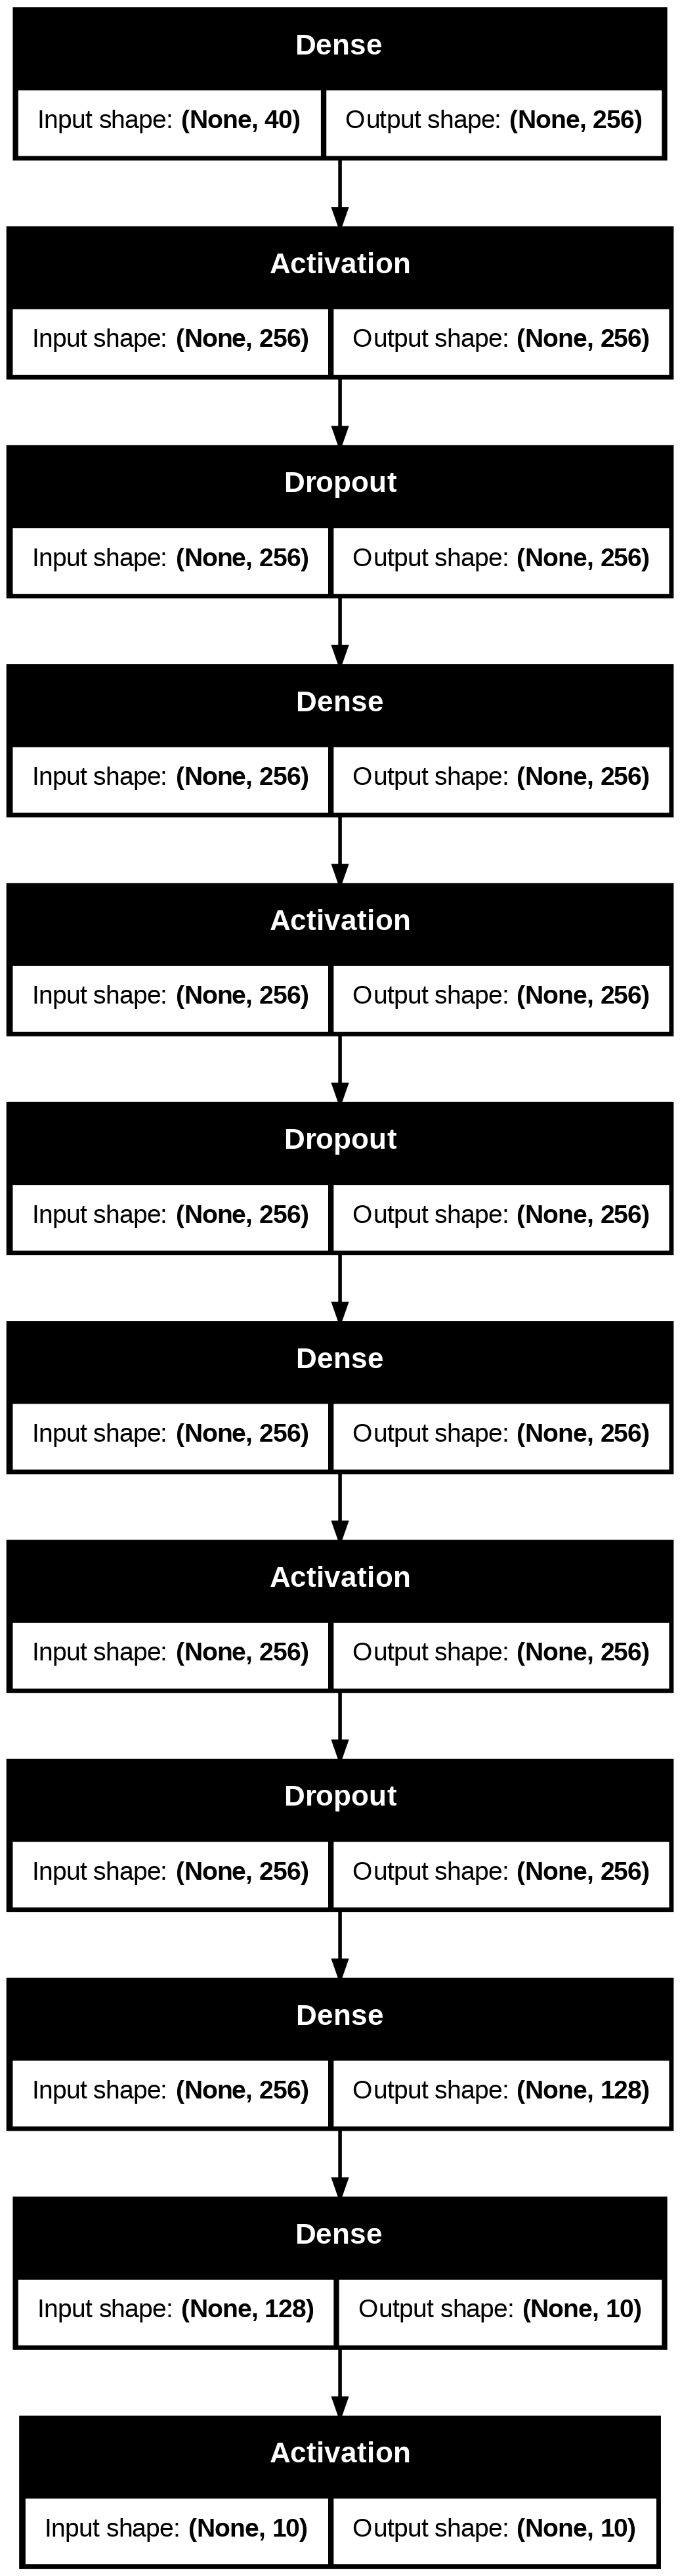

In [65]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [66]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [67]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)
from datetime import datetime

In [68]:
num_batch_size=32
num_epochs=200
start=datetime.now()
training=model.fit(
    X_train,
    Y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test,Y_test),
    callbacks=[earlystop]
)
duration=datetime.now()-start
print("Training completed in : ",duration)

Epoch 1/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1306 - loss: 14.9386 - val_accuracy: 0.1643 - val_loss: 2.2261
Epoch 2/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1866 - loss: 2.3831 - val_accuracy: 0.1723 - val_loss: 2.1719
Epoch 3/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2327 - loss: 2.1668 - val_accuracy: 0.2324 - val_loss: 1.9973
Epoch 4/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2831 - loss: 2.0041 - val_accuracy: 0.3085 - val_loss: 1.8110
Epoch 5/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3284 - loss: 1.8661 - val_accuracy: 0.4390 - val_loss: 1.6483
Epoch 6/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3629 - loss: 1.7684 - val_accuracy: 0.4722 - val_loss: 1.5208
Epoch 7/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4318 - loss: 1.6221 - val_accuracy: 0.5117 - val_loss: 1.4688
Epoch 8/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4479 - loss: 1.5608 - val_acc

In [69]:
test_accuracy=model.evaluate(X_test,Y_test)
print("Accuracy : ",test_accuracy[1])

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8493 - loss: 0.5284
Accuracy :  0.8443045020103455


In [70]:
train_hist=pd.DataFrame(training.history)
train_hist

,accuracy,loss,val_accuracy,val_loss
0,0.144166,7.288556,0.164282,2.226146
1,0.193558,2.311300,0.172295,2.171893
2,0.243379,2.124969,0.232398,1.997328
3,0.289191,1.980599,0.308529,1.810971
4,0.345598,1.828506,0.439038,1.648323
...,...,...,...,...
62,0.773658,0.701700,0.842587,0.540256
63,0.778955,0.697732,0.847167,0.525934
64,0.782534,0.682207,0.839725,0.545442
65,0.781389,0.681803,0.854035,0.531259


## Visualization : 

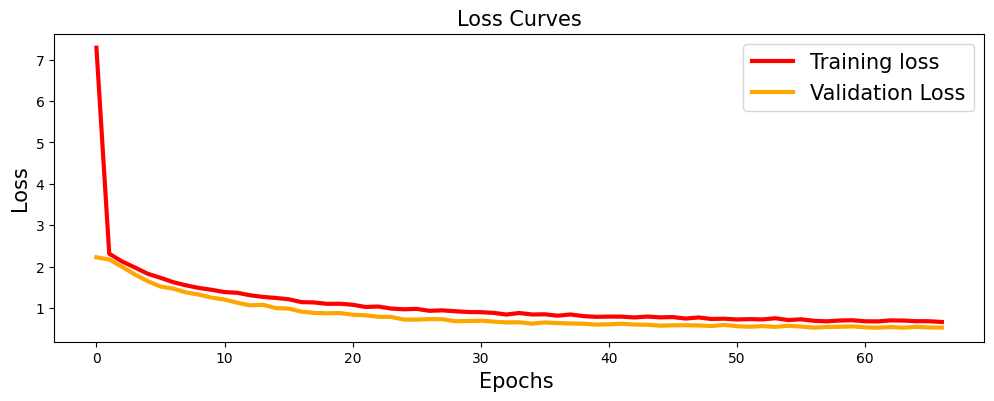

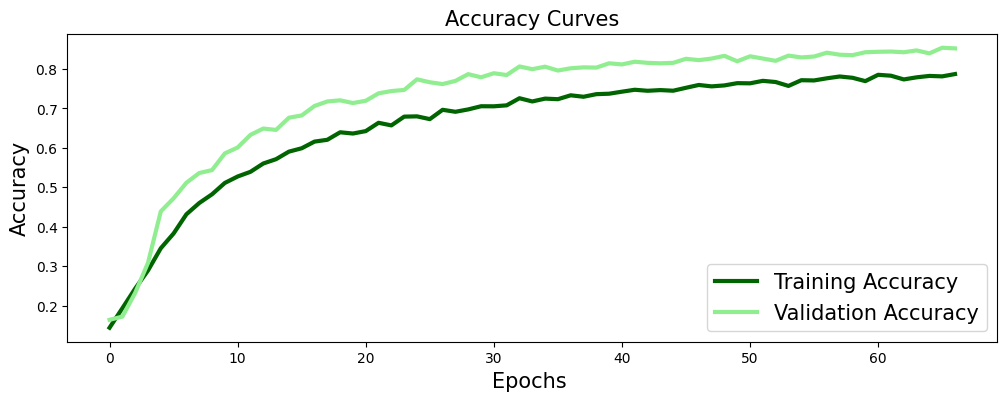

In [71]:
# Loss curves
plt.figure(figsize=[12,4])
plt.plot(training.history['loss'],'red',linewidth=3.0)
plt.plot(training.history['val_loss'],'orange',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=15)
plt.xlabel('Epochs ',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.title('Loss Curves',fontsize=15)


# Accuracy Curves
plt.figure(figsize=[12,4])
plt.plot(training.history['accuracy'],'darkgreen',linewidth=3.0)
plt.plot(training.history['val_accuracy'],'lightgreen',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=15)
plt.xlabel('Epochs ',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.title('Accuracy Curves',fontsize=15)
plt.show()

## Prediction : 

In [73]:
df["Class"].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [74]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import librosa
import IPython.display as ipd

# Step 1: Convert one-hot to label indices
y = np.argmax(Y, axis=1)  # If Y is shape (8732, 10), now y is shape (8732,)

# Step 2: Define your class labels (UrbanSound8K example)
class_names = ['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling']

# Step 3: Fit LabelEncoder on class names
labelencoder = LabelEncoder()
labelencoder.fit(class_names)

# Step 4: Predict function
def predict(filename):
    audio, sample_rate = librosa.load(filename)
    
    # Extract MFCCs (40 features)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    # Reshape to match model input
    mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

    # Predict
    prediction = model.predict(mfccs_scaled_features)
    predicted_label = np.argmax(prediction, axis=1)
    
    # Decode label to class name
    prediction_class = labelencoder.inverse_transform(predicted_label)
    print("Predicted class:", prediction_class[0])
    
    # Return playable audio
    return ipd.Audio(filename)


In [75]:
predict('/kaggle/input/urbansound8k/fold8/103076-3-0-0.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted class: dog_bark


In [76]:
predict('/kaggle/input/urbansound8k/fold3/103199-4-2-0.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class: drilling


## Saving the model : 

In [77]:
model.save('model.h5')